# CLASSIFICAÇÃO DE EMPRESAS PARA INVESTIMENTO A LONGO PRAZO 

## Algoritmo de classificação + Análise e exploração profunda dos dados relacionados a empresas para investimento.

O intuito do algoritmo é definir se vale ou não investir em uma empresa baseado em diversas caracteristicas (features). A feature principal é chamada de *SITUAÇÃO* sendo um valor contendo as seguintes classes : BOA, MEDIO E RUIM.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from pandas_datareader import data
import yfinance as yf
import os
import matplotlib.image as mpimg
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold,KFold,RepeatedKFold,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle as pkl
import joblib


In [45]:
"""CLASSIFICAR EMPRESAS PARA INVESTIMENTO A LONGO PRAZO"""
dataset = pd.read_excel('python_codes/database/BD Completo.xlsx')
plt.style.use('Solarize_Light2')


In [46]:
dataset

Situação                            Empresa  \
0       ruim                      aes elpa s.a    
1        boa                     tiet aes tiete   
2       ruim                      aflu afluente   
3       ruim                    aflu afluente t   
4       ruim                  rpad alfa holding   
..       ...                                ...   
372     ruim                 whirlpool s.a whrl   
373      boa               wilson sons ltd wson   
374     ruim  wlm industria e comercia s.a sgas   
375     ruim        zain participações s.a opzi   
376     ruim              524 participações s.a   

                            Segmento   Valor de M.            EV  \
0                   energia eletrica  1.334627e+09  4.391657e+09   
1                   energia eletrica  1.519060e+10           NaN   
2                   energia eletrica  9.465319e+07  8.565319e+07   
3                   energia eletrica  2.819886e+08  2.439886e+08   
4                             bancos  2.887665e+08  2.857665e+08   
..                               ...           ...           ...   
372                 eletrodomésticos  5.034333e+09  4.615333e+09   
373  serviços de apoio e armazenagem           NaN           NaN   
374           material de transporte  1.412889e+08  9.528892e+07   
375                           outros           NaN           NaN   
376                           outros           NaN           NaN   

                                            Majoritar.  Pes. Fisicas  \
0                    Brasiliana Participaçoes (98,26%)       15969.0   
1                   Aes Holdings Brasil ltda. (61,57%)       18681.0   
2    contour global do brasil participações ltda (9...        1898.0   
3                               neoenergia s.a (87,84)           8.0   
4                 admistradora fortaliza ltda (89,14%)       11290.0   
..                                                 ...           ...   
372                  whirlpool do brasil ltda (49,94%)           NaN   
373            ocean wilsons holdings limited (58,30%)         176.0   
374             sajutha-rio participações s.a (94,08%)        3604.0   
375                                                NaN           2.0   
376  Opportunity Holding Fundo de Investimento em P...           1.0   

                Categoria   LPA  LPA desconctado  ...    FCO    FCI    FCF  \
0                  alerta  0.57             0.56  ...    NaN    NaN    NaN   
1              dividendos  0.18             0.18  ...  836.0 -126.0 -728.0   
2                  alerta  0.16             0.15  ...    NaN    NaN    NaN   
3                  alerta  0.21             0.20  ...    NaN    NaN    NaN   
4    crescimento moderado  0.60             0.60  ...    NaN    NaN    NaN   
..                    ...   ...              ...  ...    ...    ...    ...   
372            dividendos  0.21             0.21  ...  768.0 -212.0 -519.0   
373                alerta   NaN              NaN  ...    NaN    NaN    NaN   
374                alerta -0.52            -0.52  ...    NaN    NaN    NaN   
375                alerta   NaN              NaN  ...    NaN    NaN    NaN   
376                alerta   NaN              NaN  ...    NaN    NaN    NaN   

      FCT    FCL  FCI/LL  CAPEX  FCL CAPEX  CAPEX/LL  CAPEX/FCO  
0     NaN    NaN     NaN    NaN        NaN       NaN        NaN  
1   -18.0  710.0    0.68 -139.0      696.0     26.00       17.0  
2     NaN    NaN     NaN    NaN        NaN       NaN        NaN  
3     NaN    NaN     NaN    NaN        NaN       NaN        NaN  
4     NaN    NaN     NaN    NaN        NaN       NaN        NaN  
..    ...    ...     ...    ...        ...       ...        ...  
372  35.0  555.0   50.00 -207.0      560.0      0.48       28.0  
373   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
374   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
375   NaN    NaN     NaN    NaN        NaN       NaN        NaN  
376   NaN    NaN     NaN    NaN        NaN    

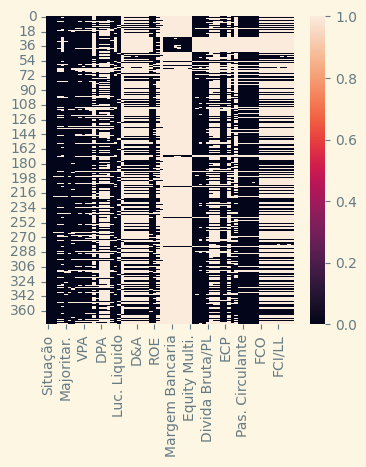

In [47]:
plt.figure(figsize= (4,4))
sns.heatmap(dataset.isnull())
dataset.columns = dataset.columns.str.strip().str.upper()


In [48]:
dataset.isnull().sum()

SITUAÇÃO         0
EMPRESA          0
SEGMENTO         3
VALOR DE M.     58
EV              92
              ... 
FCI/LL         242
CAPEX          241
FCL CAPEX      239
CAPEX/LL       242
CAPEX/FCO      241
Length: 70, dtype: int64

In [49]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 200:
        dataset = dataset.drop(f'{i}',axis=1)


In [50]:
dataset.isnull().sum()

SITUAÇÃO             0
EMPRESA              0
SEGMENTO             3
VALOR DE M.         58
EV                  92
MAJORITAR.          16
PES. FISICAS        19
CATEGORIA           29
LPA                 41
LPA DESCONCTADO     60
VPA                 38
P/L                 61
P/L DESCONTADO      66
P/VPA               64
MARGEM SEGURANÇA    56
REC. LIQUIDA        51
LUC. LIQUIDO        52
MARGEM LIQUIDA      59
ROE                 49
PATRI. LIQUIDO.1    33
CAIXA               41
DIVIDA BRUTA        54
DIVIDA LIQUIDA      36
DIVIDA BRUTA/PL     81
EF                  66
ECP                 67
EM                  83
AT. CIRCULANTE      60
PAS. CIRCULANTE     60
CAIXA.1             60
LIQ. CORRENTE       60
LIQ. IMEDIATA       61
CAPITAL DE GIRO     61
dtype: int64

<Axes: >

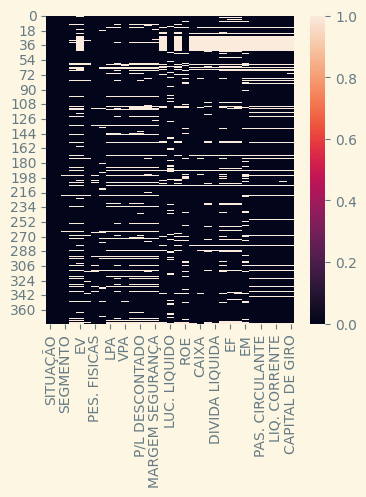

In [51]:
plt.figure(figsize= (4,4))
sns.heatmap(dataset.isnull())


In [52]:
#SELECIONAR CATEGORIGOS E NUMÉRICOS
cat_attribs = dataset.select_dtypes(include=['object']).columns.tolist()
num_attribs = dataset.select_dtypes(include=['number']).columns.tolist()

In [53]:
cat_attribs,num_attribs

(['SITUAÇÃO', 'EMPRESA', 'SEGMENTO', 'MAJORITAR.', 'CATEGORIA'],
 ['VALOR DE M.',
  'EV',
  'PES. FISICAS',
  'LPA',
  'LPA DESCONCTADO',
  'VPA',
  'P/L',
  'P/L DESCONTADO',
  'P/VPA',
  'MARGEM SEGURANÇA',
  'REC. LIQUIDA',
  'LUC. LIQUIDO',
  'MARGEM LIQUIDA',
  'ROE',
  'PATRI. LIQUIDO.1',
  'CAIXA',
  'DIVIDA BRUTA',
  'DIVIDA LIQUIDA',
  'DIVIDA BRUTA/PL',
  'EF',
  'ECP',
  'EM',
  'AT. CIRCULANTE',
  'PAS. CIRCULANTE',
  'CAIXA.1',
  'LIQ. CORRENTE',
  'LIQ. IMEDIATA',
  'CAPITAL DE GIRO'])

In [54]:
dataset[num_attribs] = dataset[num_attribs].fillna(dataset[num_attribs].mean(),axis=0)


In [55]:
dataset.isnull().sum()


SITUAÇÃO             0
EMPRESA              0
SEGMENTO             3
VALOR DE M.          0
EV                   0
MAJORITAR.          16
PES. FISICAS         0
CATEGORIA           29
LPA                  0
LPA DESCONCTADO      0
VPA                  0
P/L                  0
P/L DESCONTADO       0
P/VPA                0
MARGEM SEGURANÇA     0
REC. LIQUIDA         0
LUC. LIQUIDO         0
MARGEM LIQUIDA       0
ROE                  0
PATRI. LIQUIDO.1     0
CAIXA                0
DIVIDA BRUTA         0
DIVIDA LIQUIDA       0
DIVIDA BRUTA/PL      0
EF                   0
ECP                  0
EM                   0
AT. CIRCULANTE       0
PAS. CIRCULANTE      0
CAIXA.1              0
LIQ. CORRENTE        0
LIQ. IMEDIATA        0
CAPITAL DE GIRO      0
dtype: int64

In [56]:
del dataset['MAJORITAR.']


In [57]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)


In [58]:
dataset.isnull().sum()

SITUAÇÃO            0
EMPRESA             0
SEGMENTO            0
VALOR DE M.         0
EV                  0
PES. FISICAS        0
CATEGORIA           0
LPA                 0
LPA DESCONCTADO     0
VPA                 0
P/L                 0
P/L DESCONTADO      0
P/VPA               0
MARGEM SEGURANÇA    0
REC. LIQUIDA        0
LUC. LIQUIDO        0
MARGEM LIQUIDA      0
ROE                 0
PATRI. LIQUIDO.1    0
CAIXA               0
DIVIDA BRUTA        0
DIVIDA LIQUIDA      0
DIVIDA BRUTA/PL     0
EF                  0
ECP                 0
EM                  0
AT. CIRCULANTE      0
PAS. CIRCULANTE     0
CAIXA.1             0
LIQ. CORRENTE       0
LIQ. IMEDIATA       0
CAPITAL DE GIRO     0
dtype: int64

C:\Users\Edu\AppData\Local\Temp\ipykernel_19432\4056101978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SITUAÇÃO', data=dataset, palette='Set1', legend=False)


<Axes: xlabel='SITUAÇÃO', ylabel='count'>

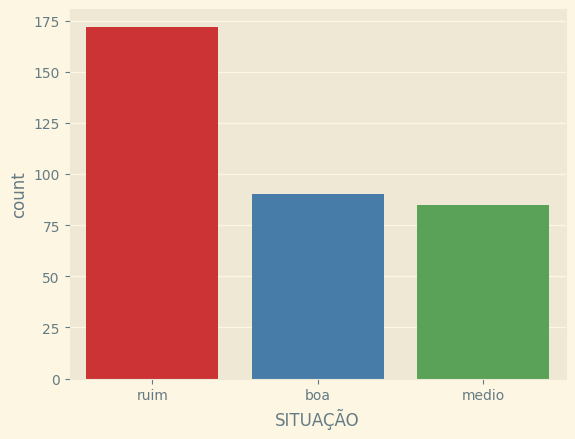

In [59]:
sns.countplot(x='SITUAÇÃO', data=dataset, palette='Set1', legend=False)

In [60]:
unique_segments, counts = np.unique(dataset['SEGMENTO'],return_counts=True)

In [61]:
unique_segments

array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
       'agua e saneamento', 'alimentos', 'alimentos diversos',
       'aluguel de carros', 'armas e munições', 'artefatos de cobre',
       'artefatos de ferro e aço', 'automoveis e motocicletas',
       'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
       'café', 'calçados', 'carnes e derivados',
       'cervejas e refrigerantes', 'compressores e outros',
       'computadores e equipamentos', 'construção civil',
       'construção pesada', 'corretoras de seguros', 'edificações',
       'eletrodomesticos', 'eletrodomésticos', 'embalagens',
       'energia eletrica', 'engenharia construtiva',
       'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
       'exploração de imoveis', 'exploração de rodovias',
       'exploração, refino e distribuição', 'fertilizantes e defensivos',
       'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
       'holdings diversificadas', 'hote

In [62]:
counts

array([ 1,  1,  1,  3,  4,  1,  3,  2,  1,  1,  5,  4,  3, 27,  1,  2,  2,
        4,  6,  1,  1,  2,  2,  4,  1, 17,  3,  1,  2, 40,  1,  1,  1,  2,
       10,  5,  6,  2, 16,  2,  3, 11,  2,  2,  2,  2,  2,  5,  1,  2,  1,
        2,  1,  6,  6,  3,  1,  1,  1,  1, 13,  5,  3,  1,  2,  5,  4,  2,
        1,  1,  3,  2,  4,  1,  1,  1,  1,  3,  2,  4,  1,  2,  2,  2,  3,
        1,  2,  1,  7,  6,  2,  4,  2,  2,  2,  1,  1], dtype=int64)

In [63]:
dataset['SEGMENTO'] = dataset['SEGMENTO'].astype(str)


In [64]:
def corrige_segmentos(texto):
    segmento = ''
    
    if texto == 'acessórios':
        segmento = 'acessorio'

    elif texto == 'acessorios':
        segmento = 'acessorio'

    elif texto == 'agriculltura':
        segmento = 'agricultura'

    elif texto == 'alimentos diversos':
        segmento = 'alimentos'
    
    elif texto == 'eletrodomésticos':
        segmento = 'eletrodomesticos'

    elif texto == 'equipamentos e serviços':
        segmento = 'equipamentos'

    elif texto == 'mateial rodoviario': 
        segmento = 'material rodoviario'

    elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
        segmento = 'hospitalar'

    elif texto == 'serviços de apoio e armazenamento':
        segmento = 'serviços de apoio e armazenagem'

    elif texto == 'serviços diversos s.a ctax':
        segmento = 'serviços diversos'

    elif texto == 'siderurgia':
        segmento = 'siderurgica'

    elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
        segmento = 'credito'

    elif texto == 'tansporte aereo':
        segmento = 'transporte aereo'

    else :
        segmento = texto

    return segmento
dataset['SEGMENTO'] = dataset['SEGMENTO'].apply(corrige_segmentos)

In [65]:
unique_segments, counts = np.unique(dataset['CATEGORIA'],return_counts=True)
print(counts)

[243  17   1  48  36   2]


In [66]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'

    else:
        categoria = texto
    return categoria

dataset['CATEGORIA'] = dataset['CATEGORIA'].apply(corrige_categoria)

In [67]:
np.unique(dataset['CATEGORIA'],return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2], dtype=int64))

C:\Users\Edu\AppData\Local\Temp\ipykernel_19432\339226440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORIA', data=dataset,palette='Set1')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'alerta'),
  Text(1, 0, 'dividendos'),
  Text(2, 0, 'crescimento moderado'),
  Text(3, 0, 'crescimento'),
  Text(4, 0, 'dividendos + crescimento')])

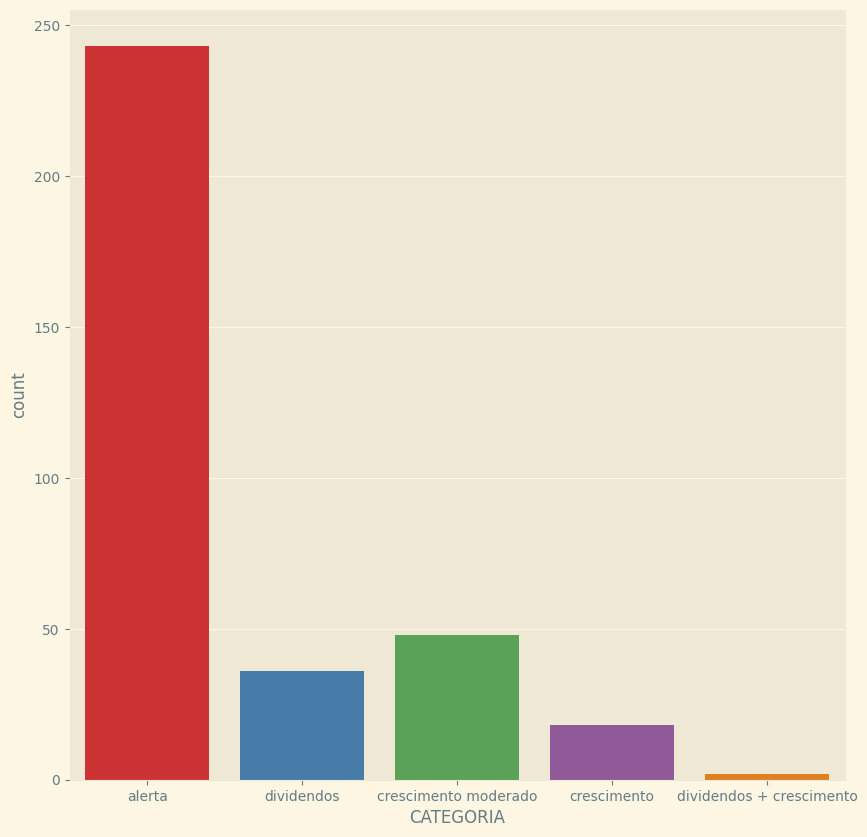

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(x='CATEGORIA', data=dataset,palette='Set1')
plt.xticks()


C:\Users\Edu\AppData\Local\Temp\ipykernel_19432\3303268394.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax);


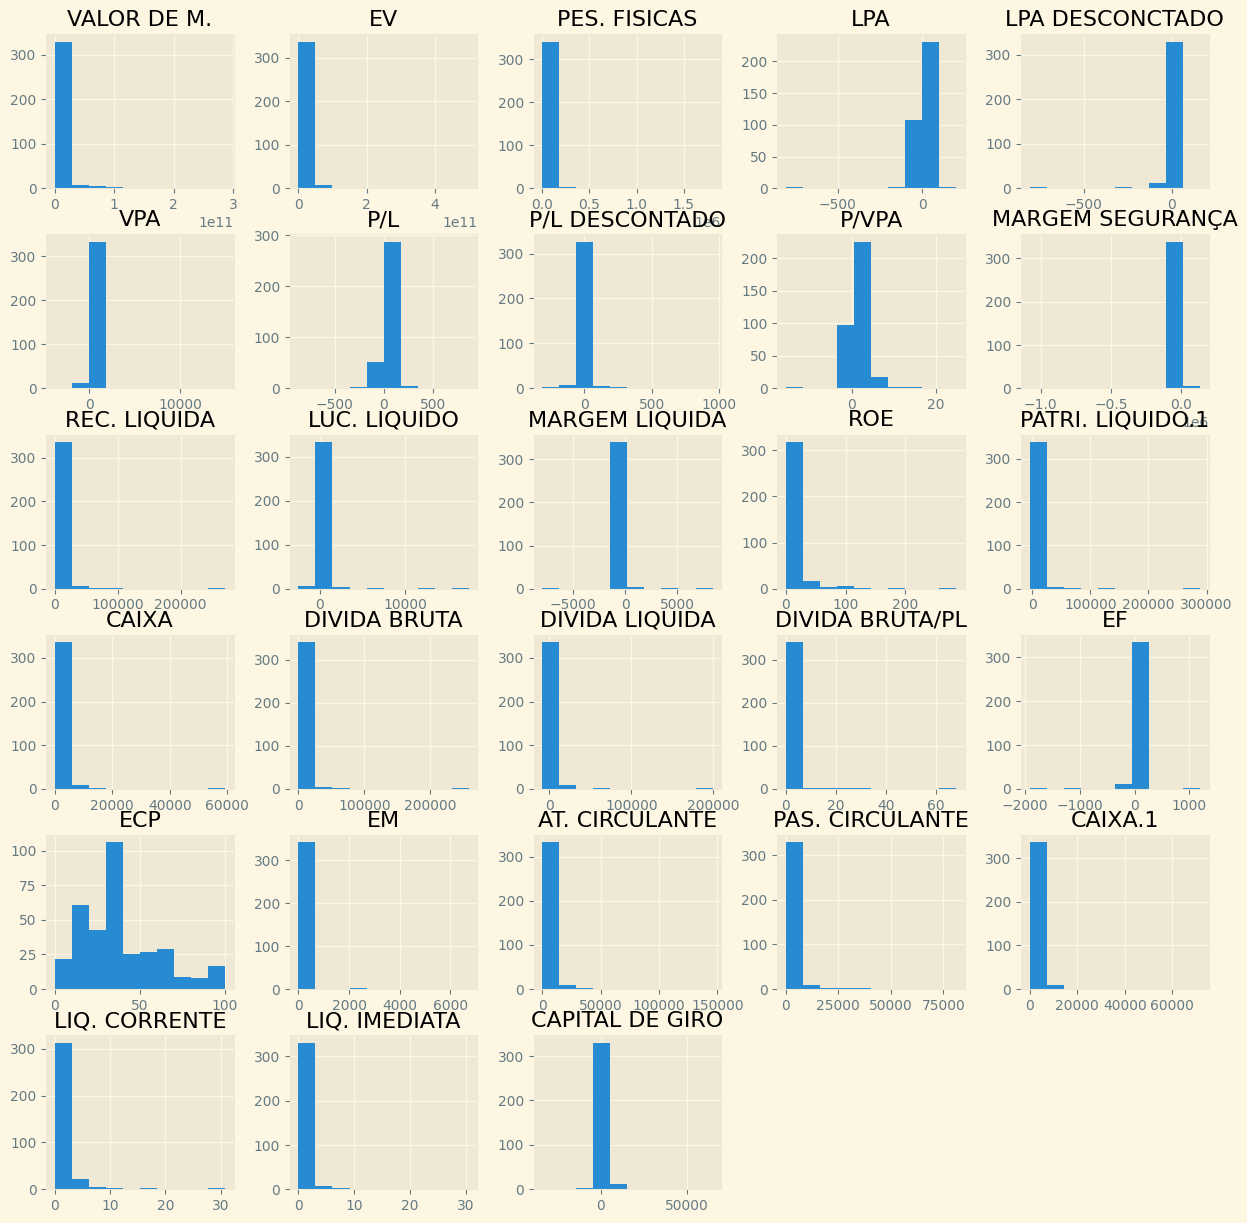

In [69]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
dataset.hist(ax=ax);


In [70]:
correlacao = dataset.corr(numeric_only=True)
print(correlacao)

                  VALOR DE M.        EV  PES. FISICAS       LPA  \
VALOR DE M.          1.000000  0.710625      0.268793  0.046066   
EV                   0.710625  1.000000      0.227690  0.035048   
PES. FISICAS         0.268793  0.227690      1.000000  0.010038   
LPA                  0.046066  0.035048      0.010038  1.000000   
LPA DESCONCTADO      0.047804  0.037377      0.012362  0.984485   
VPA                 -0.007354 -0.007771     -0.006719 -0.419872   
P/L                  0.036327  0.023970      0.007803  0.017999   
P/L DESCONTADO       0.033680  0.026517      0.001744  0.021647   
P/VPA                0.096432  0.061283     -0.014660  0.055433   
MARGEM SEGURANÇA     0.028835  0.020436      0.006799  0.424568   
REC. LIQUIDA         0.497979  0.874632      0.217443  0.030644   
LUC. LIQUIDO         0.627314  0.058750      0.141877  0.045857   
MARGEM LIQUIDA      -0.001781  0.000640     -0.000707  0.002286   
ROE                  0.023803 -0.002211     -0.033432  0.02108

<Axes: >

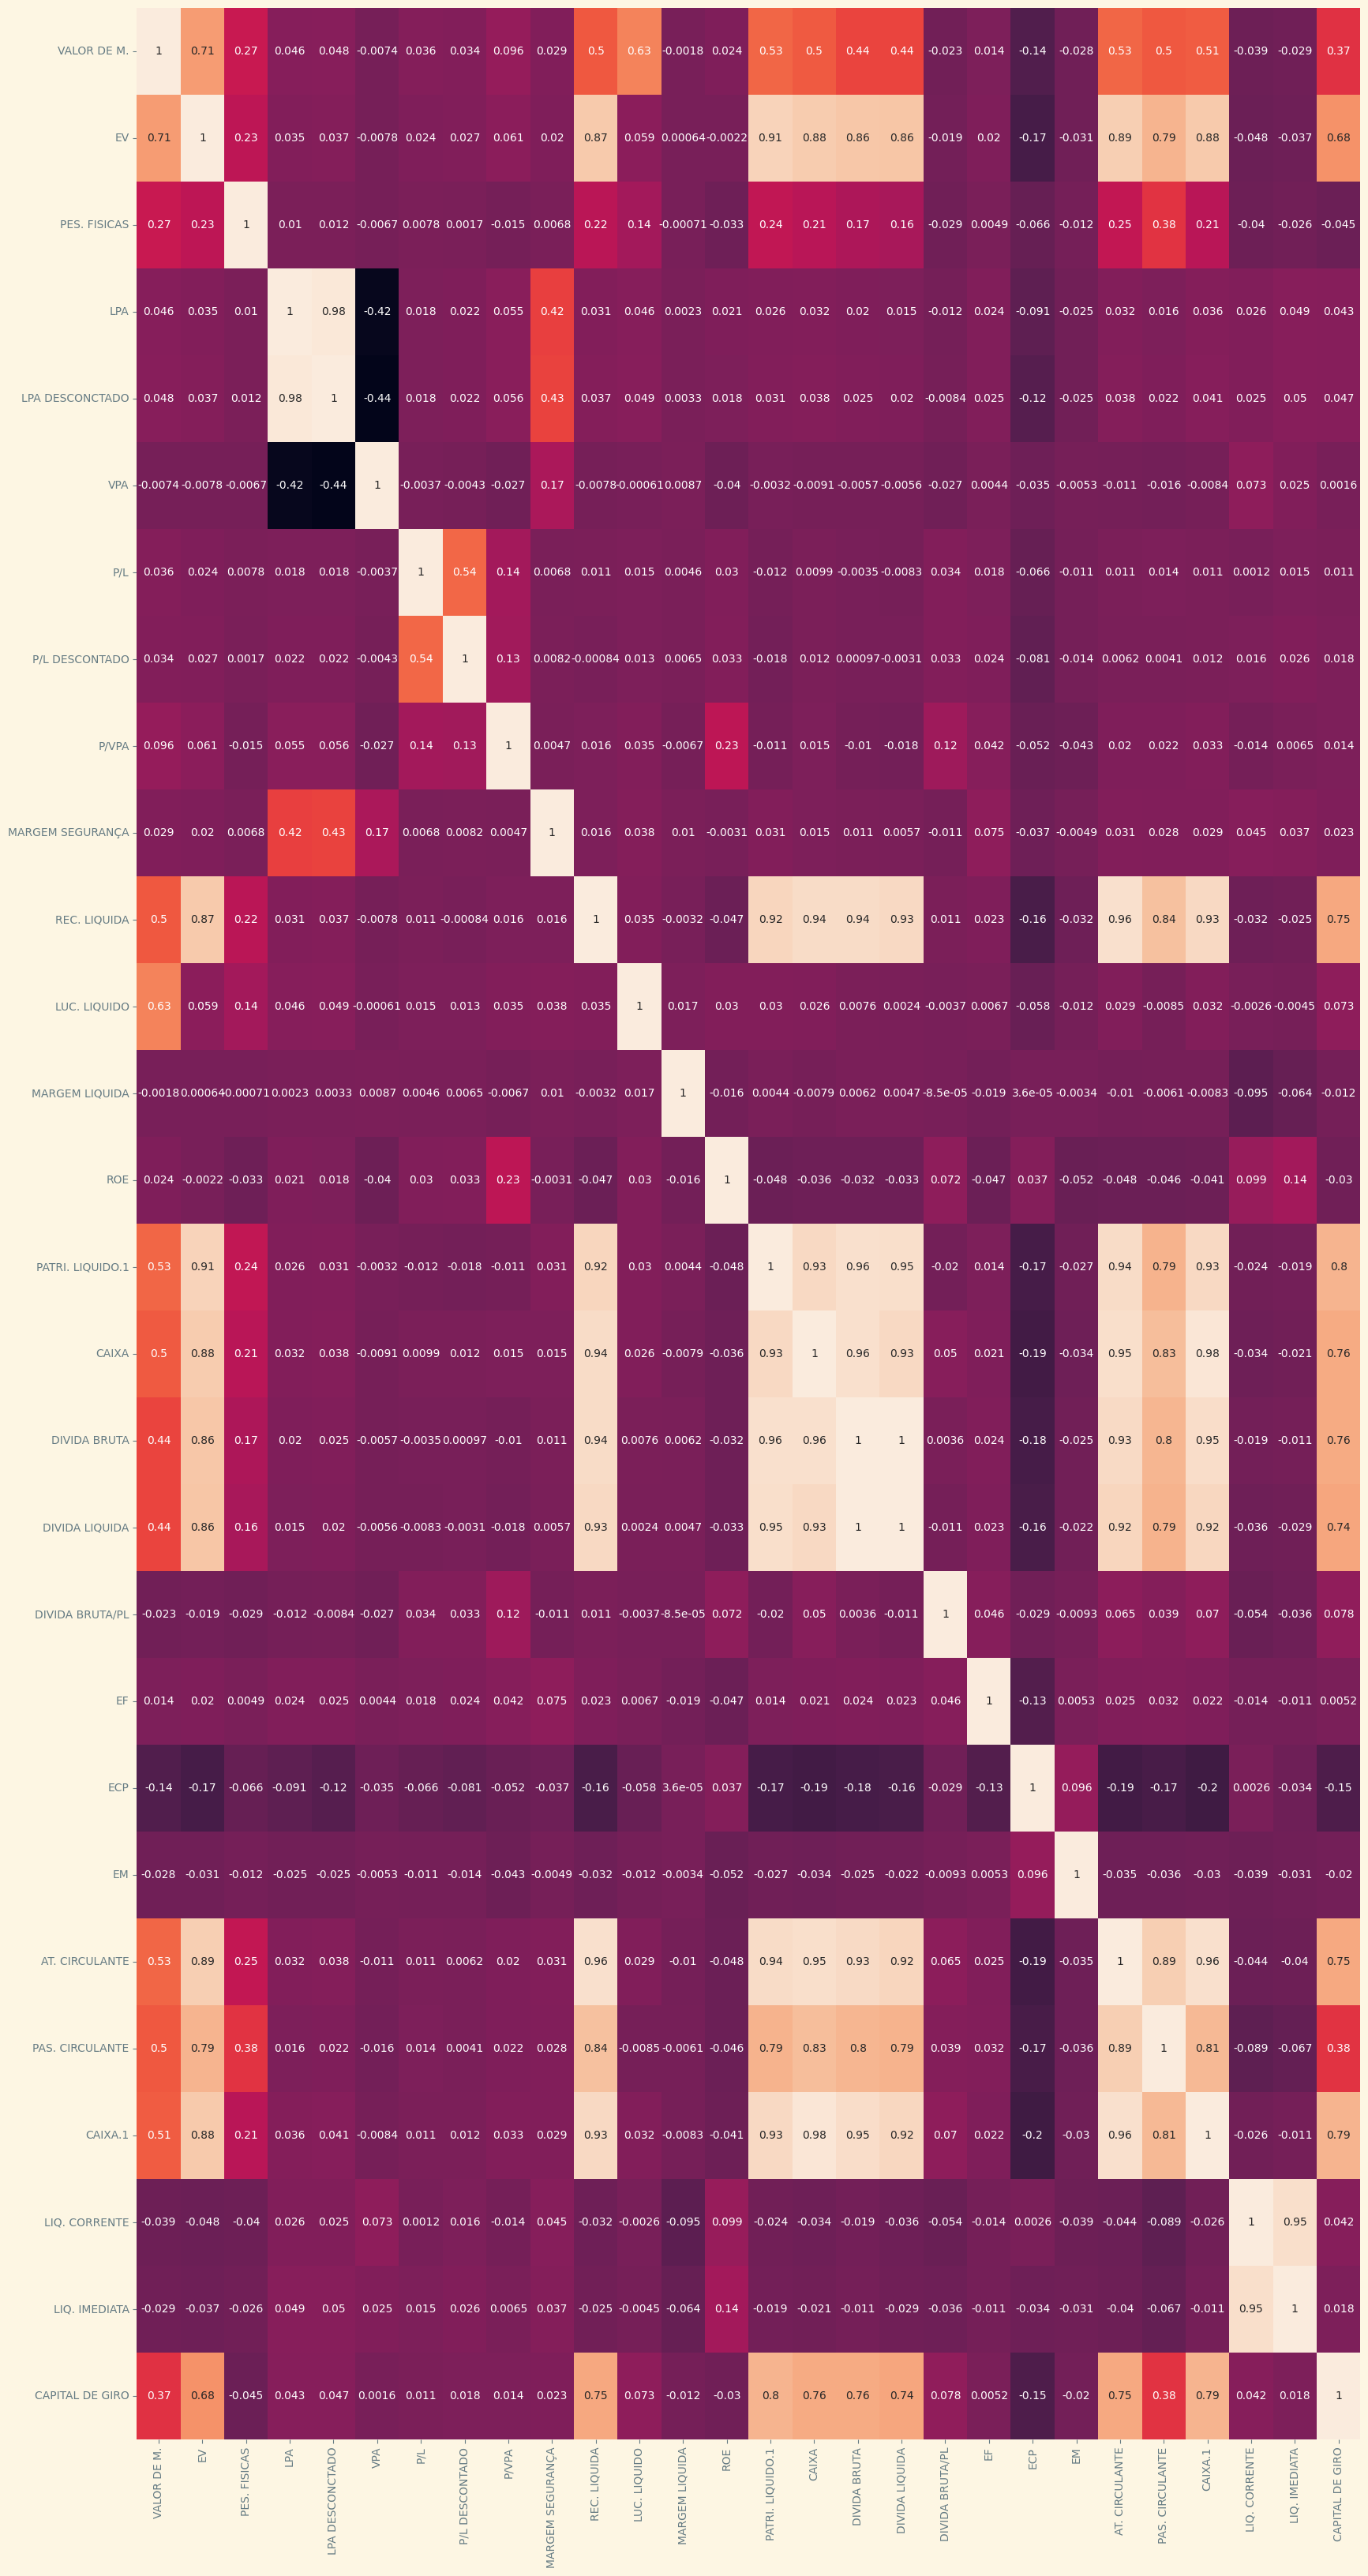

In [71]:
plt.figure(figsize=(20,40))
sns.heatmap(correlacao,annot=True,cbar=False)

In [72]:
dataset.columns

Index(['SITUAÇÃO', 'EMPRESA', 'SEGMENTO', 'VALOR DE M.', 'EV', 'PES. FISICAS',
       'CATEGORIA', 'LPA', 'LPA DESCONCTADO', 'VPA', 'P/L', 'P/L DESCONTADO',
       'P/VPA', 'MARGEM SEGURANÇA', 'REC. LIQUIDA', 'LUC. LIQUIDO',
       'MARGEM LIQUIDA', 'ROE', 'PATRI. LIQUIDO.1', 'CAIXA', 'DIVIDA BRUTA',
       'DIVIDA LIQUIDA', 'DIVIDA BRUTA/PL', 'EF', 'ECP', 'EM',
       'AT. CIRCULANTE', 'PAS. CIRCULANTE', 'CAIXA.1', 'LIQ. CORRENTE',
       'LIQ. IMEDIATA', 'CAPITAL DE GIRO'],
      dtype='object')

In [73]:
dataset = dataset.drop(['REC. LIQUIDA','CAIXA'],axis=1)


dataset = dataset.drop(['DIVIDA BRUTA','LPA','CAIXA.1'],axis=1)
correlacao = dataset.corr(numeric_only=True)
plt.figure(figsize=(20,50))


dataset = dataset.drop(['AT. CIRCULANTE','LIQ. CORRENTE'],axis=1)
correlacao = dataset.corr(numeric_only=True)


<Figure size 2000x5000 with 0 Axes>

<Axes: >

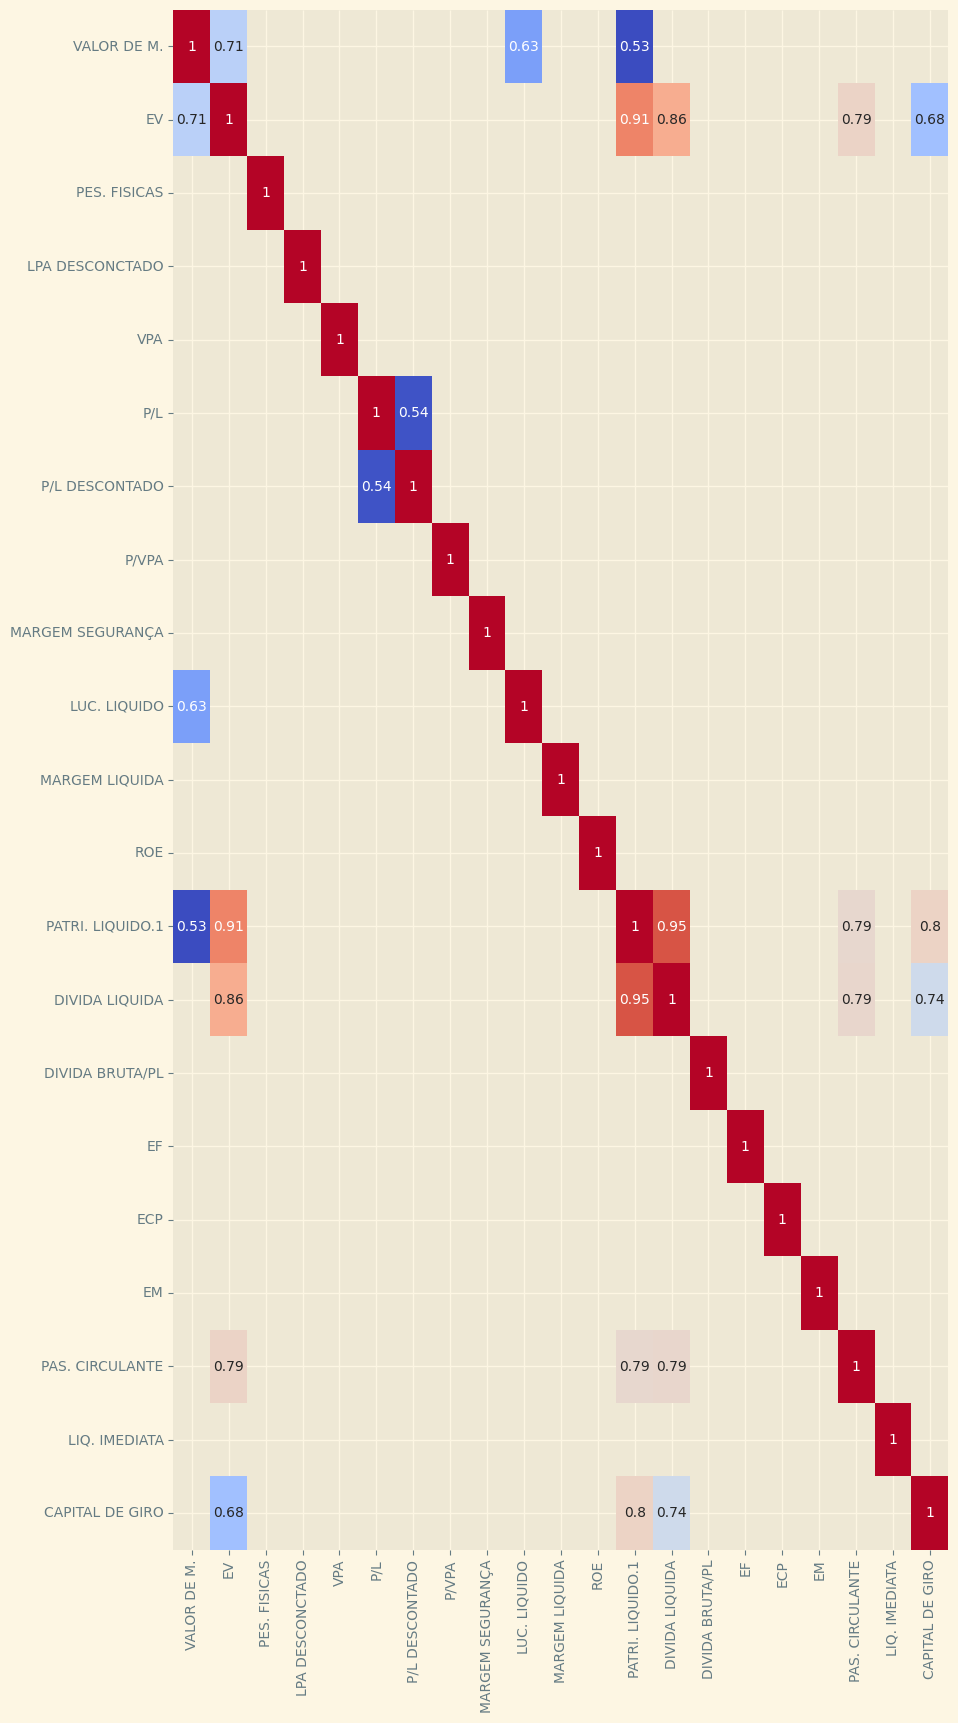

In [74]:

plt.figure(figsize=(10,20))
sns.heatmap(correlacao[correlacao.abs() > 0.5], annot=True, cmap='coolwarm', cbar=False)


In [75]:
dataset_original = dataset.copy()
dataset_original['SITUAÇÃO'].value_counts()

cat_attribs = dataset.select_dtypes(include=['object']).columns.tolist()
num_attribs = dataset.select_dtypes(include=['number']).columns.tolist()

In [76]:
y = dataset['SITUAÇÃO'].values
empresas = dataset['EMPRESA']
X_cat = dataset[['SEGMENTO','CATEGORIA']]
print(y)
X_cat

['ruim' 'boa' 'ruim' 'ruim' 'ruim' 'boa' 'ruim' 'ruim' 'boa' 'medio'
 'ruim' 'boa' 'ruim' 'boa' 'ruim' 'ruim' 'boa' 'medio' 'medio' 'ruim'
 'ruim' 'ruim' 'ruim' 'boa' 'medio' 'medio' 'boa' 'boa' 'medio' 'boa'
 'ruim' 'medio' 'ruim' 'ruim' 'ruim' 'medio' 'ruim' 'boa' 'ruim' 'boa'
 'ruim' 'boa' 'boa' 'boa' 'ruim' 'boa' 'ruim' 'medio' 'ruim' 'medio'
 'medio' 'medio' 'ruim' 'medio' 'ruim' 'ruim' 'ruim' 'boa' 'ruim' 'ruim'
 'boa' 'ruim' 'ruim' 'ruim' 'ruim' 'boa' 'ruim' 'ruim' 'ruim' 'boa' 'ruim'
 'ruim' 'ruim' 'ruim' 'medio' 'ruim' 'ruim' 'medio' 'boa' 'ruim' 'medio'
 'medio' 'boa' 'medio' 'boa' 'boa' 'boa' 'medio' 'medio' 'boa' 'ruim'
 'boa' 'medio' 'medio' 'ruim' 'ruim' 'boa' 'boa' 'boa' 'boa' 'boa' 'boa'
 'boa' 'ruim' 'ruim' 'ruim' 'boa' 'ruim' 'ruim' 'ruim' 'ruim' 'medio'
 'ruim' 'ruim' 'ruim' 'medio' 'boa' 'ruim' 'boa' 'boa' 'ruim' 'medio'
 'boa' 'medio' 'boa' 'boa' 'medio' 'medio' 'boa' 'ruim' 'boa' 'boa'
 'medio' 'ruim' 'ruim' 'ruim' 'boa' 'ruim' 'medio' 'medio' 'boa' 'medio'
 'ruim

SEGMENTO             CATEGORIA
0                   energia eletrica                alerta
1                   energia eletrica            dividendos
2                   energia eletrica                alerta
3                   energia eletrica                alerta
4                             bancos  crescimento moderado
..                               ...                   ...
342                 eletrodomesticos            dividendos
343  serviços de apoio e armazenagem                alerta
344           material de transporte                alerta
345                           outros                alerta
346                           outros                alerta

[347 rows x 2 columns]

In [77]:
encoder = OneHotEncoder(sparse_output=False)
X_cat = encoder.fit_transform(X_cat)
X_cat = pd.DataFrame(X_cat)
dataset = dataset.drop(['SEGMENTO','CATEGORIA','SITUAÇÃO','EMPRESA'],axis=1)
dataset.index
X_cat.index
dataset = pd.concat([dataset,X_cat],axis=1)
dataset

VALOR DE M.            EV  PES. FISICAS  LPA DESCONCTADO        VPA  \
0    1.334627e+09  4.391657e+09  15969.000000         0.560000  36.030000   
1    1.519060e+10  1.021776e+10  18681.000000         0.180000   0.800000   
2    9.465319e+07  8.565319e+07   1898.000000         0.150000   2.070000   
3    2.819886e+08  2.439886e+08      8.000000         0.200000   1.230000   
4    2.887665e+08  2.857665e+08  11290.000000         0.600000  10.420000   
..            ...           ...           ...              ...        ...   
342  5.034333e+09  4.615333e+09  30941.268156         0.210000   1.690000   
343  8.596999e+09  1.021776e+10    176.000000        -8.723009  37.412006   
344  1.412889e+08  9.528892e+07   3604.000000        -0.520000  11.610000   
345  8.596999e+09  1.021776e+10      2.000000        -8.723009  37.412006   
346  8.596999e+09  1.021776e+10      1.000000        -8.723009  37.412006   

           P/L  P/L DESCONTADO     P/VPA  MARGEM SEGURANÇA  LUC. LIQUIDO  ...  \
0    24.710000       24.710000  0.380000          -0.53000    555.000000  ...   
1    14.920000       14.920000  3.390000          22.00000    703.000000  ...   
2    31.550000       31.550000  2.420000         -63.00000     13.000000  ...   
3    21.690000       21.690000  3.610000          46.00000     17.000000  ...   
4     5.650000        5.650000  0.320000         116.00000     45.000000  ...   
..         ...             ...       ...               ...           ...  ...   
342  15.640000       15.640000  1.940000          26.00000    307.596923  ...   
343  10.669968       12.338617  1.677604       -7975.95134    109.000000  ...   
344  -7.350000       -7.350000  0.330000        -271.00000     21.000000  ...   
345  10.669968       12.338617  1.677604       -7975.95134     -8.000000  ...   
346  10.669968       12.338617  1.677604       -7975.95134    307.596923  ...   

      79   80   81   82   83   84   85   86   87   88  
0    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
342  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
343  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
344  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
345  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
346  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

[347 rows x 110 columns]

In [78]:
scaler = MinMaxScaler()
dataset.columns = dataset.columns.astype(str)
dataset_norma = scaler.fit_transform(dataset)
 
X = dataset_norma.copy()
X


array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# PARTE 3 - APRENDIZADO DE MAQUINA

In [79]:
rnd_class = RandomForestClassifier(random_state=42,verbose=1)
mlp_class = MLPClassifier(hidden_layer_sizes=(175,175),verbose=1,random_state=42)
resultados_random_forest = []
resultados_random_forest_estratificado = []
resultados_rede_neural_estratificado = []
rnd_class

RandomForestClassifier(random_state=42, verbose=1)

In [80]:
mlp_class

MLPClassifier(hidden_layer_sizes=(175, 175), random_state=42, verbose=1)

In [81]:
rskfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=30, random_state=2)
scores = cross_val_score(rnd_class, X, y, cv=rskfold)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [82]:
print(f"Desempenho Médio Random Forest Estratificado: {np.mean(scores)}")
resultados_random_forest_estratificado.append(scores)

Desempenho Médio Random Forest Estratificado: 0.6465546218487396


In [83]:
rkfold = RepeatedKFold(n_splits=10,n_repeats=30,random_state=42)
scores = cross_val_score(rnd_class, X, y, cv=rkfold)



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [84]:
resultados_random_forest.append(scores)
print(f"Desempenho Médio Random Forest Não-Estratificado: {np.mean(scores)}")

Desempenho Médio Random Forest Não-Estratificado: 0.6443361344537816


In [85]:
scores = cross_val_score(mlp_class,X,y,cv=rskfold)


Iteration 1, loss = 1.19270725
Iteration 2, loss = 1.09612197
Iteration 3, loss = 1.03709837
Iteration 4, loss = 1.00342064
Iteration 5, loss = 0.98307667
Iteration 6, loss = 0.96880591
Iteration 7, loss = 0.95096361
Iteration 8, loss = 0.92781851
Iteration 9, loss = 0.90516136
Iteration 10, loss = 0.88508484
Iteration 11, loss = 0.86977664
Iteration 12, loss = 0.85224726
Iteration 13, loss = 0.83392824
Iteration 14, loss = 0.81678519
Iteration 15, loss = 0.80343724
Iteration 16, loss = 0.78974435
Iteration 17, loss = 0.77409825
Iteration 18, loss = 0.76356621
Iteration 19, loss = 0.74845202
Iteration 20, loss = 0.73265123
Iteration 21, loss = 0.71861265
Iteration 22, loss = 0.70514203
Iteration 23, loss = 0.69240449
Iteration 24, loss = 0.67841307
Iteration 25, loss = 0.66411935
Iteration 26, loss = 0.65035923
Iteration 27, loss = 0.63917213
Iteration 28, loss = 0.62769308
Iteration 29, loss = 0.61591798
Iteration 30, loss = 0.60382542
Iteration 31, loss = 0.59215326
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.42231784
Iteration 64, loss = 0.42019844
Iteration 65, loss = 0.41360654
Iteration 66, loss = 0.40786098
Iteration 67, loss = 0.40977452
Iteration 68, loss = 0.40827033
Iteration 69, loss = 0.39879837
Iteration 70, loss = 0.39531653
Iteration 71, loss = 0.39124532
Iteration 72, loss = 0.38861015
Iteration 73, loss = 0.38596681
Iteration 74, loss = 0.38384615
Iteration 75, loss = 0.37921116
Iteration 76, loss = 0.37581521
Iteration 77, loss = 0.37228411
Iteration 78, loss = 0.37115681
Iteration 79, loss = 0.36662794
Iteration 80, loss = 0.36375127
Iteration 81, loss = 0.36305724
Iteration 82, loss = 0.35986825
Iteration 83, loss = 0.35586887
Iteration 84, loss = 0.35270966
Iteration 85, loss = 0.34961165
Iteration 86, loss = 0.34891169
Iteration 87, loss = 0.34529936
Iteration 88, loss = 0.35355436
Iteration 89, loss = 0.34490472
Iteration 90, loss = 0.34344122
Iteration 91, loss = 0.33557009
Iteration 92, loss = 0.33807827
Iteration 93, loss = 0.33536460
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19002734
Iteration 2, loss = 1.09526834
Iteration 3, loss = 1.03348435
Iteration 4, loss = 0.99937816
Iteration 5, loss = 0.97844458
Iteration 6, loss = 0.96544130
Iteration 7, loss = 0.94698137
Iteration 8, loss = 0.92534146
Iteration 9, loss = 0.90195076
Iteration 10, loss = 0.88095366
Iteration 11, loss = 0.86290949
Iteration 12, loss = 0.84636742
Iteration 13, loss = 0.82897048
Iteration 14, loss = 0.81324303
Iteration 15, loss = 0.80025066
Iteration 16, loss = 0.78821234
Iteration 17, loss = 0.77403546
Iteration 18, loss = 0.75995478
Iteration 19, loss = 0.74540717
Iteration 20, loss = 0.73363352
Iteration 21, loss = 0.71975186
Iteration 22, loss = 0.70365122
Iteration 23, loss = 0.69133316
Iteration 24, loss = 0.67549685
Iteration 25, loss = 0.66248767
Iteration 26, loss = 0.64975602
Iteration 27, loss = 0.63733005
Iteration 28, loss = 0.62366227
Iteration 29, loss = 0.61236628
Iteration 30, loss = 0.60102607
Iteration 31, loss = 0.58914291
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.91212570
Iteration 10, loss = 0.88990371
Iteration 11, loss = 0.87441330
Iteration 12, loss = 0.85863511
Iteration 13, loss = 0.84160773
Iteration 14, loss = 0.82737935
Iteration 15, loss = 0.81473700
Iteration 16, loss = 0.80190694
Iteration 17, loss = 0.78976849
Iteration 18, loss = 0.77624755
Iteration 19, loss = 0.76485238
Iteration 20, loss = 0.75337466
Iteration 21, loss = 0.74023450
Iteration 22, loss = 0.72777319
Iteration 23, loss = 0.71640378
Iteration 24, loss = 0.70271677
Iteration 25, loss = 0.69108887
Iteration 26, loss = 0.67963622
Iteration 27, loss = 0.67005563
Iteration 28, loss = 0.65810644
Iteration 29, loss = 0.64783455
Iteration 30, loss = 0.63789105
Iteration 31, loss = 0.62735364
Iteration 32, loss = 0.61628172
Iteration 33, loss = 0.60706926
Iteration 34, loss = 0.59868951
Iteration 35, loss = 0.58872474
Iteration 36, loss = 0.57982630
Iteration 37, loss = 0.57284199
Iteration 38, loss = 0.56407768
Iteration 39, loss = 0.55602823
Iteration

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.70764576
Iteration 24, loss = 0.69403976
Iteration 25, loss = 0.67933276
Iteration 26, loss = 0.66773989
Iteration 27, loss = 0.65584810
Iteration 28, loss = 0.64336188
Iteration 29, loss = 0.63177925
Iteration 30, loss = 0.62051890
Iteration 31, loss = 0.61043460
Iteration 32, loss = 0.59769738
Iteration 33, loss = 0.58801689
Iteration 34, loss = 0.57854053
Iteration 35, loss = 0.57042356
Iteration 36, loss = 0.56172158
Iteration 37, loss = 0.55018621
Iteration 38, loss = 0.54287568
Iteration 39, loss = 0.53428196
Iteration 40, loss = 0.52794161
Iteration 41, loss = 0.52149975
Iteration 42, loss = 0.51352447
Iteration 43, loss = 0.50909919
Iteration 44, loss = 0.50065489
Iteration 45, loss = 0.49648522
Iteration 46, loss = 0.49022271
Iteration 47, loss = 0.48478624
Iteration 48, loss = 0.48064693
Iteration 49, loss = 0.47364546
Iteration 50, loss = 0.47168500
Iteration 51, loss = 0.46555687
Iteration 52, loss = 0.46124194
Iteration 53, loss = 0.45984574
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.58080673
Iteration 35, loss = 0.57064303
Iteration 36, loss = 0.56041200
Iteration 37, loss = 0.55177319
Iteration 38, loss = 0.54419519
Iteration 39, loss = 0.53528829
Iteration 40, loss = 0.52936815
Iteration 41, loss = 0.52155458
Iteration 42, loss = 0.51562433
Iteration 43, loss = 0.50828329
Iteration 44, loss = 0.50072203
Iteration 45, loss = 0.49734863
Iteration 46, loss = 0.49084638
Iteration 47, loss = 0.48319645
Iteration 48, loss = 0.47996572
Iteration 49, loss = 0.47386030
Iteration 50, loss = 0.46862994
Iteration 51, loss = 0.46344987
Iteration 52, loss = 0.45784145
Iteration 53, loss = 0.45396879
Iteration 54, loss = 0.44972409
Iteration 55, loss = 0.44453609
Iteration 56, loss = 0.44056067
Iteration 57, loss = 0.43441244
Iteration 58, loss = 0.43043338
Iteration 59, loss = 0.42622936
Iteration 60, loss = 0.42326797
Iteration 61, loss = 0.41758821
Iteration 62, loss = 0.41423806
Iteration 63, loss = 0.41025838
Iteration 64, loss = 0.40893503
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.51790311
Iteration 43, loss = 0.51122478
Iteration 44, loss = 0.50539741
Iteration 45, loss = 0.50135012
Iteration 46, loss = 0.49454675
Iteration 47, loss = 0.48855572
Iteration 48, loss = 0.48566090
Iteration 49, loss = 0.47839373
Iteration 50, loss = 0.47404397
Iteration 51, loss = 0.47006318
Iteration 52, loss = 0.46270224
Iteration 53, loss = 0.46140135
Iteration 54, loss = 0.45780717
Iteration 55, loss = 0.45312625
Iteration 56, loss = 0.44699545
Iteration 57, loss = 0.44290117
Iteration 58, loss = 0.43936502
Iteration 59, loss = 0.43402416
Iteration 60, loss = 0.43095336
Iteration 61, loss = 0.43044664
Iteration 62, loss = 0.42233545
Iteration 63, loss = 0.42156469
Iteration 64, loss = 0.41900872
Iteration 65, loss = 0.41244997
Iteration 66, loss = 0.40758676
Iteration 67, loss = 0.40347801
Iteration 68, loss = 0.40213695
Iteration 69, loss = 0.39644158
Iteration 70, loss = 0.39591834
Iteration 71, loss = 0.39168465
Iteration 72, loss = 0.38705042
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.42397828
Iteration 57, loss = 0.42259065
Iteration 58, loss = 0.41417467
Iteration 59, loss = 0.41903317
Iteration 60, loss = 0.41162315
Iteration 61, loss = 0.40656988
Iteration 62, loss = 0.40116798
Iteration 63, loss = 0.39709893
Iteration 64, loss = 0.39936672
Iteration 65, loss = 0.39009040
Iteration 66, loss = 0.38854967
Iteration 67, loss = 0.38826501
Iteration 68, loss = 0.37997717
Iteration 69, loss = 0.37997334
Iteration 70, loss = 0.37598020
Iteration 71, loss = 0.37248076
Iteration 72, loss = 0.36935063
Iteration 73, loss = 0.36563056
Iteration 74, loss = 0.36345858
Iteration 75, loss = 0.36155049
Iteration 76, loss = 0.35663650
Iteration 77, loss = 0.35565150
Iteration 78, loss = 0.35043602
Iteration 79, loss = 0.34826348
Iteration 80, loss = 0.34529195
Iteration 81, loss = 0.34213943
Iteration 82, loss = 0.33922863
Iteration 83, loss = 0.33860076
Iteration 84, loss = 0.33586647
Iteration 85, loss = 0.33622567
Iteration 86, loss = 0.33069229
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.39645834
Iteration 70, loss = 0.39045611
Iteration 71, loss = 0.38667065
Iteration 72, loss = 0.38430266
Iteration 73, loss = 0.37939673
Iteration 74, loss = 0.37627166
Iteration 75, loss = 0.37532892
Iteration 76, loss = 0.37181043
Iteration 77, loss = 0.36664995
Iteration 78, loss = 0.36579549
Iteration 79, loss = 0.36489079
Iteration 80, loss = 0.35996593
Iteration 81, loss = 0.35406753
Iteration 82, loss = 0.35705032
Iteration 83, loss = 0.35085318
Iteration 84, loss = 0.35185821
Iteration 85, loss = 0.35063065
Iteration 86, loss = 0.34193446
Iteration 87, loss = 0.34074972
Iteration 88, loss = 0.33942856
Iteration 89, loss = 0.33586231
Iteration 90, loss = 0.33480739
Iteration 91, loss = 0.33257261
Iteration 92, loss = 0.33228557
Iteration 93, loss = 0.32583372
Iteration 94, loss = 0.32609107
Iteration 95, loss = 0.32399563
Iteration 96, loss = 0.31962381
Iteration 97, loss = 0.32120868
Iteration 98, loss = 0.31666194
Iteration 99, loss = 0.32062571
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.79396114
Iteration 17, loss = 0.78053011
Iteration 18, loss = 0.76727356
Iteration 19, loss = 0.75292992
Iteration 20, loss = 0.73952782
Iteration 21, loss = 0.72695673
Iteration 22, loss = 0.71235573
Iteration 23, loss = 0.69880904
Iteration 24, loss = 0.68662030
Iteration 25, loss = 0.67479727
Iteration 26, loss = 0.66135082
Iteration 27, loss = 0.64893565
Iteration 28, loss = 0.63782806
Iteration 29, loss = 0.62734673
Iteration 30, loss = 0.61566179
Iteration 31, loss = 0.60458190
Iteration 32, loss = 0.59493994
Iteration 33, loss = 0.58485641
Iteration 34, loss = 0.57479256
Iteration 35, loss = 0.56641343
Iteration 36, loss = 0.55577101
Iteration 37, loss = 0.55053803
Iteration 38, loss = 0.54089053
Iteration 39, loss = 0.53411701
Iteration 40, loss = 0.52630147
Iteration 41, loss = 0.51842105
Iteration 42, loss = 0.51325310
Iteration 43, loss = 0.50943410
Iteration 44, loss = 0.50092255
Iteration 45, loss = 0.49390772
Iteration 46, loss = 0.48874836
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.66253261
Iteration 27, loss = 0.65446917
Iteration 28, loss = 0.64028900
Iteration 29, loss = 0.62864620
Iteration 30, loss = 0.61953305
Iteration 31, loss = 0.60884929
Iteration 32, loss = 0.59736194
Iteration 33, loss = 0.58962494
Iteration 34, loss = 0.57959625
Iteration 35, loss = 0.57100480
Iteration 36, loss = 0.56165165
Iteration 37, loss = 0.55435721
Iteration 38, loss = 0.54650328
Iteration 39, loss = 0.53948156
Iteration 40, loss = 0.53157237
Iteration 41, loss = 0.52861686
Iteration 42, loss = 0.51942508
Iteration 43, loss = 0.51240863
Iteration 44, loss = 0.50812750
Iteration 45, loss = 0.50006223
Iteration 46, loss = 0.49466747
Iteration 47, loss = 0.49289252
Iteration 48, loss = 0.48438372
Iteration 49, loss = 0.48014800
Iteration 50, loss = 0.47512165
Iteration 51, loss = 0.47047895
Iteration 52, loss = 0.46630865
Iteration 53, loss = 0.46342983
Iteration 54, loss = 0.45692403
Iteration 55, loss = 0.45273368
Iteration 56, loss = 0.44772229
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.53905213
Iteration 40, loss = 0.52761700
Iteration 41, loss = 0.52361384
Iteration 42, loss = 0.51961432
Iteration 43, loss = 0.50961690
Iteration 44, loss = 0.50226985
Iteration 45, loss = 0.49781214
Iteration 46, loss = 0.49112086
Iteration 47, loss = 0.48880127
Iteration 48, loss = 0.47954656
Iteration 49, loss = 0.47508116
Iteration 50, loss = 0.46981015
Iteration 51, loss = 0.46392389
Iteration 52, loss = 0.45998336
Iteration 53, loss = 0.45748250
Iteration 54, loss = 0.44976272
Iteration 55, loss = 0.44448457
Iteration 56, loss = 0.44171364
Iteration 57, loss = 0.43524680
Iteration 58, loss = 0.43203950
Iteration 59, loss = 0.42738722
Iteration 60, loss = 0.42318142
Iteration 61, loss = 0.41978635
Iteration 62, loss = 0.41728101
Iteration 63, loss = 0.41095348
Iteration 64, loss = 0.40783407
Iteration 65, loss = 0.40474284
Iteration 66, loss = 0.39969609
Iteration 67, loss = 0.39714074
Iteration 68, loss = 0.39461681
Iteration 69, loss = 0.39029810
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.43008178
Iteration 55, loss = 0.42469524
Iteration 56, loss = 0.41987559
Iteration 57, loss = 0.41740536
Iteration 58, loss = 0.41376089
Iteration 59, loss = 0.40749494
Iteration 60, loss = 0.40197563
Iteration 61, loss = 0.40035163
Iteration 62, loss = 0.39349343
Iteration 63, loss = 0.39442651
Iteration 64, loss = 0.38976237
Iteration 65, loss = 0.38426286
Iteration 66, loss = 0.37996094
Iteration 67, loss = 0.37512036
Iteration 68, loss = 0.37235506
Iteration 69, loss = 0.36827319
Iteration 70, loss = 0.36721904
Iteration 71, loss = 0.36484776
Iteration 72, loss = 0.36091906
Iteration 73, loss = 0.35534206
Iteration 74, loss = 0.35249098
Iteration 75, loss = 0.35153468
Iteration 76, loss = 0.34888167
Iteration 77, loss = 0.34217447
Iteration 78, loss = 0.34127667
Iteration 79, loss = 0.34051566
Iteration 80, loss = 0.33413086
Iteration 81, loss = 0.33167257
Iteration 82, loss = 0.33290293
Iteration 83, loss = 0.32781928
Iteration 84, loss = 0.32184514
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.39186698
Iteration 67, loss = 0.38880890
Iteration 68, loss = 0.38632622
Iteration 69, loss = 0.38020015
Iteration 70, loss = 0.37995978
Iteration 71, loss = 0.37798727
Iteration 72, loss = 0.37218919
Iteration 73, loss = 0.36871218
Iteration 74, loss = 0.36636745
Iteration 75, loss = 0.36430315
Iteration 76, loss = 0.35952345
Iteration 77, loss = 0.35859872
Iteration 78, loss = 0.35378897
Iteration 79, loss = 0.35451467
Iteration 80, loss = 0.34991296
Iteration 81, loss = 0.35336962
Iteration 82, loss = 0.34500416
Iteration 83, loss = 0.34406603
Iteration 84, loss = 0.33994338
Iteration 85, loss = 0.34040613
Iteration 86, loss = 0.33641613
Iteration 87, loss = 0.33516561
Iteration 88, loss = 0.33483429
Iteration 89, loss = 0.32819626
Iteration 90, loss = 0.33269352
Iteration 91, loss = 0.32537443
Iteration 92, loss = 0.32311579
Iteration 93, loss = 0.32131587
Iteration 94, loss = 0.31681914
Iteration 95, loss = 0.31772907
Iteration 96, loss = 0.31419558
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.40871718
Iteration 64, loss = 0.40711570
Iteration 65, loss = 0.39892278
Iteration 66, loss = 0.39886387
Iteration 67, loss = 0.39278484
Iteration 68, loss = 0.39126283
Iteration 69, loss = 0.38704612
Iteration 70, loss = 0.38408741
Iteration 71, loss = 0.38081404
Iteration 72, loss = 0.37780726
Iteration 73, loss = 0.37785231
Iteration 74, loss = 0.37164002
Iteration 75, loss = 0.36958975
Iteration 76, loss = 0.36678507
Iteration 77, loss = 0.36608834
Iteration 78, loss = 0.36103809
Iteration 79, loss = 0.35771047
Iteration 80, loss = 0.35500962
Iteration 81, loss = 0.35759611
Iteration 82, loss = 0.35027417
Iteration 83, loss = 0.35094882
Iteration 84, loss = 0.34859563
Iteration 85, loss = 0.34460689
Iteration 86, loss = 0.34288907
Iteration 87, loss = 0.34579334
Iteration 88, loss = 0.33871506
Iteration 89, loss = 0.33869806
Iteration 90, loss = 0.33451298
Iteration 91, loss = 0.33445587
Iteration 92, loss = 0.33187709
Iteration 93, loss = 0.33190582
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19063531
Iteration 2, loss = 1.09316154
Iteration 3, loss = 1.03523120
Iteration 4, loss = 0.99967814
Iteration 5, loss = 0.97889048
Iteration 6, loss = 0.96581728
Iteration 7, loss = 0.94843770
Iteration 8, loss = 0.92489870
Iteration 9, loss = 0.90405325
Iteration 10, loss = 0.88207036
Iteration 11, loss = 0.86455949
Iteration 12, loss = 0.85150085
Iteration 13, loss = 0.83556012
Iteration 14, loss = 0.82222995
Iteration 15, loss = 0.80940656
Iteration 16, loss = 0.79725588
Iteration 17, loss = 0.78582266
Iteration 18, loss = 0.77333903
Iteration 19, loss = 0.76069879
Iteration 20, loss = 0.74832009
Iteration 21, loss = 0.73585768
Iteration 22, loss = 0.72357830
Iteration 23, loss = 0.71102718
Iteration 24, loss = 0.69813065
Iteration 25, loss = 0.68633272
Iteration 26, loss = 0.67517404
Iteration 27, loss = 0.66537401
Iteration 28, loss = 0.65208345
Iteration 29, loss = 0.64094367
Iteration 30, loss = 0.62992216
Iteration 31, loss = 0.61983696
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.85720719
Iteration 13, loss = 0.84104330
Iteration 14, loss = 0.82514130
Iteration 15, loss = 0.81123759
Iteration 16, loss = 0.79989807
Iteration 17, loss = 0.78523356
Iteration 18, loss = 0.77246881
Iteration 19, loss = 0.75957715
Iteration 20, loss = 0.74645487
Iteration 21, loss = 0.73275606
Iteration 22, loss = 0.72016689
Iteration 23, loss = 0.70816532
Iteration 24, loss = 0.69343597
Iteration 25, loss = 0.68006663
Iteration 26, loss = 0.66875441
Iteration 27, loss = 0.65775685
Iteration 28, loss = 0.64445525
Iteration 29, loss = 0.63330149
Iteration 30, loss = 0.62383328
Iteration 31, loss = 0.61030165
Iteration 32, loss = 0.60368726
Iteration 33, loss = 0.59557176
Iteration 34, loss = 0.58225143
Iteration 35, loss = 0.57289078
Iteration 36, loss = 0.56648520
Iteration 37, loss = 0.55707349
Iteration 38, loss = 0.54742738
Iteration 39, loss = 0.54032778
Iteration 40, loss = 0.53220071
Iteration 41, loss = 0.52523538
Iteration 42, loss = 0.51765906
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.76442389
Iteration 19, loss = 0.74935897
Iteration 20, loss = 0.73629932
Iteration 21, loss = 0.72064433
Iteration 22, loss = 0.70889457
Iteration 23, loss = 0.69518014
Iteration 24, loss = 0.68144855
Iteration 25, loss = 0.66934558
Iteration 26, loss = 0.65687051
Iteration 27, loss = 0.64323157
Iteration 28, loss = 0.63280965
Iteration 29, loss = 0.62181143
Iteration 30, loss = 0.60968326
Iteration 31, loss = 0.59943247
Iteration 32, loss = 0.58948905
Iteration 33, loss = 0.58118687
Iteration 34, loss = 0.56955299
Iteration 35, loss = 0.56029206
Iteration 36, loss = 0.55129655
Iteration 37, loss = 0.54239439
Iteration 38, loss = 0.54186487
Iteration 39, loss = 0.52678328
Iteration 40, loss = 0.52510713
Iteration 41, loss = 0.51952200
Iteration 42, loss = 0.51089506
Iteration 43, loss = 0.50620058
Iteration 44, loss = 0.49904867
Iteration 45, loss = 0.49113981
Iteration 46, loss = 0.48955183
Iteration 47, loss = 0.48517610
Iteration 48, loss = 0.47594059
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.58216316
Iteration 36, loss = 0.57356818
Iteration 37, loss = 0.56481023
Iteration 38, loss = 0.55802498
Iteration 39, loss = 0.55033266
Iteration 40, loss = 0.54304276
Iteration 41, loss = 0.53919638
Iteration 42, loss = 0.52977156
Iteration 43, loss = 0.52518992
Iteration 44, loss = 0.51981270
Iteration 45, loss = 0.51217987
Iteration 46, loss = 0.50711929
Iteration 47, loss = 0.50263256
Iteration 48, loss = 0.49411054
Iteration 49, loss = 0.49082734
Iteration 50, loss = 0.48484955
Iteration 51, loss = 0.48088328
Iteration 52, loss = 0.47573989
Iteration 53, loss = 0.46960950
Iteration 54, loss = 0.46693284
Iteration 55, loss = 0.46232149
Iteration 56, loss = 0.45672428
Iteration 57, loss = 0.45474705
Iteration 58, loss = 0.45022946
Iteration 59, loss = 0.44622997
Iteration 60, loss = 0.44199468
Iteration 61, loss = 0.43914092
Iteration 62, loss = 0.43372546
Iteration 63, loss = 0.43034974
Iteration 64, loss = 0.42993260
Iteration 65, loss = 0.42316685
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.48811276
Iteration 46, loss = 0.48121457
Iteration 47, loss = 0.47790823
Iteration 48, loss = 0.47381703
Iteration 49, loss = 0.46547138
Iteration 50, loss = 0.46017804
Iteration 51, loss = 0.45635643
Iteration 52, loss = 0.45139916
Iteration 53, loss = 0.44718287
Iteration 54, loss = 0.44363084
Iteration 55, loss = 0.44061884
Iteration 56, loss = 0.43433277
Iteration 57, loss = 0.43004593
Iteration 58, loss = 0.42845951
Iteration 59, loss = 0.42322367
Iteration 60, loss = 0.42036599
Iteration 61, loss = 0.41563893
Iteration 62, loss = 0.41227835
Iteration 63, loss = 0.40698612
Iteration 64, loss = 0.40343661
Iteration 65, loss = 0.40053359
Iteration 66, loss = 0.39538506
Iteration 67, loss = 0.39379768
Iteration 68, loss = 0.39114788
Iteration 69, loss = 0.38491268
Iteration 70, loss = 0.38750791
Iteration 71, loss = 0.37983905
Iteration 72, loss = 0.37974350
Iteration 73, loss = 0.37662031
Iteration 74, loss = 0.37232097
Iteration 75, loss = 0.37148245
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.40756378
Iteration 64, loss = 0.40488321
Iteration 65, loss = 0.40007195
Iteration 66, loss = 0.39822596
Iteration 67, loss = 0.39059850
Iteration 68, loss = 0.38688650
Iteration 69, loss = 0.38299533
Iteration 70, loss = 0.38190397
Iteration 71, loss = 0.37613095
Iteration 72, loss = 0.37500843
Iteration 73, loss = 0.37041841
Iteration 74, loss = 0.37178735
Iteration 75, loss = 0.36526270
Iteration 76, loss = 0.36287313
Iteration 77, loss = 0.35933245
Iteration 78, loss = 0.35696698
Iteration 79, loss = 0.35198881
Iteration 80, loss = 0.34893678
Iteration 81, loss = 0.35192808
Iteration 82, loss = 0.34733742
Iteration 83, loss = 0.34130174
Iteration 84, loss = 0.33884453
Iteration 85, loss = 0.33840698
Iteration 86, loss = 0.33452212
Iteration 87, loss = 0.33160979
Iteration 88, loss = 0.32960567
Iteration 89, loss = 0.32695636
Iteration 90, loss = 0.32477889
Iteration 91, loss = 0.32171072
Iteration 92, loss = 0.32042319
Iteration 93, loss = 0.31900022
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19033154
Iteration 2, loss = 1.09527577
Iteration 3, loss = 1.03467210
Iteration 4, loss = 1.00305894
Iteration 5, loss = 0.98555871
Iteration 6, loss = 0.97241340
Iteration 7, loss = 0.95416902
Iteration 8, loss = 0.93428362
Iteration 9, loss = 0.91459042
Iteration 10, loss = 0.89541690
Iteration 11, loss = 0.87779835
Iteration 12, loss = 0.86220127
Iteration 13, loss = 0.84643253
Iteration 14, loss = 0.83354780
Iteration 15, loss = 0.82028103
Iteration 16, loss = 0.80735623
Iteration 17, loss = 0.79300718
Iteration 18, loss = 0.78177908
Iteration 19, loss = 0.76809814
Iteration 20, loss = 0.75544187
Iteration 21, loss = 0.74117564
Iteration 22, loss = 0.72811697
Iteration 23, loss = 0.71587502
Iteration 24, loss = 0.70184486
Iteration 25, loss = 0.68937685
Iteration 26, loss = 0.67815049
Iteration 27, loss = 0.66529737
Iteration 28, loss = 0.65249212
Iteration 29, loss = 0.64353888
Iteration 30, loss = 0.63216450
Iteration 31, loss = 0.61946553
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.86791870
Iteration 12, loss = 0.85125832
Iteration 13, loss = 0.83567965
Iteration 14, loss = 0.81853322
Iteration 15, loss = 0.80293723
Iteration 16, loss = 0.79103294
Iteration 17, loss = 0.77694812
Iteration 18, loss = 0.76284972
Iteration 19, loss = 0.74899151
Iteration 20, loss = 0.73738797
Iteration 21, loss = 0.72441488
Iteration 22, loss = 0.71032212
Iteration 23, loss = 0.69654828
Iteration 24, loss = 0.68463391
Iteration 25, loss = 0.67219937
Iteration 26, loss = 0.65907314
Iteration 27, loss = 0.64928746
Iteration 28, loss = 0.63635688
Iteration 29, loss = 0.62516560
Iteration 30, loss = 0.61286567
Iteration 31, loss = 0.60291829
Iteration 32, loss = 0.59385888
Iteration 33, loss = 0.58346515
Iteration 34, loss = 0.57398440
Iteration 35, loss = 0.56447811
Iteration 36, loss = 0.55603040
Iteration 37, loss = 0.54801292
Iteration 38, loss = 0.53948057
Iteration 39, loss = 0.53175283
Iteration 40, loss = 0.52519518
Iteration 41, loss = 0.52000419
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.73152489
Iteration 22, loss = 0.72258014
Iteration 23, loss = 0.70624199
Iteration 24, loss = 0.69398658
Iteration 25, loss = 0.68241382
Iteration 26, loss = 0.67127412
Iteration 27, loss = 0.65894216
Iteration 28, loss = 0.64764928
Iteration 29, loss = 0.63545515
Iteration 30, loss = 0.62396904
Iteration 31, loss = 0.61495411
Iteration 32, loss = 0.60401718
Iteration 33, loss = 0.59351701
Iteration 34, loss = 0.58524267
Iteration 35, loss = 0.57668025
Iteration 36, loss = 0.56669957
Iteration 37, loss = 0.55895611
Iteration 38, loss = 0.55171044
Iteration 39, loss = 0.54413227
Iteration 40, loss = 0.53612367
Iteration 41, loss = 0.52916259
Iteration 42, loss = 0.52410138
Iteration 43, loss = 0.51708346
Iteration 44, loss = 0.51160159
Iteration 45, loss = 0.50600312
Iteration 46, loss = 0.50040146
Iteration 47, loss = 0.49470764
Iteration 48, loss = 0.49060454
Iteration 49, loss = 0.48741883
Iteration 50, loss = 0.48017069
Iteration 51, loss = 0.47401105
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.63370637
Iteration 30, loss = 0.62485111
Iteration 31, loss = 0.61118493
Iteration 32, loss = 0.59818449
Iteration 33, loss = 0.59401831
Iteration 34, loss = 0.58407274
Iteration 35, loss = 0.56926727
Iteration 36, loss = 0.56304374
Iteration 37, loss = 0.55679910
Iteration 38, loss = 0.54409463
Iteration 39, loss = 0.53498578
Iteration 40, loss = 0.52836947
Iteration 41, loss = 0.52139943
Iteration 42, loss = 0.51539935
Iteration 43, loss = 0.50794719
Iteration 44, loss = 0.50325439
Iteration 45, loss = 0.49669652
Iteration 46, loss = 0.49075943
Iteration 47, loss = 0.48483760
Iteration 48, loss = 0.48114113
Iteration 49, loss = 0.47710174
Iteration 50, loss = 0.47395457
Iteration 51, loss = 0.46468743
Iteration 52, loss = 0.46749420
Iteration 53, loss = 0.46196314
Iteration 54, loss = 0.45554300
Iteration 55, loss = 0.45335920
Iteration 56, loss = 0.44561740
Iteration 57, loss = 0.44351626
Iteration 58, loss = 0.43702446
Iteration 59, loss = 0.43614440
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.52841788
Iteration 39, loss = 0.52172002
Iteration 40, loss = 0.51247378
Iteration 41, loss = 0.50731733
Iteration 42, loss = 0.50009348
Iteration 43, loss = 0.49270889
Iteration 44, loss = 0.48797606
Iteration 45, loss = 0.48182106
Iteration 46, loss = 0.47504185
Iteration 47, loss = 0.47004443
Iteration 48, loss = 0.46430754
Iteration 49, loss = 0.45805643
Iteration 50, loss = 0.45715678
Iteration 51, loss = 0.45184334
Iteration 52, loss = 0.44516256
Iteration 53, loss = 0.44194658
Iteration 54, loss = 0.43555816
Iteration 55, loss = 0.42988299
Iteration 56, loss = 0.42753462
Iteration 57, loss = 0.42110024
Iteration 58, loss = 0.41865241
Iteration 59, loss = 0.41741709
Iteration 60, loss = 0.40908172
Iteration 61, loss = 0.40458117
Iteration 62, loss = 0.40259642
Iteration 63, loss = 0.39886152
Iteration 64, loss = 0.39346269
Iteration 65, loss = 0.39093116
Iteration 66, loss = 0.38666849
Iteration 67, loss = 0.38319204
Iteration 68, loss = 0.37849233
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.45580660
Iteration 57, loss = 0.44982326
Iteration 58, loss = 0.44448770
Iteration 59, loss = 0.43970098
Iteration 60, loss = 0.43513540
Iteration 61, loss = 0.43412110
Iteration 62, loss = 0.42702272
Iteration 63, loss = 0.42388643
Iteration 64, loss = 0.42145772
Iteration 65, loss = 0.41415106
Iteration 66, loss = 0.41537699
Iteration 67, loss = 0.41046275
Iteration 68, loss = 0.40731893
Iteration 69, loss = 0.40241218
Iteration 70, loss = 0.39798846
Iteration 71, loss = 0.39399161
Iteration 72, loss = 0.39105852
Iteration 73, loss = 0.38713719
Iteration 74, loss = 0.38432075
Iteration 75, loss = 0.38047959
Iteration 76, loss = 0.37735773
Iteration 77, loss = 0.37388367
Iteration 78, loss = 0.37213271
Iteration 79, loss = 0.36965709
Iteration 80, loss = 0.37250043
Iteration 81, loss = 0.36676785
Iteration 82, loss = 0.36563355
Iteration 83, loss = 0.36387090
Iteration 84, loss = 0.35639611
Iteration 85, loss = 0.35854838
Iteration 86, loss = 0.35162616
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19338537
Iteration 2, loss = 1.09009842
Iteration 3, loss = 1.03594637
Iteration 4, loss = 1.00458038
Iteration 5, loss = 0.98288939
Iteration 6, loss = 0.97046244
Iteration 7, loss = 0.95451852
Iteration 8, loss = 0.93475894
Iteration 9, loss = 0.91300713
Iteration 10, loss = 0.89180699
Iteration 11, loss = 0.87424678
Iteration 12, loss = 0.85717626
Iteration 13, loss = 0.84276795
Iteration 14, loss = 0.82792308
Iteration 15, loss = 0.81474235
Iteration 16, loss = 0.80247619
Iteration 17, loss = 0.78944416
Iteration 18, loss = 0.77513071
Iteration 19, loss = 0.76248963
Iteration 20, loss = 0.74861665
Iteration 21, loss = 0.73530718
Iteration 22, loss = 0.72198793
Iteration 23, loss = 0.70850723
Iteration 24, loss = 0.69384903
Iteration 25, loss = 0.68235125
Iteration 26, loss = 0.67169086
Iteration 27, loss = 0.65745291
Iteration 28, loss = 0.64633696
Iteration 29, loss = 0.63532738
Iteration 30, loss = 0.62378523
Iteration 31, loss = 0.61303027
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.76991563
Iteration 19, loss = 0.75623830
Iteration 20, loss = 0.74288290
Iteration 21, loss = 0.73004529
Iteration 22, loss = 0.71791037
Iteration 23, loss = 0.70497741
Iteration 24, loss = 0.69216607
Iteration 25, loss = 0.67985580
Iteration 26, loss = 0.66693084
Iteration 27, loss = 0.65575600
Iteration 28, loss = 0.64380259
Iteration 29, loss = 0.63133736
Iteration 30, loss = 0.62110594
Iteration 31, loss = 0.60933038
Iteration 32, loss = 0.59803790
Iteration 33, loss = 0.58926540
Iteration 34, loss = 0.57789314
Iteration 35, loss = 0.56865538
Iteration 36, loss = 0.56001129
Iteration 37, loss = 0.55109002
Iteration 38, loss = 0.54104277
Iteration 39, loss = 0.53412512
Iteration 40, loss = 0.52587319
Iteration 41, loss = 0.51808893
Iteration 42, loss = 0.50977188
Iteration 43, loss = 0.50353102
Iteration 44, loss = 0.49663955
Iteration 45, loss = 0.48840993
Iteration 46, loss = 0.48287221
Iteration 47, loss = 0.47889054
Iteration 48, loss = 0.47340878
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.68032900
Iteration 26, loss = 0.66868512
Iteration 27, loss = 0.65671625
Iteration 28, loss = 0.64626842
Iteration 29, loss = 0.63657328
Iteration 30, loss = 0.62450296
Iteration 31, loss = 0.61495518
Iteration 32, loss = 0.60326966
Iteration 33, loss = 0.59582726
Iteration 34, loss = 0.58420343
Iteration 35, loss = 0.57646701
Iteration 36, loss = 0.56771866
Iteration 37, loss = 0.55844765
Iteration 38, loss = 0.55206309
Iteration 39, loss = 0.54573943
Iteration 40, loss = 0.53614299
Iteration 41, loss = 0.53248615
Iteration 42, loss = 0.52418130
Iteration 43, loss = 0.51474777
Iteration 44, loss = 0.51217398
Iteration 45, loss = 0.50245461
Iteration 46, loss = 0.49559906
Iteration 47, loss = 0.49245709
Iteration 48, loss = 0.48602273
Iteration 49, loss = 0.47981218
Iteration 50, loss = 0.47541852
Iteration 51, loss = 0.46610036
Iteration 52, loss = 0.46216068
Iteration 53, loss = 0.45949341
Iteration 54, loss = 0.45299959
Iteration 55, loss = 0.44627376
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.61345558
Iteration 31, loss = 0.60313562
Iteration 32, loss = 0.59339673
Iteration 33, loss = 0.58397707
Iteration 34, loss = 0.57812337
Iteration 35, loss = 0.56577681
Iteration 36, loss = 0.55744504
Iteration 37, loss = 0.55001803
Iteration 38, loss = 0.54358991
Iteration 39, loss = 0.53506673
Iteration 40, loss = 0.52634336
Iteration 41, loss = 0.51999502
Iteration 42, loss = 0.51447107
Iteration 43, loss = 0.50685241
Iteration 44, loss = 0.50192471
Iteration 45, loss = 0.49613931
Iteration 46, loss = 0.49032668
Iteration 47, loss = 0.48365558
Iteration 48, loss = 0.47927483
Iteration 49, loss = 0.47229658
Iteration 50, loss = 0.47075451
Iteration 51, loss = 0.46754271
Iteration 52, loss = 0.45584527
Iteration 53, loss = 0.45474285
Iteration 54, loss = 0.45403550
Iteration 55, loss = 0.44351101
Iteration 56, loss = 0.43938503
Iteration 57, loss = 0.43753346
Iteration 58, loss = 0.43133416
Iteration 59, loss = 0.42933785
Iteration 60, loss = 0.42481851
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.55928706
Iteration 37, loss = 0.55259313
Iteration 38, loss = 0.54380113
Iteration 39, loss = 0.53711982
Iteration 40, loss = 0.52894855
Iteration 41, loss = 0.52429254
Iteration 42, loss = 0.51922694
Iteration 43, loss = 0.50973096
Iteration 44, loss = 0.50511227
Iteration 45, loss = 0.50047068
Iteration 46, loss = 0.49264105
Iteration 47, loss = 0.48989952
Iteration 48, loss = 0.48484626
Iteration 49, loss = 0.47685369
Iteration 50, loss = 0.47662210
Iteration 51, loss = 0.47247745
Iteration 52, loss = 0.46520747
Iteration 53, loss = 0.46260929
Iteration 54, loss = 0.45588700
Iteration 55, loss = 0.45122887
Iteration 56, loss = 0.44735723
Iteration 57, loss = 0.44718990
Iteration 58, loss = 0.43930043
Iteration 59, loss = 0.43743259
Iteration 60, loss = 0.44049245
Iteration 61, loss = 0.43200844
Iteration 62, loss = 0.42298587
Iteration 63, loss = 0.41940300
Iteration 64, loss = 0.41533047
Iteration 65, loss = 0.41220736
Iteration 66, loss = 0.40841031
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.45801709
Iteration 54, loss = 0.45333049
Iteration 55, loss = 0.44669514
Iteration 56, loss = 0.44216047
Iteration 57, loss = 0.43727327
Iteration 58, loss = 0.43312130
Iteration 59, loss = 0.42847404
Iteration 60, loss = 0.42514118
Iteration 61, loss = 0.42586340
Iteration 62, loss = 0.41778479
Iteration 63, loss = 0.41375579
Iteration 64, loss = 0.40998988
Iteration 65, loss = 0.40641845
Iteration 66, loss = 0.40101584
Iteration 67, loss = 0.39742435
Iteration 68, loss = 0.39798845
Iteration 69, loss = 0.39065881
Iteration 70, loss = 0.38955043
Iteration 71, loss = 0.38503252
Iteration 72, loss = 0.38168610
Iteration 73, loss = 0.38094423
Iteration 74, loss = 0.37387521
Iteration 75, loss = 0.37113284
Iteration 76, loss = 0.36816201
Iteration 77, loss = 0.36530474
Iteration 78, loss = 0.36283333
Iteration 79, loss = 0.36016687
Iteration 80, loss = 0.35654833
Iteration 81, loss = 0.35559223
Iteration 82, loss = 0.35537895
Iteration 83, loss = 0.35144558
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.39934652
Iteration 67, loss = 0.39542950
Iteration 68, loss = 0.39230478
Iteration 69, loss = 0.39064422
Iteration 70, loss = 0.38404167
Iteration 71, loss = 0.38034629
Iteration 72, loss = 0.37836145
Iteration 73, loss = 0.37418192
Iteration 74, loss = 0.37457013
Iteration 75, loss = 0.36815204
Iteration 76, loss = 0.36758804
Iteration 77, loss = 0.36739824
Iteration 78, loss = 0.36218068
Iteration 79, loss = 0.35757113
Iteration 80, loss = 0.35492089
Iteration 81, loss = 0.35384921
Iteration 82, loss = 0.35052823
Iteration 83, loss = 0.34791123
Iteration 84, loss = 0.34451961
Iteration 85, loss = 0.34293280
Iteration 86, loss = 0.33856115
Iteration 87, loss = 0.33696994
Iteration 88, loss = 0.33418381
Iteration 89, loss = 0.33281026
Iteration 90, loss = 0.33177608
Iteration 91, loss = 0.32781357
Iteration 92, loss = 0.32892885
Iteration 93, loss = 0.32439608
Iteration 94, loss = 0.32391303
Iteration 95, loss = 0.31881721
Iteration 96, loss = 0.31717697
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18968157
Iteration 2, loss = 1.09738543
Iteration 3, loss = 1.03666273
Iteration 4, loss = 1.00146803
Iteration 5, loss = 0.98113381
Iteration 6, loss = 0.96569247
Iteration 7, loss = 0.94818500
Iteration 8, loss = 0.92833359
Iteration 9, loss = 0.90603065
Iteration 10, loss = 0.88545586
Iteration 11, loss = 0.86798998
Iteration 12, loss = 0.85181149
Iteration 13, loss = 0.83503387
Iteration 14, loss = 0.82145168
Iteration 15, loss = 0.80741378
Iteration 16, loss = 0.79516146
Iteration 17, loss = 0.78218612
Iteration 18, loss = 0.76917346
Iteration 19, loss = 0.75587700
Iteration 20, loss = 0.74267498
Iteration 21, loss = 0.73011101
Iteration 22, loss = 0.71721215
Iteration 23, loss = 0.70460016
Iteration 24, loss = 0.69268747
Iteration 25, loss = 0.67991013
Iteration 26, loss = 0.66857205
Iteration 27, loss = 0.65715385
Iteration 28, loss = 0.64554047
Iteration 29, loss = 0.63426603
Iteration 30, loss = 0.62400869
Iteration 31, loss = 0.61303949
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.90028979
Iteration 10, loss = 0.87905229
Iteration 11, loss = 0.86062076
Iteration 12, loss = 0.84143958
Iteration 13, loss = 0.82383179
Iteration 14, loss = 0.80872442
Iteration 15, loss = 0.79388001
Iteration 16, loss = 0.78076955
Iteration 17, loss = 0.76574035
Iteration 18, loss = 0.75228719
Iteration 19, loss = 0.73862436
Iteration 20, loss = 0.72410434
Iteration 21, loss = 0.70958320
Iteration 22, loss = 0.69612997
Iteration 23, loss = 0.67976278
Iteration 24, loss = 0.66640325
Iteration 25, loss = 0.65458624
Iteration 26, loss = 0.63906733
Iteration 27, loss = 0.62760148
Iteration 28, loss = 0.61697727
Iteration 29, loss = 0.60382390
Iteration 30, loss = 0.59419327
Iteration 31, loss = 0.58191361
Iteration 32, loss = 0.57330988
Iteration 33, loss = 0.56343482
Iteration 34, loss = 0.55084074
Iteration 35, loss = 0.54371691
Iteration 36, loss = 0.53294648
Iteration 37, loss = 0.52546979
Iteration 38, loss = 0.51637842
Iteration 39, loss = 0.50861679
Iteration

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.63772772
Iteration 29, loss = 0.62478169
Iteration 30, loss = 0.61314757
Iteration 31, loss = 0.60149868
Iteration 32, loss = 0.58938708
Iteration 33, loss = 0.57870008
Iteration 34, loss = 0.56884546
Iteration 35, loss = 0.55927273
Iteration 36, loss = 0.54824854
Iteration 37, loss = 0.54048214
Iteration 38, loss = 0.53374927
Iteration 39, loss = 0.52474108
Iteration 40, loss = 0.51661414
Iteration 41, loss = 0.51007276
Iteration 42, loss = 0.50168553
Iteration 43, loss = 0.49767500
Iteration 44, loss = 0.48883914
Iteration 45, loss = 0.48425753
Iteration 46, loss = 0.48071825
Iteration 47, loss = 0.47262261
Iteration 48, loss = 0.46846593
Iteration 49, loss = 0.46230935
Iteration 50, loss = 0.45811799
Iteration 51, loss = 0.45128934
Iteration 52, loss = 0.44708971
Iteration 53, loss = 0.44445714
Iteration 54, loss = 0.44036015
Iteration 55, loss = 0.43578933
Iteration 56, loss = 0.42773071
Iteration 57, loss = 0.42590960
Iteration 58, loss = 0.42412239
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.57609317
Iteration 37, loss = 0.56734483
Iteration 38, loss = 0.56042681
Iteration 39, loss = 0.55152792
Iteration 40, loss = 0.54581330
Iteration 41, loss = 0.53815229
Iteration 42, loss = 0.53035261
Iteration 43, loss = 0.52435679
Iteration 44, loss = 0.51822684
Iteration 45, loss = 0.51518433
Iteration 46, loss = 0.50813873
Iteration 47, loss = 0.50081133
Iteration 48, loss = 0.49740424
Iteration 49, loss = 0.49159710
Iteration 50, loss = 0.48655524
Iteration 51, loss = 0.48242430
Iteration 52, loss = 0.47771125
Iteration 53, loss = 0.47103245
Iteration 54, loss = 0.47118932
Iteration 55, loss = 0.46296354
Iteration 56, loss = 0.45995671
Iteration 57, loss = 0.45739278
Iteration 58, loss = 0.45287183
Iteration 59, loss = 0.44870037
Iteration 60, loss = 0.44578218
Iteration 61, loss = 0.44097023
Iteration 62, loss = 0.43810694
Iteration 63, loss = 0.43404436
Iteration 64, loss = 0.42811903
Iteration 65, loss = 0.42526680
Iteration 66, loss = 0.42450329
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.43975175
Iteration 54, loss = 0.43605064
Iteration 55, loss = 0.43097428
Iteration 56, loss = 0.42734692
Iteration 57, loss = 0.42262969
Iteration 58, loss = 0.41898248
Iteration 59, loss = 0.41654296
Iteration 60, loss = 0.41119199
Iteration 61, loss = 0.40893182
Iteration 62, loss = 0.40693627
Iteration 63, loss = 0.40330179
Iteration 64, loss = 0.40181138
Iteration 65, loss = 0.39671847
Iteration 66, loss = 0.39140841
Iteration 67, loss = 0.38991405
Iteration 68, loss = 0.38540004
Iteration 69, loss = 0.38367290
Iteration 70, loss = 0.38087962
Iteration 71, loss = 0.37957521
Iteration 72, loss = 0.37169537
Iteration 73, loss = 0.37333240
Iteration 74, loss = 0.37051625
Iteration 75, loss = 0.36488887
Iteration 76, loss = 0.35995323
Iteration 77, loss = 0.35996157
Iteration 78, loss = 0.35448043
Iteration 79, loss = 0.35679295
Iteration 80, loss = 0.35341334
Iteration 81, loss = 0.35454919
Iteration 82, loss = 0.34678821
Iteration 83, loss = 0.34996569
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.39851333
Iteration 71, loss = 0.39664630
Iteration 72, loss = 0.38972535
Iteration 73, loss = 0.38531021
Iteration 74, loss = 0.38561386
Iteration 75, loss = 0.38547281
Iteration 76, loss = 0.37767114
Iteration 77, loss = 0.37187294
Iteration 78, loss = 0.37170078
Iteration 79, loss = 0.36641911
Iteration 80, loss = 0.36296512
Iteration 81, loss = 0.36296937
Iteration 82, loss = 0.35759246
Iteration 83, loss = 0.35821345
Iteration 84, loss = 0.35471749
Iteration 85, loss = 0.35214261
Iteration 86, loss = 0.34639882
Iteration 87, loss = 0.34651052
Iteration 88, loss = 0.34943794
Iteration 89, loss = 0.34124049
Iteration 90, loss = 0.34042714
Iteration 91, loss = 0.33482995
Iteration 92, loss = 0.33527495
Iteration 93, loss = 0.33142800
Iteration 94, loss = 0.32953565
Iteration 95, loss = 0.32775534
Iteration 96, loss = 0.32274665
Iteration 97, loss = 0.32899557
Iteration 98, loss = 0.31950266
Iteration 99, loss = 0.32579115
Iteration 100, loss = 0.31823924
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.83333407
Iteration 14, loss = 0.81767153
Iteration 15, loss = 0.80377693
Iteration 16, loss = 0.79003589
Iteration 17, loss = 0.77736406
Iteration 18, loss = 0.76392657
Iteration 19, loss = 0.75032041
Iteration 20, loss = 0.73628701
Iteration 21, loss = 0.72339306
Iteration 22, loss = 0.70855200
Iteration 23, loss = 0.69699935
Iteration 24, loss = 0.68313243
Iteration 25, loss = 0.67082705
Iteration 26, loss = 0.65977566
Iteration 27, loss = 0.64649777
Iteration 28, loss = 0.63744512
Iteration 29, loss = 0.62434281
Iteration 30, loss = 0.61451954
Iteration 31, loss = 0.60651447
Iteration 32, loss = 0.59668880
Iteration 33, loss = 0.58624680
Iteration 34, loss = 0.57827440
Iteration 35, loss = 0.56934732
Iteration 36, loss = 0.55952747
Iteration 37, loss = 0.55673059
Iteration 38, loss = 0.54557989
Iteration 39, loss = 0.53783381
Iteration 40, loss = 0.53392257
Iteration 41, loss = 0.52280420
Iteration 42, loss = 0.52288995
Iteration 43, loss = 0.51477789
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.71984660
Iteration 23, loss = 0.70721484
Iteration 24, loss = 0.69748576
Iteration 25, loss = 0.68186005
Iteration 26, loss = 0.67034414
Iteration 27, loss = 0.66015444
Iteration 28, loss = 0.64757502
Iteration 29, loss = 0.63582525
Iteration 30, loss = 0.62599558
Iteration 31, loss = 0.61597605
Iteration 32, loss = 0.60495248
Iteration 33, loss = 0.59526677
Iteration 34, loss = 0.58569961
Iteration 35, loss = 0.57702454
Iteration 36, loss = 0.56850371
Iteration 37, loss = 0.56003290
Iteration 38, loss = 0.55091514
Iteration 39, loss = 0.54556138
Iteration 40, loss = 0.53858043
Iteration 41, loss = 0.52868828
Iteration 42, loss = 0.52681539
Iteration 43, loss = 0.52015491
Iteration 44, loss = 0.50954200
Iteration 45, loss = 0.50844097
Iteration 46, loss = 0.50633157
Iteration 47, loss = 0.49602982
Iteration 48, loss = 0.49233206
Iteration 49, loss = 0.48952255
Iteration 50, loss = 0.48137752
Iteration 51, loss = 0.47621017
Iteration 52, loss = 0.47173148
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.60482397
Iteration 32, loss = 0.59401975
Iteration 33, loss = 0.58602183
Iteration 34, loss = 0.57341804
Iteration 35, loss = 0.56276950
Iteration 36, loss = 0.55378821
Iteration 37, loss = 0.54410207
Iteration 38, loss = 0.53560356
Iteration 39, loss = 0.52848666
Iteration 40, loss = 0.52118357
Iteration 41, loss = 0.51235874
Iteration 42, loss = 0.50671063
Iteration 43, loss = 0.49947860
Iteration 44, loss = 0.49285638
Iteration 45, loss = 0.48995964
Iteration 46, loss = 0.48292311
Iteration 47, loss = 0.47620842
Iteration 48, loss = 0.47120738
Iteration 49, loss = 0.46419801
Iteration 50, loss = 0.46200930
Iteration 51, loss = 0.45927599
Iteration 52, loss = 0.45047276
Iteration 53, loss = 0.44612774
Iteration 54, loss = 0.44151370
Iteration 55, loss = 0.43627197
Iteration 56, loss = 0.43209961
Iteration 57, loss = 0.42755322
Iteration 58, loss = 0.42718342
Iteration 59, loss = 0.42054254
Iteration 60, loss = 0.41518824
Iteration 61, loss = 0.41590560
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.50143704
Iteration 45, loss = 0.49598930
Iteration 46, loss = 0.48827427
Iteration 47, loss = 0.48535087
Iteration 48, loss = 0.47872542
Iteration 49, loss = 0.47294630
Iteration 50, loss = 0.46742180
Iteration 51, loss = 0.46146029
Iteration 52, loss = 0.45673590
Iteration 53, loss = 0.45704714
Iteration 54, loss = 0.44701011
Iteration 55, loss = 0.44600736
Iteration 56, loss = 0.44292369
Iteration 57, loss = 0.43410272
Iteration 58, loss = 0.43501440
Iteration 59, loss = 0.42785954
Iteration 60, loss = 0.42407972
Iteration 61, loss = 0.42404761
Iteration 62, loss = 0.41625700
Iteration 63, loss = 0.41297555
Iteration 64, loss = 0.40955727
Iteration 65, loss = 0.40418175
Iteration 66, loss = 0.40184424
Iteration 67, loss = 0.39563891
Iteration 68, loss = 0.39703202
Iteration 69, loss = 0.38833353
Iteration 70, loss = 0.39333621
Iteration 71, loss = 0.39047844
Iteration 72, loss = 0.38270269
Iteration 73, loss = 0.37862828
Iteration 74, loss = 0.37361391
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.41551342
Iteration 67, loss = 0.41421210
Iteration 68, loss = 0.40837710
Iteration 69, loss = 0.40488526
Iteration 70, loss = 0.40723410
Iteration 71, loss = 0.39847188
Iteration 72, loss = 0.39980217
Iteration 73, loss = 0.39281876
Iteration 74, loss = 0.39075875
Iteration 75, loss = 0.39094753
Iteration 76, loss = 0.38632816
Iteration 77, loss = 0.38506518
Iteration 78, loss = 0.37798829
Iteration 79, loss = 0.37767526
Iteration 80, loss = 0.37383145
Iteration 81, loss = 0.37302500
Iteration 82, loss = 0.36802879
Iteration 83, loss = 0.36589749
Iteration 84, loss = 0.36205735
Iteration 85, loss = 0.36115325
Iteration 86, loss = 0.35551391
Iteration 87, loss = 0.36138502
Iteration 88, loss = 0.35663190
Iteration 89, loss = 0.35495976
Iteration 90, loss = 0.34502945
Iteration 91, loss = 0.34770178
Iteration 92, loss = 0.34564901
Iteration 93, loss = 0.34301252
Iteration 94, loss = 0.34015227
Iteration 95, loss = 0.33561169
Iteration 96, loss = 0.33680344
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.77072984
Iteration 18, loss = 0.75770906
Iteration 19, loss = 0.74651887
Iteration 20, loss = 0.73496008
Iteration 21, loss = 0.72176420
Iteration 22, loss = 0.70707868
Iteration 23, loss = 0.69527819
Iteration 24, loss = 0.68282744
Iteration 25, loss = 0.66931793
Iteration 26, loss = 0.65813304
Iteration 27, loss = 0.64518154
Iteration 28, loss = 0.63349722
Iteration 29, loss = 0.62204384
Iteration 30, loss = 0.61040402
Iteration 31, loss = 0.60003136
Iteration 32, loss = 0.58927057
Iteration 33, loss = 0.58227663
Iteration 34, loss = 0.57202598
Iteration 35, loss = 0.56128294
Iteration 36, loss = 0.55265359
Iteration 37, loss = 0.54456201
Iteration 38, loss = 0.53669413
Iteration 39, loss = 0.52959433
Iteration 40, loss = 0.52207360
Iteration 41, loss = 0.51438342
Iteration 42, loss = 0.51037341
Iteration 43, loss = 0.50269582
Iteration 44, loss = 0.49690094
Iteration 45, loss = 0.49184579
Iteration 46, loss = 0.48525207
Iteration 47, loss = 0.48038251
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.54274832
Iteration 37, loss = 0.53311482
Iteration 38, loss = 0.52422444
Iteration 39, loss = 0.51607839
Iteration 40, loss = 0.50714938
Iteration 41, loss = 0.49976934
Iteration 42, loss = 0.49258152
Iteration 43, loss = 0.48450272
Iteration 44, loss = 0.47840786
Iteration 45, loss = 0.47058556
Iteration 46, loss = 0.46605316
Iteration 47, loss = 0.45953688
Iteration 48, loss = 0.45488620
Iteration 49, loss = 0.45008555
Iteration 50, loss = 0.44351671
Iteration 51, loss = 0.44166494
Iteration 52, loss = 0.43319033
Iteration 53, loss = 0.42990997
Iteration 54, loss = 0.42189804
Iteration 55, loss = 0.42341930
Iteration 56, loss = 0.41391265
Iteration 57, loss = 0.41340710
Iteration 58, loss = 0.40706594
Iteration 59, loss = 0.40340783
Iteration 60, loss = 0.40146894
Iteration 61, loss = 0.39549599
Iteration 62, loss = 0.38811796
Iteration 63, loss = 0.38756434
Iteration 64, loss = 0.38144255
Iteration 65, loss = 0.37899587
Iteration 66, loss = 0.38002274
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.43944402
Iteration 56, loss = 0.43529944
Iteration 57, loss = 0.43317769
Iteration 58, loss = 0.42728570
Iteration 59, loss = 0.42368958
Iteration 60, loss = 0.41948679
Iteration 61, loss = 0.41497635
Iteration 62, loss = 0.41594161
Iteration 63, loss = 0.40788691
Iteration 64, loss = 0.40948639
Iteration 65, loss = 0.40639894
Iteration 66, loss = 0.40131882
Iteration 67, loss = 0.40056120
Iteration 68, loss = 0.39308493
Iteration 69, loss = 0.39872136
Iteration 70, loss = 0.38512007
Iteration 71, loss = 0.38962774
Iteration 72, loss = 0.38359780
Iteration 73, loss = 0.38026962
Iteration 74, loss = 0.38068695
Iteration 75, loss = 0.37643088
Iteration 76, loss = 0.37276352
Iteration 77, loss = 0.36870198
Iteration 78, loss = 0.36715262
Iteration 79, loss = 0.36303392
Iteration 80, loss = 0.36114144
Iteration 81, loss = 0.35886447
Iteration 82, loss = 0.35667938
Iteration 83, loss = 0.35419178
Iteration 84, loss = 0.35373531
Iteration 85, loss = 0.34997355
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.43623373
Iteration 60, loss = 0.43310196
Iteration 61, loss = 0.42909005
Iteration 62, loss = 0.42284001
Iteration 63, loss = 0.41990011
Iteration 64, loss = 0.41646391
Iteration 65, loss = 0.41509226
Iteration 66, loss = 0.40896557
Iteration 67, loss = 0.40564360
Iteration 68, loss = 0.40330884
Iteration 69, loss = 0.39802658
Iteration 70, loss = 0.39688445
Iteration 71, loss = 0.39472869
Iteration 72, loss = 0.39120235
Iteration 73, loss = 0.38683845
Iteration 74, loss = 0.38937301
Iteration 75, loss = 0.38031533
Iteration 76, loss = 0.37992799
Iteration 77, loss = 0.37617033
Iteration 78, loss = 0.37252729
Iteration 79, loss = 0.37752120
Iteration 80, loss = 0.36322527
Iteration 81, loss = 0.36239684
Iteration 82, loss = 0.35947902
Iteration 83, loss = 0.35671672
Iteration 84, loss = 0.35282601
Iteration 85, loss = 0.35639067
Iteration 86, loss = 0.35162393
Iteration 87, loss = 0.34708630
Iteration 88, loss = 0.34322919
Iteration 89, loss = 0.33999635
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19288697
Iteration 2, loss = 1.09590686
Iteration 3, loss = 1.03743054
Iteration 4, loss = 0.99963568
Iteration 5, loss = 0.97891570
Iteration 6, loss = 0.96673912
Iteration 7, loss = 0.94732765
Iteration 8, loss = 0.92571416
Iteration 9, loss = 0.90275023
Iteration 10, loss = 0.88241597
Iteration 11, loss = 0.86213397
Iteration 12, loss = 0.84563544
Iteration 13, loss = 0.83077657
Iteration 14, loss = 0.81535866
Iteration 15, loss = 0.80128830
Iteration 16, loss = 0.78783513
Iteration 17, loss = 0.77372427
Iteration 18, loss = 0.76047449
Iteration 19, loss = 0.74610060
Iteration 20, loss = 0.73140973
Iteration 21, loss = 0.71722593
Iteration 22, loss = 0.70573503
Iteration 23, loss = 0.69197891
Iteration 24, loss = 0.67715706
Iteration 25, loss = 0.66497581
Iteration 26, loss = 0.65187137
Iteration 27, loss = 0.64066167
Iteration 28, loss = 0.62949522
Iteration 29, loss = 0.61691729
Iteration 30, loss = 0.60728213
Iteration 31, loss = 0.59647646
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.78787860
Iteration 18, loss = 0.77474292
Iteration 19, loss = 0.76241498
Iteration 20, loss = 0.74983956
Iteration 21, loss = 0.73554277
Iteration 22, loss = 0.72080932
Iteration 23, loss = 0.70818463
Iteration 24, loss = 0.69628776
Iteration 25, loss = 0.68291166
Iteration 26, loss = 0.67016515
Iteration 27, loss = 0.65741533
Iteration 28, loss = 0.64549400
Iteration 29, loss = 0.63323243
Iteration 30, loss = 0.62119499
Iteration 31, loss = 0.61243276
Iteration 32, loss = 0.60060484
Iteration 33, loss = 0.58975147
Iteration 34, loss = 0.58274555
Iteration 35, loss = 0.57147046
Iteration 36, loss = 0.56266944
Iteration 37, loss = 0.55683737
Iteration 38, loss = 0.54601005
Iteration 39, loss = 0.54001306
Iteration 40, loss = 0.53404988
Iteration 41, loss = 0.52339283
Iteration 42, loss = 0.52119538
Iteration 43, loss = 0.51543718
Iteration 44, loss = 0.50474875
Iteration 45, loss = 0.50522246
Iteration 46, loss = 0.49623820
Iteration 47, loss = 0.48708109
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.62193383
Iteration 30, loss = 0.61135597
Iteration 31, loss = 0.59965656
Iteration 32, loss = 0.59055113
Iteration 33, loss = 0.58343348
Iteration 34, loss = 0.57189014
Iteration 35, loss = 0.56548795
Iteration 36, loss = 0.55535375
Iteration 37, loss = 0.54743378
Iteration 38, loss = 0.54058758
Iteration 39, loss = 0.53009190
Iteration 40, loss = 0.52412304
Iteration 41, loss = 0.51776473
Iteration 42, loss = 0.51093899
Iteration 43, loss = 0.50558163
Iteration 44, loss = 0.49966662
Iteration 45, loss = 0.49383417
Iteration 46, loss = 0.48524818
Iteration 47, loss = 0.48043964
Iteration 48, loss = 0.47466180
Iteration 49, loss = 0.47047384
Iteration 50, loss = 0.46434497
Iteration 51, loss = 0.46003147
Iteration 52, loss = 0.45472558
Iteration 53, loss = 0.45023914
Iteration 54, loss = 0.44325640
Iteration 55, loss = 0.44138215
Iteration 56, loss = 0.43607598
Iteration 57, loss = 0.42991408
Iteration 58, loss = 0.43053288
Iteration 59, loss = 0.42142469
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.55517357
Iteration 37, loss = 0.54783357
Iteration 38, loss = 0.53987695
Iteration 39, loss = 0.53122357
Iteration 40, loss = 0.52387974
Iteration 41, loss = 0.51471267
Iteration 42, loss = 0.51182514
Iteration 43, loss = 0.50489348
Iteration 44, loss = 0.49643553
Iteration 45, loss = 0.49035592
Iteration 46, loss = 0.48481281
Iteration 47, loss = 0.47899762
Iteration 48, loss = 0.47522848
Iteration 49, loss = 0.46925577
Iteration 50, loss = 0.46517811
Iteration 51, loss = 0.45953484
Iteration 52, loss = 0.45617136
Iteration 53, loss = 0.44999350
Iteration 54, loss = 0.44491771
Iteration 55, loss = 0.44025625
Iteration 56, loss = 0.43859313
Iteration 57, loss = 0.43184439
Iteration 58, loss = 0.42821977
Iteration 59, loss = 0.42298756
Iteration 60, loss = 0.42169465
Iteration 61, loss = 0.41719088
Iteration 62, loss = 0.41152602
Iteration 63, loss = 0.40872979
Iteration 64, loss = 0.40332326
Iteration 65, loss = 0.39985700
Iteration 66, loss = 0.39710768
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.43485687
Iteration 59, loss = 0.43645519
Iteration 60, loss = 0.42552265
Iteration 61, loss = 0.42660283
Iteration 62, loss = 0.42359020
Iteration 63, loss = 0.41526487
Iteration 64, loss = 0.41505584
Iteration 65, loss = 0.41123896
Iteration 66, loss = 0.40708326
Iteration 67, loss = 0.40108822
Iteration 68, loss = 0.39729918
Iteration 69, loss = 0.39429087
Iteration 70, loss = 0.39047778
Iteration 71, loss = 0.38979051
Iteration 72, loss = 0.38559991
Iteration 73, loss = 0.38207432
Iteration 74, loss = 0.37983705
Iteration 75, loss = 0.37530072
Iteration 76, loss = 0.37325990
Iteration 77, loss = 0.37140550
Iteration 78, loss = 0.36716236
Iteration 79, loss = 0.36475310
Iteration 80, loss = 0.36407662
Iteration 81, loss = 0.36076896
Iteration 82, loss = 0.35694726
Iteration 83, loss = 0.35755907
Iteration 84, loss = 0.35294747
Iteration 85, loss = 0.35065477
Iteration 86, loss = 0.34529054
Iteration 87, loss = 0.34781207
Iteration 88, loss = 0.34406339
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.40029026
Iteration 71, loss = 0.39964581
Iteration 72, loss = 0.39408153
Iteration 73, loss = 0.39178471
Iteration 74, loss = 0.38852945
Iteration 75, loss = 0.38381088
Iteration 76, loss = 0.38379344
Iteration 77, loss = 0.37994250
Iteration 78, loss = 0.37555996
Iteration 79, loss = 0.37275061
Iteration 80, loss = 0.37086939
Iteration 81, loss = 0.36767300
Iteration 82, loss = 0.36719513
Iteration 83, loss = 0.36864678
Iteration 84, loss = 0.35907435
Iteration 85, loss = 0.36306660
Iteration 86, loss = 0.35609191
Iteration 87, loss = 0.35781981
Iteration 88, loss = 0.35227179
Iteration 89, loss = 0.35273913
Iteration 90, loss = 0.34615114
Iteration 91, loss = 0.34617901
Iteration 92, loss = 0.34576341
Iteration 93, loss = 0.33864774
Iteration 94, loss = 0.33726286
Iteration 95, loss = 0.33639894
Iteration 96, loss = 0.33106668
Iteration 97, loss = 0.33721670
Iteration 98, loss = 0.33090347
Iteration 99, loss = 0.33093667
Iteration 100, loss = 0.33111138
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.84149273
Iteration 15, loss = 0.82857494
Iteration 16, loss = 0.81933955
Iteration 17, loss = 0.80721083
Iteration 18, loss = 0.79522024
Iteration 19, loss = 0.78210456
Iteration 20, loss = 0.76945136
Iteration 21, loss = 0.75595876
Iteration 22, loss = 0.74460027
Iteration 23, loss = 0.73294834
Iteration 24, loss = 0.72038252
Iteration 25, loss = 0.70734028
Iteration 26, loss = 0.69705295
Iteration 27, loss = 0.68517135
Iteration 28, loss = 0.67272035
Iteration 29, loss = 0.66233774
Iteration 30, loss = 0.65290815
Iteration 31, loss = 0.64120335
Iteration 32, loss = 0.63011976
Iteration 33, loss = 0.62085840
Iteration 34, loss = 0.61154971
Iteration 35, loss = 0.60315499
Iteration 36, loss = 0.59264272
Iteration 37, loss = 0.58394818
Iteration 38, loss = 0.57610942
Iteration 39, loss = 0.56947704
Iteration 40, loss = 0.55807082
Iteration 41, loss = 0.55333896
Iteration 42, loss = 0.54902945
Iteration 43, loss = 0.53883701
Iteration 44, loss = 0.53193839
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.64707474
Iteration 27, loss = 0.63715361
Iteration 28, loss = 0.62172601
Iteration 29, loss = 0.61068585
Iteration 30, loss = 0.60057615
Iteration 31, loss = 0.58957351
Iteration 32, loss = 0.57694009
Iteration 33, loss = 0.56923929
Iteration 34, loss = 0.55964548
Iteration 35, loss = 0.54880394
Iteration 36, loss = 0.54142187
Iteration 37, loss = 0.53312692
Iteration 38, loss = 0.52500393
Iteration 39, loss = 0.51860624
Iteration 40, loss = 0.51118187
Iteration 41, loss = 0.50420736
Iteration 42, loss = 0.50054353
Iteration 43, loss = 0.49283950
Iteration 44, loss = 0.48868358
Iteration 45, loss = 0.48397483
Iteration 46, loss = 0.47662174
Iteration 47, loss = 0.47154503
Iteration 48, loss = 0.46770138
Iteration 49, loss = 0.46256427
Iteration 50, loss = 0.45913427
Iteration 51, loss = 0.45258701
Iteration 52, loss = 0.45073692
Iteration 53, loss = 0.44749883
Iteration 54, loss = 0.44101720
Iteration 55, loss = 0.43847271
Iteration 56, loss = 0.43460459
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.53025776
Iteration 37, loss = 0.52150989
Iteration 38, loss = 0.51208042
Iteration 39, loss = 0.50531974
Iteration 40, loss = 0.49755047
Iteration 41, loss = 0.48911268
Iteration 42, loss = 0.48156368
Iteration 43, loss = 0.47519730
Iteration 44, loss = 0.46871310
Iteration 45, loss = 0.46172193
Iteration 46, loss = 0.45618410
Iteration 47, loss = 0.45212340
Iteration 48, loss = 0.44616108
Iteration 49, loss = 0.43868855
Iteration 50, loss = 0.43577643
Iteration 51, loss = 0.42947057
Iteration 52, loss = 0.42609189
Iteration 53, loss = 0.42070317
Iteration 54, loss = 0.41462301
Iteration 55, loss = 0.41088222
Iteration 56, loss = 0.40607658
Iteration 57, loss = 0.40253715
Iteration 58, loss = 0.39738255
Iteration 59, loss = 0.39393224
Iteration 60, loss = 0.39042594
Iteration 61, loss = 0.38499968
Iteration 62, loss = 0.38317534
Iteration 63, loss = 0.38022112
Iteration 64, loss = 0.37460430
Iteration 65, loss = 0.37238507
Iteration 66, loss = 0.36745268
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.46926396
Iteration 48, loss = 0.46480730
Iteration 49, loss = 0.45837900
Iteration 50, loss = 0.45303121
Iteration 51, loss = 0.44783101
Iteration 52, loss = 0.44366797
Iteration 53, loss = 0.43837907
Iteration 54, loss = 0.43374743
Iteration 55, loss = 0.42991639
Iteration 56, loss = 0.42479977
Iteration 57, loss = 0.42093141
Iteration 58, loss = 0.41974178
Iteration 59, loss = 0.41243354
Iteration 60, loss = 0.40991080
Iteration 61, loss = 0.40571570
Iteration 62, loss = 0.40098233
Iteration 63, loss = 0.40001960
Iteration 64, loss = 0.39687490
Iteration 65, loss = 0.39279678
Iteration 66, loss = 0.39089115
Iteration 67, loss = 0.38303631
Iteration 68, loss = 0.38518138
Iteration 69, loss = 0.38073567
Iteration 70, loss = 0.37602495
Iteration 71, loss = 0.37327584
Iteration 72, loss = 0.36894886
Iteration 73, loss = 0.36623739
Iteration 74, loss = 0.36291852
Iteration 75, loss = 0.36036814
Iteration 76, loss = 0.35624194
Iteration 77, loss = 0.35520353
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.49521946
Iteration 49, loss = 0.49060369
Iteration 50, loss = 0.48351766
Iteration 51, loss = 0.47843074
Iteration 52, loss = 0.47303929
Iteration 53, loss = 0.46763786
Iteration 54, loss = 0.46450625
Iteration 55, loss = 0.45873485
Iteration 56, loss = 0.45454438
Iteration 57, loss = 0.44945772
Iteration 58, loss = 0.44452628
Iteration 59, loss = 0.44068799
Iteration 60, loss = 0.43549417
Iteration 61, loss = 0.43614759
Iteration 62, loss = 0.42808258
Iteration 63, loss = 0.42476217
Iteration 64, loss = 0.42068264
Iteration 65, loss = 0.42046254
Iteration 66, loss = 0.41602740
Iteration 67, loss = 0.41164430
Iteration 68, loss = 0.40963514
Iteration 69, loss = 0.40268726
Iteration 70, loss = 0.39923631
Iteration 71, loss = 0.39731440
Iteration 72, loss = 0.39156264
Iteration 73, loss = 0.39118287
Iteration 74, loss = 0.38468458
Iteration 75, loss = 0.38459897
Iteration 76, loss = 0.37995136
Iteration 77, loss = 0.37672874
Iteration 78, loss = 0.37380207
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.43434126
Iteration 61, loss = 0.42955955
Iteration 62, loss = 0.42497854
Iteration 63, loss = 0.42154053
Iteration 64, loss = 0.41686869
Iteration 65, loss = 0.41186190
Iteration 66, loss = 0.41221831
Iteration 67, loss = 0.40667830
Iteration 68, loss = 0.40659244
Iteration 69, loss = 0.40023660
Iteration 70, loss = 0.39435776
Iteration 71, loss = 0.39362411
Iteration 72, loss = 0.39083966
Iteration 73, loss = 0.38418370
Iteration 74, loss = 0.38551931
Iteration 75, loss = 0.37761947
Iteration 76, loss = 0.38016224
Iteration 77, loss = 0.37560900
Iteration 78, loss = 0.36889795
Iteration 79, loss = 0.37192982
Iteration 80, loss = 0.36489561
Iteration 81, loss = 0.36429821
Iteration 82, loss = 0.36354296
Iteration 83, loss = 0.35834279
Iteration 84, loss = 0.35487656
Iteration 85, loss = 0.35408829
Iteration 86, loss = 0.34952791
Iteration 87, loss = 0.34604705
Iteration 88, loss = 0.34562690
Iteration 89, loss = 0.34090445
Iteration 90, loss = 0.34305414
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18541251
Iteration 2, loss = 1.09706705
Iteration 3, loss = 1.03626903
Iteration 4, loss = 1.00198410
Iteration 5, loss = 0.98230837
Iteration 6, loss = 0.96739175
Iteration 7, loss = 0.94947538
Iteration 8, loss = 0.92932306
Iteration 9, loss = 0.90599231
Iteration 10, loss = 0.88559361
Iteration 11, loss = 0.86945871
Iteration 12, loss = 0.85296615
Iteration 13, loss = 0.83758056
Iteration 14, loss = 0.82057175
Iteration 15, loss = 0.80740328
Iteration 16, loss = 0.79458063
Iteration 17, loss = 0.77831644
Iteration 18, loss = 0.76255793
Iteration 19, loss = 0.74916081
Iteration 20, loss = 0.73467799
Iteration 21, loss = 0.72011156
Iteration 22, loss = 0.70568874
Iteration 23, loss = 0.69218985
Iteration 24, loss = 0.67746777
Iteration 25, loss = 0.66581995
Iteration 26, loss = 0.65359349
Iteration 27, loss = 0.63970283
Iteration 28, loss = 0.62968932
Iteration 29, loss = 0.61893709
Iteration 30, loss = 0.60623687
Iteration 31, loss = 0.59502096
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.90167286
Iteration 11, loss = 0.88728009
Iteration 12, loss = 0.87086060
Iteration 13, loss = 0.85625398
Iteration 14, loss = 0.84081530
Iteration 15, loss = 0.82734060
Iteration 16, loss = 0.81365080
Iteration 17, loss = 0.80056848
Iteration 18, loss = 0.78620537
Iteration 19, loss = 0.77405492
Iteration 20, loss = 0.76215242
Iteration 21, loss = 0.74687818
Iteration 22, loss = 0.73330139
Iteration 23, loss = 0.71988537
Iteration 24, loss = 0.70716750
Iteration 25, loss = 0.69314932
Iteration 26, loss = 0.68032748
Iteration 27, loss = 0.67327772
Iteration 28, loss = 0.65656385
Iteration 29, loss = 0.64362866
Iteration 30, loss = 0.63508090
Iteration 31, loss = 0.62334584
Iteration 32, loss = 0.60953712
Iteration 33, loss = 0.60049719
Iteration 34, loss = 0.59169288
Iteration 35, loss = 0.58063092
Iteration 36, loss = 0.57012485
Iteration 37, loss = 0.56313836
Iteration 38, loss = 0.55319238
Iteration 39, loss = 0.54659648
Iteration 40, loss = 0.53611136
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.60761611
Iteration 31, loss = 0.59975687
Iteration 32, loss = 0.59073043
Iteration 33, loss = 0.57923317
Iteration 34, loss = 0.57018706
Iteration 35, loss = 0.56376037
Iteration 36, loss = 0.55662710
Iteration 37, loss = 0.54705956
Iteration 38, loss = 0.54016014
Iteration 39, loss = 0.53264789
Iteration 40, loss = 0.52510164
Iteration 41, loss = 0.51935836
Iteration 42, loss = 0.51324502
Iteration 43, loss = 0.50594119
Iteration 44, loss = 0.50083375
Iteration 45, loss = 0.49592730
Iteration 46, loss = 0.48869002
Iteration 47, loss = 0.48404518
Iteration 48, loss = 0.48174498
Iteration 49, loss = 0.47383186
Iteration 50, loss = 0.47219719
Iteration 51, loss = 0.46527196
Iteration 52, loss = 0.46083887
Iteration 53, loss = 0.45737981
Iteration 54, loss = 0.45116731
Iteration 55, loss = 0.44845122
Iteration 56, loss = 0.44434525
Iteration 57, loss = 0.43974252
Iteration 58, loss = 0.43572478
Iteration 59, loss = 0.43191521
Iteration 60, loss = 0.42675659
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.55770941
Iteration 38, loss = 0.54812539
Iteration 39, loss = 0.54141244
Iteration 40, loss = 0.53432336
Iteration 41, loss = 0.52444075
Iteration 42, loss = 0.51855535
Iteration 43, loss = 0.51102709
Iteration 44, loss = 0.50490770
Iteration 45, loss = 0.49863408
Iteration 46, loss = 0.49238972
Iteration 47, loss = 0.48732974
Iteration 48, loss = 0.48336605
Iteration 49, loss = 0.47422238
Iteration 50, loss = 0.47327264
Iteration 51, loss = 0.46748877
Iteration 52, loss = 0.45842473
Iteration 53, loss = 0.45847781
Iteration 54, loss = 0.45064882
Iteration 55, loss = 0.44561858
Iteration 56, loss = 0.44490153
Iteration 57, loss = 0.43813692
Iteration 58, loss = 0.43245508
Iteration 59, loss = 0.42784701
Iteration 60, loss = 0.42135734
Iteration 61, loss = 0.42413661
Iteration 62, loss = 0.41624072
Iteration 63, loss = 0.41496820
Iteration 64, loss = 0.40772766
Iteration 65, loss = 0.40604106
Iteration 66, loss = 0.40240730
Iteration 67, loss = 0.39920523
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.45820412
Iteration 54, loss = 0.45458383
Iteration 55, loss = 0.45158256
Iteration 56, loss = 0.44659298
Iteration 57, loss = 0.44310551
Iteration 58, loss = 0.43542726
Iteration 59, loss = 0.43559721
Iteration 60, loss = 0.43123002
Iteration 61, loss = 0.42526714
Iteration 62, loss = 0.42461201
Iteration 63, loss = 0.41808141
Iteration 64, loss = 0.41489431
Iteration 65, loss = 0.41400659
Iteration 66, loss = 0.41014548
Iteration 67, loss = 0.40560146
Iteration 68, loss = 0.40151530
Iteration 69, loss = 0.39991513
Iteration 70, loss = 0.39611737
Iteration 71, loss = 0.39547255
Iteration 72, loss = 0.39101734
Iteration 73, loss = 0.39074552
Iteration 74, loss = 0.38536872
Iteration 75, loss = 0.38156975
Iteration 76, loss = 0.37916429
Iteration 77, loss = 0.37821102
Iteration 78, loss = 0.37586573
Iteration 79, loss = 0.37063581
Iteration 80, loss = 0.37078017
Iteration 81, loss = 0.36722064
Iteration 82, loss = 0.36579832
Iteration 83, loss = 0.36155921
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.38093954
Iteration 73, loss = 0.37631308
Iteration 74, loss = 0.37460120
Iteration 75, loss = 0.37242963
Iteration 76, loss = 0.36762258
Iteration 77, loss = 0.36521291
Iteration 78, loss = 0.36214754
Iteration 79, loss = 0.36236383
Iteration 80, loss = 0.35532475
Iteration 81, loss = 0.35828451
Iteration 82, loss = 0.35311957
Iteration 83, loss = 0.35219657
Iteration 84, loss = 0.34637102
Iteration 85, loss = 0.34814485
Iteration 86, loss = 0.34413701
Iteration 87, loss = 0.34085329
Iteration 88, loss = 0.34170363
Iteration 89, loss = 0.33378690
Iteration 90, loss = 0.33360044
Iteration 91, loss = 0.32794043
Iteration 92, loss = 0.32872201
Iteration 93, loss = 0.32388350
Iteration 94, loss = 0.32229162
Iteration 95, loss = 0.32331509
Iteration 96, loss = 0.31711281
Iteration 97, loss = 0.31765132
Iteration 98, loss = 0.31441907
Iteration 99, loss = 0.31276286
Iteration 100, loss = 0.30932188
Iteration 101, loss = 0.30655020
Iteration 102, loss = 0.30360830
Itera

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.74579260
Iteration 20, loss = 0.72990153
Iteration 21, loss = 0.71632949
Iteration 22, loss = 0.70261578
Iteration 23, loss = 0.68819868
Iteration 24, loss = 0.67298175
Iteration 25, loss = 0.66069908
Iteration 26, loss = 0.64671358
Iteration 27, loss = 0.63518232
Iteration 28, loss = 0.62046474
Iteration 29, loss = 0.60860050
Iteration 30, loss = 0.59726411
Iteration 31, loss = 0.58633697
Iteration 32, loss = 0.57463477
Iteration 33, loss = 0.56531647
Iteration 34, loss = 0.55460645
Iteration 35, loss = 0.54847264
Iteration 36, loss = 0.53935136
Iteration 37, loss = 0.52997715
Iteration 38, loss = 0.52170239
Iteration 39, loss = 0.51216597
Iteration 40, loss = 0.50773469
Iteration 41, loss = 0.50468586
Iteration 42, loss = 0.49619758
Iteration 43, loss = 0.48871316
Iteration 44, loss = 0.48157552
Iteration 45, loss = 0.47592242
Iteration 46, loss = 0.47196202
Iteration 47, loss = 0.46535203
Iteration 48, loss = 0.46014795
Iteration 49, loss = 0.45491412
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.53446761
Iteration 41, loss = 0.52911104
Iteration 42, loss = 0.52009727
Iteration 43, loss = 0.51513825
Iteration 44, loss = 0.50628765
Iteration 45, loss = 0.50055835
Iteration 46, loss = 0.50156979
Iteration 47, loss = 0.49189132
Iteration 48, loss = 0.48585594
Iteration 49, loss = 0.47948492
Iteration 50, loss = 0.47532605
Iteration 51, loss = 0.47006621
Iteration 52, loss = 0.46307004
Iteration 53, loss = 0.46018079
Iteration 54, loss = 0.45457748
Iteration 55, loss = 0.44835280
Iteration 56, loss = 0.44513257
Iteration 57, loss = 0.44192882
Iteration 58, loss = 0.43758281
Iteration 59, loss = 0.43253032
Iteration 60, loss = 0.42906470
Iteration 61, loss = 0.42251974
Iteration 62, loss = 0.41869804
Iteration 63, loss = 0.41589331
Iteration 64, loss = 0.41424092
Iteration 65, loss = 0.40795252
Iteration 66, loss = 0.40374996
Iteration 67, loss = 0.39889752
Iteration 68, loss = 0.39545180
Iteration 69, loss = 0.39307854
Iteration 70, loss = 0.38758999
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.44479816
Iteration 54, loss = 0.43967660
Iteration 55, loss = 0.43602951
Iteration 56, loss = 0.43178443
Iteration 57, loss = 0.42710711
Iteration 58, loss = 0.42521499
Iteration 59, loss = 0.41842275
Iteration 60, loss = 0.41485378
Iteration 61, loss = 0.41469020
Iteration 62, loss = 0.40628900
Iteration 63, loss = 0.40915912
Iteration 64, loss = 0.39855351
Iteration 65, loss = 0.40004037
Iteration 66, loss = 0.39817469
Iteration 67, loss = 0.39076787
Iteration 68, loss = 0.38942771
Iteration 69, loss = 0.38629735
Iteration 70, loss = 0.37927776
Iteration 71, loss = 0.37739580
Iteration 72, loss = 0.37622325
Iteration 73, loss = 0.37057248
Iteration 74, loss = 0.36771860
Iteration 75, loss = 0.36455685
Iteration 76, loss = 0.36224418
Iteration 77, loss = 0.36005850
Iteration 78, loss = 0.35655163
Iteration 79, loss = 0.35348158
Iteration 80, loss = 0.35137749
Iteration 81, loss = 0.34806999
Iteration 82, loss = 0.34664762
Iteration 83, loss = 0.34632461
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.39337332
Iteration 71, loss = 0.38676939
Iteration 72, loss = 0.38584720
Iteration 73, loss = 0.38242422
Iteration 74, loss = 0.38000774
Iteration 75, loss = 0.37594361
Iteration 76, loss = 0.37285111
Iteration 77, loss = 0.37155308
Iteration 78, loss = 0.36908118
Iteration 79, loss = 0.36799646
Iteration 80, loss = 0.36327399
Iteration 81, loss = 0.36550540
Iteration 82, loss = 0.36103262
Iteration 83, loss = 0.36145579
Iteration 84, loss = 0.35454970
Iteration 85, loss = 0.35337171
Iteration 86, loss = 0.35148497
Iteration 87, loss = 0.34784071
Iteration 88, loss = 0.35355755
Iteration 89, loss = 0.34308467
Iteration 90, loss = 0.34630451
Iteration 91, loss = 0.34313800
Iteration 92, loss = 0.34005939
Iteration 93, loss = 0.33891276
Iteration 94, loss = 0.34206680
Iteration 95, loss = 0.33723060
Iteration 96, loss = 0.33591731
Iteration 97, loss = 0.32881712
Iteration 98, loss = 0.33021069
Iteration 99, loss = 0.32729946
Iteration 100, loss = 0.32828069
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.87386860
Iteration 12, loss = 0.85822314
Iteration 13, loss = 0.84363055
Iteration 14, loss = 0.82813516
Iteration 15, loss = 0.81697049
Iteration 16, loss = 0.80479410
Iteration 17, loss = 0.79166300
Iteration 18, loss = 0.77766492
Iteration 19, loss = 0.76535248
Iteration 20, loss = 0.75336534
Iteration 21, loss = 0.73861220
Iteration 22, loss = 0.72455751
Iteration 23, loss = 0.71250596
Iteration 24, loss = 0.69912101
Iteration 25, loss = 0.68526606
Iteration 26, loss = 0.67293778
Iteration 27, loss = 0.66202883
Iteration 28, loss = 0.64790435
Iteration 29, loss = 0.63758296
Iteration 30, loss = 0.62921625
Iteration 31, loss = 0.61506623
Iteration 32, loss = 0.60494572
Iteration 33, loss = 0.59630223
Iteration 34, loss = 0.58359208
Iteration 35, loss = 0.57479892
Iteration 36, loss = 0.56501461
Iteration 37, loss = 0.55842949
Iteration 38, loss = 0.54689159
Iteration 39, loss = 0.53895128
Iteration 40, loss = 0.53176869
Iteration 41, loss = 0.52339402
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.67961701
Iteration 26, loss = 0.66832671
Iteration 27, loss = 0.65632665
Iteration 28, loss = 0.64357511
Iteration 29, loss = 0.63388838
Iteration 30, loss = 0.62262104
Iteration 31, loss = 0.61263125
Iteration 32, loss = 0.60263435
Iteration 33, loss = 0.59407754
Iteration 34, loss = 0.58524322
Iteration 35, loss = 0.57526611
Iteration 36, loss = 0.56658555
Iteration 37, loss = 0.55913728
Iteration 38, loss = 0.55063963
Iteration 39, loss = 0.54369948
Iteration 40, loss = 0.53605179
Iteration 41, loss = 0.52989398
Iteration 42, loss = 0.52320652
Iteration 43, loss = 0.51865127
Iteration 44, loss = 0.50951533
Iteration 45, loss = 0.50625343
Iteration 46, loss = 0.50046122
Iteration 47, loss = 0.49435006
Iteration 48, loss = 0.49001949
Iteration 49, loss = 0.48459723
Iteration 50, loss = 0.47919959
Iteration 51, loss = 0.47223355
Iteration 52, loss = 0.46853330
Iteration 53, loss = 0.46534393
Iteration 54, loss = 0.45879513
Iteration 55, loss = 0.45366470
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.49927256
Iteration 46, loss = 0.49375219
Iteration 47, loss = 0.48893082
Iteration 48, loss = 0.48379365
Iteration 49, loss = 0.47793742
Iteration 50, loss = 0.47289751
Iteration 51, loss = 0.46981331
Iteration 52, loss = 0.46345595
Iteration 53, loss = 0.46285402
Iteration 54, loss = 0.45444905
Iteration 55, loss = 0.45050331
Iteration 56, loss = 0.44736275
Iteration 57, loss = 0.44064595
Iteration 58, loss = 0.44077952
Iteration 59, loss = 0.43760364
Iteration 60, loss = 0.43087843
Iteration 61, loss = 0.42653058
Iteration 62, loss = 0.42310648
Iteration 63, loss = 0.41969592
Iteration 64, loss = 0.41632273
Iteration 65, loss = 0.41174347
Iteration 66, loss = 0.40928790
Iteration 67, loss = 0.40711201
Iteration 68, loss = 0.40066166
Iteration 69, loss = 0.40098190
Iteration 70, loss = 0.39451466
Iteration 71, loss = 0.39520490
Iteration 72, loss = 0.39244293
Iteration 73, loss = 0.38758230
Iteration 74, loss = 0.38816042
Iteration 75, loss = 0.38095590
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.47333323
Iteration 50, loss = 0.47355306
Iteration 51, loss = 0.46510921
Iteration 52, loss = 0.45731908
Iteration 53, loss = 0.45663155
Iteration 54, loss = 0.44861229
Iteration 55, loss = 0.44588875
Iteration 56, loss = 0.44172046
Iteration 57, loss = 0.43618335
Iteration 58, loss = 0.43617376
Iteration 59, loss = 0.42760987
Iteration 60, loss = 0.42669048
Iteration 61, loss = 0.42000481
Iteration 62, loss = 0.41743960
Iteration 63, loss = 0.41155301
Iteration 64, loss = 0.40955664
Iteration 65, loss = 0.40683237
Iteration 66, loss = 0.40178190
Iteration 67, loss = 0.39895057
Iteration 68, loss = 0.39474461
Iteration 69, loss = 0.39567735
Iteration 70, loss = 0.38905451
Iteration 71, loss = 0.38551529
Iteration 72, loss = 0.38058838
Iteration 73, loss = 0.37698395
Iteration 74, loss = 0.37614538
Iteration 75, loss = 0.37077578
Iteration 76, loss = 0.36949083
Iteration 77, loss = 0.36762027
Iteration 78, loss = 0.36133296
Iteration 79, loss = 0.35862748
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.44309372
Iteration 55, loss = 0.43763819
Iteration 56, loss = 0.43294931
Iteration 57, loss = 0.42908360
Iteration 58, loss = 0.42955302
Iteration 59, loss = 0.42056637
Iteration 60, loss = 0.42160358
Iteration 61, loss = 0.41582804
Iteration 62, loss = 0.41354418
Iteration 63, loss = 0.41012165
Iteration 64, loss = 0.40391599
Iteration 65, loss = 0.40142227
Iteration 66, loss = 0.39754807
Iteration 67, loss = 0.39390051
Iteration 68, loss = 0.39392504
Iteration 69, loss = 0.39365480
Iteration 70, loss = 0.38827239
Iteration 71, loss = 0.38144232
Iteration 72, loss = 0.37950074
Iteration 73, loss = 0.37639842
Iteration 74, loss = 0.37538027
Iteration 75, loss = 0.36943313
Iteration 76, loss = 0.36864622
Iteration 77, loss = 0.36381598
Iteration 78, loss = 0.36127859
Iteration 79, loss = 0.35910392
Iteration 80, loss = 0.35540669
Iteration 81, loss = 0.35445061
Iteration 82, loss = 0.35189578
Iteration 83, loss = 0.34974000
Iteration 84, loss = 0.34675386
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.41270754
Iteration 62, loss = 0.40633229
Iteration 63, loss = 0.40217831
Iteration 64, loss = 0.39966789
Iteration 65, loss = 0.39319730
Iteration 66, loss = 0.39189862
Iteration 67, loss = 0.38924038
Iteration 68, loss = 0.38296510
Iteration 69, loss = 0.38492505
Iteration 70, loss = 0.37868843
Iteration 71, loss = 0.38077905
Iteration 72, loss = 0.37824337
Iteration 73, loss = 0.36863571
Iteration 74, loss = 0.37084999
Iteration 75, loss = 0.36205781
Iteration 76, loss = 0.35989667
Iteration 77, loss = 0.35562847
Iteration 78, loss = 0.35442608
Iteration 79, loss = 0.35070085
Iteration 80, loss = 0.34808571
Iteration 81, loss = 0.34712129
Iteration 82, loss = 0.34530183
Iteration 83, loss = 0.34139327
Iteration 84, loss = 0.33858821
Iteration 85, loss = 0.33629297
Iteration 86, loss = 0.33440220
Iteration 87, loss = 0.33620394
Iteration 88, loss = 0.33071313
Iteration 89, loss = 0.32775034
Iteration 90, loss = 0.32350917
Iteration 91, loss = 0.32578912
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18525219
Iteration 2, loss = 1.09221896
Iteration 3, loss = 1.03282300
Iteration 4, loss = 1.00027471
Iteration 5, loss = 0.98280637
Iteration 6, loss = 0.96884638
Iteration 7, loss = 0.94996375
Iteration 8, loss = 0.92822184
Iteration 9, loss = 0.90592986
Iteration 10, loss = 0.88544188
Iteration 11, loss = 0.86809870
Iteration 12, loss = 0.85237368
Iteration 13, loss = 0.83637291
Iteration 14, loss = 0.82116668
Iteration 15, loss = 0.80883133
Iteration 16, loss = 0.79633092
Iteration 17, loss = 0.78326116
Iteration 18, loss = 0.77016015
Iteration 19, loss = 0.75805095
Iteration 20, loss = 0.74400142
Iteration 21, loss = 0.72964258
Iteration 22, loss = 0.71597881
Iteration 23, loss = 0.70246432
Iteration 24, loss = 0.68907534
Iteration 25, loss = 0.67642518
Iteration 26, loss = 0.66257327
Iteration 27, loss = 0.65086494
Iteration 28, loss = 0.63972377
Iteration 29, loss = 0.62610484
Iteration 30, loss = 0.61457652
Iteration 31, loss = 0.60531462
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.86564291
Iteration 13, loss = 0.85150283
Iteration 14, loss = 0.83705835
Iteration 15, loss = 0.82348857
Iteration 16, loss = 0.81142697
Iteration 17, loss = 0.79892023
Iteration 18, loss = 0.78656265
Iteration 19, loss = 0.77337335
Iteration 20, loss = 0.75979910
Iteration 21, loss = 0.74705971
Iteration 22, loss = 0.73529394
Iteration 23, loss = 0.72189208
Iteration 24, loss = 0.70924243
Iteration 25, loss = 0.69669775
Iteration 26, loss = 0.68398671
Iteration 27, loss = 0.67130055
Iteration 28, loss = 0.65887757
Iteration 29, loss = 0.64650237
Iteration 30, loss = 0.63536468
Iteration 31, loss = 0.62298498
Iteration 32, loss = 0.61256489
Iteration 33, loss = 0.60233429
Iteration 34, loss = 0.59201796
Iteration 35, loss = 0.58165488
Iteration 36, loss = 0.57351636
Iteration 37, loss = 0.56350026
Iteration 38, loss = 0.55734435
Iteration 39, loss = 0.54724679
Iteration 40, loss = 0.53961960
Iteration 41, loss = 0.53490217
Iteration 42, loss = 0.52696223
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.58304571
Iteration 33, loss = 0.57445267
Iteration 34, loss = 0.56290984
Iteration 35, loss = 0.55365323
Iteration 36, loss = 0.54469842
Iteration 37, loss = 0.53647732
Iteration 38, loss = 0.52858293
Iteration 39, loss = 0.52217872
Iteration 40, loss = 0.51345184
Iteration 41, loss = 0.50665952
Iteration 42, loss = 0.50015634
Iteration 43, loss = 0.49211902
Iteration 44, loss = 0.48753645
Iteration 45, loss = 0.48216566
Iteration 46, loss = 0.47635825
Iteration 47, loss = 0.46985264
Iteration 48, loss = 0.46473257
Iteration 49, loss = 0.46220757
Iteration 50, loss = 0.45861872
Iteration 51, loss = 0.45312440
Iteration 52, loss = 0.44613062
Iteration 53, loss = 0.44199760
Iteration 54, loss = 0.43831177
Iteration 55, loss = 0.43410234
Iteration 56, loss = 0.43051104
Iteration 57, loss = 0.42535243
Iteration 58, loss = 0.42213497
Iteration 59, loss = 0.42104773
Iteration 60, loss = 0.41662106
Iteration 61, loss = 0.41494065
Iteration 62, loss = 0.40944527
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.47558063
Iteration 44, loss = 0.46933434
Iteration 45, loss = 0.46154346
Iteration 46, loss = 0.45818934
Iteration 47, loss = 0.45117985
Iteration 48, loss = 0.44510647
Iteration 49, loss = 0.43991913
Iteration 50, loss = 0.43462591
Iteration 51, loss = 0.43037957
Iteration 52, loss = 0.42383629
Iteration 53, loss = 0.42146494
Iteration 54, loss = 0.41639661
Iteration 55, loss = 0.41082462
Iteration 56, loss = 0.40580206
Iteration 57, loss = 0.40449447
Iteration 58, loss = 0.39667452
Iteration 59, loss = 0.39785107
Iteration 60, loss = 0.39382750
Iteration 61, loss = 0.38792825
Iteration 62, loss = 0.38525090
Iteration 63, loss = 0.37735623
Iteration 64, loss = 0.38027565
Iteration 65, loss = 0.37281031
Iteration 66, loss = 0.37002828
Iteration 67, loss = 0.36741869
Iteration 68, loss = 0.36202006
Iteration 69, loss = 0.36070185
Iteration 70, loss = 0.35458241
Iteration 71, loss = 0.35162007
Iteration 72, loss = 0.34869190
Iteration 73, loss = 0.34493799
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.43937078
Iteration 54, loss = 0.43838757
Iteration 55, loss = 0.43551230
Iteration 56, loss = 0.42712591
Iteration 57, loss = 0.42329852
Iteration 58, loss = 0.42090725
Iteration 59, loss = 0.41719179
Iteration 60, loss = 0.41249009
Iteration 61, loss = 0.40951729
Iteration 62, loss = 0.40642117
Iteration 63, loss = 0.40246457
Iteration 64, loss = 0.39935480
Iteration 65, loss = 0.39536298
Iteration 66, loss = 0.39353558
Iteration 67, loss = 0.39020358
Iteration 68, loss = 0.39033990
Iteration 69, loss = 0.38730786
Iteration 70, loss = 0.38104288
Iteration 71, loss = 0.37840704
Iteration 72, loss = 0.37678671
Iteration 73, loss = 0.37486278
Iteration 74, loss = 0.36930201
Iteration 75, loss = 0.37053957
Iteration 76, loss = 0.36260698
Iteration 77, loss = 0.36352961
Iteration 78, loss = 0.36143049
Iteration 79, loss = 0.35642822
Iteration 80, loss = 0.35501369
Iteration 81, loss = 0.35086143
Iteration 82, loss = 0.35102266
Iteration 83, loss = 0.34622042
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.40848457
Iteration 68, loss = 0.40582367
Iteration 69, loss = 0.40265362
Iteration 70, loss = 0.40318493
Iteration 71, loss = 0.39880059
Iteration 72, loss = 0.39646603
Iteration 73, loss = 0.39361708
Iteration 74, loss = 0.38894056
Iteration 75, loss = 0.38712067
Iteration 76, loss = 0.38314865
Iteration 77, loss = 0.38208323
Iteration 78, loss = 0.37859113
Iteration 79, loss = 0.37710308
Iteration 80, loss = 0.37432999
Iteration 81, loss = 0.37275212
Iteration 82, loss = 0.37188091
Iteration 83, loss = 0.36699235
Iteration 84, loss = 0.36413866
Iteration 85, loss = 0.36221186
Iteration 86, loss = 0.35826165
Iteration 87, loss = 0.36178175
Iteration 88, loss = 0.36164870
Iteration 89, loss = 0.35391049
Iteration 90, loss = 0.35016720
Iteration 91, loss = 0.34957510
Iteration 92, loss = 0.34828386
Iteration 93, loss = 0.34466662
Iteration 94, loss = 0.34321158
Iteration 95, loss = 0.34372587
Iteration 96, loss = 0.33867392
Iteration 97, loss = 0.33809362
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.85815927
Iteration 13, loss = 0.84175211
Iteration 14, loss = 0.82633917
Iteration 15, loss = 0.81239169
Iteration 16, loss = 0.80230421
Iteration 17, loss = 0.78909187
Iteration 18, loss = 0.77529816
Iteration 19, loss = 0.76403350
Iteration 20, loss = 0.75103869
Iteration 21, loss = 0.73785061
Iteration 22, loss = 0.72499379
Iteration 23, loss = 0.71264845
Iteration 24, loss = 0.69908532
Iteration 25, loss = 0.68601720
Iteration 26, loss = 0.67528582
Iteration 27, loss = 0.66362329
Iteration 28, loss = 0.65146970
Iteration 29, loss = 0.63927444
Iteration 30, loss = 0.62810770
Iteration 31, loss = 0.61631194
Iteration 32, loss = 0.60549011
Iteration 33, loss = 0.59538856
Iteration 34, loss = 0.58521366
Iteration 35, loss = 0.57627194
Iteration 36, loss = 0.56662880
Iteration 37, loss = 0.56019244
Iteration 38, loss = 0.55238082
Iteration 39, loss = 0.54278224
Iteration 40, loss = 0.53507405
Iteration 41, loss = 0.52899638
Iteration 42, loss = 0.52095295
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.67611335
Iteration 27, loss = 0.66294469
Iteration 28, loss = 0.64937580
Iteration 29, loss = 0.63840936
Iteration 30, loss = 0.62830126
Iteration 31, loss = 0.61554804
Iteration 32, loss = 0.60646894
Iteration 33, loss = 0.59731371
Iteration 34, loss = 0.58691319
Iteration 35, loss = 0.57648217
Iteration 36, loss = 0.56854371
Iteration 37, loss = 0.55966329
Iteration 38, loss = 0.55128591
Iteration 39, loss = 0.54365252
Iteration 40, loss = 0.53703322
Iteration 41, loss = 0.52958378
Iteration 42, loss = 0.52207615
Iteration 43, loss = 0.51561182
Iteration 44, loss = 0.50990637
Iteration 45, loss = 0.50485849
Iteration 46, loss = 0.49772147
Iteration 47, loss = 0.49267580
Iteration 48, loss = 0.48619759
Iteration 49, loss = 0.47946994
Iteration 50, loss = 0.47555107
Iteration 51, loss = 0.47085446
Iteration 52, loss = 0.46460203
Iteration 53, loss = 0.46091586
Iteration 54, loss = 0.45680460
Iteration 55, loss = 0.45364705
Iteration 56, loss = 0.44428278
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.53076369
Iteration 42, loss = 0.52401688
Iteration 43, loss = 0.51747848
Iteration 44, loss = 0.51757767
Iteration 45, loss = 0.50528190
Iteration 46, loss = 0.50617143
Iteration 47, loss = 0.49611132
Iteration 48, loss = 0.49079568
Iteration 49, loss = 0.49264099
Iteration 50, loss = 0.48167807
Iteration 51, loss = 0.47548914
Iteration 52, loss = 0.47353946
Iteration 53, loss = 0.46743959
Iteration 54, loss = 0.46159487
Iteration 55, loss = 0.45707031
Iteration 56, loss = 0.45276870
Iteration 57, loss = 0.45000760
Iteration 58, loss = 0.44408827
Iteration 59, loss = 0.44233164
Iteration 60, loss = 0.43955616
Iteration 61, loss = 0.43420913
Iteration 62, loss = 0.42969101
Iteration 63, loss = 0.42572181
Iteration 64, loss = 0.42271331
Iteration 65, loss = 0.41810562
Iteration 66, loss = 0.41488259
Iteration 67, loss = 0.41156079
Iteration 68, loss = 0.41075199
Iteration 69, loss = 0.40548562
Iteration 70, loss = 0.40341103
Iteration 71, loss = 0.40063246
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.40295023
Iteration 62, loss = 0.39819663
Iteration 63, loss = 0.39461006
Iteration 64, loss = 0.39014697
Iteration 65, loss = 0.38624228
Iteration 66, loss = 0.38617648
Iteration 67, loss = 0.37995923
Iteration 68, loss = 0.37730258
Iteration 69, loss = 0.37359711
Iteration 70, loss = 0.37118035
Iteration 71, loss = 0.36786936
Iteration 72, loss = 0.36302460
Iteration 73, loss = 0.35870916
Iteration 74, loss = 0.35534715
Iteration 75, loss = 0.35252167
Iteration 76, loss = 0.35133106
Iteration 77, loss = 0.34753340
Iteration 78, loss = 0.34844479
Iteration 79, loss = 0.34322684
Iteration 80, loss = 0.33827918
Iteration 81, loss = 0.34018477
Iteration 82, loss = 0.33385078
Iteration 83, loss = 0.33652371
Iteration 84, loss = 0.33138677
Iteration 85, loss = 0.32856134
Iteration 86, loss = 0.32486413
Iteration 87, loss = 0.32570759
Iteration 88, loss = 0.32397888
Iteration 89, loss = 0.31781220
Iteration 90, loss = 0.31641077
Iteration 91, loss = 0.31403777
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19426823
Iteration 2, loss = 1.09391401
Iteration 3, loss = 1.03685327
Iteration 4, loss = 1.00026539
Iteration 5, loss = 0.98275244
Iteration 6, loss = 0.96635287
Iteration 7, loss = 0.94891238
Iteration 8, loss = 0.92689736
Iteration 9, loss = 0.90470354
Iteration 10, loss = 0.88397445
Iteration 11, loss = 0.86635502
Iteration 12, loss = 0.84885961
Iteration 13, loss = 0.83525328
Iteration 14, loss = 0.81980271
Iteration 15, loss = 0.80596031
Iteration 16, loss = 0.79459259
Iteration 17, loss = 0.78244295
Iteration 18, loss = 0.77180554
Iteration 19, loss = 0.75741186
Iteration 20, loss = 0.74356949
Iteration 21, loss = 0.72942476
Iteration 22, loss = 0.71693270
Iteration 23, loss = 0.70366362
Iteration 24, loss = 0.69137219
Iteration 25, loss = 0.68054155
Iteration 26, loss = 0.66722064
Iteration 27, loss = 0.65476695
Iteration 28, loss = 0.64300329
Iteration 29, loss = 0.63196092
Iteration 30, loss = 0.62077109
Iteration 31, loss = 0.60985193
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.72363982
Iteration 24, loss = 0.71029036
Iteration 25, loss = 0.69822673
Iteration 26, loss = 0.68485349
Iteration 27, loss = 0.67297583
Iteration 28, loss = 0.65994444
Iteration 29, loss = 0.64789183
Iteration 30, loss = 0.63753570
Iteration 31, loss = 0.62610743
Iteration 32, loss = 0.61491981
Iteration 33, loss = 0.60584826
Iteration 34, loss = 0.59434087
Iteration 35, loss = 0.58674287
Iteration 36, loss = 0.57673101
Iteration 37, loss = 0.56757698
Iteration 38, loss = 0.56315890
Iteration 39, loss = 0.55300497
Iteration 40, loss = 0.54497366
Iteration 41, loss = 0.53890849
Iteration 42, loss = 0.53019975
Iteration 43, loss = 0.52596186
Iteration 44, loss = 0.52252134
Iteration 45, loss = 0.51189358
Iteration 46, loss = 0.50817199
Iteration 47, loss = 0.50220300
Iteration 48, loss = 0.49389430
Iteration 49, loss = 0.49068511
Iteration 50, loss = 0.48716234
Iteration 51, loss = 0.48026415
Iteration 52, loss = 0.47605149
Iteration 53, loss = 0.47087085
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.52792293
Iteration 39, loss = 0.52258632
Iteration 40, loss = 0.51494493
Iteration 41, loss = 0.50623323
Iteration 42, loss = 0.49650472
Iteration 43, loss = 0.48976330
Iteration 44, loss = 0.48362535
Iteration 45, loss = 0.47779476
Iteration 46, loss = 0.47168634
Iteration 47, loss = 0.46494432
Iteration 48, loss = 0.46096803
Iteration 49, loss = 0.45608877
Iteration 50, loss = 0.44976256
Iteration 51, loss = 0.44683708
Iteration 52, loss = 0.44169592
Iteration 53, loss = 0.43562422
Iteration 54, loss = 0.43335838
Iteration 55, loss = 0.42876236
Iteration 56, loss = 0.42171171
Iteration 57, loss = 0.41787765
Iteration 58, loss = 0.41572469
Iteration 59, loss = 0.41024657
Iteration 60, loss = 0.40788312
Iteration 61, loss = 0.40300505
Iteration 62, loss = 0.39958592
Iteration 63, loss = 0.39688985
Iteration 64, loss = 0.39316933
Iteration 65, loss = 0.39135884
Iteration 66, loss = 0.38399409
Iteration 67, loss = 0.38503433
Iteration 68, loss = 0.38082616
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.45605274
Iteration 56, loss = 0.45191537
Iteration 57, loss = 0.44876322
Iteration 58, loss = 0.44220385
Iteration 59, loss = 0.43948014
Iteration 60, loss = 0.43638580
Iteration 61, loss = 0.43192494
Iteration 62, loss = 0.42632881
Iteration 63, loss = 0.42317762
Iteration 64, loss = 0.41733804
Iteration 65, loss = 0.41874791
Iteration 66, loss = 0.41429680
Iteration 67, loss = 0.40784625
Iteration 68, loss = 0.40402620
Iteration 69, loss = 0.40075493
Iteration 70, loss = 0.39797966
Iteration 71, loss = 0.39301943
Iteration 72, loss = 0.39325731
Iteration 73, loss = 0.38743519
Iteration 74, loss = 0.38642205
Iteration 75, loss = 0.38137898
Iteration 76, loss = 0.37773599
Iteration 77, loss = 0.37635023
Iteration 78, loss = 0.37156804
Iteration 79, loss = 0.36936436
Iteration 80, loss = 0.36516699
Iteration 81, loss = 0.36105985
Iteration 82, loss = 0.36438159
Iteration 83, loss = 0.35661890
Iteration 84, loss = 0.35728995
Iteration 85, loss = 0.35308130
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.39112133
Iteration 68, loss = 0.38727322
Iteration 69, loss = 0.38604916
Iteration 70, loss = 0.38209949
Iteration 71, loss = 0.37820599
Iteration 72, loss = 0.37742876
Iteration 73, loss = 0.37098295
Iteration 74, loss = 0.37372175
Iteration 75, loss = 0.36550985
Iteration 76, loss = 0.36967433
Iteration 77, loss = 0.36428590
Iteration 78, loss = 0.35969797
Iteration 79, loss = 0.36159316
Iteration 80, loss = 0.35280054
Iteration 81, loss = 0.35381212
Iteration 82, loss = 0.35062383
Iteration 83, loss = 0.35073592
Iteration 84, loss = 0.34490264
Iteration 85, loss = 0.34149190
Iteration 86, loss = 0.34359554
Iteration 87, loss = 0.33712570
Iteration 88, loss = 0.33812246
Iteration 89, loss = 0.33274822
Iteration 90, loss = 0.33399117
Iteration 91, loss = 0.33036511
Iteration 92, loss = 0.32910135
Iteration 93, loss = 0.32561021
Iteration 94, loss = 0.32615348
Iteration 95, loss = 0.32449628
Iteration 96, loss = 0.32236755
Iteration 97, loss = 0.31626556
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93112310
Iteration 9, loss = 0.91037189
Iteration 10, loss = 0.89004234
Iteration 11, loss = 0.87402565
Iteration 12, loss = 0.85732313
Iteration 13, loss = 0.84359841
Iteration 14, loss = 0.82909939
Iteration 15, loss = 0.81784079
Iteration 16, loss = 0.80530395
Iteration 17, loss = 0.79275032
Iteration 18, loss = 0.78106037
Iteration 19, loss = 0.76735445
Iteration 20, loss = 0.75371256
Iteration 21, loss = 0.74318682
Iteration 22, loss = 0.72930971
Iteration 23, loss = 0.71593674
Iteration 24, loss = 0.70443152
Iteration 25, loss = 0.69178615
Iteration 26, loss = 0.67819953
Iteration 27, loss = 0.66834815
Iteration 28, loss = 0.65520804
Iteration 29, loss = 0.64375883
Iteration 30, loss = 0.63341513
Iteration 31, loss = 0.62325851
Iteration 32, loss = 0.61206448
Iteration 33, loss = 0.60187725
Iteration 34, loss = 0.59145790
Iteration 35, loss = 0.58366279
Iteration 36, loss = 0.57281958
Iteration 37, loss = 0.56489771
Iteration 38, loss = 0.55699162
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18683328
Iteration 2, loss = 1.09452222
Iteration 3, loss = 1.03584887
Iteration 4, loss = 0.99972555
Iteration 5, loss = 0.98024737
Iteration 6, loss = 0.96726508
Iteration 7, loss = 0.94845728
Iteration 8, loss = 0.92814920
Iteration 9, loss = 0.90484678
Iteration 10, loss = 0.88277662
Iteration 11, loss = 0.86587922
Iteration 12, loss = 0.84815970
Iteration 13, loss = 0.83264743
Iteration 14, loss = 0.81617475
Iteration 15, loss = 0.80174954
Iteration 16, loss = 0.78777120
Iteration 17, loss = 0.77391342
Iteration 18, loss = 0.76012372
Iteration 19, loss = 0.74519002
Iteration 20, loss = 0.72995641
Iteration 21, loss = 0.71527040
Iteration 22, loss = 0.70177082
Iteration 23, loss = 0.68829756
Iteration 24, loss = 0.67307145
Iteration 25, loss = 0.66058217
Iteration 26, loss = 0.64731394
Iteration 27, loss = 0.63418273
Iteration 28, loss = 0.62054102
Iteration 29, loss = 0.60830168
Iteration 30, loss = 0.59718617
Iteration 31, loss = 0.58552511
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19204274
Iteration 2, loss = 1.09397194
Iteration 3, loss = 1.03763442
Iteration 4, loss = 0.99904725
Iteration 5, loss = 0.98033940
Iteration 6, loss = 0.96856817
Iteration 7, loss = 0.95434240
Iteration 8, loss = 0.93268694
Iteration 9, loss = 0.90954399
Iteration 10, loss = 0.88779229
Iteration 11, loss = 0.86970995
Iteration 12, loss = 0.85364651
Iteration 13, loss = 0.83893581
Iteration 14, loss = 0.82392383
Iteration 15, loss = 0.81004020
Iteration 16, loss = 0.79633920
Iteration 17, loss = 0.78346401
Iteration 18, loss = 0.77167456
Iteration 19, loss = 0.75829408
Iteration 20, loss = 0.74617763
Iteration 21, loss = 0.73254010
Iteration 22, loss = 0.71921394
Iteration 23, loss = 0.70723707
Iteration 24, loss = 0.69330419
Iteration 25, loss = 0.68065667
Iteration 26, loss = 0.66769596
Iteration 27, loss = 0.65716641
Iteration 28, loss = 0.64410128
Iteration 29, loss = 0.63094172
Iteration 30, loss = 0.61963626
Iteration 31, loss = 0.61356577
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18951484
Iteration 2, loss = 1.09142384
Iteration 3, loss = 1.03363842
Iteration 4, loss = 0.99838980
Iteration 5, loss = 0.97739152
Iteration 6, loss = 0.96409493
Iteration 7, loss = 0.94794531
Iteration 8, loss = 0.92753617
Iteration 9, loss = 0.90421589
Iteration 10, loss = 0.88196785
Iteration 11, loss = 0.86417647
Iteration 12, loss = 0.84798966
Iteration 13, loss = 0.83504267
Iteration 14, loss = 0.81852034
Iteration 15, loss = 0.80436004
Iteration 16, loss = 0.79403386
Iteration 17, loss = 0.78225068
Iteration 18, loss = 0.76912705
Iteration 19, loss = 0.75588376
Iteration 20, loss = 0.74384950
Iteration 21, loss = 0.73128551
Iteration 22, loss = 0.71792731
Iteration 23, loss = 0.70407670
Iteration 24, loss = 0.69166681
Iteration 25, loss = 0.67948026
Iteration 26, loss = 0.66769273
Iteration 27, loss = 0.65536530
Iteration 28, loss = 0.64319868
Iteration 29, loss = 0.63197653
Iteration 30, loss = 0.62139054
Iteration 31, loss = 0.61020867
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93062530
Iteration 9, loss = 0.90854306
Iteration 10, loss = 0.88815646
Iteration 11, loss = 0.87016888
Iteration 12, loss = 0.85329126
Iteration 13, loss = 0.83792648
Iteration 14, loss = 0.82258869
Iteration 15, loss = 0.81034418
Iteration 16, loss = 0.79553793
Iteration 17, loss = 0.78280367
Iteration 18, loss = 0.77020633
Iteration 19, loss = 0.75786373
Iteration 20, loss = 0.74472323
Iteration 21, loss = 0.73135613
Iteration 22, loss = 0.71858148
Iteration 23, loss = 0.70479240
Iteration 24, loss = 0.69244471
Iteration 25, loss = 0.68052230
Iteration 26, loss = 0.66882650
Iteration 27, loss = 0.65788301
Iteration 28, loss = 0.64471324
Iteration 29, loss = 0.63382674
Iteration 30, loss = 0.62469781
Iteration 31, loss = 0.61380034
Iteration 32, loss = 0.60314871
Iteration 33, loss = 0.59388329
Iteration 34, loss = 0.58580188
Iteration 35, loss = 0.57657836
Iteration 36, loss = 0.56999895
Iteration 37, loss = 0.56089587
Iteration 38, loss = 0.55154073
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.84004308
Iteration 14, loss = 0.82342531
Iteration 15, loss = 0.80834106
Iteration 16, loss = 0.79515202
Iteration 17, loss = 0.78246242
Iteration 18, loss = 0.76929697
Iteration 19, loss = 0.75490151
Iteration 20, loss = 0.74139313
Iteration 21, loss = 0.72796828
Iteration 22, loss = 0.71505123
Iteration 23, loss = 0.70188569
Iteration 24, loss = 0.69013178
Iteration 25, loss = 0.67529995
Iteration 26, loss = 0.66309948
Iteration 27, loss = 0.65105597
Iteration 28, loss = 0.63973573
Iteration 29, loss = 0.62959591
Iteration 30, loss = 0.61723539
Iteration 31, loss = 0.60740496
Iteration 32, loss = 0.59697833
Iteration 33, loss = 0.58845741
Iteration 34, loss = 0.57922427
Iteration 35, loss = 0.56876542
Iteration 36, loss = 0.56238645
Iteration 37, loss = 0.55127117
Iteration 38, loss = 0.54621796
Iteration 39, loss = 0.53816465
Iteration 40, loss = 0.52910938
Iteration 41, loss = 0.52346734
Iteration 42, loss = 0.51979643
Iteration 43, loss = 0.51257093
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.73253283
Iteration 22, loss = 0.72169504
Iteration 23, loss = 0.70705300
Iteration 24, loss = 0.69426546
Iteration 25, loss = 0.68160953
Iteration 26, loss = 0.66906363
Iteration 27, loss = 0.65856572
Iteration 28, loss = 0.64673710
Iteration 29, loss = 0.63694437
Iteration 30, loss = 0.62615884
Iteration 31, loss = 0.61638450
Iteration 32, loss = 0.60728360
Iteration 33, loss = 0.59828717
Iteration 34, loss = 0.58711338
Iteration 35, loss = 0.57809205
Iteration 36, loss = 0.56942999
Iteration 37, loss = 0.56023836
Iteration 38, loss = 0.55351657
Iteration 39, loss = 0.54566702
Iteration 40, loss = 0.53732761
Iteration 41, loss = 0.53079712
Iteration 42, loss = 0.52269891
Iteration 43, loss = 0.51650347
Iteration 44, loss = 0.51030879
Iteration 45, loss = 0.50318780
Iteration 46, loss = 0.49684698
Iteration 47, loss = 0.49119141
Iteration 48, loss = 0.48517698
Iteration 49, loss = 0.48031958
Iteration 50, loss = 0.47539183
Iteration 51, loss = 0.47049300
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.56617990
Iteration 37, loss = 0.55679050
Iteration 38, loss = 0.54864981
Iteration 39, loss = 0.54138147
Iteration 40, loss = 0.53407914
Iteration 41, loss = 0.52587059
Iteration 42, loss = 0.52059968
Iteration 43, loss = 0.51323186
Iteration 44, loss = 0.50467463
Iteration 45, loss = 0.50434715
Iteration 46, loss = 0.49640740
Iteration 47, loss = 0.48879890
Iteration 48, loss = 0.48303577
Iteration 49, loss = 0.47915144
Iteration 50, loss = 0.47442807
Iteration 51, loss = 0.46725670
Iteration 52, loss = 0.46081169
Iteration 53, loss = 0.45876213
Iteration 54, loss = 0.45367650
Iteration 55, loss = 0.44698108
Iteration 56, loss = 0.44712997
Iteration 57, loss = 0.44446263
Iteration 58, loss = 0.43465590
Iteration 59, loss = 0.43047778
Iteration 60, loss = 0.42467827
Iteration 61, loss = 0.42205206
Iteration 62, loss = 0.41662278
Iteration 63, loss = 0.41270924
Iteration 64, loss = 0.41433416
Iteration 65, loss = 0.41181835
Iteration 66, loss = 0.40786514
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.44310286
Iteration 54, loss = 0.43586654
Iteration 55, loss = 0.43306291
Iteration 56, loss = 0.43065116
Iteration 57, loss = 0.42385998
Iteration 58, loss = 0.42081950
Iteration 59, loss = 0.41525641
Iteration 60, loss = 0.41337503
Iteration 61, loss = 0.40881564
Iteration 62, loss = 0.40563849
Iteration 63, loss = 0.40377415
Iteration 64, loss = 0.40256854
Iteration 65, loss = 0.39746626
Iteration 66, loss = 0.39282099
Iteration 67, loss = 0.39598456
Iteration 68, loss = 0.38645336
Iteration 69, loss = 0.38705676
Iteration 70, loss = 0.38223182
Iteration 71, loss = 0.37683013
Iteration 72, loss = 0.37971434
Iteration 73, loss = 0.36923918
Iteration 74, loss = 0.37370761
Iteration 75, loss = 0.36954698
Iteration 76, loss = 0.36476970
Iteration 77, loss = 0.36204039
Iteration 78, loss = 0.35445852
Iteration 79, loss = 0.35976378
Iteration 80, loss = 0.35303558
Iteration 81, loss = 0.35034102
Iteration 82, loss = 0.34780550
Iteration 83, loss = 0.34469889
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18759903
Iteration 2, loss = 1.09515619
Iteration 3, loss = 1.03483984
Iteration 4, loss = 1.00332433
Iteration 5, loss = 0.98313929
Iteration 6, loss = 0.97025051
Iteration 7, loss = 0.95409884
Iteration 8, loss = 0.93382659
Iteration 9, loss = 0.90952962
Iteration 10, loss = 0.88605300
Iteration 11, loss = 0.86638708
Iteration 12, loss = 0.84968455
Iteration 13, loss = 0.83375225
Iteration 14, loss = 0.81686613
Iteration 15, loss = 0.80219961
Iteration 16, loss = 0.78917046
Iteration 17, loss = 0.77690534
Iteration 18, loss = 0.76281162
Iteration 19, loss = 0.74849564
Iteration 20, loss = 0.73501317
Iteration 21, loss = 0.72108817
Iteration 22, loss = 0.70701431
Iteration 23, loss = 0.69261275
Iteration 24, loss = 0.68012176
Iteration 25, loss = 0.66612529
Iteration 26, loss = 0.65332124
Iteration 27, loss = 0.64149129
Iteration 28, loss = 0.62847107
Iteration 29, loss = 0.61719455
Iteration 30, loss = 0.60676142
Iteration 31, loss = 0.59648294
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.84036463
Iteration 14, loss = 0.82497735
Iteration 15, loss = 0.81269749
Iteration 16, loss = 0.79938935
Iteration 17, loss = 0.78766896
Iteration 18, loss = 0.77147397
Iteration 19, loss = 0.75869692
Iteration 20, loss = 0.74602897
Iteration 21, loss = 0.73432399
Iteration 22, loss = 0.72052654
Iteration 23, loss = 0.70709634
Iteration 24, loss = 0.69486722
Iteration 25, loss = 0.68224513
Iteration 26, loss = 0.67025852
Iteration 27, loss = 0.65848225
Iteration 28, loss = 0.64606384
Iteration 29, loss = 0.63466915
Iteration 30, loss = 0.62276683
Iteration 31, loss = 0.61229083
Iteration 32, loss = 0.60133085
Iteration 33, loss = 0.59204643
Iteration 34, loss = 0.58223903
Iteration 35, loss = 0.57337865
Iteration 36, loss = 0.56290158
Iteration 37, loss = 0.55648809
Iteration 38, loss = 0.54944182
Iteration 39, loss = 0.53902900
Iteration 40, loss = 0.53185288
Iteration 41, loss = 0.52519295
Iteration 42, loss = 0.51945083
Iteration 43, loss = 0.51104523
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.76372694
Iteration 19, loss = 0.75024477
Iteration 20, loss = 0.73669837
Iteration 21, loss = 0.72161606
Iteration 22, loss = 0.71000682
Iteration 23, loss = 0.69438438
Iteration 24, loss = 0.68062896
Iteration 25, loss = 0.66758096
Iteration 26, loss = 0.65538420
Iteration 27, loss = 0.64376794
Iteration 28, loss = 0.63107421
Iteration 29, loss = 0.61759960
Iteration 30, loss = 0.60901220
Iteration 31, loss = 0.59662670
Iteration 32, loss = 0.58552508
Iteration 33, loss = 0.57875498
Iteration 34, loss = 0.56656404
Iteration 35, loss = 0.55699022
Iteration 36, loss = 0.54855274
Iteration 37, loss = 0.53932247
Iteration 38, loss = 0.53125687
Iteration 39, loss = 0.52329894
Iteration 40, loss = 0.51593443
Iteration 41, loss = 0.50837701
Iteration 42, loss = 0.50267471
Iteration 43, loss = 0.49529875
Iteration 44, loss = 0.49117420
Iteration 45, loss = 0.48513805
Iteration 46, loss = 0.47877820
Iteration 47, loss = 0.47257685
Iteration 48, loss = 0.46753653
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.71700034
Iteration 22, loss = 0.70460636
Iteration 23, loss = 0.69141574
Iteration 24, loss = 0.67884634
Iteration 25, loss = 0.66623455
Iteration 26, loss = 0.65447186
Iteration 27, loss = 0.64523506
Iteration 28, loss = 0.63141313
Iteration 29, loss = 0.62120317
Iteration 30, loss = 0.61117926
Iteration 31, loss = 0.59900645
Iteration 32, loss = 0.58940376
Iteration 33, loss = 0.57966166
Iteration 34, loss = 0.56946391
Iteration 35, loss = 0.56003350
Iteration 36, loss = 0.55231583
Iteration 37, loss = 0.54372712
Iteration 38, loss = 0.53350503
Iteration 39, loss = 0.52529666
Iteration 40, loss = 0.51824150
Iteration 41, loss = 0.51172439
Iteration 42, loss = 0.50521553
Iteration 43, loss = 0.49852583
Iteration 44, loss = 0.49160302
Iteration 45, loss = 0.48625765
Iteration 46, loss = 0.47844032
Iteration 47, loss = 0.47347393
Iteration 48, loss = 0.47100989
Iteration 49, loss = 0.46372125
Iteration 50, loss = 0.46006185
Iteration 51, loss = 0.45409893
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.57334359
Iteration 38, loss = 0.56774119
Iteration 39, loss = 0.55924687
Iteration 40, loss = 0.55134765
Iteration 41, loss = 0.54713844
Iteration 42, loss = 0.53776658
Iteration 43, loss = 0.53035650
Iteration 44, loss = 0.52678679
Iteration 45, loss = 0.51919419
Iteration 46, loss = 0.51302192
Iteration 47, loss = 0.50964664
Iteration 48, loss = 0.50294761
Iteration 49, loss = 0.49772341
Iteration 50, loss = 0.49330246
Iteration 51, loss = 0.48906184
Iteration 52, loss = 0.48125869
Iteration 53, loss = 0.48053381
Iteration 54, loss = 0.47466967
Iteration 55, loss = 0.46825756
Iteration 56, loss = 0.46497157
Iteration 57, loss = 0.46314012
Iteration 58, loss = 0.45582751
Iteration 59, loss = 0.45171830
Iteration 60, loss = 0.44907406
Iteration 61, loss = 0.44379309
Iteration 62, loss = 0.44211298
Iteration 63, loss = 0.44015916
Iteration 64, loss = 0.43286498
Iteration 65, loss = 0.43191017
Iteration 66, loss = 0.42662649
Iteration 67, loss = 0.42062009
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.47936178
Iteration 51, loss = 0.47598757
Iteration 52, loss = 0.46979466
Iteration 53, loss = 0.46514299
Iteration 54, loss = 0.45794465
Iteration 55, loss = 0.45651432
Iteration 56, loss = 0.44953210
Iteration 57, loss = 0.44452743
Iteration 58, loss = 0.44506937
Iteration 59, loss = 0.43711556
Iteration 60, loss = 0.43460021
Iteration 61, loss = 0.43480182
Iteration 62, loss = 0.42549981
Iteration 63, loss = 0.42457162
Iteration 64, loss = 0.41950438
Iteration 65, loss = 0.41453918
Iteration 66, loss = 0.41468360
Iteration 67, loss = 0.41246358
Iteration 68, loss = 0.40608186
Iteration 69, loss = 0.40220928
Iteration 70, loss = 0.40573083
Iteration 71, loss = 0.39499609
Iteration 72, loss = 0.39595952
Iteration 73, loss = 0.38989290
Iteration 74, loss = 0.38725655
Iteration 75, loss = 0.38474879
Iteration 76, loss = 0.38019738
Iteration 77, loss = 0.38276106
Iteration 78, loss = 0.37413528
Iteration 79, loss = 0.37804685
Iteration 80, loss = 0.37000654
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.43672835
Iteration 64, loss = 0.43135760
Iteration 65, loss = 0.42587983
Iteration 66, loss = 0.42417057
Iteration 67, loss = 0.41871866
Iteration 68, loss = 0.41723716
Iteration 69, loss = 0.41103142
Iteration 70, loss = 0.40843246
Iteration 71, loss = 0.40554742
Iteration 72, loss = 0.39877924
Iteration 73, loss = 0.39582571
Iteration 74, loss = 0.39170251
Iteration 75, loss = 0.38856109
Iteration 76, loss = 0.38691622
Iteration 77, loss = 0.38016395
Iteration 78, loss = 0.37715917
Iteration 79, loss = 0.37529580
Iteration 80, loss = 0.37131872
Iteration 81, loss = 0.36895038
Iteration 82, loss = 0.36523300
Iteration 83, loss = 0.36451530
Iteration 84, loss = 0.36063309
Iteration 85, loss = 0.35934978
Iteration 86, loss = 0.35432324
Iteration 87, loss = 0.35464523
Iteration 88, loss = 0.34761009
Iteration 89, loss = 0.35043674
Iteration 90, loss = 0.34520874
Iteration 91, loss = 0.34427517
Iteration 92, loss = 0.34342223
Iteration 93, loss = 0.33616236
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18713653
Iteration 2, loss = 1.09168048
Iteration 3, loss = 1.03307229
Iteration 4, loss = 0.99885542
Iteration 5, loss = 0.97926753
Iteration 6, loss = 0.96712497
Iteration 7, loss = 0.94874320
Iteration 8, loss = 0.92846111
Iteration 9, loss = 0.90457786
Iteration 10, loss = 0.88471891
Iteration 11, loss = 0.86811684
Iteration 12, loss = 0.85125304
Iteration 13, loss = 0.83676725
Iteration 14, loss = 0.82204157
Iteration 15, loss = 0.80813422
Iteration 16, loss = 0.79611466
Iteration 17, loss = 0.78360657
Iteration 18, loss = 0.77156337
Iteration 19, loss = 0.75742372
Iteration 20, loss = 0.74340857
Iteration 21, loss = 0.73013471
Iteration 22, loss = 0.71787281
Iteration 23, loss = 0.70341607
Iteration 24, loss = 0.68982331
Iteration 25, loss = 0.67739420
Iteration 26, loss = 0.66363950
Iteration 27, loss = 0.65197353
Iteration 28, loss = 0.63928297
Iteration 29, loss = 0.62777806
Iteration 30, loss = 0.61629743
Iteration 31, loss = 0.60533882
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.89884621
Iteration 11, loss = 0.87912501
Iteration 12, loss = 0.86346818
Iteration 13, loss = 0.84748796
Iteration 14, loss = 0.83268910
Iteration 15, loss = 0.81779796
Iteration 16, loss = 0.80374988
Iteration 17, loss = 0.79100013
Iteration 18, loss = 0.77768829
Iteration 19, loss = 0.76349129
Iteration 20, loss = 0.74801726
Iteration 21, loss = 0.73399870
Iteration 22, loss = 0.72270432
Iteration 23, loss = 0.70830854
Iteration 24, loss = 0.69538526
Iteration 25, loss = 0.68390790
Iteration 26, loss = 0.67084318
Iteration 27, loss = 0.65816124
Iteration 28, loss = 0.64527989
Iteration 29, loss = 0.63591578
Iteration 30, loss = 0.62488258
Iteration 31, loss = 0.61146434
Iteration 32, loss = 0.60086995
Iteration 33, loss = 0.59039513
Iteration 34, loss = 0.58030206
Iteration 35, loss = 0.57419264
Iteration 36, loss = 0.56227834
Iteration 37, loss = 0.55282865
Iteration 38, loss = 0.54651483
Iteration 39, loss = 0.53935091
Iteration 40, loss = 0.53027931
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.73086641
Iteration 21, loss = 0.71692727
Iteration 22, loss = 0.70443381
Iteration 23, loss = 0.69152987
Iteration 24, loss = 0.67756559
Iteration 25, loss = 0.66443044
Iteration 26, loss = 0.65347263
Iteration 27, loss = 0.63950592
Iteration 28, loss = 0.62749642
Iteration 29, loss = 0.61508682
Iteration 30, loss = 0.60589855
Iteration 31, loss = 0.59421468
Iteration 32, loss = 0.58207144
Iteration 33, loss = 0.57135346
Iteration 34, loss = 0.56356075
Iteration 35, loss = 0.55324244
Iteration 36, loss = 0.54594131
Iteration 37, loss = 0.53624123
Iteration 38, loss = 0.52775008
Iteration 39, loss = 0.52023804
Iteration 40, loss = 0.51334009
Iteration 41, loss = 0.50620070
Iteration 42, loss = 0.50087722
Iteration 43, loss = 0.49499466
Iteration 44, loss = 0.48935916
Iteration 45, loss = 0.48331011
Iteration 46, loss = 0.47626310
Iteration 47, loss = 0.47216902
Iteration 48, loss = 0.46674241
Iteration 49, loss = 0.45925012
Iteration 50, loss = 0.45556614
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.54093152
Iteration 41, loss = 0.53334723
Iteration 42, loss = 0.52890056
Iteration 43, loss = 0.51996825
Iteration 44, loss = 0.51626697
Iteration 45, loss = 0.51180052
Iteration 46, loss = 0.50315705
Iteration 47, loss = 0.49623908
Iteration 48, loss = 0.49358618
Iteration 49, loss = 0.48686207
Iteration 50, loss = 0.47952489
Iteration 51, loss = 0.47913768
Iteration 52, loss = 0.47609975
Iteration 53, loss = 0.46644423
Iteration 54, loss = 0.46853151
Iteration 55, loss = 0.46353450
Iteration 56, loss = 0.45468205
Iteration 57, loss = 0.45126089
Iteration 58, loss = 0.45442052
Iteration 59, loss = 0.44219559
Iteration 60, loss = 0.44320139
Iteration 61, loss = 0.44451569
Iteration 62, loss = 0.43079804
Iteration 63, loss = 0.43364693
Iteration 64, loss = 0.42896474
Iteration 65, loss = 0.42220816
Iteration 66, loss = 0.42168807
Iteration 67, loss = 0.41389124
Iteration 68, loss = 0.41063910
Iteration 69, loss = 0.41099515
Iteration 70, loss = 0.40951819
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.43497338
Iteration 59, loss = 0.43300769
Iteration 60, loss = 0.43007434
Iteration 61, loss = 0.43139632
Iteration 62, loss = 0.42178407
Iteration 63, loss = 0.41840261
Iteration 64, loss = 0.41561808
Iteration 65, loss = 0.41072967
Iteration 66, loss = 0.40828893
Iteration 67, loss = 0.40477783
Iteration 68, loss = 0.40980971
Iteration 69, loss = 0.39919423
Iteration 70, loss = 0.39898851
Iteration 71, loss = 0.39742478
Iteration 72, loss = 0.39228753
Iteration 73, loss = 0.38946646
Iteration 74, loss = 0.38475326
Iteration 75, loss = 0.38442522
Iteration 76, loss = 0.37854070
Iteration 77, loss = 0.37782489
Iteration 78, loss = 0.37365696
Iteration 79, loss = 0.37124019
Iteration 80, loss = 0.36956222
Iteration 81, loss = 0.36691787
Iteration 82, loss = 0.36320378
Iteration 83, loss = 0.36149104
Iteration 84, loss = 0.35932308
Iteration 85, loss = 0.35350483
Iteration 86, loss = 0.35529154
Iteration 87, loss = 0.35387779
Iteration 88, loss = 0.34906973
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18883964
Iteration 2, loss = 1.09110791
Iteration 3, loss = 1.03483287
Iteration 4, loss = 1.00091293
Iteration 5, loss = 0.98301619
Iteration 6, loss = 0.97165970
Iteration 7, loss = 0.95677268
Iteration 8, loss = 0.93710850
Iteration 9, loss = 0.91344345
Iteration 10, loss = 0.89064592
Iteration 11, loss = 0.87472580
Iteration 12, loss = 0.85916851
Iteration 13, loss = 0.84414230
Iteration 14, loss = 0.82726371
Iteration 15, loss = 0.81531974
Iteration 16, loss = 0.80304875
Iteration 17, loss = 0.78977315
Iteration 18, loss = 0.77727480
Iteration 19, loss = 0.76342899
Iteration 20, loss = 0.75008659
Iteration 21, loss = 0.73829009
Iteration 22, loss = 0.72512044
Iteration 23, loss = 0.71304753
Iteration 24, loss = 0.70078351
Iteration 25, loss = 0.68785771
Iteration 26, loss = 0.67500036
Iteration 27, loss = 0.66685251
Iteration 28, loss = 0.65279825
Iteration 29, loss = 0.64348866
Iteration 30, loss = 0.63375014
Iteration 31, loss = 0.62106368
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.87230056
Iteration 12, loss = 0.85856073
Iteration 13, loss = 0.84097299
Iteration 14, loss = 0.82697506
Iteration 15, loss = 0.81192106
Iteration 16, loss = 0.79791597
Iteration 17, loss = 0.78587715
Iteration 18, loss = 0.77278702
Iteration 19, loss = 0.76111822
Iteration 20, loss = 0.74838167
Iteration 21, loss = 0.73400585
Iteration 22, loss = 0.72102636
Iteration 23, loss = 0.70771715
Iteration 24, loss = 0.69557848
Iteration 25, loss = 0.68429931
Iteration 26, loss = 0.67282129
Iteration 27, loss = 0.66064609
Iteration 28, loss = 0.64821791
Iteration 29, loss = 0.63796789
Iteration 30, loss = 0.62725227
Iteration 31, loss = 0.61719336
Iteration 32, loss = 0.60745994
Iteration 33, loss = 0.59747631
Iteration 34, loss = 0.58945817
Iteration 35, loss = 0.58160061
Iteration 36, loss = 0.57111259
Iteration 37, loss = 0.56364565
Iteration 38, loss = 0.55503274
Iteration 39, loss = 0.54844445
Iteration 40, loss = 0.54102477
Iteration 41, loss = 0.53352872
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.66637664
Iteration 26, loss = 0.65454381
Iteration 27, loss = 0.64041929
Iteration 28, loss = 0.62789704
Iteration 29, loss = 0.61638273
Iteration 30, loss = 0.60511227
Iteration 31, loss = 0.59489073
Iteration 32, loss = 0.58273418
Iteration 33, loss = 0.57434006
Iteration 34, loss = 0.56387852
Iteration 35, loss = 0.55369972
Iteration 36, loss = 0.54434864
Iteration 37, loss = 0.53538229
Iteration 38, loss = 0.52758152
Iteration 39, loss = 0.51983030
Iteration 40, loss = 0.51305275
Iteration 41, loss = 0.50563219
Iteration 42, loss = 0.49888229
Iteration 43, loss = 0.49152198
Iteration 44, loss = 0.48760956
Iteration 45, loss = 0.47962899
Iteration 46, loss = 0.47449162
Iteration 47, loss = 0.46941657
Iteration 48, loss = 0.46230032
Iteration 49, loss = 0.45954297
Iteration 50, loss = 0.45472724
Iteration 51, loss = 0.44710224
Iteration 52, loss = 0.44669530
Iteration 53, loss = 0.44099924
Iteration 54, loss = 0.43601740
Iteration 55, loss = 0.43247382
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.54113091
Iteration 39, loss = 0.53218865
Iteration 40, loss = 0.52567200
Iteration 41, loss = 0.51784822
Iteration 42, loss = 0.51281622
Iteration 43, loss = 0.50427779
Iteration 44, loss = 0.49792849
Iteration 45, loss = 0.49373482
Iteration 46, loss = 0.48569520
Iteration 47, loss = 0.48286013
Iteration 48, loss = 0.47419286
Iteration 49, loss = 0.47102549
Iteration 50, loss = 0.46755298
Iteration 51, loss = 0.46076163
Iteration 52, loss = 0.45745181
Iteration 53, loss = 0.45444525
Iteration 54, loss = 0.44734561
Iteration 55, loss = 0.44335874
Iteration 56, loss = 0.43953299
Iteration 57, loss = 0.43478035
Iteration 58, loss = 0.43006027
Iteration 59, loss = 0.42574858
Iteration 60, loss = 0.42311221
Iteration 61, loss = 0.41905181
Iteration 62, loss = 0.41689473
Iteration 63, loss = 0.40948766
Iteration 64, loss = 0.40682724
Iteration 65, loss = 0.40337821
Iteration 66, loss = 0.39899106
Iteration 67, loss = 0.39688923
Iteration 68, loss = 0.39290605
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.44421303
Iteration 57, loss = 0.43788875
Iteration 58, loss = 0.43388343
Iteration 59, loss = 0.42929030
Iteration 60, loss = 0.42528791
Iteration 61, loss = 0.42149364
Iteration 62, loss = 0.41990353
Iteration 63, loss = 0.41206423
Iteration 64, loss = 0.41045042
Iteration 65, loss = 0.40495032
Iteration 66, loss = 0.40242696
Iteration 67, loss = 0.39829027
Iteration 68, loss = 0.39551384
Iteration 69, loss = 0.39137236
Iteration 70, loss = 0.38771391
Iteration 71, loss = 0.38621573
Iteration 72, loss = 0.38149576
Iteration 73, loss = 0.37994299
Iteration 74, loss = 0.37483461
Iteration 75, loss = 0.37314342
Iteration 76, loss = 0.36881944
Iteration 77, loss = 0.36630535
Iteration 78, loss = 0.36565683
Iteration 79, loss = 0.35947633
Iteration 80, loss = 0.36168168
Iteration 81, loss = 0.35311150
Iteration 82, loss = 0.35818148
Iteration 83, loss = 0.34976864
Iteration 84, loss = 0.35060944
Iteration 85, loss = 0.34473921
Iteration 86, loss = 0.34437664
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.38275494
Iteration 71, loss = 0.38271844
Iteration 72, loss = 0.38106822
Iteration 73, loss = 0.37478820
Iteration 74, loss = 0.37312299
Iteration 75, loss = 0.36844559
Iteration 76, loss = 0.36824035
Iteration 77, loss = 0.36327635
Iteration 78, loss = 0.36037589
Iteration 79, loss = 0.35640215
Iteration 80, loss = 0.35611237
Iteration 81, loss = 0.35292662
Iteration 82, loss = 0.34972893
Iteration 83, loss = 0.34704274
Iteration 84, loss = 0.34428634
Iteration 85, loss = 0.34109889
Iteration 86, loss = 0.34007985
Iteration 87, loss = 0.33507378
Iteration 88, loss = 0.33891789
Iteration 89, loss = 0.33094722
Iteration 90, loss = 0.33428900
Iteration 91, loss = 0.32899923
Iteration 92, loss = 0.32979284
Iteration 93, loss = 0.32219359
Iteration 94, loss = 0.32418280
Iteration 95, loss = 0.32421319
Iteration 96, loss = 0.31839804
Iteration 97, loss = 0.31911889
Iteration 98, loss = 0.31330865
Iteration 99, loss = 0.31369162
Iteration 100, loss = 0.30949255
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18714516
Iteration 2, loss = 1.09523464
Iteration 3, loss = 1.03331817
Iteration 4, loss = 1.00169864
Iteration 5, loss = 0.98898977
Iteration 6, loss = 0.97595572
Iteration 7, loss = 0.96143598
Iteration 8, loss = 0.94255593
Iteration 9, loss = 0.92075375
Iteration 10, loss = 0.90097206
Iteration 11, loss = 0.88247238
Iteration 12, loss = 0.86666938
Iteration 13, loss = 0.85411732
Iteration 14, loss = 0.84049774
Iteration 15, loss = 0.82694164
Iteration 16, loss = 0.81335462
Iteration 17, loss = 0.80139210
Iteration 18, loss = 0.78979272
Iteration 19, loss = 0.77583957
Iteration 20, loss = 0.76203684
Iteration 21, loss = 0.74835927
Iteration 22, loss = 0.73645521
Iteration 23, loss = 0.72329874
Iteration 24, loss = 0.71087574
Iteration 25, loss = 0.69753449
Iteration 26, loss = 0.68541322
Iteration 27, loss = 0.67301194
Iteration 28, loss = 0.66038556
Iteration 29, loss = 0.64859951
Iteration 30, loss = 0.63830236
Iteration 31, loss = 0.62807898
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.40751434
Iteration 68, loss = 0.40354369
Iteration 69, loss = 0.39807650
Iteration 70, loss = 0.39593258
Iteration 71, loss = 0.39092513
Iteration 72, loss = 0.38925106
Iteration 73, loss = 0.38754415
Iteration 74, loss = 0.38377442
Iteration 75, loss = 0.38131352
Iteration 76, loss = 0.37962326
Iteration 77, loss = 0.37629254
Iteration 78, loss = 0.37025875
Iteration 79, loss = 0.37059189
Iteration 80, loss = 0.36338873
Iteration 81, loss = 0.36633598
Iteration 82, loss = 0.36192456
Iteration 83, loss = 0.35662658
Iteration 84, loss = 0.35669896
Iteration 85, loss = 0.35861130
Iteration 86, loss = 0.34934999
Iteration 87, loss = 0.34990573
Iteration 88, loss = 0.34892346
Iteration 89, loss = 0.34240019
Iteration 90, loss = 0.34276088
Iteration 91, loss = 0.33607865
Iteration 92, loss = 0.33443620
Iteration 93, loss = 0.33487059
Iteration 94, loss = 0.33380003
Iteration 95, loss = 0.33216655
Iteration 96, loss = 0.32662122
Iteration 97, loss = 0.32446820
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93521689
Iteration 9, loss = 0.91393698
Iteration 10, loss = 0.89141928
Iteration 11, loss = 0.87335313
Iteration 12, loss = 0.85551789
Iteration 13, loss = 0.84019675
Iteration 14, loss = 0.82562251
Iteration 15, loss = 0.81190084
Iteration 16, loss = 0.79897889
Iteration 17, loss = 0.78670482
Iteration 18, loss = 0.77373914
Iteration 19, loss = 0.76088646
Iteration 20, loss = 0.74824610
Iteration 21, loss = 0.73632110
Iteration 22, loss = 0.72362118
Iteration 23, loss = 0.70982266
Iteration 24, loss = 0.69860995
Iteration 25, loss = 0.68757180
Iteration 26, loss = 0.67467321
Iteration 27, loss = 0.66196010
Iteration 28, loss = 0.65055821
Iteration 29, loss = 0.64056485
Iteration 30, loss = 0.62891866
Iteration 31, loss = 0.61661655
Iteration 32, loss = 0.60776248
Iteration 33, loss = 0.59894722
Iteration 34, loss = 0.58548225
Iteration 35, loss = 0.57870837
Iteration 36, loss = 0.57099426
Iteration 37, loss = 0.55996960
Iteration 38, loss = 0.55099070
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.83968986
Iteration 14, loss = 0.82386002
Iteration 15, loss = 0.81210557
Iteration 16, loss = 0.79946637
Iteration 17, loss = 0.78698272
Iteration 18, loss = 0.77404236
Iteration 19, loss = 0.76074418
Iteration 20, loss = 0.74824783
Iteration 21, loss = 0.73421084
Iteration 22, loss = 0.72128311
Iteration 23, loss = 0.70923889
Iteration 24, loss = 0.69522604
Iteration 25, loss = 0.68327333
Iteration 26, loss = 0.67108302
Iteration 27, loss = 0.65923559
Iteration 28, loss = 0.64649225
Iteration 29, loss = 0.63506681
Iteration 30, loss = 0.62454710
Iteration 31, loss = 0.61279333
Iteration 32, loss = 0.60167948
Iteration 33, loss = 0.59178290
Iteration 34, loss = 0.58195642
Iteration 35, loss = 0.57478349
Iteration 36, loss = 0.56483290
Iteration 37, loss = 0.55707516
Iteration 38, loss = 0.54852663
Iteration 39, loss = 0.54081256
Iteration 40, loss = 0.53288111
Iteration 41, loss = 0.52632584
Iteration 42, loss = 0.51931320
Iteration 43, loss = 0.51325240
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.79966464
Iteration 17, loss = 0.78747728
Iteration 18, loss = 0.77394218
Iteration 19, loss = 0.76028414
Iteration 20, loss = 0.74809895
Iteration 21, loss = 0.73699337
Iteration 22, loss = 0.72208960
Iteration 23, loss = 0.70889687
Iteration 24, loss = 0.69643885
Iteration 25, loss = 0.68323806
Iteration 26, loss = 0.67032538
Iteration 27, loss = 0.65950363
Iteration 28, loss = 0.64652187
Iteration 29, loss = 0.63396430
Iteration 30, loss = 0.62420908
Iteration 31, loss = 0.61257001
Iteration 32, loss = 0.60015178
Iteration 33, loss = 0.59017105
Iteration 34, loss = 0.58095514
Iteration 35, loss = 0.57070497
Iteration 36, loss = 0.56268395
Iteration 37, loss = 0.55406221
Iteration 38, loss = 0.54442670
Iteration 39, loss = 0.53456965
Iteration 40, loss = 0.52813789
Iteration 41, loss = 0.52013781
Iteration 42, loss = 0.51428287
Iteration 43, loss = 0.50865234
Iteration 44, loss = 0.50134187
Iteration 45, loss = 0.49677012
Iteration 46, loss = 0.48951271
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.62030247
Iteration 29, loss = 0.60825198
Iteration 30, loss = 0.59641296
Iteration 31, loss = 0.58457775
Iteration 32, loss = 0.57433494
Iteration 33, loss = 0.56639680
Iteration 34, loss = 0.55388968
Iteration 35, loss = 0.54514506
Iteration 36, loss = 0.53675572
Iteration 37, loss = 0.52949947
Iteration 38, loss = 0.52067274
Iteration 39, loss = 0.51284668
Iteration 40, loss = 0.50502931
Iteration 41, loss = 0.49831856
Iteration 42, loss = 0.49142565
Iteration 43, loss = 0.48441456
Iteration 44, loss = 0.47845230
Iteration 45, loss = 0.47224554
Iteration 46, loss = 0.46717755
Iteration 47, loss = 0.46186361
Iteration 48, loss = 0.45419322
Iteration 49, loss = 0.45376754
Iteration 50, loss = 0.44742793
Iteration 51, loss = 0.43905829
Iteration 52, loss = 0.43488437
Iteration 53, loss = 0.42959698
Iteration 54, loss = 0.42857426
Iteration 55, loss = 0.42145442
Iteration 56, loss = 0.41808916
Iteration 57, loss = 0.41460479
Iteration 58, loss = 0.40857739
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.49495979
Iteration 46, loss = 0.48738104
Iteration 47, loss = 0.48109222
Iteration 48, loss = 0.47642770
Iteration 49, loss = 0.46894862
Iteration 50, loss = 0.46673430
Iteration 51, loss = 0.45940512
Iteration 52, loss = 0.45553805
Iteration 53, loss = 0.45036648
Iteration 54, loss = 0.44420471
Iteration 55, loss = 0.44415929
Iteration 56, loss = 0.43725076
Iteration 57, loss = 0.43515257
Iteration 58, loss = 0.43116630
Iteration 59, loss = 0.42520747
Iteration 60, loss = 0.42616596
Iteration 61, loss = 0.41827335
Iteration 62, loss = 0.41291685
Iteration 63, loss = 0.40897206
Iteration 64, loss = 0.40945062
Iteration 65, loss = 0.40269799
Iteration 66, loss = 0.40142930
Iteration 67, loss = 0.39591489
Iteration 68, loss = 0.39631131
Iteration 69, loss = 0.38808706
Iteration 70, loss = 0.39059240
Iteration 71, loss = 0.38638179
Iteration 72, loss = 0.37985718
Iteration 73, loss = 0.38003915
Iteration 74, loss = 0.37438184
Iteration 75, loss = 0.37192607
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.42133907
Iteration 60, loss = 0.41485508
Iteration 61, loss = 0.41710661
Iteration 62, loss = 0.40997960
Iteration 63, loss = 0.40465158
Iteration 64, loss = 0.40275769
Iteration 65, loss = 0.39775229
Iteration 66, loss = 0.39421879
Iteration 67, loss = 0.39511007
Iteration 68, loss = 0.38903365
Iteration 69, loss = 0.38935027
Iteration 70, loss = 0.38031786
Iteration 71, loss = 0.38131225
Iteration 72, loss = 0.37560168
Iteration 73, loss = 0.37600401
Iteration 74, loss = 0.37064934
Iteration 75, loss = 0.36889556
Iteration 76, loss = 0.36672859
Iteration 77, loss = 0.36112443
Iteration 78, loss = 0.36161835
Iteration 79, loss = 0.35645729
Iteration 80, loss = 0.35397101
Iteration 81, loss = 0.35326269
Iteration 82, loss = 0.34884014
Iteration 83, loss = 0.34828449
Iteration 84, loss = 0.34242371
Iteration 85, loss = 0.34323871
Iteration 86, loss = 0.33808064
Iteration 87, loss = 0.33779912
Iteration 88, loss = 0.34130662
Iteration 89, loss = 0.33787501
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19341723
Iteration 2, loss = 1.09560956
Iteration 3, loss = 1.04236282
Iteration 4, loss = 1.00684258
Iteration 5, loss = 0.98830832
Iteration 6, loss = 0.97421563
Iteration 7, loss = 0.95730456
Iteration 8, loss = 0.93774101
Iteration 9, loss = 0.91697114
Iteration 10, loss = 0.89813233
Iteration 11, loss = 0.88035169
Iteration 12, loss = 0.86474844
Iteration 13, loss = 0.85021099
Iteration 14, loss = 0.83492105
Iteration 15, loss = 0.82229973
Iteration 16, loss = 0.81060383
Iteration 17, loss = 0.79825657
Iteration 18, loss = 0.78502972
Iteration 19, loss = 0.77170136
Iteration 20, loss = 0.75805500
Iteration 21, loss = 0.74481796
Iteration 22, loss = 0.73437250
Iteration 23, loss = 0.72025932
Iteration 24, loss = 0.70676214
Iteration 25, loss = 0.69563064
Iteration 26, loss = 0.68314266
Iteration 27, loss = 0.67072905
Iteration 28, loss = 0.65894064
Iteration 29, loss = 0.64854813
Iteration 30, loss = 0.63664786
Iteration 31, loss = 0.62597106
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18880507
Iteration 2, loss = 1.09404079
Iteration 3, loss = 1.03882139
Iteration 4, loss = 1.00477237
Iteration 5, loss = 0.98359684
Iteration 6, loss = 0.96845232
Iteration 7, loss = 0.95012706
Iteration 8, loss = 0.93026069
Iteration 9, loss = 0.90829554
Iteration 10, loss = 0.88810497
Iteration 11, loss = 0.86934831
Iteration 12, loss = 0.85414586
Iteration 13, loss = 0.83870890
Iteration 14, loss = 0.82286078
Iteration 15, loss = 0.80726718
Iteration 16, loss = 0.79438498
Iteration 17, loss = 0.78305738
Iteration 18, loss = 0.76971335
Iteration 19, loss = 0.75448263
Iteration 20, loss = 0.74136811
Iteration 21, loss = 0.72718551
Iteration 22, loss = 0.71554918
Iteration 23, loss = 0.70181947
Iteration 24, loss = 0.69069481
Iteration 25, loss = 0.67870402
Iteration 26, loss = 0.66630818
Iteration 27, loss = 0.65609142
Iteration 28, loss = 0.64569440
Iteration 29, loss = 0.63314959
Iteration 30, loss = 0.62300467
Iteration 31, loss = 0.61238905
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.79173494
Iteration 16, loss = 0.77898463
Iteration 17, loss = 0.76686882
Iteration 18, loss = 0.75491184
Iteration 19, loss = 0.74239999
Iteration 20, loss = 0.72774899
Iteration 21, loss = 0.71362372
Iteration 22, loss = 0.70165625
Iteration 23, loss = 0.68896285
Iteration 24, loss = 0.67550351
Iteration 25, loss = 0.66323449
Iteration 26, loss = 0.65090815
Iteration 27, loss = 0.63994412
Iteration 28, loss = 0.62870207
Iteration 29, loss = 0.61627141
Iteration 30, loss = 0.60627717
Iteration 31, loss = 0.59452093
Iteration 32, loss = 0.58335079
Iteration 33, loss = 0.57632813
Iteration 34, loss = 0.56756502
Iteration 35, loss = 0.55417188
Iteration 36, loss = 0.54743594
Iteration 37, loss = 0.53788614
Iteration 38, loss = 0.52935049
Iteration 39, loss = 0.52411477
Iteration 40, loss = 0.51618303
Iteration 41, loss = 0.50748830
Iteration 42, loss = 0.50145049
Iteration 43, loss = 0.49390886
Iteration 44, loss = 0.48744919
Iteration 45, loss = 0.48386138
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.68102003
Iteration 25, loss = 0.66919799
Iteration 26, loss = 0.65582696
Iteration 27, loss = 0.64307768
Iteration 28, loss = 0.63181683
Iteration 29, loss = 0.61893316
Iteration 30, loss = 0.60750119
Iteration 31, loss = 0.59781857
Iteration 32, loss = 0.58671993
Iteration 33, loss = 0.57477928
Iteration 34, loss = 0.56419030
Iteration 35, loss = 0.55561709
Iteration 36, loss = 0.54567736
Iteration 37, loss = 0.53675085
Iteration 38, loss = 0.52787631
Iteration 39, loss = 0.51977608
Iteration 40, loss = 0.51241825
Iteration 41, loss = 0.50422152
Iteration 42, loss = 0.49937958
Iteration 43, loss = 0.49292145
Iteration 44, loss = 0.48688381
Iteration 45, loss = 0.48061719
Iteration 46, loss = 0.47294128
Iteration 47, loss = 0.46909383
Iteration 48, loss = 0.46153855
Iteration 49, loss = 0.46193742
Iteration 50, loss = 0.45275838
Iteration 51, loss = 0.45291424
Iteration 52, loss = 0.44686076
Iteration 53, loss = 0.43881472
Iteration 54, loss = 0.43465197
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.59221175
Iteration 35, loss = 0.58342671
Iteration 36, loss = 0.57300478
Iteration 37, loss = 0.56664043
Iteration 38, loss = 0.55769512
Iteration 39, loss = 0.55012777
Iteration 40, loss = 0.54293599
Iteration 41, loss = 0.53342988
Iteration 42, loss = 0.52845045
Iteration 43, loss = 0.52346741
Iteration 44, loss = 0.51503211
Iteration 45, loss = 0.50960172
Iteration 46, loss = 0.50241858
Iteration 47, loss = 0.49783084
Iteration 48, loss = 0.49195707
Iteration 49, loss = 0.48559698
Iteration 50, loss = 0.48181524
Iteration 51, loss = 0.47726150
Iteration 52, loss = 0.47246245
Iteration 53, loss = 0.46932756
Iteration 54, loss = 0.46234039
Iteration 55, loss = 0.45942638
Iteration 56, loss = 0.45357042
Iteration 57, loss = 0.44922030
Iteration 58, loss = 0.44637393
Iteration 59, loss = 0.43951843
Iteration 60, loss = 0.43992649
Iteration 61, loss = 0.43480426
Iteration 62, loss = 0.43075803
Iteration 63, loss = 0.43173795
Iteration 64, loss = 0.42448237
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.48502373
Iteration 52, loss = 0.47424668
Iteration 53, loss = 0.47055550
Iteration 54, loss = 0.46578895
Iteration 55, loss = 0.46085150
Iteration 56, loss = 0.45721125
Iteration 57, loss = 0.44913202
Iteration 58, loss = 0.44625935
Iteration 59, loss = 0.44229158
Iteration 60, loss = 0.43652382
Iteration 61, loss = 0.43376442
Iteration 62, loss = 0.42967605
Iteration 63, loss = 0.42593313
Iteration 64, loss = 0.42310669
Iteration 65, loss = 0.41773503
Iteration 66, loss = 0.41540876
Iteration 67, loss = 0.41224272
Iteration 68, loss = 0.40731602
Iteration 69, loss = 0.40179062
Iteration 70, loss = 0.39976519
Iteration 71, loss = 0.39681240
Iteration 72, loss = 0.39451840
Iteration 73, loss = 0.38759879
Iteration 74, loss = 0.38593921
Iteration 75, loss = 0.38403695
Iteration 76, loss = 0.37879992
Iteration 77, loss = 0.37688709
Iteration 78, loss = 0.37517620
Iteration 79, loss = 0.37205810
Iteration 80, loss = 0.36832935
Iteration 81, loss = 0.36424367
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.41285685
Iteration 64, loss = 0.40892083
Iteration 65, loss = 0.40631621
Iteration 66, loss = 0.40219806
Iteration 67, loss = 0.39678039
Iteration 68, loss = 0.39423192
Iteration 69, loss = 0.39174669
Iteration 70, loss = 0.38527111
Iteration 71, loss = 0.38581290
Iteration 72, loss = 0.38057491
Iteration 73, loss = 0.37676772
Iteration 74, loss = 0.37309597
Iteration 75, loss = 0.37082665
Iteration 76, loss = 0.36982194
Iteration 77, loss = 0.36533946
Iteration 78, loss = 0.36125099
Iteration 79, loss = 0.36254739
Iteration 80, loss = 0.35410176
Iteration 81, loss = 0.35111173
Iteration 82, loss = 0.34955956
Iteration 83, loss = 0.34594463
Iteration 84, loss = 0.34458715
Iteration 85, loss = 0.34288152
Iteration 86, loss = 0.33988958
Iteration 87, loss = 0.33611184
Iteration 88, loss = 0.33415410
Iteration 89, loss = 0.33035873
Iteration 90, loss = 0.32930555
Iteration 91, loss = 0.32787362
Iteration 92, loss = 0.32778848
Iteration 93, loss = 0.32508281
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18961272
Iteration 2, loss = 1.09379580
Iteration 3, loss = 1.03555277
Iteration 4, loss = 0.99520309
Iteration 5, loss = 0.97501916
Iteration 6, loss = 0.95883762
Iteration 7, loss = 0.94185073
Iteration 8, loss = 0.91899957
Iteration 9, loss = 0.89466177
Iteration 10, loss = 0.87392987
Iteration 11, loss = 0.85630986
Iteration 12, loss = 0.84040838
Iteration 13, loss = 0.82592435
Iteration 14, loss = 0.80975101
Iteration 15, loss = 0.79447707
Iteration 16, loss = 0.78025921
Iteration 17, loss = 0.76750802
Iteration 18, loss = 0.75368719
Iteration 19, loss = 0.73950896
Iteration 20, loss = 0.72643485
Iteration 21, loss = 0.71345255
Iteration 22, loss = 0.69949822
Iteration 23, loss = 0.68505667
Iteration 24, loss = 0.67285109
Iteration 25, loss = 0.65793386
Iteration 26, loss = 0.64639827
Iteration 27, loss = 0.63489569
Iteration 28, loss = 0.62051380
Iteration 29, loss = 0.60828464
Iteration 30, loss = 0.59959473
Iteration 31, loss = 0.58715767
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.79760630
Iteration 17, loss = 0.78601824
Iteration 18, loss = 0.77229049
Iteration 19, loss = 0.76057471
Iteration 20, loss = 0.74729525
Iteration 21, loss = 0.73485144
Iteration 22, loss = 0.72223955
Iteration 23, loss = 0.71004407
Iteration 24, loss = 0.69840098
Iteration 25, loss = 0.68494886
Iteration 26, loss = 0.67374475
Iteration 27, loss = 0.66331740
Iteration 28, loss = 0.65166246
Iteration 29, loss = 0.64028675
Iteration 30, loss = 0.63030760
Iteration 31, loss = 0.61999477
Iteration 32, loss = 0.60906945
Iteration 33, loss = 0.59969238
Iteration 34, loss = 0.59169954
Iteration 35, loss = 0.58259012
Iteration 36, loss = 0.57286543
Iteration 37, loss = 0.56528198
Iteration 38, loss = 0.55482187
Iteration 39, loss = 0.54868805
Iteration 40, loss = 0.54342031
Iteration 41, loss = 0.53293998
Iteration 42, loss = 0.52727664
Iteration 43, loss = 0.51913987
Iteration 44, loss = 0.51384790
Iteration 45, loss = 0.50689207
Iteration 46, loss = 0.49994989
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.60443717
Iteration 32, loss = 0.59190379
Iteration 33, loss = 0.58308088
Iteration 34, loss = 0.57320326
Iteration 35, loss = 0.56277403
Iteration 36, loss = 0.55601885
Iteration 37, loss = 0.54698734
Iteration 38, loss = 0.53800483
Iteration 39, loss = 0.53229173
Iteration 40, loss = 0.52295590
Iteration 41, loss = 0.51699343
Iteration 42, loss = 0.51122066
Iteration 43, loss = 0.50485650
Iteration 44, loss = 0.49797092
Iteration 45, loss = 0.49153777
Iteration 46, loss = 0.48715978
Iteration 47, loss = 0.48087853
Iteration 48, loss = 0.47678847
Iteration 49, loss = 0.46965319
Iteration 50, loss = 0.46834445
Iteration 51, loss = 0.46362798
Iteration 52, loss = 0.45518161
Iteration 53, loss = 0.45830386
Iteration 54, loss = 0.45256812
Iteration 55, loss = 0.44318841
Iteration 56, loss = 0.44244645
Iteration 57, loss = 0.43718776
Iteration 58, loss = 0.43266473
Iteration 59, loss = 0.42937142
Iteration 60, loss = 0.42468726
Iteration 61, loss = 0.42259900
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.49326644
Iteration 47, loss = 0.48726801
Iteration 48, loss = 0.48118146
Iteration 49, loss = 0.47747222
Iteration 50, loss = 0.47080154
Iteration 51, loss = 0.46525808
Iteration 52, loss = 0.46202557
Iteration 53, loss = 0.45701323
Iteration 54, loss = 0.45276713
Iteration 55, loss = 0.44945842
Iteration 56, loss = 0.44348001
Iteration 57, loss = 0.44204324
Iteration 58, loss = 0.43513098
Iteration 59, loss = 0.43615512
Iteration 60, loss = 0.43133558
Iteration 61, loss = 0.42450053
Iteration 62, loss = 0.41894030
Iteration 63, loss = 0.42266994
Iteration 64, loss = 0.41364693
Iteration 65, loss = 0.41723082
Iteration 66, loss = 0.41003097
Iteration 67, loss = 0.40384619
Iteration 68, loss = 0.40509417
Iteration 69, loss = 0.39595852
Iteration 70, loss = 0.39949032
Iteration 71, loss = 0.39415590
Iteration 72, loss = 0.39539101
Iteration 73, loss = 0.38670946
Iteration 74, loss = 0.38706285
Iteration 75, loss = 0.38179741
Iteration 76, loss = 0.38051978
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.42737774
Iteration 57, loss = 0.42815392
Iteration 58, loss = 0.42136950
Iteration 59, loss = 0.41751080
Iteration 60, loss = 0.41629300
Iteration 61, loss = 0.40914175
Iteration 62, loss = 0.40559559
Iteration 63, loss = 0.40271638
Iteration 64, loss = 0.39849615
Iteration 65, loss = 0.39584005
Iteration 66, loss = 0.39125162
Iteration 67, loss = 0.38823105
Iteration 68, loss = 0.38426352
Iteration 69, loss = 0.38268520
Iteration 70, loss = 0.37992634
Iteration 71, loss = 0.37615111
Iteration 72, loss = 0.37163232
Iteration 73, loss = 0.37253159
Iteration 74, loss = 0.36743294
Iteration 75, loss = 0.36459535
Iteration 76, loss = 0.36077782
Iteration 77, loss = 0.36263151
Iteration 78, loss = 0.35558294
Iteration 79, loss = 0.35709651
Iteration 80, loss = 0.35375290
Iteration 81, loss = 0.34811548
Iteration 82, loss = 0.34766768
Iteration 83, loss = 0.34220264
Iteration 84, loss = 0.34082905
Iteration 85, loss = 0.33682298
Iteration 86, loss = 0.33622243
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.40335124
Iteration 67, loss = 0.40091056
Iteration 68, loss = 0.39619800
Iteration 69, loss = 0.39393632
Iteration 70, loss = 0.39220500
Iteration 71, loss = 0.38620054
Iteration 72, loss = 0.38352214
Iteration 73, loss = 0.38028199
Iteration 74, loss = 0.37629784
Iteration 75, loss = 0.37454032
Iteration 76, loss = 0.37008833
Iteration 77, loss = 0.36756718
Iteration 78, loss = 0.36352390
Iteration 79, loss = 0.36243086
Iteration 80, loss = 0.35802319
Iteration 81, loss = 0.35671747
Iteration 82, loss = 0.35842302
Iteration 83, loss = 0.34907011
Iteration 84, loss = 0.36013841
Iteration 85, loss = 0.34655142
Iteration 86, loss = 0.35196163
Iteration 87, loss = 0.34763100
Iteration 88, loss = 0.34376940
Iteration 89, loss = 0.34245876
Iteration 90, loss = 0.33179851
Iteration 91, loss = 0.33444219
Iteration 92, loss = 0.33079912
Iteration 93, loss = 0.32660221
Iteration 94, loss = 0.32368340
Iteration 95, loss = 0.32446493
Iteration 96, loss = 0.32022959
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.83285440
Iteration 14, loss = 0.81564490
Iteration 15, loss = 0.80147829
Iteration 16, loss = 0.78789251
Iteration 17, loss = 0.77539638
Iteration 18, loss = 0.75990463
Iteration 19, loss = 0.74529748
Iteration 20, loss = 0.73236832
Iteration 21, loss = 0.71743705
Iteration 22, loss = 0.70281184
Iteration 23, loss = 0.68701781
Iteration 24, loss = 0.67312227
Iteration 25, loss = 0.65989176
Iteration 26, loss = 0.64833570
Iteration 27, loss = 0.63546328
Iteration 28, loss = 0.62113667
Iteration 29, loss = 0.61033812
Iteration 30, loss = 0.59864384
Iteration 31, loss = 0.58575475
Iteration 32, loss = 0.57619593
Iteration 33, loss = 0.56478384
Iteration 34, loss = 0.55444252
Iteration 35, loss = 0.54519254
Iteration 36, loss = 0.53548530
Iteration 37, loss = 0.52924057
Iteration 38, loss = 0.51722785
Iteration 39, loss = 0.51478713
Iteration 40, loss = 0.50378897
Iteration 41, loss = 0.49589334
Iteration 42, loss = 0.49045146
Iteration 43, loss = 0.48329868
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.59728864
Iteration 36, loss = 0.58979950
Iteration 37, loss = 0.58130110
Iteration 38, loss = 0.57272313
Iteration 39, loss = 0.56553654
Iteration 40, loss = 0.55704645
Iteration 41, loss = 0.55159928
Iteration 42, loss = 0.54662611
Iteration 43, loss = 0.53803526
Iteration 44, loss = 0.53247560
Iteration 45, loss = 0.52749525
Iteration 46, loss = 0.51990882
Iteration 47, loss = 0.51978297
Iteration 48, loss = 0.50988284
Iteration 49, loss = 0.50819272
Iteration 50, loss = 0.50505927
Iteration 51, loss = 0.49639429
Iteration 52, loss = 0.49181097
Iteration 53, loss = 0.49150432
Iteration 54, loss = 0.48395950
Iteration 55, loss = 0.47884553
Iteration 56, loss = 0.47527760
Iteration 57, loss = 0.47128450
Iteration 58, loss = 0.46511942
Iteration 59, loss = 0.46500156
Iteration 60, loss = 0.46038021
Iteration 61, loss = 0.45294661
Iteration 62, loss = 0.45311559
Iteration 63, loss = 0.44740823
Iteration 64, loss = 0.44234710
Iteration 65, loss = 0.44197193
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.48372782
Iteration 51, loss = 0.47614936
Iteration 52, loss = 0.47519313
Iteration 53, loss = 0.46855515
Iteration 54, loss = 0.46148627
Iteration 55, loss = 0.45960709
Iteration 56, loss = 0.45302795
Iteration 57, loss = 0.44993172
Iteration 58, loss = 0.44332831
Iteration 59, loss = 0.43889068
Iteration 60, loss = 0.43595674
Iteration 61, loss = 0.43450506
Iteration 62, loss = 0.42747571
Iteration 63, loss = 0.42668984
Iteration 64, loss = 0.41949325
Iteration 65, loss = 0.41780159
Iteration 66, loss = 0.41186794
Iteration 67, loss = 0.40848540
Iteration 68, loss = 0.40498444
Iteration 69, loss = 0.40197911
Iteration 70, loss = 0.39598766
Iteration 71, loss = 0.39494355
Iteration 72, loss = 0.38775705
Iteration 73, loss = 0.38788655
Iteration 74, loss = 0.38366617
Iteration 75, loss = 0.38436012
Iteration 76, loss = 0.38312324
Iteration 77, loss = 0.37729552
Iteration 78, loss = 0.36958336
Iteration 79, loss = 0.36931923
Iteration 80, loss = 0.36549405
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.42677456
Iteration 64, loss = 0.42288147
Iteration 65, loss = 0.41853091
Iteration 66, loss = 0.41610069
Iteration 67, loss = 0.41133892
Iteration 68, loss = 0.40720734
Iteration 69, loss = 0.40349668
Iteration 70, loss = 0.39996606
Iteration 71, loss = 0.39659188
Iteration 72, loss = 0.39423077
Iteration 73, loss = 0.39216628
Iteration 74, loss = 0.38739498
Iteration 75, loss = 0.38549638
Iteration 76, loss = 0.37834460
Iteration 77, loss = 0.37933376
Iteration 78, loss = 0.37493932
Iteration 79, loss = 0.37024576
Iteration 80, loss = 0.36850767
Iteration 81, loss = 0.36492774
Iteration 82, loss = 0.36538151
Iteration 83, loss = 0.35943946
Iteration 84, loss = 0.35623148
Iteration 85, loss = 0.35367613
Iteration 86, loss = 0.35269473
Iteration 87, loss = 0.35005883
Iteration 88, loss = 0.35085328
Iteration 89, loss = 0.34124395
Iteration 90, loss = 0.34591976
Iteration 91, loss = 0.34314148
Iteration 92, loss = 0.33950739
Iteration 93, loss = 0.33658590
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18760388
Iteration 2, loss = 1.09684663
Iteration 3, loss = 1.03504336
Iteration 4, loss = 1.00040918
Iteration 5, loss = 0.97954833
Iteration 6, loss = 0.96694409
Iteration 7, loss = 0.94933537
Iteration 8, loss = 0.92889753
Iteration 9, loss = 0.90721452
Iteration 10, loss = 0.88449550
Iteration 11, loss = 0.86598844
Iteration 12, loss = 0.84916045
Iteration 13, loss = 0.83297694
Iteration 14, loss = 0.81770522
Iteration 15, loss = 0.80525232
Iteration 16, loss = 0.79225102
Iteration 17, loss = 0.77870548
Iteration 18, loss = 0.76678139
Iteration 19, loss = 0.75334582
Iteration 20, loss = 0.73954619
Iteration 21, loss = 0.72556065
Iteration 22, loss = 0.71190796
Iteration 23, loss = 0.70061520
Iteration 24, loss = 0.68856257
Iteration 25, loss = 0.67495252
Iteration 26, loss = 0.66317674
Iteration 27, loss = 0.65048620
Iteration 28, loss = 0.63788238
Iteration 29, loss = 0.62625058
Iteration 30, loss = 0.61645436
Iteration 31, loss = 0.60648305
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.90682136
Iteration 10, loss = 0.88302237
Iteration 11, loss = 0.86822059
Iteration 12, loss = 0.85231226
Iteration 13, loss = 0.83596431
Iteration 14, loss = 0.81964467
Iteration 15, loss = 0.80575790
Iteration 16, loss = 0.79289185
Iteration 17, loss = 0.77745015
Iteration 18, loss = 0.76555649
Iteration 19, loss = 0.75128448
Iteration 20, loss = 0.73684431
Iteration 21, loss = 0.72195780
Iteration 22, loss = 0.70689261
Iteration 23, loss = 0.69469758
Iteration 24, loss = 0.68045920
Iteration 25, loss = 0.66636127
Iteration 26, loss = 0.65326528
Iteration 27, loss = 0.64013243
Iteration 28, loss = 0.62657864
Iteration 29, loss = 0.61450253
Iteration 30, loss = 0.60298240
Iteration 31, loss = 0.58975580
Iteration 32, loss = 0.57844796
Iteration 33, loss = 0.56835749
Iteration 34, loss = 0.55770520
Iteration 35, loss = 0.54746858
Iteration 36, loss = 0.53925918
Iteration 37, loss = 0.52872495
Iteration 38, loss = 0.52063328
Iteration 39, loss = 0.51464186
Iteration

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.67926549
Iteration 25, loss = 0.66506666
Iteration 26, loss = 0.65353904
Iteration 27, loss = 0.64183266
Iteration 28, loss = 0.62901765
Iteration 29, loss = 0.61769721
Iteration 30, loss = 0.60744657
Iteration 31, loss = 0.59652487
Iteration 32, loss = 0.58594360
Iteration 33, loss = 0.57484602
Iteration 34, loss = 0.56593237
Iteration 35, loss = 0.55848371
Iteration 36, loss = 0.54876805
Iteration 37, loss = 0.53875119
Iteration 38, loss = 0.53070592
Iteration 39, loss = 0.52426725
Iteration 40, loss = 0.51620674
Iteration 41, loss = 0.50768429
Iteration 42, loss = 0.50325998
Iteration 43, loss = 0.50059707
Iteration 44, loss = 0.49032676
Iteration 45, loss = 0.48444797
Iteration 46, loss = 0.47993870
Iteration 47, loss = 0.47299616
Iteration 48, loss = 0.46899792
Iteration 49, loss = 0.46257822
Iteration 50, loss = 0.45710005
Iteration 51, loss = 0.45467323
Iteration 52, loss = 0.45068833
Iteration 53, loss = 0.44275711
Iteration 54, loss = 0.44233730
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.60822442
Iteration 33, loss = 0.59952480
Iteration 34, loss = 0.58707418
Iteration 35, loss = 0.58015349
Iteration 36, loss = 0.57132058
Iteration 37, loss = 0.56090583
Iteration 38, loss = 0.55318416
Iteration 39, loss = 0.54465805
Iteration 40, loss = 0.53817381
Iteration 41, loss = 0.53071967
Iteration 42, loss = 0.52509974
Iteration 43, loss = 0.51637247
Iteration 44, loss = 0.51107713
Iteration 45, loss = 0.50701482
Iteration 46, loss = 0.49927391
Iteration 47, loss = 0.49400954
Iteration 48, loss = 0.49185638
Iteration 49, loss = 0.48528237
Iteration 50, loss = 0.47943483
Iteration 51, loss = 0.47408239
Iteration 52, loss = 0.47237569
Iteration 53, loss = 0.46636646
Iteration 54, loss = 0.46142688
Iteration 55, loss = 0.45919129
Iteration 56, loss = 0.45204157
Iteration 57, loss = 0.45112942
Iteration 58, loss = 0.45110583
Iteration 59, loss = 0.43944655
Iteration 60, loss = 0.43989997
Iteration 61, loss = 0.43806054
Iteration 62, loss = 0.42903817
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.43980448
Iteration 57, loss = 0.43591246
Iteration 58, loss = 0.43157912
Iteration 59, loss = 0.42910545
Iteration 60, loss = 0.43103580
Iteration 61, loss = 0.41831709
Iteration 62, loss = 0.42309058
Iteration 63, loss = 0.41439721
Iteration 64, loss = 0.41250818
Iteration 65, loss = 0.40668747
Iteration 66, loss = 0.40315106
Iteration 67, loss = 0.40056018
Iteration 68, loss = 0.39738296
Iteration 69, loss = 0.39675692
Iteration 70, loss = 0.39042089
Iteration 71, loss = 0.38908785
Iteration 72, loss = 0.38234336
Iteration 73, loss = 0.38278699
Iteration 74, loss = 0.38068645
Iteration 75, loss = 0.37328161
Iteration 76, loss = 0.37253580
Iteration 77, loss = 0.36589668
Iteration 78, loss = 0.36246623
Iteration 79, loss = 0.36028461
Iteration 80, loss = 0.35776273
Iteration 81, loss = 0.35471046
Iteration 82, loss = 0.35143457
Iteration 83, loss = 0.35044348
Iteration 84, loss = 0.34670073
Iteration 85, loss = 0.34312817
Iteration 86, loss = 0.34092891
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.36668002
Iteration 70, loss = 0.36308154
Iteration 71, loss = 0.35756854
Iteration 72, loss = 0.36021697
Iteration 73, loss = 0.35368783
Iteration 74, loss = 0.34973685
Iteration 75, loss = 0.34936757
Iteration 76, loss = 0.34194082
Iteration 77, loss = 0.34212306
Iteration 78, loss = 0.33680976
Iteration 79, loss = 0.33532643
Iteration 80, loss = 0.33546378
Iteration 81, loss = 0.33137660
Iteration 82, loss = 0.33145279
Iteration 83, loss = 0.32724033
Iteration 84, loss = 0.32459031
Iteration 85, loss = 0.32341159
Iteration 86, loss = 0.31596304
Iteration 87, loss = 0.31731491
Iteration 88, loss = 0.31874966
Iteration 89, loss = 0.31083084
Iteration 90, loss = 0.31055358
Iteration 91, loss = 0.31515045
Iteration 92, loss = 0.30612474
Iteration 93, loss = 0.30411994
Iteration 94, loss = 0.30266776
Iteration 95, loss = 0.30257138
Iteration 96, loss = 0.29839584
Iteration 97, loss = 0.29548642
Iteration 98, loss = 0.29463916
Iteration 99, loss = 0.29285928
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18671187
Iteration 2, loss = 1.09427262
Iteration 3, loss = 1.03581403
Iteration 4, loss = 1.00509246
Iteration 5, loss = 0.98752349
Iteration 6, loss = 0.97481380
Iteration 7, loss = 0.95893167
Iteration 8, loss = 0.94026213
Iteration 9, loss = 0.91735605
Iteration 10, loss = 0.89740048
Iteration 11, loss = 0.88136970
Iteration 12, loss = 0.86580500
Iteration 13, loss = 0.85177293
Iteration 14, loss = 0.83677155
Iteration 15, loss = 0.82354761
Iteration 16, loss = 0.81058381
Iteration 17, loss = 0.79831598
Iteration 18, loss = 0.78664192
Iteration 19, loss = 0.77347618
Iteration 20, loss = 0.75943060
Iteration 21, loss = 0.74710191
Iteration 22, loss = 0.73492841
Iteration 23, loss = 0.72172635
Iteration 24, loss = 0.70829719
Iteration 25, loss = 0.69698258
Iteration 26, loss = 0.68500884
Iteration 27, loss = 0.67191360
Iteration 28, loss = 0.65991377
Iteration 29, loss = 0.64798844
Iteration 30, loss = 0.63736598
Iteration 31, loss = 0.62709459
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.80109480
Iteration 16, loss = 0.78671796
Iteration 17, loss = 0.77476839
Iteration 18, loss = 0.76056900
Iteration 19, loss = 0.74588981
Iteration 20, loss = 0.73259679
Iteration 21, loss = 0.72071071
Iteration 22, loss = 0.70455116
Iteration 23, loss = 0.69109861
Iteration 24, loss = 0.67780080
Iteration 25, loss = 0.66533140
Iteration 26, loss = 0.65362113
Iteration 27, loss = 0.64081720
Iteration 28, loss = 0.62777076
Iteration 29, loss = 0.61751757
Iteration 30, loss = 0.60648004
Iteration 31, loss = 0.59471421
Iteration 32, loss = 0.58604576
Iteration 33, loss = 0.57688792
Iteration 34, loss = 0.56562066
Iteration 35, loss = 0.55701628
Iteration 36, loss = 0.54836559
Iteration 37, loss = 0.53976519
Iteration 38, loss = 0.53215452
Iteration 39, loss = 0.52449273
Iteration 40, loss = 0.51759050
Iteration 41, loss = 0.51105321
Iteration 42, loss = 0.50606484
Iteration 43, loss = 0.50082172
Iteration 44, loss = 0.49329972
Iteration 45, loss = 0.48758790
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.63941401
Iteration 30, loss = 0.63065690
Iteration 31, loss = 0.62274179
Iteration 32, loss = 0.60917320
Iteration 33, loss = 0.59973005
Iteration 34, loss = 0.59241820
Iteration 35, loss = 0.58312172
Iteration 36, loss = 0.57259948
Iteration 37, loss = 0.56532299
Iteration 38, loss = 0.55475349
Iteration 39, loss = 0.54775510
Iteration 40, loss = 0.54333939
Iteration 41, loss = 0.53542619
Iteration 42, loss = 0.52929926
Iteration 43, loss = 0.52107260
Iteration 44, loss = 0.51780415
Iteration 45, loss = 0.50956419
Iteration 46, loss = 0.50570067
Iteration 47, loss = 0.50061929
Iteration 48, loss = 0.49062235
Iteration 49, loss = 0.49932079
Iteration 50, loss = 0.48669515
Iteration 51, loss = 0.48368656
Iteration 52, loss = 0.48163895
Iteration 53, loss = 0.46946383
Iteration 54, loss = 0.46942356
Iteration 55, loss = 0.46208695
Iteration 56, loss = 0.45663171
Iteration 57, loss = 0.45272594
Iteration 58, loss = 0.44648851
Iteration 59, loss = 0.44515942
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.45600881
Iteration 50, loss = 0.45461229
Iteration 51, loss = 0.44732644
Iteration 52, loss = 0.44353833
Iteration 53, loss = 0.43749410
Iteration 54, loss = 0.43264930
Iteration 55, loss = 0.42815277
Iteration 56, loss = 0.42503333
Iteration 57, loss = 0.42006546
Iteration 58, loss = 0.41586920
Iteration 59, loss = 0.41137717
Iteration 60, loss = 0.41065765
Iteration 61, loss = 0.40191749
Iteration 62, loss = 0.39913258
Iteration 63, loss = 0.39815390
Iteration 64, loss = 0.39131371
Iteration 65, loss = 0.39066408
Iteration 66, loss = 0.38403128
Iteration 67, loss = 0.38314853
Iteration 68, loss = 0.38160302
Iteration 69, loss = 0.37535628
Iteration 70, loss = 0.37645202
Iteration 71, loss = 0.37702740
Iteration 72, loss = 0.36796119
Iteration 73, loss = 0.36458038
Iteration 74, loss = 0.36197634
Iteration 75, loss = 0.35858942
Iteration 76, loss = 0.35799326
Iteration 77, loss = 0.35337659
Iteration 78, loss = 0.35053773
Iteration 79, loss = 0.35112222
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.39846774
Iteration 71, loss = 0.39616909
Iteration 72, loss = 0.39387509
Iteration 73, loss = 0.38963670
Iteration 74, loss = 0.38569730
Iteration 75, loss = 0.38286503
Iteration 76, loss = 0.38072426
Iteration 77, loss = 0.37772639
Iteration 78, loss = 0.37374133
Iteration 79, loss = 0.37171597
Iteration 80, loss = 0.36849016
Iteration 81, loss = 0.36520019
Iteration 82, loss = 0.36474534
Iteration 83, loss = 0.36061413
Iteration 84, loss = 0.36325349
Iteration 85, loss = 0.35701351
Iteration 86, loss = 0.35416892
Iteration 87, loss = 0.34841053
Iteration 88, loss = 0.35283429
Iteration 89, loss = 0.34470309
Iteration 90, loss = 0.34224063
Iteration 91, loss = 0.33823851
Iteration 92, loss = 0.33807270
Iteration 93, loss = 0.33703213
Iteration 94, loss = 0.33291729
Iteration 95, loss = 0.33578866
Iteration 96, loss = 0.33191897
Iteration 97, loss = 0.32895707
Iteration 98, loss = 0.32618556
Iteration 99, loss = 0.32662047
Iteration 100, loss = 0.31902815
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.80677002
Iteration 15, loss = 0.79246282
Iteration 16, loss = 0.77833566
Iteration 17, loss = 0.76468508
Iteration 18, loss = 0.75150899
Iteration 19, loss = 0.73750909
Iteration 20, loss = 0.72248743
Iteration 21, loss = 0.70724940
Iteration 22, loss = 0.69361976
Iteration 23, loss = 0.68138254
Iteration 24, loss = 0.66694485
Iteration 25, loss = 0.65224670
Iteration 26, loss = 0.63980428
Iteration 27, loss = 0.62959286
Iteration 28, loss = 0.61619756
Iteration 29, loss = 0.60267984
Iteration 30, loss = 0.59385322
Iteration 31, loss = 0.58401924
Iteration 32, loss = 0.57073050
Iteration 33, loss = 0.56033202
Iteration 34, loss = 0.55221625
Iteration 35, loss = 0.54267084
Iteration 36, loss = 0.53262914
Iteration 37, loss = 0.52506577
Iteration 38, loss = 0.51489566
Iteration 39, loss = 0.50835629
Iteration 40, loss = 0.50060253
Iteration 41, loss = 0.49347108
Iteration 42, loss = 0.48640816
Iteration 43, loss = 0.47914019
Iteration 44, loss = 0.47401554
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.64785990
Iteration 29, loss = 0.63503874
Iteration 30, loss = 0.62482525
Iteration 31, loss = 0.61351732
Iteration 32, loss = 0.60153736
Iteration 33, loss = 0.59243694
Iteration 34, loss = 0.58344643
Iteration 35, loss = 0.57443255
Iteration 36, loss = 0.56464568
Iteration 37, loss = 0.55697770
Iteration 38, loss = 0.54847493
Iteration 39, loss = 0.54016686
Iteration 40, loss = 0.53402901
Iteration 41, loss = 0.52817197
Iteration 42, loss = 0.51979452
Iteration 43, loss = 0.51390177
Iteration 44, loss = 0.50835616
Iteration 45, loss = 0.50492238
Iteration 46, loss = 0.49778373
Iteration 47, loss = 0.49104394
Iteration 48, loss = 0.48622493
Iteration 49, loss = 0.48060299
Iteration 50, loss = 0.47765096
Iteration 51, loss = 0.47009644
Iteration 52, loss = 0.46719406
Iteration 53, loss = 0.46339722
Iteration 54, loss = 0.45814249
Iteration 55, loss = 0.45369624
Iteration 56, loss = 0.44741456
Iteration 57, loss = 0.44612773
Iteration 58, loss = 0.44016568
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.54746015
Iteration 40, loss = 0.53684132
Iteration 41, loss = 0.52945519
Iteration 42, loss = 0.52612672
Iteration 43, loss = 0.51825612
Iteration 44, loss = 0.51019776
Iteration 45, loss = 0.50266374
Iteration 46, loss = 0.49655139
Iteration 47, loss = 0.49112854
Iteration 48, loss = 0.48581630
Iteration 49, loss = 0.47994263
Iteration 50, loss = 0.47887239
Iteration 51, loss = 0.46911051
Iteration 52, loss = 0.46868490
Iteration 53, loss = 0.46088658
Iteration 54, loss = 0.45728169
Iteration 55, loss = 0.45622697
Iteration 56, loss = 0.44990925
Iteration 57, loss = 0.44836033
Iteration 58, loss = 0.43794807
Iteration 59, loss = 0.43834227
Iteration 60, loss = 0.43551473
Iteration 61, loss = 0.42847762
Iteration 62, loss = 0.42367143
Iteration 63, loss = 0.42214368
Iteration 64, loss = 0.41819865
Iteration 65, loss = 0.41268542
Iteration 66, loss = 0.41021069
Iteration 67, loss = 0.40631462
Iteration 68, loss = 0.40211137
Iteration 69, loss = 0.39848941
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.41506281
Iteration 62, loss = 0.40938264
Iteration 63, loss = 0.40722350
Iteration 64, loss = 0.40082601
Iteration 65, loss = 0.39763074
Iteration 66, loss = 0.39453375
Iteration 67, loss = 0.39122230
Iteration 68, loss = 0.38642900
Iteration 69, loss = 0.38653968
Iteration 70, loss = 0.38121344
Iteration 71, loss = 0.38052406
Iteration 72, loss = 0.37571913
Iteration 73, loss = 0.37235843
Iteration 74, loss = 0.37120792
Iteration 75, loss = 0.36314196
Iteration 76, loss = 0.36531597
Iteration 77, loss = 0.35951903
Iteration 78, loss = 0.35649219
Iteration 79, loss = 0.35583667
Iteration 80, loss = 0.35126715
Iteration 81, loss = 0.34751447
Iteration 82, loss = 0.34779660
Iteration 83, loss = 0.34384835
Iteration 84, loss = 0.34311960
Iteration 85, loss = 0.34022086
Iteration 86, loss = 0.33535792
Iteration 87, loss = 0.33477091
Iteration 88, loss = 0.33218424
Iteration 89, loss = 0.32780630
Iteration 90, loss = 0.32777483
Iteration 91, loss = 0.32450042
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19076066
Iteration 2, loss = 1.09221782
Iteration 3, loss = 1.03726374
Iteration 4, loss = 1.00172471
Iteration 5, loss = 0.98338185
Iteration 6, loss = 0.97066144
Iteration 7, loss = 0.95240138
Iteration 8, loss = 0.93035970
Iteration 9, loss = 0.90708097
Iteration 10, loss = 0.88835535
Iteration 11, loss = 0.87027731
Iteration 12, loss = 0.85312617
Iteration 13, loss = 0.83770893
Iteration 14, loss = 0.82206633
Iteration 15, loss = 0.80767965
Iteration 16, loss = 0.79425171
Iteration 17, loss = 0.78143429
Iteration 18, loss = 0.76908984
Iteration 19, loss = 0.75521028
Iteration 20, loss = 0.73947322
Iteration 21, loss = 0.72521643
Iteration 22, loss = 0.71407240
Iteration 23, loss = 0.69913848
Iteration 24, loss = 0.68597949
Iteration 25, loss = 0.67247334
Iteration 26, loss = 0.65913813
Iteration 27, loss = 0.64686365
Iteration 28, loss = 0.63550718
Iteration 29, loss = 0.62603878
Iteration 30, loss = 0.61179642
Iteration 31, loss = 0.60152759
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18765792
Iteration 2, loss = 1.09535711
Iteration 3, loss = 1.03484470
Iteration 4, loss = 1.00429868
Iteration 5, loss = 0.98507213
Iteration 6, loss = 0.96902974
Iteration 7, loss = 0.95229513
Iteration 8, loss = 0.93142662
Iteration 9, loss = 0.90931161
Iteration 10, loss = 0.89024171
Iteration 11, loss = 0.87336831
Iteration 12, loss = 0.85756685
Iteration 13, loss = 0.84033829
Iteration 14, loss = 0.82531440
Iteration 15, loss = 0.81496838
Iteration 16, loss = 0.80324259
Iteration 17, loss = 0.78933839
Iteration 18, loss = 0.77588171
Iteration 19, loss = 0.76371105
Iteration 20, loss = 0.75237888
Iteration 21, loss = 0.73957818
Iteration 22, loss = 0.72672279
Iteration 23, loss = 0.71345810
Iteration 24, loss = 0.70309144
Iteration 25, loss = 0.69251553
Iteration 26, loss = 0.68122317
Iteration 27, loss = 0.67483012
Iteration 28, loss = 0.65845435
Iteration 29, loss = 0.64867801
Iteration 30, loss = 0.64108362
Iteration 31, loss = 0.63061970
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.90388371
Iteration 10, loss = 0.88186952
Iteration 11, loss = 0.86516416
Iteration 12, loss = 0.84776093
Iteration 13, loss = 0.83282949
Iteration 14, loss = 0.81823763
Iteration 15, loss = 0.80650140
Iteration 16, loss = 0.79320289
Iteration 17, loss = 0.78088172
Iteration 18, loss = 0.76715857
Iteration 19, loss = 0.75387170
Iteration 20, loss = 0.73932724
Iteration 21, loss = 0.72674852
Iteration 22, loss = 0.71156054
Iteration 23, loss = 0.69777973
Iteration 24, loss = 0.68434729
Iteration 25, loss = 0.67143640
Iteration 26, loss = 0.65633525
Iteration 27, loss = 0.64677203
Iteration 28, loss = 0.63391691
Iteration 29, loss = 0.62014916
Iteration 30, loss = 0.61026301
Iteration 31, loss = 0.59982225
Iteration 32, loss = 0.58841350
Iteration 33, loss = 0.57707613
Iteration 34, loss = 0.56738004
Iteration 35, loss = 0.55914821
Iteration 36, loss = 0.54832416
Iteration 37, loss = 0.54059695
Iteration 38, loss = 0.53168910
Iteration 39, loss = 0.52511485
Iteration

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.66850868
Iteration 25, loss = 0.65490666
Iteration 26, loss = 0.64208593
Iteration 27, loss = 0.62834355
Iteration 28, loss = 0.61565091
Iteration 29, loss = 0.60595233
Iteration 30, loss = 0.59298228
Iteration 31, loss = 0.58116167
Iteration 32, loss = 0.56966550
Iteration 33, loss = 0.56001280
Iteration 34, loss = 0.54972070
Iteration 35, loss = 0.54149622
Iteration 36, loss = 0.53084553
Iteration 37, loss = 0.52226654
Iteration 38, loss = 0.51280008
Iteration 39, loss = 0.50567512
Iteration 40, loss = 0.49793873
Iteration 41, loss = 0.49161894
Iteration 42, loss = 0.48797548
Iteration 43, loss = 0.47699186
Iteration 44, loss = 0.47130419
Iteration 45, loss = 0.46455602
Iteration 46, loss = 0.45852068
Iteration 47, loss = 0.45341209
Iteration 48, loss = 0.44886329
Iteration 49, loss = 0.44330269
Iteration 50, loss = 0.43831845
Iteration 51, loss = 0.43152282
Iteration 52, loss = 0.42996326
Iteration 53, loss = 0.42720546
Iteration 54, loss = 0.41878548
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.63673340
Iteration 31, loss = 0.62712308
Iteration 32, loss = 0.61415731
Iteration 33, loss = 0.60423747
Iteration 34, loss = 0.59761556
Iteration 35, loss = 0.58501658
Iteration 36, loss = 0.57569591
Iteration 37, loss = 0.56946632
Iteration 38, loss = 0.55996082
Iteration 39, loss = 0.55343035
Iteration 40, loss = 0.54384628
Iteration 41, loss = 0.53468393
Iteration 42, loss = 0.53065083
Iteration 43, loss = 0.52046823
Iteration 44, loss = 0.51784508
Iteration 45, loss = 0.50874296
Iteration 46, loss = 0.50226033
Iteration 47, loss = 0.50089219
Iteration 48, loss = 0.48996625
Iteration 49, loss = 0.48719480
Iteration 50, loss = 0.48460910
Iteration 51, loss = 0.47755132
Iteration 52, loss = 0.47271290
Iteration 53, loss = 0.46779823
Iteration 54, loss = 0.46299394
Iteration 55, loss = 0.45754083
Iteration 56, loss = 0.45136047
Iteration 57, loss = 0.44761452
Iteration 58, loss = 0.44283029
Iteration 59, loss = 0.43965304
Iteration 60, loss = 0.43728809
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.53127936
Iteration 41, loss = 0.52394960
Iteration 42, loss = 0.51760562
Iteration 43, loss = 0.50940861
Iteration 44, loss = 0.50547628
Iteration 45, loss = 0.49719534
Iteration 46, loss = 0.48981629
Iteration 47, loss = 0.48798616
Iteration 48, loss = 0.47882092
Iteration 49, loss = 0.47432477
Iteration 50, loss = 0.47549974
Iteration 51, loss = 0.46503184
Iteration 52, loss = 0.46000008
Iteration 53, loss = 0.45416789
Iteration 54, loss = 0.44902223
Iteration 55, loss = 0.44443419
Iteration 56, loss = 0.43882337
Iteration 57, loss = 0.43370242
Iteration 58, loss = 0.43046681
Iteration 59, loss = 0.42414996
Iteration 60, loss = 0.42347122
Iteration 61, loss = 0.41801382
Iteration 62, loss = 0.41183219
Iteration 63, loss = 0.41048146
Iteration 64, loss = 0.40883389
Iteration 65, loss = 0.40207287
Iteration 66, loss = 0.39678401
Iteration 67, loss = 0.39299487
Iteration 68, loss = 0.38784971
Iteration 69, loss = 0.38586734
Iteration 70, loss = 0.38127993
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.49007121
Iteration 48, loss = 0.48459733
Iteration 49, loss = 0.48163347
Iteration 50, loss = 0.47729170
Iteration 51, loss = 0.46777741
Iteration 52, loss = 0.46524616
Iteration 53, loss = 0.45906639
Iteration 54, loss = 0.45439935
Iteration 55, loss = 0.44926834
Iteration 56, loss = 0.44537650
Iteration 57, loss = 0.44143433
Iteration 58, loss = 0.43707093
Iteration 59, loss = 0.43176306
Iteration 60, loss = 0.42835049
Iteration 61, loss = 0.42637001
Iteration 62, loss = 0.41826745
Iteration 63, loss = 0.42243954
Iteration 64, loss = 0.41548031
Iteration 65, loss = 0.41243561
Iteration 66, loss = 0.40653742
Iteration 67, loss = 0.40185032
Iteration 68, loss = 0.39656583
Iteration 69, loss = 0.39453970
Iteration 70, loss = 0.39180992
Iteration 71, loss = 0.38609741
Iteration 72, loss = 0.38365492
Iteration 73, loss = 0.38008497
Iteration 74, loss = 0.37719579
Iteration 75, loss = 0.37243729
Iteration 76, loss = 0.37056274
Iteration 77, loss = 0.36762065
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.44142102
Iteration 56, loss = 0.43523925
Iteration 57, loss = 0.42912705
Iteration 58, loss = 0.42257664
Iteration 59, loss = 0.41889293
Iteration 60, loss = 0.41521165
Iteration 61, loss = 0.41071917
Iteration 62, loss = 0.40554243
Iteration 63, loss = 0.40249671
Iteration 64, loss = 0.39831475
Iteration 65, loss = 0.39374683
Iteration 66, loss = 0.38982545
Iteration 67, loss = 0.38664219
Iteration 68, loss = 0.38365940
Iteration 69, loss = 0.38022711
Iteration 70, loss = 0.37797557
Iteration 71, loss = 0.37635458
Iteration 72, loss = 0.37172864
Iteration 73, loss = 0.36615000
Iteration 74, loss = 0.36739106
Iteration 75, loss = 0.36533901
Iteration 76, loss = 0.35826497
Iteration 77, loss = 0.35543144
Iteration 78, loss = 0.35182392
Iteration 79, loss = 0.35415063
Iteration 80, loss = 0.34762500
Iteration 81, loss = 0.34789101
Iteration 82, loss = 0.34428520
Iteration 83, loss = 0.34180644
Iteration 84, loss = 0.33631737
Iteration 85, loss = 0.33860734
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.44098257
Iteration 60, loss = 0.43971964
Iteration 61, loss = 0.43220896
Iteration 62, loss = 0.43311218
Iteration 63, loss = 0.42774328
Iteration 64, loss = 0.42189833
Iteration 65, loss = 0.42259487
Iteration 66, loss = 0.41845905
Iteration 67, loss = 0.41468990
Iteration 68, loss = 0.41476850
Iteration 69, loss = 0.40681502
Iteration 70, loss = 0.40150795
Iteration 71, loss = 0.40019164
Iteration 72, loss = 0.39541805
Iteration 73, loss = 0.39215382
Iteration 74, loss = 0.39104086
Iteration 75, loss = 0.38763486
Iteration 76, loss = 0.38317582
Iteration 77, loss = 0.38570798
Iteration 78, loss = 0.37960149
Iteration 79, loss = 0.37797849
Iteration 80, loss = 0.37415580
Iteration 81, loss = 0.36934564
Iteration 82, loss = 0.36899140
Iteration 83, loss = 0.36520535
Iteration 84, loss = 0.36557334
Iteration 85, loss = 0.36318978
Iteration 86, loss = 0.35676025
Iteration 87, loss = 0.35590766
Iteration 88, loss = 0.35572987
Iteration 89, loss = 0.35009705
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19194698
Iteration 2, loss = 1.09606170
Iteration 3, loss = 1.03941174
Iteration 4, loss = 1.00722536
Iteration 5, loss = 0.99013866
Iteration 6, loss = 0.97742259
Iteration 7, loss = 0.95987060
Iteration 8, loss = 0.94027334
Iteration 9, loss = 0.91800334
Iteration 10, loss = 0.89736542
Iteration 11, loss = 0.87964908
Iteration 12, loss = 0.86381625
Iteration 13, loss = 0.84984866
Iteration 14, loss = 0.83369027
Iteration 15, loss = 0.81870987
Iteration 16, loss = 0.80509096
Iteration 17, loss = 0.79178780
Iteration 18, loss = 0.77718788
Iteration 19, loss = 0.76541768
Iteration 20, loss = 0.74882754
Iteration 21, loss = 0.73561028
Iteration 22, loss = 0.72327751
Iteration 23, loss = 0.70985224
Iteration 24, loss = 0.69421704
Iteration 25, loss = 0.68010937
Iteration 26, loss = 0.66690163
Iteration 27, loss = 0.65370534
Iteration 28, loss = 0.64176295
Iteration 29, loss = 0.62916717
Iteration 30, loss = 0.61830597
Iteration 31, loss = 0.60728099
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.85800054
Iteration 12, loss = 0.84112904
Iteration 13, loss = 0.82577970
Iteration 14, loss = 0.81010621
Iteration 15, loss = 0.79603958
Iteration 16, loss = 0.78179068
Iteration 17, loss = 0.76962038
Iteration 18, loss = 0.75596892
Iteration 19, loss = 0.74354968
Iteration 20, loss = 0.72988015
Iteration 21, loss = 0.71635953
Iteration 22, loss = 0.70188465
Iteration 23, loss = 0.68775203
Iteration 24, loss = 0.67532552
Iteration 25, loss = 0.66353508
Iteration 26, loss = 0.65084378
Iteration 27, loss = 0.63912435
Iteration 28, loss = 0.62873621
Iteration 29, loss = 0.61623459
Iteration 30, loss = 0.60672419
Iteration 31, loss = 0.59590113
Iteration 32, loss = 0.58491506
Iteration 33, loss = 0.57617053
Iteration 34, loss = 0.56811298
Iteration 35, loss = 0.55787214
Iteration 36, loss = 0.54926650
Iteration 37, loss = 0.54210600
Iteration 38, loss = 0.53386831
Iteration 39, loss = 0.52493721
Iteration 40, loss = 0.52118919
Iteration 41, loss = 0.51397929
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.71375401
Iteration 24, loss = 0.70112025
Iteration 25, loss = 0.68826176
Iteration 26, loss = 0.67792036
Iteration 27, loss = 0.66639040
Iteration 28, loss = 0.65445790
Iteration 29, loss = 0.64325421
Iteration 30, loss = 0.63402579
Iteration 31, loss = 0.62375040
Iteration 32, loss = 0.61272029
Iteration 33, loss = 0.60240287
Iteration 34, loss = 0.59585971
Iteration 35, loss = 0.58927135
Iteration 36, loss = 0.57736725
Iteration 37, loss = 0.56879417
Iteration 38, loss = 0.56480549
Iteration 39, loss = 0.55711404
Iteration 40, loss = 0.54866521
Iteration 41, loss = 0.54081356
Iteration 42, loss = 0.53565121
Iteration 43, loss = 0.52985493
Iteration 44, loss = 0.52215556
Iteration 45, loss = 0.51784452
Iteration 46, loss = 0.51306698
Iteration 47, loss = 0.50650906
Iteration 48, loss = 0.50225960
Iteration 49, loss = 0.49515364
Iteration 50, loss = 0.49207868
Iteration 51, loss = 0.48903941
Iteration 52, loss = 0.48194940
Iteration 53, loss = 0.47685167
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.52113641
Iteration 42, loss = 0.51370235
Iteration 43, loss = 0.50540859
Iteration 44, loss = 0.49932340
Iteration 45, loss = 0.49490423
Iteration 46, loss = 0.48723777
Iteration 47, loss = 0.48455658
Iteration 48, loss = 0.47896500
Iteration 49, loss = 0.47220714
Iteration 50, loss = 0.47161914
Iteration 51, loss = 0.46327678
Iteration 52, loss = 0.45756977
Iteration 53, loss = 0.45501764
Iteration 54, loss = 0.44811817
Iteration 55, loss = 0.44347847
Iteration 56, loss = 0.44026399
Iteration 57, loss = 0.43639597
Iteration 58, loss = 0.43064092
Iteration 59, loss = 0.42652008
Iteration 60, loss = 0.42223134
Iteration 61, loss = 0.41944698
Iteration 62, loss = 0.41552947
Iteration 63, loss = 0.41160298
Iteration 64, loss = 0.40824804
Iteration 65, loss = 0.40356720
Iteration 66, loss = 0.40002105
Iteration 67, loss = 0.39745898
Iteration 68, loss = 0.39431031
Iteration 69, loss = 0.38915244
Iteration 70, loss = 0.38751898
Iteration 71, loss = 0.38359520
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.45331613
Iteration 54, loss = 0.45236449
Iteration 55, loss = 0.44472440
Iteration 56, loss = 0.43966732
Iteration 57, loss = 0.44063880
Iteration 58, loss = 0.43435057
Iteration 59, loss = 0.42984163
Iteration 60, loss = 0.42696764
Iteration 61, loss = 0.42192568
Iteration 62, loss = 0.41927186
Iteration 63, loss = 0.41882366
Iteration 64, loss = 0.41603447
Iteration 65, loss = 0.40951308
Iteration 66, loss = 0.40359574
Iteration 67, loss = 0.40557093
Iteration 68, loss = 0.40212684
Iteration 69, loss = 0.39802034
Iteration 70, loss = 0.39445242
Iteration 71, loss = 0.39215141
Iteration 72, loss = 0.38998207
Iteration 73, loss = 0.38644387
Iteration 74, loss = 0.38869393
Iteration 75, loss = 0.38063556
Iteration 76, loss = 0.37941861
Iteration 77, loss = 0.37531507
Iteration 78, loss = 0.37161682
Iteration 79, loss = 0.37361811
Iteration 80, loss = 0.36640270
Iteration 81, loss = 0.36654649
Iteration 82, loss = 0.36483645
Iteration 83, loss = 0.36407995
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.37008875
Iteration 71, loss = 0.36702285
Iteration 72, loss = 0.36233365
Iteration 73, loss = 0.35616812
Iteration 74, loss = 0.35659253
Iteration 75, loss = 0.35218229
Iteration 76, loss = 0.35289876
Iteration 77, loss = 0.34795939
Iteration 78, loss = 0.34754711
Iteration 79, loss = 0.34845920
Iteration 80, loss = 0.33761366
Iteration 81, loss = 0.33936183
Iteration 82, loss = 0.33634070
Iteration 83, loss = 0.33037327
Iteration 84, loss = 0.32817354
Iteration 85, loss = 0.32492014
Iteration 86, loss = 0.32397031
Iteration 87, loss = 0.32223624
Iteration 88, loss = 0.31848604
Iteration 89, loss = 0.31751599
Iteration 90, loss = 0.31428527
Iteration 91, loss = 0.31244391
Iteration 92, loss = 0.31146743
Iteration 93, loss = 0.30856555
Iteration 94, loss = 0.30770297
Iteration 95, loss = 0.30477811
Iteration 96, loss = 0.30375251
Iteration 97, loss = 0.30034347
Iteration 98, loss = 0.29946197
Iteration 99, loss = 0.29649704
Iteration 100, loss = 0.29404999
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.82280418
Iteration 15, loss = 0.81054406
Iteration 16, loss = 0.79737147
Iteration 17, loss = 0.78461686
Iteration 18, loss = 0.77189597
Iteration 19, loss = 0.76001068
Iteration 20, loss = 0.74765299
Iteration 21, loss = 0.73374192
Iteration 22, loss = 0.72044630
Iteration 23, loss = 0.70901468
Iteration 24, loss = 0.69574182
Iteration 25, loss = 0.68380889
Iteration 26, loss = 0.67126757
Iteration 27, loss = 0.66016236
Iteration 28, loss = 0.64894391
Iteration 29, loss = 0.63721608
Iteration 30, loss = 0.62591431
Iteration 31, loss = 0.61601847
Iteration 32, loss = 0.60492247
Iteration 33, loss = 0.59591579
Iteration 34, loss = 0.58701668
Iteration 35, loss = 0.57696763
Iteration 36, loss = 0.56761850
Iteration 37, loss = 0.56034956
Iteration 38, loss = 0.55316668
Iteration 39, loss = 0.54531349
Iteration 40, loss = 0.53749928
Iteration 41, loss = 0.53106141
Iteration 42, loss = 0.52571834
Iteration 43, loss = 0.51802289
Iteration 44, loss = 0.51234802
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.68266251
Iteration 25, loss = 0.66998072
Iteration 26, loss = 0.65724588
Iteration 27, loss = 0.64528998
Iteration 28, loss = 0.63334123
Iteration 29, loss = 0.62040862
Iteration 30, loss = 0.61074163
Iteration 31, loss = 0.59966652
Iteration 32, loss = 0.58971264
Iteration 33, loss = 0.57855232
Iteration 34, loss = 0.56713735
Iteration 35, loss = 0.55926729
Iteration 36, loss = 0.54801111
Iteration 37, loss = 0.54002768
Iteration 38, loss = 0.53088939
Iteration 39, loss = 0.52257683
Iteration 40, loss = 0.51477883
Iteration 41, loss = 0.50704413
Iteration 42, loss = 0.50055331
Iteration 43, loss = 0.49338664
Iteration 44, loss = 0.48728553
Iteration 45, loss = 0.48139837
Iteration 46, loss = 0.47530085
Iteration 47, loss = 0.46722738
Iteration 48, loss = 0.46644681
Iteration 49, loss = 0.45846384
Iteration 50, loss = 0.45828855
Iteration 51, loss = 0.44845500
Iteration 52, loss = 0.44318543
Iteration 53, loss = 0.44128815
Iteration 54, loss = 0.43238225
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.54031690
Iteration 41, loss = 0.53230128
Iteration 42, loss = 0.52601562
Iteration 43, loss = 0.52123004
Iteration 44, loss = 0.51233019
Iteration 45, loss = 0.50728964
Iteration 46, loss = 0.50323900
Iteration 47, loss = 0.49424357
Iteration 48, loss = 0.49275621
Iteration 49, loss = 0.48511315
Iteration 50, loss = 0.48127615
Iteration 51, loss = 0.47690741
Iteration 52, loss = 0.47125023
Iteration 53, loss = 0.46904891
Iteration 54, loss = 0.46215365
Iteration 55, loss = 0.45593468
Iteration 56, loss = 0.45546712
Iteration 57, loss = 0.45028871
Iteration 58, loss = 0.44238644
Iteration 59, loss = 0.44154003
Iteration 60, loss = 0.43473983
Iteration 61, loss = 0.43708855
Iteration 62, loss = 0.42627097
Iteration 63, loss = 0.42517554
Iteration 64, loss = 0.42421452
Iteration 65, loss = 0.41589295
Iteration 66, loss = 0.41504928
Iteration 67, loss = 0.41052066
Iteration 68, loss = 0.40474301
Iteration 69, loss = 0.40437024
Iteration 70, loss = 0.40555711
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.45270872
Iteration 57, loss = 0.44887626
Iteration 58, loss = 0.44731204
Iteration 59, loss = 0.43926691
Iteration 60, loss = 0.43593557
Iteration 61, loss = 0.43105941
Iteration 62, loss = 0.42788455
Iteration 63, loss = 0.42799468
Iteration 64, loss = 0.41765159
Iteration 65, loss = 0.41520258
Iteration 66, loss = 0.41484031
Iteration 67, loss = 0.40895598
Iteration 68, loss = 0.40475941
Iteration 69, loss = 0.40140037
Iteration 70, loss = 0.39781462
Iteration 71, loss = 0.39279492
Iteration 72, loss = 0.39350609
Iteration 73, loss = 0.38605651
Iteration 74, loss = 0.38725466
Iteration 75, loss = 0.38542927
Iteration 76, loss = 0.37714590
Iteration 77, loss = 0.37496449
Iteration 78, loss = 0.37492961
Iteration 79, loss = 0.36695601
Iteration 80, loss = 0.36861529
Iteration 81, loss = 0.36290783
Iteration 82, loss = 0.36395519
Iteration 83, loss = 0.36252396
Iteration 84, loss = 0.35803318
Iteration 85, loss = 0.35970557
Iteration 86, loss = 0.35211750
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.40312996
Iteration 65, loss = 0.40007757
Iteration 66, loss = 0.39780291
Iteration 67, loss = 0.39145862
Iteration 68, loss = 0.39045565
Iteration 69, loss = 0.38794274
Iteration 70, loss = 0.38519208
Iteration 71, loss = 0.38039414
Iteration 72, loss = 0.37685431
Iteration 73, loss = 0.37704740
Iteration 74, loss = 0.37602357
Iteration 75, loss = 0.36990618
Iteration 76, loss = 0.36629202
Iteration 77, loss = 0.36651872
Iteration 78, loss = 0.36333539
Iteration 79, loss = 0.36074265
Iteration 80, loss = 0.35774240
Iteration 81, loss = 0.35362553
Iteration 82, loss = 0.35863138
Iteration 83, loss = 0.35030090
Iteration 84, loss = 0.34803205
Iteration 85, loss = 0.35229444
Iteration 86, loss = 0.33959969
Iteration 87, loss = 0.35157999
Iteration 88, loss = 0.34529419
Iteration 89, loss = 0.34092938
Iteration 90, loss = 0.33268835
Iteration 91, loss = 0.34043145
Iteration 92, loss = 0.33774538
Iteration 93, loss = 0.33288271
Iteration 94, loss = 0.32575181
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93122449
Iteration 9, loss = 0.90935299
Iteration 10, loss = 0.88949042
Iteration 11, loss = 0.87329139
Iteration 12, loss = 0.85539634
Iteration 13, loss = 0.84149483
Iteration 14, loss = 0.82626400
Iteration 15, loss = 0.81050981
Iteration 16, loss = 0.79687546
Iteration 17, loss = 0.78435928
Iteration 18, loss = 0.77012819
Iteration 19, loss = 0.75678437
Iteration 20, loss = 0.74257795
Iteration 21, loss = 0.72862512
Iteration 22, loss = 0.71805174
Iteration 23, loss = 0.70323431
Iteration 24, loss = 0.68969536
Iteration 25, loss = 0.67670874
Iteration 26, loss = 0.66405017
Iteration 27, loss = 0.65128174
Iteration 28, loss = 0.63894949
Iteration 29, loss = 0.62773385
Iteration 30, loss = 0.61719563
Iteration 31, loss = 0.60531415
Iteration 32, loss = 0.59409590
Iteration 33, loss = 0.58488212
Iteration 34, loss = 0.57509622
Iteration 35, loss = 0.56558201
Iteration 36, loss = 0.55711597
Iteration 37, loss = 0.54865436
Iteration 38, loss = 0.54295155
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.73496191
Iteration 23, loss = 0.72225519
Iteration 24, loss = 0.70997055
Iteration 25, loss = 0.69788227
Iteration 26, loss = 0.68495782
Iteration 27, loss = 0.67370884
Iteration 28, loss = 0.66155713
Iteration 29, loss = 0.64864721
Iteration 30, loss = 0.64179893
Iteration 31, loss = 0.63018201
Iteration 32, loss = 0.61661397
Iteration 33, loss = 0.60783956
Iteration 34, loss = 0.59938083
Iteration 35, loss = 0.59033343
Iteration 36, loss = 0.57824099
Iteration 37, loss = 0.57062918
Iteration 38, loss = 0.56405800
Iteration 39, loss = 0.55419068
Iteration 40, loss = 0.54750420
Iteration 41, loss = 0.54053774
Iteration 42, loss = 0.53341803
Iteration 43, loss = 0.52778279
Iteration 44, loss = 0.52131110
Iteration 45, loss = 0.51616775
Iteration 46, loss = 0.50938775
Iteration 47, loss = 0.50271423
Iteration 48, loss = 0.50155969
Iteration 49, loss = 0.49393939
Iteration 50, loss = 0.49097086
Iteration 51, loss = 0.48327926
Iteration 52, loss = 0.47843104
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.55681228
Iteration 38, loss = 0.54945139
Iteration 39, loss = 0.53864150
Iteration 40, loss = 0.53393117
Iteration 41, loss = 0.52645566
Iteration 42, loss = 0.51952090
Iteration 43, loss = 0.51134381
Iteration 44, loss = 0.50301740
Iteration 45, loss = 0.49952034
Iteration 46, loss = 0.49216379
Iteration 47, loss = 0.48699186
Iteration 48, loss = 0.48551979
Iteration 49, loss = 0.47940540
Iteration 50, loss = 0.47208359
Iteration 51, loss = 0.46668639
Iteration 52, loss = 0.45973379
Iteration 53, loss = 0.45801672
Iteration 54, loss = 0.44856462
Iteration 55, loss = 0.44980618
Iteration 56, loss = 0.44156409
Iteration 57, loss = 0.43790793
Iteration 58, loss = 0.43628835
Iteration 59, loss = 0.42721732
Iteration 60, loss = 0.42399595
Iteration 61, loss = 0.41993701
Iteration 62, loss = 0.41431107
Iteration 63, loss = 0.41059238
Iteration 64, loss = 0.40636469
Iteration 65, loss = 0.40327947
Iteration 66, loss = 0.39973147
Iteration 67, loss = 0.39447954
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.48968030
Iteration 49, loss = 0.48502497
Iteration 50, loss = 0.47901338
Iteration 51, loss = 0.47652879
Iteration 52, loss = 0.47094036
Iteration 53, loss = 0.46580873
Iteration 54, loss = 0.46105384
Iteration 55, loss = 0.45521576
Iteration 56, loss = 0.45073090
Iteration 57, loss = 0.44734940
Iteration 58, loss = 0.44640480
Iteration 59, loss = 0.43774866
Iteration 60, loss = 0.43771931
Iteration 61, loss = 0.43051332
Iteration 62, loss = 0.42953023
Iteration 63, loss = 0.42568547
Iteration 64, loss = 0.42153643
Iteration 65, loss = 0.42029070
Iteration 66, loss = 0.41456059
Iteration 67, loss = 0.40956083
Iteration 68, loss = 0.40986543
Iteration 69, loss = 0.40271842
Iteration 70, loss = 0.40073809
Iteration 71, loss = 0.39795941
Iteration 72, loss = 0.39256697
Iteration 73, loss = 0.39122083
Iteration 74, loss = 0.38793406
Iteration 75, loss = 0.38566731
Iteration 76, loss = 0.38203730
Iteration 77, loss = 0.38141622
Iteration 78, loss = 0.37635840
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.42144930
Iteration 57, loss = 0.42062289
Iteration 58, loss = 0.41379957
Iteration 59, loss = 0.41100592
Iteration 60, loss = 0.40739388
Iteration 61, loss = 0.40146748
Iteration 62, loss = 0.39971403
Iteration 63, loss = 0.39484287
Iteration 64, loss = 0.39491722
Iteration 65, loss = 0.39332682
Iteration 66, loss = 0.38757897
Iteration 67, loss = 0.38052467
Iteration 68, loss = 0.38315835
Iteration 69, loss = 0.37971683
Iteration 70, loss = 0.37140973
Iteration 71, loss = 0.37092335
Iteration 72, loss = 0.36519322
Iteration 73, loss = 0.36243933
Iteration 74, loss = 0.36484821
Iteration 75, loss = 0.36224185
Iteration 76, loss = 0.35445859
Iteration 77, loss = 0.35180510
Iteration 78, loss = 0.35094784
Iteration 79, loss = 0.34935619
Iteration 80, loss = 0.34473532
Iteration 81, loss = 0.34614447
Iteration 82, loss = 0.34564287
Iteration 83, loss = 0.34065044
Iteration 84, loss = 0.34031908
Iteration 85, loss = 0.33297454
Iteration 86, loss = 0.33254700
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 0.38388853
Iteration 66, loss = 0.37620997
Iteration 67, loss = 0.37336035
Iteration 68, loss = 0.36951743
Iteration 69, loss = 0.36754793
Iteration 70, loss = 0.36216662
Iteration 71, loss = 0.35881092
Iteration 72, loss = 0.35649985
Iteration 73, loss = 0.35307190
Iteration 74, loss = 0.34938012
Iteration 75, loss = 0.34657499
Iteration 76, loss = 0.34476462
Iteration 77, loss = 0.34308780
Iteration 78, loss = 0.34043532
Iteration 79, loss = 0.34022679
Iteration 80, loss = 0.33217550
Iteration 81, loss = 0.33767252
Iteration 82, loss = 0.33228110
Iteration 83, loss = 0.32913569
Iteration 84, loss = 0.32331037
Iteration 85, loss = 0.32332703
Iteration 86, loss = 0.31831424
Iteration 87, loss = 0.32195062
Iteration 88, loss = 0.31483148
Iteration 89, loss = 0.31398788
Iteration 90, loss = 0.31157524
Iteration 91, loss = 0.30762348
Iteration 92, loss = 0.30711711
Iteration 93, loss = 0.30453981
Iteration 94, loss = 0.30118075
Iteration 95, loss = 0.30435226
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.92695012
Iteration 9, loss = 0.90397340
Iteration 10, loss = 0.88188451
Iteration 11, loss = 0.86534430
Iteration 12, loss = 0.84953861
Iteration 13, loss = 0.83344078
Iteration 14, loss = 0.81693202
Iteration 15, loss = 0.80354508
Iteration 16, loss = 0.78863553
Iteration 17, loss = 0.77511119
Iteration 18, loss = 0.76127292
Iteration 19, loss = 0.74969544
Iteration 20, loss = 0.73823179
Iteration 21, loss = 0.72349256
Iteration 22, loss = 0.71041512
Iteration 23, loss = 0.69838343
Iteration 24, loss = 0.68483449
Iteration 25, loss = 0.67167465
Iteration 26, loss = 0.66058528
Iteration 27, loss = 0.64783330
Iteration 28, loss = 0.63527841
Iteration 29, loss = 0.62499072
Iteration 30, loss = 0.61433438
Iteration 31, loss = 0.60094244
Iteration 32, loss = 0.59093598
Iteration 33, loss = 0.58222639
Iteration 34, loss = 0.57416870
Iteration 35, loss = 0.56362747
Iteration 36, loss = 0.55231490
Iteration 37, loss = 0.54351771
Iteration 38, loss = 0.53761626
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.84892695
Iteration 14, loss = 0.83227275
Iteration 15, loss = 0.81786124
Iteration 16, loss = 0.80441042
Iteration 17, loss = 0.79323304
Iteration 18, loss = 0.78026539
Iteration 19, loss = 0.76721782
Iteration 20, loss = 0.75554329
Iteration 21, loss = 0.74284987
Iteration 22, loss = 0.72939926
Iteration 23, loss = 0.71718089
Iteration 24, loss = 0.70565938
Iteration 25, loss = 0.69351569
Iteration 26, loss = 0.68130480
Iteration 27, loss = 0.67189590
Iteration 28, loss = 0.65841782
Iteration 29, loss = 0.64800376
Iteration 30, loss = 0.63998944
Iteration 31, loss = 0.62922240
Iteration 32, loss = 0.61701538
Iteration 33, loss = 0.61000425
Iteration 34, loss = 0.60070389
Iteration 35, loss = 0.58926987
Iteration 36, loss = 0.58199712
Iteration 37, loss = 0.57309029
Iteration 38, loss = 0.56434683
Iteration 39, loss = 0.55961332
Iteration 40, loss = 0.55143006
Iteration 41, loss = 0.54314387
Iteration 42, loss = 0.53716923
Iteration 43, loss = 0.52862384
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.62774272
Iteration 30, loss = 0.61610915
Iteration 31, loss = 0.60681761
Iteration 32, loss = 0.59560301
Iteration 33, loss = 0.58535295
Iteration 34, loss = 0.57663445
Iteration 35, loss = 0.56707373
Iteration 36, loss = 0.55902802
Iteration 37, loss = 0.55008739
Iteration 38, loss = 0.54101108
Iteration 39, loss = 0.53575297
Iteration 40, loss = 0.52770590
Iteration 41, loss = 0.52125651
Iteration 42, loss = 0.51392984
Iteration 43, loss = 0.50646531
Iteration 44, loss = 0.50064562
Iteration 45, loss = 0.49520576
Iteration 46, loss = 0.48962086
Iteration 47, loss = 0.48333154
Iteration 48, loss = 0.47709403
Iteration 49, loss = 0.47415848
Iteration 50, loss = 0.46840204
Iteration 51, loss = 0.46484837
Iteration 52, loss = 0.45894900
Iteration 53, loss = 0.45251933
Iteration 54, loss = 0.44874556
Iteration 55, loss = 0.44622935
Iteration 56, loss = 0.44013965
Iteration 57, loss = 0.43786260
Iteration 58, loss = 0.43355194
Iteration 59, loss = 0.42684602
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.53607721
Iteration 38, loss = 0.52899308
Iteration 39, loss = 0.51588062
Iteration 40, loss = 0.51362702
Iteration 41, loss = 0.51047947
Iteration 42, loss = 0.49679097
Iteration 43, loss = 0.49414413
Iteration 44, loss = 0.49026358
Iteration 45, loss = 0.47810701
Iteration 46, loss = 0.47623232
Iteration 47, loss = 0.47296790
Iteration 48, loss = 0.46260081
Iteration 49, loss = 0.46445302
Iteration 50, loss = 0.46007049
Iteration 51, loss = 0.44966233
Iteration 52, loss = 0.44588131
Iteration 53, loss = 0.44032526
Iteration 54, loss = 0.43795172
Iteration 55, loss = 0.43574855
Iteration 56, loss = 0.43094085
Iteration 57, loss = 0.42779492
Iteration 58, loss = 0.42207018
Iteration 59, loss = 0.41986827
Iteration 60, loss = 0.41885466
Iteration 61, loss = 0.41244264
Iteration 62, loss = 0.40919880
Iteration 63, loss = 0.40611668
Iteration 64, loss = 0.40325091
Iteration 65, loss = 0.40064678
Iteration 66, loss = 0.39557720
Iteration 67, loss = 0.39565064
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 0.44689395
Iteration 57, loss = 0.44450412
Iteration 58, loss = 0.43798640
Iteration 59, loss = 0.43629508
Iteration 60, loss = 0.43504685
Iteration 61, loss = 0.42742262
Iteration 62, loss = 0.42422074
Iteration 63, loss = 0.42051017
Iteration 64, loss = 0.41703165
Iteration 65, loss = 0.41279005
Iteration 66, loss = 0.40856811
Iteration 67, loss = 0.40536843
Iteration 68, loss = 0.40296402
Iteration 69, loss = 0.39836564
Iteration 70, loss = 0.39753605
Iteration 71, loss = 0.39222409
Iteration 72, loss = 0.39117313
Iteration 73, loss = 0.38730585
Iteration 74, loss = 0.38317566
Iteration 75, loss = 0.38000420
Iteration 76, loss = 0.37704523
Iteration 77, loss = 0.37365523
Iteration 78, loss = 0.37070775
Iteration 79, loss = 0.36899611
Iteration 80, loss = 0.36474514
Iteration 81, loss = 0.36463687
Iteration 82, loss = 0.36258146
Iteration 83, loss = 0.35778019
Iteration 84, loss = 0.35546834
Iteration 85, loss = 0.35466989
Iteration 86, loss = 0.35164306
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.38838742
Iteration 70, loss = 0.37903259
Iteration 71, loss = 0.37510026
Iteration 72, loss = 0.37337275
Iteration 73, loss = 0.36832655
Iteration 74, loss = 0.36885826
Iteration 75, loss = 0.36342235
Iteration 76, loss = 0.36236801
Iteration 77, loss = 0.35639859
Iteration 78, loss = 0.35576147
Iteration 79, loss = 0.35324036
Iteration 80, loss = 0.34711183
Iteration 81, loss = 0.34649248
Iteration 82, loss = 0.34264651
Iteration 83, loss = 0.34620969
Iteration 84, loss = 0.33536647
Iteration 85, loss = 0.34735955
Iteration 86, loss = 0.33838159
Iteration 87, loss = 0.33777334
Iteration 88, loss = 0.33679553
Iteration 89, loss = 0.32916044
Iteration 90, loss = 0.32469209
Iteration 91, loss = 0.32358330
Iteration 92, loss = 0.31963106
Iteration 93, loss = 0.32022173
Iteration 94, loss = 0.31480506
Iteration 95, loss = 0.31316882
Iteration 96, loss = 0.31455277
Iteration 97, loss = 0.31575430
Iteration 98, loss = 0.30870134
Iteration 99, loss = 0.31423136
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.88351156
Iteration 11, loss = 0.86610979
Iteration 12, loss = 0.84913645
Iteration 13, loss = 0.83574551
Iteration 14, loss = 0.81987220
Iteration 15, loss = 0.80546864
Iteration 16, loss = 0.79378709
Iteration 17, loss = 0.78159584
Iteration 18, loss = 0.76909011
Iteration 19, loss = 0.75620973
Iteration 20, loss = 0.74315259
Iteration 21, loss = 0.73006682
Iteration 22, loss = 0.71766179
Iteration 23, loss = 0.70569164
Iteration 24, loss = 0.69573815
Iteration 25, loss = 0.67971798
Iteration 26, loss = 0.66935988
Iteration 27, loss = 0.65860828
Iteration 28, loss = 0.64534532
Iteration 29, loss = 0.63415559
Iteration 30, loss = 0.62590672
Iteration 31, loss = 0.61438991
Iteration 32, loss = 0.60319284
Iteration 33, loss = 0.59307247
Iteration 34, loss = 0.58333416
Iteration 35, loss = 0.57432285
Iteration 36, loss = 0.56478997
Iteration 37, loss = 0.55680039
Iteration 38, loss = 0.54884579
Iteration 39, loss = 0.54069089
Iteration 40, loss = 0.53330101
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.76467147
Iteration 19, loss = 0.75057386
Iteration 20, loss = 0.73731485
Iteration 21, loss = 0.72540291
Iteration 22, loss = 0.71283043
Iteration 23, loss = 0.69824777
Iteration 24, loss = 0.68533067
Iteration 25, loss = 0.67362972
Iteration 26, loss = 0.66178217
Iteration 27, loss = 0.65080232
Iteration 28, loss = 0.63879358
Iteration 29, loss = 0.62675892
Iteration 30, loss = 0.62095747
Iteration 31, loss = 0.61021456
Iteration 32, loss = 0.59708779
Iteration 33, loss = 0.58870629
Iteration 34, loss = 0.58098662
Iteration 35, loss = 0.57260617
Iteration 36, loss = 0.56082689
Iteration 37, loss = 0.55268536
Iteration 38, loss = 0.54524116
Iteration 39, loss = 0.53776578
Iteration 40, loss = 0.52923023
Iteration 41, loss = 0.52391176
Iteration 42, loss = 0.51790283
Iteration 43, loss = 0.50989314
Iteration 44, loss = 0.50560195
Iteration 45, loss = 0.49985459
Iteration 46, loss = 0.49324477
Iteration 47, loss = 0.49019683
Iteration 48, loss = 0.48545916
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.54789009
Iteration 37, loss = 0.54001945
Iteration 38, loss = 0.53297724
Iteration 39, loss = 0.52424313
Iteration 40, loss = 0.51721119
Iteration 41, loss = 0.51049770
Iteration 42, loss = 0.50327116
Iteration 43, loss = 0.49773557
Iteration 44, loss = 0.49164915
Iteration 45, loss = 0.48634714
Iteration 46, loss = 0.48057199
Iteration 47, loss = 0.47825140
Iteration 48, loss = 0.47114366
Iteration 49, loss = 0.46528788
Iteration 50, loss = 0.46194067
Iteration 51, loss = 0.45652334
Iteration 52, loss = 0.45277755
Iteration 53, loss = 0.44828353
Iteration 54, loss = 0.44317632
Iteration 55, loss = 0.44054741
Iteration 56, loss = 0.43588372
Iteration 57, loss = 0.43320808
Iteration 58, loss = 0.42852088
Iteration 59, loss = 0.42417614
Iteration 60, loss = 0.42176121
Iteration 61, loss = 0.41690770
Iteration 62, loss = 0.41477156
Iteration 63, loss = 0.41088215
Iteration 64, loss = 0.40730098
Iteration 65, loss = 0.40372810
Iteration 66, loss = 0.40309314
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.52620414
Iteration 40, loss = 0.51724415
Iteration 41, loss = 0.51041493
Iteration 42, loss = 0.50247587
Iteration 43, loss = 0.49471990
Iteration 44, loss = 0.49002982
Iteration 45, loss = 0.48367032
Iteration 46, loss = 0.47592108
Iteration 47, loss = 0.47139574
Iteration 48, loss = 0.46320561
Iteration 49, loss = 0.46060071
Iteration 50, loss = 0.45496379
Iteration 51, loss = 0.44704440
Iteration 52, loss = 0.44362046
Iteration 53, loss = 0.43767640
Iteration 54, loss = 0.43337450
Iteration 55, loss = 0.42805776
Iteration 56, loss = 0.42323361
Iteration 57, loss = 0.42121751
Iteration 58, loss = 0.41832870
Iteration 59, loss = 0.41488015
Iteration 60, loss = 0.40660787
Iteration 61, loss = 0.40675344
Iteration 62, loss = 0.39899592
Iteration 63, loss = 0.39751664
Iteration 64, loss = 0.39349814
Iteration 65, loss = 0.39061638
Iteration 66, loss = 0.38315622
Iteration 67, loss = 0.38401822
Iteration 68, loss = 0.38460009
Iteration 69, loss = 0.37487196
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.49706077
Iteration 47, loss = 0.49453331
Iteration 48, loss = 0.48560016
Iteration 49, loss = 0.48176064
Iteration 50, loss = 0.47965093
Iteration 51, loss = 0.47376571
Iteration 52, loss = 0.46609640
Iteration 53, loss = 0.46154298
Iteration 54, loss = 0.45666684
Iteration 55, loss = 0.44982303
Iteration 56, loss = 0.44789291
Iteration 57, loss = 0.44228921
Iteration 58, loss = 0.44013999
Iteration 59, loss = 0.43348178
Iteration 60, loss = 0.42969147
Iteration 61, loss = 0.42920057
Iteration 62, loss = 0.42356230
Iteration 63, loss = 0.42028836
Iteration 64, loss = 0.41712868
Iteration 65, loss = 0.41155188
Iteration 66, loss = 0.40867267
Iteration 67, loss = 0.40599490
Iteration 68, loss = 0.39745409
Iteration 69, loss = 0.39870966
Iteration 70, loss = 0.39392077
Iteration 71, loss = 0.39416669
Iteration 72, loss = 0.38844330
Iteration 73, loss = 0.38513444
Iteration 74, loss = 0.38534821
Iteration 75, loss = 0.38033663
Iteration 76, loss = 0.37783120
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.41131865
Iteration 65, loss = 0.40643416
Iteration 66, loss = 0.40359276
Iteration 67, loss = 0.39949478
Iteration 68, loss = 0.39409540
Iteration 69, loss = 0.38962569
Iteration 70, loss = 0.38695645
Iteration 71, loss = 0.38469030
Iteration 72, loss = 0.37961886
Iteration 73, loss = 0.37653492
Iteration 74, loss = 0.37378563
Iteration 75, loss = 0.37169874
Iteration 76, loss = 0.36775233
Iteration 77, loss = 0.36805286
Iteration 78, loss = 0.36326044
Iteration 79, loss = 0.36300479
Iteration 80, loss = 0.35594391
Iteration 81, loss = 0.35560817
Iteration 82, loss = 0.35397261
Iteration 83, loss = 0.35010891
Iteration 84, loss = 0.34858146
Iteration 85, loss = 0.34563784
Iteration 86, loss = 0.34033647
Iteration 87, loss = 0.33839888
Iteration 88, loss = 0.33854903
Iteration 89, loss = 0.33369899
Iteration 90, loss = 0.33041164
Iteration 91, loss = 0.32726250
Iteration 92, loss = 0.32924374
Iteration 93, loss = 0.32224002
Iteration 94, loss = 0.33146386
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19075186
Iteration 2, loss = 1.09743278
Iteration 3, loss = 1.03616565
Iteration 4, loss = 1.00264268
Iteration 5, loss = 0.98305321
Iteration 6, loss = 0.97035104
Iteration 7, loss = 0.95428084
Iteration 8, loss = 0.93501424
Iteration 9, loss = 0.91210515
Iteration 10, loss = 0.89239282
Iteration 11, loss = 0.87272759
Iteration 12, loss = 0.85658646
Iteration 13, loss = 0.84178163
Iteration 14, loss = 0.82663930
Iteration 15, loss = 0.81294886
Iteration 16, loss = 0.79990998
Iteration 17, loss = 0.78603058
Iteration 18, loss = 0.77307135
Iteration 19, loss = 0.75900624
Iteration 20, loss = 0.74523900
Iteration 21, loss = 0.73210171
Iteration 22, loss = 0.72009040
Iteration 23, loss = 0.70425305
Iteration 24, loss = 0.69335237
Iteration 25, loss = 0.68270769
Iteration 26, loss = 0.66902263
Iteration 27, loss = 0.65670885
Iteration 28, loss = 0.64671750
Iteration 29, loss = 0.63567841
Iteration 30, loss = 0.62352300
Iteration 31, loss = 0.61580562
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.84682104
Iteration 14, loss = 0.83196445
Iteration 15, loss = 0.81593906
Iteration 16, loss = 0.80466481
Iteration 17, loss = 0.79130278
Iteration 18, loss = 0.77898742
Iteration 19, loss = 0.76429902
Iteration 20, loss = 0.74954839
Iteration 21, loss = 0.73625538
Iteration 22, loss = 0.72405279
Iteration 23, loss = 0.70937484
Iteration 24, loss = 0.69504566
Iteration 25, loss = 0.68427115
Iteration 26, loss = 0.66898223
Iteration 27, loss = 0.65794753
Iteration 28, loss = 0.64614080
Iteration 29, loss = 0.63452623
Iteration 30, loss = 0.62153562
Iteration 31, loss = 0.60834762
Iteration 32, loss = 0.59831623
Iteration 33, loss = 0.58942028
Iteration 34, loss = 0.57782222
Iteration 35, loss = 0.56720875
Iteration 36, loss = 0.56011532
Iteration 37, loss = 0.54866847
Iteration 38, loss = 0.54610421
Iteration 39, loss = 0.53507809
Iteration 40, loss = 0.53144689
Iteration 41, loss = 0.52574360
Iteration 42, loss = 0.51853801
Iteration 43, loss = 0.50539088
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.61976639
Iteration 32, loss = 0.61098769
Iteration 33, loss = 0.60281805
Iteration 34, loss = 0.59167796
Iteration 35, loss = 0.58315355
Iteration 36, loss = 0.57548326
Iteration 37, loss = 0.56643920
Iteration 38, loss = 0.55802068
Iteration 39, loss = 0.55159403
Iteration 40, loss = 0.54605750
Iteration 41, loss = 0.53613612
Iteration 42, loss = 0.53157165
Iteration 43, loss = 0.52533403
Iteration 44, loss = 0.51648863
Iteration 45, loss = 0.51215263
Iteration 46, loss = 0.50673684
Iteration 47, loss = 0.50149202
Iteration 48, loss = 0.49365714
Iteration 49, loss = 0.49007562
Iteration 50, loss = 0.48761974
Iteration 51, loss = 0.47852432
Iteration 52, loss = 0.47991924
Iteration 53, loss = 0.47340001
Iteration 54, loss = 0.46786815
Iteration 55, loss = 0.46010020
Iteration 56, loss = 0.45611686
Iteration 57, loss = 0.45156710
Iteration 58, loss = 0.44896153
Iteration 59, loss = 0.44215950
Iteration 60, loss = 0.43930162
Iteration 61, loss = 0.43731213
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.49814725
Iteration 44, loss = 0.49323846
Iteration 45, loss = 0.48684863
Iteration 46, loss = 0.48008793
Iteration 47, loss = 0.47517001
Iteration 48, loss = 0.46912804
Iteration 49, loss = 0.46530950
Iteration 50, loss = 0.46162613
Iteration 51, loss = 0.45799834
Iteration 52, loss = 0.45054007
Iteration 53, loss = 0.44642592
Iteration 54, loss = 0.44248202
Iteration 55, loss = 0.43873047
Iteration 56, loss = 0.43333329
Iteration 57, loss = 0.43025718
Iteration 58, loss = 0.42447481
Iteration 59, loss = 0.42027686
Iteration 60, loss = 0.41715362
Iteration 61, loss = 0.41362333
Iteration 62, loss = 0.40981657
Iteration 63, loss = 0.40985368
Iteration 64, loss = 0.40335719
Iteration 65, loss = 0.40134392
Iteration 66, loss = 0.39576044
Iteration 67, loss = 0.39496513
Iteration 68, loss = 0.38883185
Iteration 69, loss = 0.38438047
Iteration 70, loss = 0.38370165
Iteration 71, loss = 0.37989749
Iteration 72, loss = 0.37857593
Iteration 73, loss = 0.37143722
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.39294379
Iteration 64, loss = 0.39202836
Iteration 65, loss = 0.38409588
Iteration 66, loss = 0.38181740
Iteration 67, loss = 0.38228641
Iteration 68, loss = 0.37608976
Iteration 69, loss = 0.37613723
Iteration 70, loss = 0.37012332
Iteration 71, loss = 0.36858500
Iteration 72, loss = 0.36648222
Iteration 73, loss = 0.36168822
Iteration 74, loss = 0.36178957
Iteration 75, loss = 0.35539494
Iteration 76, loss = 0.35570554
Iteration 77, loss = 0.35398845
Iteration 78, loss = 0.35012722
Iteration 79, loss = 0.34759486
Iteration 80, loss = 0.34558203
Iteration 81, loss = 0.34137961
Iteration 82, loss = 0.34122621
Iteration 83, loss = 0.34045308
Iteration 84, loss = 0.33618516
Iteration 85, loss = 0.33459889
Iteration 86, loss = 0.33188416
Iteration 87, loss = 0.33436384
Iteration 88, loss = 0.33019066
Iteration 89, loss = 0.32781971
Iteration 90, loss = 0.32424370
Iteration 91, loss = 0.32550796
Iteration 92, loss = 0.32366694
Iteration 93, loss = 0.32080268
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18961002
Iteration 2, loss = 1.09302361
Iteration 3, loss = 1.03440833
Iteration 4, loss = 0.99892675
Iteration 5, loss = 0.98143302
Iteration 6, loss = 0.96729950
Iteration 7, loss = 0.94906537
Iteration 8, loss = 0.92770377
Iteration 9, loss = 0.90377080
Iteration 10, loss = 0.88366978
Iteration 11, loss = 0.86627443
Iteration 12, loss = 0.84777915
Iteration 13, loss = 0.83292855
Iteration 14, loss = 0.81715364
Iteration 15, loss = 0.80305309
Iteration 16, loss = 0.79108397
Iteration 17, loss = 0.77732561
Iteration 18, loss = 0.76305064
Iteration 19, loss = 0.75064334
Iteration 20, loss = 0.73741462
Iteration 21, loss = 0.72322092
Iteration 22, loss = 0.70968992
Iteration 23, loss = 0.69768246
Iteration 24, loss = 0.68555228
Iteration 25, loss = 0.67143356
Iteration 26, loss = 0.66012006
Iteration 27, loss = 0.64876927
Iteration 28, loss = 0.63637827
Iteration 29, loss = 0.62473115
Iteration 30, loss = 0.61387982
Iteration 31, loss = 0.60343372
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.82353098
Iteration 16, loss = 0.81038770
Iteration 17, loss = 0.79700696
Iteration 18, loss = 0.78407338
Iteration 19, loss = 0.77058799
Iteration 20, loss = 0.75707065
Iteration 21, loss = 0.74460108
Iteration 22, loss = 0.73035737
Iteration 23, loss = 0.71685664
Iteration 24, loss = 0.70519850
Iteration 25, loss = 0.69147644
Iteration 26, loss = 0.68035576
Iteration 27, loss = 0.66776660
Iteration 28, loss = 0.65704367
Iteration 29, loss = 0.64601976
Iteration 30, loss = 0.63327709
Iteration 31, loss = 0.62293177
Iteration 32, loss = 0.61435182
Iteration 33, loss = 0.60581275
Iteration 34, loss = 0.59348483
Iteration 35, loss = 0.58345111
Iteration 36, loss = 0.57538855
Iteration 37, loss = 0.56674203
Iteration 38, loss = 0.55865014
Iteration 39, loss = 0.55038885
Iteration 40, loss = 0.54332071
Iteration 41, loss = 0.53653155
Iteration 42, loss = 0.52930765
Iteration 43, loss = 0.52230570
Iteration 44, loss = 0.51850717
Iteration 45, loss = 0.51006294
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.59447936
Iteration 33, loss = 0.58318583
Iteration 34, loss = 0.57309481
Iteration 35, loss = 0.56462762
Iteration 36, loss = 0.55618992
Iteration 37, loss = 0.54783125
Iteration 38, loss = 0.53849683
Iteration 39, loss = 0.53107924
Iteration 40, loss = 0.52316531
Iteration 41, loss = 0.51572609
Iteration 42, loss = 0.50888476
Iteration 43, loss = 0.50348738
Iteration 44, loss = 0.49612578
Iteration 45, loss = 0.48981671
Iteration 46, loss = 0.48370917
Iteration 47, loss = 0.47764557
Iteration 48, loss = 0.47285280
Iteration 49, loss = 0.46586246
Iteration 50, loss = 0.46189822
Iteration 51, loss = 0.45594144
Iteration 52, loss = 0.45173496
Iteration 53, loss = 0.45096916
Iteration 54, loss = 0.44186651
Iteration 55, loss = 0.43743142
Iteration 56, loss = 0.43403850
Iteration 57, loss = 0.43112815
Iteration 58, loss = 0.42422591
Iteration 59, loss = 0.41869344
Iteration 60, loss = 0.42146160
Iteration 61, loss = 0.40995981
Iteration 62, loss = 0.41220401
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.47229925
Iteration 50, loss = 0.47009833
Iteration 51, loss = 0.46196625
Iteration 52, loss = 0.45587374
Iteration 53, loss = 0.45557222
Iteration 54, loss = 0.44866056
Iteration 55, loss = 0.44346951
Iteration 56, loss = 0.43998953
Iteration 57, loss = 0.43582998
Iteration 58, loss = 0.43070614
Iteration 59, loss = 0.42614063
Iteration 60, loss = 0.42442412
Iteration 61, loss = 0.41701284
Iteration 62, loss = 0.42055858
Iteration 63, loss = 0.41461618
Iteration 64, loss = 0.40852155
Iteration 65, loss = 0.40504215
Iteration 66, loss = 0.40152279
Iteration 67, loss = 0.39615303
Iteration 68, loss = 0.39336559
Iteration 69, loss = 0.38916639
Iteration 70, loss = 0.38471460
Iteration 71, loss = 0.38451709
Iteration 72, loss = 0.38092088
Iteration 73, loss = 0.37751112
Iteration 74, loss = 0.37546432
Iteration 75, loss = 0.37316591
Iteration 76, loss = 0.36831837
Iteration 77, loss = 0.36490449
Iteration 78, loss = 0.36193501
Iteration 79, loss = 0.35806767
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 0.42744565
Iteration 64, loss = 0.42397548
Iteration 65, loss = 0.42105607
Iteration 66, loss = 0.41733657
Iteration 67, loss = 0.41524793
Iteration 68, loss = 0.41390472
Iteration 69, loss = 0.40878235
Iteration 70, loss = 0.40415351
Iteration 71, loss = 0.40428001
Iteration 72, loss = 0.39897994
Iteration 73, loss = 0.39825578
Iteration 74, loss = 0.39368917
Iteration 75, loss = 0.39028989
Iteration 76, loss = 0.38743455
Iteration 77, loss = 0.38729912
Iteration 78, loss = 0.38137487
Iteration 79, loss = 0.38341555
Iteration 80, loss = 0.37901012
Iteration 81, loss = 0.37601593
Iteration 82, loss = 0.37496780
Iteration 83, loss = 0.36826371
Iteration 84, loss = 0.36949155
Iteration 85, loss = 0.36453631
Iteration 86, loss = 0.36553087
Iteration 87, loss = 0.36097856
Iteration 88, loss = 0.35826099
Iteration 89, loss = 0.35485708
Iteration 90, loss = 0.35204935
Iteration 91, loss = 0.35135871
Iteration 92, loss = 0.34770182
Iteration 93, loss = 0.34432972
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.92907754
Iteration 9, loss = 0.90444901
Iteration 10, loss = 0.88570527
Iteration 11, loss = 0.86795353
Iteration 12, loss = 0.85082972
Iteration 13, loss = 0.83578623
Iteration 14, loss = 0.81908237
Iteration 15, loss = 0.80423049
Iteration 16, loss = 0.79185006
Iteration 17, loss = 0.77818130
Iteration 18, loss = 0.76470769
Iteration 19, loss = 0.75088482
Iteration 20, loss = 0.73723596
Iteration 21, loss = 0.72310509
Iteration 22, loss = 0.70956883
Iteration 23, loss = 0.69403182
Iteration 24, loss = 0.68081679
Iteration 25, loss = 0.66758444
Iteration 26, loss = 0.65421197
Iteration 27, loss = 0.64259053
Iteration 28, loss = 0.63019491
Iteration 29, loss = 0.61945894
Iteration 30, loss = 0.60669290
Iteration 31, loss = 0.59559932
Iteration 32, loss = 0.58399583
Iteration 33, loss = 0.57444119
Iteration 34, loss = 0.56452511
Iteration 35, loss = 0.55551190
Iteration 36, loss = 0.54568525
Iteration 37, loss = 0.53657220
Iteration 38, loss = 0.52912298
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.79464867
Iteration 17, loss = 0.78181040
Iteration 18, loss = 0.76971934
Iteration 19, loss = 0.75708354
Iteration 20, loss = 0.74269400
Iteration 21, loss = 0.72939431
Iteration 22, loss = 0.71747161
Iteration 23, loss = 0.70493955
Iteration 24, loss = 0.69169987
Iteration 25, loss = 0.68085213
Iteration 26, loss = 0.66883131
Iteration 27, loss = 0.65682631
Iteration 28, loss = 0.64401933
Iteration 29, loss = 0.63275407
Iteration 30, loss = 0.62421001
Iteration 31, loss = 0.61101024
Iteration 32, loss = 0.60002013
Iteration 33, loss = 0.59328778
Iteration 34, loss = 0.58163019
Iteration 35, loss = 0.57229424
Iteration 36, loss = 0.56539496
Iteration 37, loss = 0.55496622
Iteration 38, loss = 0.54864772
Iteration 39, loss = 0.54024087
Iteration 40, loss = 0.53517385
Iteration 41, loss = 0.52997425
Iteration 42, loss = 0.51995423
Iteration 43, loss = 0.51773553
Iteration 44, loss = 0.50935430
Iteration 45, loss = 0.50402012
Iteration 46, loss = 0.49889408
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.71902609
Iteration 24, loss = 0.70752048
Iteration 25, loss = 0.69634678
Iteration 26, loss = 0.68418909
Iteration 27, loss = 0.67215451
Iteration 28, loss = 0.66218048
Iteration 29, loss = 0.65193515
Iteration 30, loss = 0.64039110
Iteration 31, loss = 0.62897671
Iteration 32, loss = 0.61877939
Iteration 33, loss = 0.61049228
Iteration 34, loss = 0.60007178
Iteration 35, loss = 0.59138261
Iteration 36, loss = 0.58209494
Iteration 37, loss = 0.57287530
Iteration 38, loss = 0.56742163
Iteration 39, loss = 0.55908173
Iteration 40, loss = 0.55129283
Iteration 41, loss = 0.54313519
Iteration 42, loss = 0.53794169
Iteration 43, loss = 0.53127315
Iteration 44, loss = 0.52410994
Iteration 45, loss = 0.51750308
Iteration 46, loss = 0.51158544
Iteration 47, loss = 0.50516856
Iteration 48, loss = 0.49940003
Iteration 49, loss = 0.49509678
Iteration 50, loss = 0.48988685
Iteration 51, loss = 0.48474012
Iteration 52, loss = 0.47844245
Iteration 53, loss = 0.47624743
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.54859231
Iteration 37, loss = 0.53950890
Iteration 38, loss = 0.53084690
Iteration 39, loss = 0.52293754
Iteration 40, loss = 0.51651847
Iteration 41, loss = 0.50893053
Iteration 42, loss = 0.50364380
Iteration 43, loss = 0.49547911
Iteration 44, loss = 0.48984259
Iteration 45, loss = 0.48662500
Iteration 46, loss = 0.48262661
Iteration 47, loss = 0.47253551
Iteration 48, loss = 0.46838665
Iteration 49, loss = 0.46384927
Iteration 50, loss = 0.46000485
Iteration 51, loss = 0.45421747
Iteration 52, loss = 0.44993715
Iteration 53, loss = 0.44620189
Iteration 54, loss = 0.44076501
Iteration 55, loss = 0.43862383
Iteration 56, loss = 0.43456158
Iteration 57, loss = 0.42961830
Iteration 58, loss = 0.42719558
Iteration 59, loss = 0.42283656
Iteration 60, loss = 0.41940823
Iteration 61, loss = 0.41647902
Iteration 62, loss = 0.41103381
Iteration 63, loss = 0.40937205
Iteration 64, loss = 0.40543456
Iteration 65, loss = 0.40182718
Iteration 66, loss = 0.39928298
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.45903331
Iteration 53, loss = 0.45644972
Iteration 54, loss = 0.45099432
Iteration 55, loss = 0.44628425
Iteration 56, loss = 0.44009601
Iteration 57, loss = 0.43663441
Iteration 58, loss = 0.43380089
Iteration 59, loss = 0.42478289
Iteration 60, loss = 0.42300595
Iteration 61, loss = 0.42022586
Iteration 62, loss = 0.41348952
Iteration 63, loss = 0.41124446
Iteration 64, loss = 0.40768448
Iteration 65, loss = 0.40588997
Iteration 66, loss = 0.39992239
Iteration 67, loss = 0.39884421
Iteration 68, loss = 0.39272245
Iteration 69, loss = 0.39101209
Iteration 70, loss = 0.38393752
Iteration 71, loss = 0.38223060
Iteration 72, loss = 0.38221092
Iteration 73, loss = 0.37563256
Iteration 74, loss = 0.37391303
Iteration 75, loss = 0.36807710
Iteration 76, loss = 0.36757971
Iteration 77, loss = 0.36650601
Iteration 78, loss = 0.36056295
Iteration 79, loss = 0.35762335
Iteration 80, loss = 0.35385744
Iteration 81, loss = 0.35340132
Iteration 82, loss = 0.34829847
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.40727032
Iteration 59, loss = 0.40349166
Iteration 60, loss = 0.40062301
Iteration 61, loss = 0.39710473
Iteration 62, loss = 0.39115993
Iteration 63, loss = 0.38726173
Iteration 64, loss = 0.38453441
Iteration 65, loss = 0.38193091
Iteration 66, loss = 0.37798521
Iteration 67, loss = 0.37320760
Iteration 68, loss = 0.37324607
Iteration 69, loss = 0.36777289
Iteration 70, loss = 0.36649892
Iteration 71, loss = 0.36241047
Iteration 72, loss = 0.35763451
Iteration 73, loss = 0.35684637
Iteration 74, loss = 0.35539132
Iteration 75, loss = 0.35088449
Iteration 76, loss = 0.34849948
Iteration 77, loss = 0.34437689
Iteration 78, loss = 0.34480186
Iteration 79, loss = 0.33939488
Iteration 80, loss = 0.33860049
Iteration 81, loss = 0.33577447
Iteration 82, loss = 0.33174493
Iteration 83, loss = 0.32995792
Iteration 84, loss = 0.32757268
Iteration 85, loss = 0.32506444
Iteration 86, loss = 0.32451964
Iteration 87, loss = 0.32214739
Iteration 88, loss = 0.32072338
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.39725060
Iteration 73, loss = 0.40137207
Iteration 74, loss = 0.39342815
Iteration 75, loss = 0.39157738
Iteration 76, loss = 0.38803162
Iteration 77, loss = 0.38436071
Iteration 78, loss = 0.38546510
Iteration 79, loss = 0.37803708
Iteration 80, loss = 0.37902260
Iteration 81, loss = 0.37491702
Iteration 82, loss = 0.37123030
Iteration 83, loss = 0.37048097
Iteration 84, loss = 0.36741213
Iteration 85, loss = 0.36782119
Iteration 86, loss = 0.36168773
Iteration 87, loss = 0.36016968
Iteration 88, loss = 0.35755930
Iteration 89, loss = 0.35482666
Iteration 90, loss = 0.35224018
Iteration 91, loss = 0.35190445
Iteration 92, loss = 0.34864024
Iteration 93, loss = 0.34811021
Iteration 94, loss = 0.34660075
Iteration 95, loss = 0.34523352
Iteration 96, loss = 0.33997891
Iteration 97, loss = 0.33968407
Iteration 98, loss = 0.33687760
Iteration 99, loss = 0.33476654
Iteration 100, loss = 0.33388916
Iteration 101, loss = 0.33082501
Iteration 102, loss = 0.32868939
Itera

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19286095
Iteration 2, loss = 1.09781069
Iteration 3, loss = 1.03780909
Iteration 4, loss = 1.00387207
Iteration 5, loss = 0.97956264
Iteration 6, loss = 0.96315467
Iteration 7, loss = 0.94557648
Iteration 8, loss = 0.92477213
Iteration 9, loss = 0.90379141
Iteration 10, loss = 0.88128688
Iteration 11, loss = 0.86282222
Iteration 12, loss = 0.84650819
Iteration 13, loss = 0.82863869
Iteration 14, loss = 0.81263276
Iteration 15, loss = 0.79738522
Iteration 16, loss = 0.78485649
Iteration 17, loss = 0.76902663
Iteration 18, loss = 0.75516011
Iteration 19, loss = 0.74165363
Iteration 20, loss = 0.72706708
Iteration 21, loss = 0.71146440
Iteration 22, loss = 0.69772949
Iteration 23, loss = 0.68400139
Iteration 24, loss = 0.66868200
Iteration 25, loss = 0.65338121
Iteration 26, loss = 0.64476488
Iteration 27, loss = 0.63029992
Iteration 28, loss = 0.61543308
Iteration 29, loss = 0.60530189
Iteration 30, loss = 0.59416573
Iteration 31, loss = 0.58099410
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93405137
Iteration 9, loss = 0.91116352
Iteration 10, loss = 0.89023872
Iteration 11, loss = 0.87466433
Iteration 12, loss = 0.85941200
Iteration 13, loss = 0.84326121
Iteration 14, loss = 0.82752079
Iteration 15, loss = 0.81118307
Iteration 16, loss = 0.79917828
Iteration 17, loss = 0.78534923
Iteration 18, loss = 0.77196463
Iteration 19, loss = 0.75676524
Iteration 20, loss = 0.74418153
Iteration 21, loss = 0.72964323
Iteration 22, loss = 0.71527109
Iteration 23, loss = 0.70182042
Iteration 24, loss = 0.68762355
Iteration 25, loss = 0.67388179
Iteration 26, loss = 0.66239250
Iteration 27, loss = 0.64935659
Iteration 28, loss = 0.63613722
Iteration 29, loss = 0.62430584
Iteration 30, loss = 0.61260201
Iteration 31, loss = 0.60231004
Iteration 32, loss = 0.59124813
Iteration 33, loss = 0.58276864
Iteration 34, loss = 0.57072497
Iteration 35, loss = 0.56087280
Iteration 36, loss = 0.55323721
Iteration 37, loss = 0.54564911
Iteration 38, loss = 0.53615915
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.73161185
Iteration 22, loss = 0.71775866
Iteration 23, loss = 0.70447108
Iteration 24, loss = 0.68989123
Iteration 25, loss = 0.67917837
Iteration 26, loss = 0.66865592
Iteration 27, loss = 0.65488849
Iteration 28, loss = 0.64520573
Iteration 29, loss = 0.63120586
Iteration 30, loss = 0.62064479
Iteration 31, loss = 0.61110312
Iteration 32, loss = 0.60017923
Iteration 33, loss = 0.59201613
Iteration 34, loss = 0.58361864
Iteration 35, loss = 0.57352466
Iteration 36, loss = 0.56438818
Iteration 37, loss = 0.55654132
Iteration 38, loss = 0.54843070
Iteration 39, loss = 0.54080691
Iteration 40, loss = 0.53385281
Iteration 41, loss = 0.52852743
Iteration 42, loss = 0.52052587
Iteration 43, loss = 0.51448731
Iteration 44, loss = 0.50757108
Iteration 45, loss = 0.50310879
Iteration 46, loss = 0.49565427
Iteration 47, loss = 0.48983870
Iteration 48, loss = 0.48547623
Iteration 49, loss = 0.48015985
Iteration 50, loss = 0.47455791
Iteration 51, loss = 0.47046158
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.59736474
Iteration 32, loss = 0.58716579
Iteration 33, loss = 0.57704434
Iteration 34, loss = 0.56815932
Iteration 35, loss = 0.55737768
Iteration 36, loss = 0.54871374
Iteration 37, loss = 0.54066556
Iteration 38, loss = 0.53233517
Iteration 39, loss = 0.52482542
Iteration 40, loss = 0.51772343
Iteration 41, loss = 0.51069525
Iteration 42, loss = 0.50412945
Iteration 43, loss = 0.49739953
Iteration 44, loss = 0.49208085
Iteration 45, loss = 0.48798701
Iteration 46, loss = 0.48037466
Iteration 47, loss = 0.47591699
Iteration 48, loss = 0.47030422
Iteration 49, loss = 0.46608484
Iteration 50, loss = 0.46048924
Iteration 51, loss = 0.45442302
Iteration 52, loss = 0.45132616
Iteration 53, loss = 0.45000528
Iteration 54, loss = 0.43982026
Iteration 55, loss = 0.43791448
Iteration 56, loss = 0.43501453
Iteration 57, loss = 0.42832686
Iteration 58, loss = 0.42621095
Iteration 59, loss = 0.42401207
Iteration 60, loss = 0.41420382
Iteration 61, loss = 0.41568300
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.54933286
Iteration 41, loss = 0.54177439
Iteration 42, loss = 0.53721036
Iteration 43, loss = 0.52722230
Iteration 44, loss = 0.52129187
Iteration 45, loss = 0.51685330
Iteration 46, loss = 0.51018440
Iteration 47, loss = 0.50191704
Iteration 48, loss = 0.49459000
Iteration 49, loss = 0.49284084
Iteration 50, loss = 0.48755620
Iteration 51, loss = 0.48139074
Iteration 52, loss = 0.47840788
Iteration 53, loss = 0.46961035
Iteration 54, loss = 0.46409526
Iteration 55, loss = 0.46188197
Iteration 56, loss = 0.45793722
Iteration 57, loss = 0.45189305
Iteration 58, loss = 0.44614701
Iteration 59, loss = 0.44573502
Iteration 60, loss = 0.43892523
Iteration 61, loss = 0.43686895
Iteration 62, loss = 0.43698024
Iteration 63, loss = 0.42871895
Iteration 64, loss = 0.42534639
Iteration 65, loss = 0.41965152
Iteration 66, loss = 0.41655295
Iteration 67, loss = 0.41418755
Iteration 68, loss = 0.40996712
Iteration 69, loss = 0.41074956
Iteration 70, loss = 0.40343121
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.47142228
Iteration 56, loss = 0.46247569
Iteration 57, loss = 0.45874337
Iteration 58, loss = 0.45249141
Iteration 59, loss = 0.44778161
Iteration 60, loss = 0.44302298
Iteration 61, loss = 0.43821360
Iteration 62, loss = 0.43365160
Iteration 63, loss = 0.42993823
Iteration 64, loss = 0.42568875
Iteration 65, loss = 0.42201410
Iteration 66, loss = 0.41610000
Iteration 67, loss = 0.41492238
Iteration 68, loss = 0.40838215
Iteration 69, loss = 0.40777113
Iteration 70, loss = 0.40354756
Iteration 71, loss = 0.40204017
Iteration 72, loss = 0.39220713
Iteration 73, loss = 0.39141016
Iteration 74, loss = 0.38289585
Iteration 75, loss = 0.38286436
Iteration 76, loss = 0.37834243
Iteration 77, loss = 0.37283940
Iteration 78, loss = 0.37313900
Iteration 79, loss = 0.36922436
Iteration 80, loss = 0.36484016
Iteration 81, loss = 0.36241532
Iteration 82, loss = 0.35697938
Iteration 83, loss = 0.35707793
Iteration 84, loss = 0.35308047
Iteration 85, loss = 0.34860350
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.39239129
Iteration 72, loss = 0.38383046
Iteration 73, loss = 0.38250413
Iteration 74, loss = 0.38316687
Iteration 75, loss = 0.37881279
Iteration 76, loss = 0.37390032
Iteration 77, loss = 0.37340634
Iteration 78, loss = 0.36734518
Iteration 79, loss = 0.36844286
Iteration 80, loss = 0.36185857
Iteration 81, loss = 0.36417383
Iteration 82, loss = 0.36388098
Iteration 83, loss = 0.35541621
Iteration 84, loss = 0.35251961
Iteration 85, loss = 0.35126752
Iteration 86, loss = 0.34960072
Iteration 87, loss = 0.34728812
Iteration 88, loss = 0.34677821
Iteration 89, loss = 0.34057499
Iteration 90, loss = 0.34275539
Iteration 91, loss = 0.33827547
Iteration 92, loss = 0.33523989
Iteration 93, loss = 0.34013923
Iteration 94, loss = 0.33481142
Iteration 95, loss = 0.33082053
Iteration 96, loss = 0.33108029
Iteration 97, loss = 0.32597435
Iteration 98, loss = 0.32486907
Iteration 99, loss = 0.32187118
Iteration 100, loss = 0.32015649
Iteration 101, loss = 0.31684399
Iterat

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.75550240
Iteration 20, loss = 0.74423648
Iteration 21, loss = 0.73159172
Iteration 22, loss = 0.71747372
Iteration 23, loss = 0.70406811
Iteration 24, loss = 0.69342868
Iteration 25, loss = 0.67967161
Iteration 26, loss = 0.66715284
Iteration 27, loss = 0.65912369
Iteration 28, loss = 0.64622723
Iteration 29, loss = 0.63528947
Iteration 30, loss = 0.62761095
Iteration 31, loss = 0.61654793
Iteration 32, loss = 0.60242401
Iteration 33, loss = 0.59442202
Iteration 34, loss = 0.58710494
Iteration 35, loss = 0.57518410
Iteration 36, loss = 0.56756206
Iteration 37, loss = 0.55757250
Iteration 38, loss = 0.54937102
Iteration 39, loss = 0.54254623
Iteration 40, loss = 0.53468423
Iteration 41, loss = 0.52701888
Iteration 42, loss = 0.52115312
Iteration 43, loss = 0.51427203
Iteration 44, loss = 0.50650718
Iteration 45, loss = 0.50107437
Iteration 46, loss = 0.49460194
Iteration 47, loss = 0.48967299
Iteration 48, loss = 0.48546121
Iteration 49, loss = 0.47832153
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.55609401
Iteration 38, loss = 0.54997407
Iteration 39, loss = 0.54100748
Iteration 40, loss = 0.53262733
Iteration 41, loss = 0.52529774
Iteration 42, loss = 0.51820461
Iteration 43, loss = 0.51248362
Iteration 44, loss = 0.50622834
Iteration 45, loss = 0.50085968
Iteration 46, loss = 0.49433353
Iteration 47, loss = 0.49049188
Iteration 48, loss = 0.48365673
Iteration 49, loss = 0.48166565
Iteration 50, loss = 0.47581982
Iteration 51, loss = 0.46804545
Iteration 52, loss = 0.46766347
Iteration 53, loss = 0.45990592
Iteration 54, loss = 0.45597595
Iteration 55, loss = 0.45535155
Iteration 56, loss = 0.44720724
Iteration 57, loss = 0.44669668
Iteration 58, loss = 0.44019488
Iteration 59, loss = 0.43221058
Iteration 60, loss = 0.43554435
Iteration 61, loss = 0.43035542
Iteration 62, loss = 0.42261796
Iteration 63, loss = 0.42117977
Iteration 64, loss = 0.41622670
Iteration 65, loss = 0.41059183
Iteration 66, loss = 0.40782703
Iteration 67, loss = 0.40268786
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.42361866
Iteration 62, loss = 0.41536957
Iteration 63, loss = 0.41262764
Iteration 64, loss = 0.40774153
Iteration 65, loss = 0.40527642
Iteration 66, loss = 0.39994969
Iteration 67, loss = 0.39556764
Iteration 68, loss = 0.39121060
Iteration 69, loss = 0.38895495
Iteration 70, loss = 0.38424112
Iteration 71, loss = 0.38151875
Iteration 72, loss = 0.37805482
Iteration 73, loss = 0.37461415
Iteration 74, loss = 0.36909829
Iteration 75, loss = 0.36775653
Iteration 76, loss = 0.36618032
Iteration 77, loss = 0.35946206
Iteration 78, loss = 0.35530554
Iteration 79, loss = 0.35398763
Iteration 80, loss = 0.35256468
Iteration 81, loss = 0.34566800
Iteration 82, loss = 0.34678389
Iteration 83, loss = 0.34039274
Iteration 84, loss = 0.33774831
Iteration 85, loss = 0.33961644
Iteration 86, loss = 0.33302241
Iteration 87, loss = 0.33276047
Iteration 88, loss = 0.32690496
Iteration 89, loss = 0.33229576
Iteration 90, loss = 0.32611280
Iteration 91, loss = 0.32556660
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19611895
Iteration 2, loss = 1.09931355
Iteration 3, loss = 1.03753924
Iteration 4, loss = 1.00210141
Iteration 5, loss = 0.98096666
Iteration 6, loss = 0.96694353
Iteration 7, loss = 0.94968459
Iteration 8, loss = 0.92939165
Iteration 9, loss = 0.90734543
Iteration 10, loss = 0.88654071
Iteration 11, loss = 0.86890958
Iteration 12, loss = 0.85370639
Iteration 13, loss = 0.84049635
Iteration 14, loss = 0.82306301
Iteration 15, loss = 0.80993119
Iteration 16, loss = 0.79836529
Iteration 17, loss = 0.78564886
Iteration 18, loss = 0.77133401
Iteration 19, loss = 0.75842982
Iteration 20, loss = 0.74795278
Iteration 21, loss = 0.73383908
Iteration 22, loss = 0.72135067
Iteration 23, loss = 0.71198146
Iteration 24, loss = 0.69830236
Iteration 25, loss = 0.68474217
Iteration 26, loss = 0.67343895
Iteration 27, loss = 0.66485617
Iteration 28, loss = 0.65294791
Iteration 29, loss = 0.64026712
Iteration 30, loss = 0.63104875
Iteration 31, loss = 0.62081350
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.93087653
Iteration 9, loss = 0.90910540
Iteration 10, loss = 0.88878891
Iteration 11, loss = 0.87178566
Iteration 12, loss = 0.85792490
Iteration 13, loss = 0.83979711
Iteration 14, loss = 0.82570069
Iteration 15, loss = 0.81361180
Iteration 16, loss = 0.80052679
Iteration 17, loss = 0.78658693
Iteration 18, loss = 0.77411327
Iteration 19, loss = 0.76067330
Iteration 20, loss = 0.74685825
Iteration 21, loss = 0.73242077
Iteration 22, loss = 0.71923795
Iteration 23, loss = 0.70650817
Iteration 24, loss = 0.69375204
Iteration 25, loss = 0.67978534
Iteration 26, loss = 0.66846211
Iteration 27, loss = 0.65733759
Iteration 28, loss = 0.64475354
Iteration 29, loss = 0.63577159
Iteration 30, loss = 0.62276312
Iteration 31, loss = 0.61256419
Iteration 32, loss = 0.60322064
Iteration 33, loss = 0.59196715
Iteration 34, loss = 0.58515147
Iteration 35, loss = 0.57618128
Iteration 36, loss = 0.56529396
Iteration 37, loss = 0.55907621
Iteration 38, loss = 0.54942076
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.71728826
Iteration 21, loss = 0.70361688
Iteration 22, loss = 0.68946745
Iteration 23, loss = 0.67461160
Iteration 24, loss = 0.66160176
Iteration 25, loss = 0.64893974
Iteration 26, loss = 0.63725732
Iteration 27, loss = 0.62466502
Iteration 28, loss = 0.61121614
Iteration 29, loss = 0.60084252
Iteration 30, loss = 0.58898516
Iteration 31, loss = 0.57708108
Iteration 32, loss = 0.56968991
Iteration 33, loss = 0.55803837
Iteration 34, loss = 0.54811531
Iteration 35, loss = 0.54170634
Iteration 36, loss = 0.53087483
Iteration 37, loss = 0.52102077
Iteration 38, loss = 0.51388627
Iteration 39, loss = 0.50730374
Iteration 40, loss = 0.49943396
Iteration 41, loss = 0.49346790
Iteration 42, loss = 0.48680750
Iteration 43, loss = 0.47975544
Iteration 44, loss = 0.47493889
Iteration 45, loss = 0.47019590
Iteration 46, loss = 0.46161806
Iteration 47, loss = 0.46401019
Iteration 48, loss = 0.45657588
Iteration 49, loss = 0.45106224
Iteration 50, loss = 0.44750338
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.56124264
Iteration 39, loss = 0.55322828
Iteration 40, loss = 0.54701923
Iteration 41, loss = 0.53988296
Iteration 42, loss = 0.53007721
Iteration 43, loss = 0.52550891
Iteration 44, loss = 0.52100537
Iteration 45, loss = 0.51057584
Iteration 46, loss = 0.50535495
Iteration 47, loss = 0.50003686
Iteration 48, loss = 0.49256414
Iteration 49, loss = 0.49387466
Iteration 50, loss = 0.48200458
Iteration 51, loss = 0.47561848
Iteration 52, loss = 0.47125017
Iteration 53, loss = 0.46647148
Iteration 54, loss = 0.45959264
Iteration 55, loss = 0.45642878
Iteration 56, loss = 0.45110265
Iteration 57, loss = 0.44582076
Iteration 58, loss = 0.44376834
Iteration 59, loss = 0.43956373
Iteration 60, loss = 0.43468459
Iteration 61, loss = 0.42833621
Iteration 62, loss = 0.42843282
Iteration 63, loss = 0.41952482
Iteration 64, loss = 0.41910207
Iteration 65, loss = 0.41497859
Iteration 66, loss = 0.40968247
Iteration 67, loss = 0.40363677
Iteration 68, loss = 0.40453919
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 0.54375458
Iteration 40, loss = 0.53697926
Iteration 41, loss = 0.52872373
Iteration 42, loss = 0.52099413
Iteration 43, loss = 0.51516461
Iteration 44, loss = 0.50974600
Iteration 45, loss = 0.50091130
Iteration 46, loss = 0.49507315
Iteration 47, loss = 0.48800745
Iteration 48, loss = 0.48289108
Iteration 49, loss = 0.47788635
Iteration 50, loss = 0.47233147
Iteration 51, loss = 0.46802036
Iteration 52, loss = 0.46200620
Iteration 53, loss = 0.45652913
Iteration 54, loss = 0.45182108
Iteration 55, loss = 0.44672407
Iteration 56, loss = 0.44213279
Iteration 57, loss = 0.43760965
Iteration 58, loss = 0.43250990
Iteration 59, loss = 0.42916389
Iteration 60, loss = 0.42813279
Iteration 61, loss = 0.41998088
Iteration 62, loss = 0.41543083
Iteration 63, loss = 0.41418639
Iteration 64, loss = 0.40783662
Iteration 65, loss = 0.40683955
Iteration 66, loss = 0.40589948
Iteration 67, loss = 0.40028339
Iteration 68, loss = 0.39469259
Iteration 69, loss = 0.38916525
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.44328258
Iteration 55, loss = 0.43913868
Iteration 56, loss = 0.43537616
Iteration 57, loss = 0.43185803
Iteration 58, loss = 0.42748148
Iteration 59, loss = 0.42667958
Iteration 60, loss = 0.42076508
Iteration 61, loss = 0.41734379
Iteration 62, loss = 0.41354959
Iteration 63, loss = 0.40939779
Iteration 64, loss = 0.40647667
Iteration 65, loss = 0.40199619
Iteration 66, loss = 0.39830955
Iteration 67, loss = 0.39943727
Iteration 68, loss = 0.39363360
Iteration 69, loss = 0.38967784
Iteration 70, loss = 0.38706260
Iteration 71, loss = 0.38344697
Iteration 72, loss = 0.38112925
Iteration 73, loss = 0.37661791
Iteration 74, loss = 0.37887907
Iteration 75, loss = 0.37305198
Iteration 76, loss = 0.36768680
Iteration 77, loss = 0.36801260
Iteration 78, loss = 0.36276383
Iteration 79, loss = 0.36326952
Iteration 80, loss = 0.35890115
Iteration 81, loss = 0.35703134
Iteration 82, loss = 0.35601690
Iteration 83, loss = 0.35000689
Iteration 84, loss = 0.34687149
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.37933638
Iteration 68, loss = 0.37944721
Iteration 69, loss = 0.37434271
Iteration 70, loss = 0.37262518
Iteration 71, loss = 0.36908456
Iteration 72, loss = 0.36644047
Iteration 73, loss = 0.36289722
Iteration 74, loss = 0.36068180
Iteration 75, loss = 0.35742799
Iteration 76, loss = 0.35355373
Iteration 77, loss = 0.35171352
Iteration 78, loss = 0.35117789
Iteration 79, loss = 0.34560510
Iteration 80, loss = 0.34424300
Iteration 81, loss = 0.34642805
Iteration 82, loss = 0.34056342
Iteration 83, loss = 0.33777203
Iteration 84, loss = 0.33446087
Iteration 85, loss = 0.33254697
Iteration 86, loss = 0.32951572
Iteration 87, loss = 0.32706987
Iteration 88, loss = 0.32771806
Iteration 89, loss = 0.32488012
Iteration 90, loss = 0.32376646
Iteration 91, loss = 0.32454712
Iteration 92, loss = 0.31577110
Iteration 93, loss = 0.32387775
Iteration 94, loss = 0.31427642
Iteration 95, loss = 0.31891644
Iteration 96, loss = 0.31061436
Iteration 97, loss = 0.31246702
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.90371529
Iteration 11, loss = 0.88660070
Iteration 12, loss = 0.87101313
Iteration 13, loss = 0.85716873
Iteration 14, loss = 0.84175850
Iteration 15, loss = 0.82832526
Iteration 16, loss = 0.81654182
Iteration 17, loss = 0.80336918
Iteration 18, loss = 0.79025181
Iteration 19, loss = 0.77759145
Iteration 20, loss = 0.76435934
Iteration 21, loss = 0.75019856
Iteration 22, loss = 0.73683328
Iteration 23, loss = 0.72317039
Iteration 24, loss = 0.70985910
Iteration 25, loss = 0.69715644
Iteration 26, loss = 0.68487583
Iteration 27, loss = 0.67285043
Iteration 28, loss = 0.66046987
Iteration 29, loss = 0.64922082
Iteration 30, loss = 0.63898137
Iteration 31, loss = 0.62722945
Iteration 32, loss = 0.61731586
Iteration 33, loss = 0.60784475
Iteration 34, loss = 0.59677177
Iteration 35, loss = 0.58885875
Iteration 36, loss = 0.57820109
Iteration 37, loss = 0.57106411
Iteration 38, loss = 0.56268159
Iteration 39, loss = 0.55326621
Iteration 40, loss = 0.54772387
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.71460767
Iteration 23, loss = 0.69937668
Iteration 24, loss = 0.68606625
Iteration 25, loss = 0.67207852
Iteration 26, loss = 0.65919102
Iteration 27, loss = 0.64673317
Iteration 28, loss = 0.63388491
Iteration 29, loss = 0.62284473
Iteration 30, loss = 0.61262338
Iteration 31, loss = 0.59884732
Iteration 32, loss = 0.58974560
Iteration 33, loss = 0.58082902
Iteration 34, loss = 0.57042998
Iteration 35, loss = 0.56131691
Iteration 36, loss = 0.55226012
Iteration 37, loss = 0.54497086
Iteration 38, loss = 0.53496599
Iteration 39, loss = 0.52754429
Iteration 40, loss = 0.52082143
Iteration 41, loss = 0.51559979
Iteration 42, loss = 0.50807749
Iteration 43, loss = 0.50439796
Iteration 44, loss = 0.49606522
Iteration 45, loss = 0.49167651
Iteration 46, loss = 0.48601998
Iteration 47, loss = 0.47974539
Iteration 48, loss = 0.47443107
Iteration 49, loss = 0.47175708
Iteration 50, loss = 0.46645589
Iteration 51, loss = 0.46310928
Iteration 52, loss = 0.45908541
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.62096173
Iteration 31, loss = 0.61007120
Iteration 32, loss = 0.59797041
Iteration 33, loss = 0.58785649
Iteration 34, loss = 0.57660834
Iteration 35, loss = 0.56735290
Iteration 36, loss = 0.55853068
Iteration 37, loss = 0.54844585
Iteration 38, loss = 0.53988808
Iteration 39, loss = 0.53076074
Iteration 40, loss = 0.52295871
Iteration 41, loss = 0.51721167
Iteration 42, loss = 0.50791519
Iteration 43, loss = 0.50302371
Iteration 44, loss = 0.49658936
Iteration 45, loss = 0.48994152
Iteration 46, loss = 0.48334391
Iteration 47, loss = 0.47556613
Iteration 48, loss = 0.47191207
Iteration 49, loss = 0.46411410
Iteration 50, loss = 0.46037984
Iteration 51, loss = 0.45662011
Iteration 52, loss = 0.44821628
Iteration 53, loss = 0.44358564
Iteration 54, loss = 0.44006708
Iteration 55, loss = 0.43385666
Iteration 56, loss = 0.42877349
Iteration 57, loss = 0.42371647
Iteration 58, loss = 0.42143010
Iteration 59, loss = 0.41602379
Iteration 60, loss = 0.41418346
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.47235005
Iteration 49, loss = 0.46829879
Iteration 50, loss = 0.46741360
Iteration 51, loss = 0.45646143
Iteration 52, loss = 0.45084018
Iteration 53, loss = 0.44824649
Iteration 54, loss = 0.44253468
Iteration 55, loss = 0.44054893
Iteration 56, loss = 0.43177326
Iteration 57, loss = 0.43576220
Iteration 58, loss = 0.42606412
Iteration 59, loss = 0.42798812
Iteration 60, loss = 0.42012928
Iteration 61, loss = 0.41499359
Iteration 62, loss = 0.41691545
Iteration 63, loss = 0.40812510
Iteration 64, loss = 0.40797435
Iteration 65, loss = 0.40171769
Iteration 66, loss = 0.39568829
Iteration 67, loss = 0.39692961
Iteration 68, loss = 0.39038102
Iteration 69, loss = 0.38802592
Iteration 70, loss = 0.38780628
Iteration 71, loss = 0.37963521
Iteration 72, loss = 0.37710772
Iteration 73, loss = 0.37647837
Iteration 74, loss = 0.37197248
Iteration 75, loss = 0.36872316
Iteration 76, loss = 0.36595730
Iteration 77, loss = 0.36319501
Iteration 78, loss = 0.35910354
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 0.41170797
Iteration 66, loss = 0.40881121
Iteration 67, loss = 0.40409781
Iteration 68, loss = 0.40065955
Iteration 69, loss = 0.39667369
Iteration 70, loss = 0.39279543
Iteration 71, loss = 0.38969602
Iteration 72, loss = 0.38917847
Iteration 73, loss = 0.38593776
Iteration 74, loss = 0.38477955
Iteration 75, loss = 0.37633160
Iteration 76, loss = 0.37691104
Iteration 77, loss = 0.37181649
Iteration 78, loss = 0.37201110
Iteration 79, loss = 0.36514062
Iteration 80, loss = 0.36183669
Iteration 81, loss = 0.36195347
Iteration 82, loss = 0.35625365
Iteration 83, loss = 0.35510530
Iteration 84, loss = 0.35066815
Iteration 85, loss = 0.34912503
Iteration 86, loss = 0.34613126
Iteration 87, loss = 0.34322539
Iteration 88, loss = 0.34270460
Iteration 89, loss = 0.33764600
Iteration 90, loss = 0.33626922
Iteration 91, loss = 0.33133093
Iteration 92, loss = 0.33307000
Iteration 93, loss = 0.32781978
Iteration 94, loss = 0.32470295
Iteration 95, loss = 0.32350554
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.87845994
Iteration 12, loss = 0.86111799
Iteration 13, loss = 0.84506664
Iteration 14, loss = 0.82874316
Iteration 15, loss = 0.81404662
Iteration 16, loss = 0.80122915
Iteration 17, loss = 0.78674667
Iteration 18, loss = 0.77310404
Iteration 19, loss = 0.75869214
Iteration 20, loss = 0.74405921
Iteration 21, loss = 0.72937307
Iteration 22, loss = 0.71486977
Iteration 23, loss = 0.69984711
Iteration 24, loss = 0.68497544
Iteration 25, loss = 0.67059759
Iteration 26, loss = 0.65679308
Iteration 27, loss = 0.64443505
Iteration 28, loss = 0.62976795
Iteration 29, loss = 0.61644204
Iteration 30, loss = 0.60578461
Iteration 31, loss = 0.59351356
Iteration 32, loss = 0.58399934
Iteration 33, loss = 0.57115340
Iteration 34, loss = 0.56169982
Iteration 35, loss = 0.55302022
Iteration 36, loss = 0.54369479
Iteration 37, loss = 0.53424505
Iteration 38, loss = 0.52729080
Iteration 39, loss = 0.52011907
Iteration 40, loss = 0.50923772
Iteration 41, loss = 0.50321547
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.66173102
Iteration 29, loss = 0.65024055
Iteration 30, loss = 0.63871364
Iteration 31, loss = 0.62844392
Iteration 32, loss = 0.61813654
Iteration 33, loss = 0.60625170
Iteration 34, loss = 0.59816044
Iteration 35, loss = 0.58792819
Iteration 36, loss = 0.57836717
Iteration 37, loss = 0.57089795
Iteration 38, loss = 0.56230320
Iteration 39, loss = 0.55394522
Iteration 40, loss = 0.54785027
Iteration 41, loss = 0.53847222
Iteration 42, loss = 0.53250937
Iteration 43, loss = 0.52625756
Iteration 44, loss = 0.51878940
Iteration 45, loss = 0.51249341
Iteration 46, loss = 0.50556335
Iteration 47, loss = 0.49998473
Iteration 48, loss = 0.49416304
Iteration 49, loss = 0.48824017
Iteration 50, loss = 0.48406052
Iteration 51, loss = 0.47944991
Iteration 52, loss = 0.47410889
Iteration 53, loss = 0.46763076
Iteration 54, loss = 0.46385210
Iteration 55, loss = 0.45726257
Iteration 56, loss = 0.45492237
Iteration 57, loss = 0.45061420
Iteration 58, loss = 0.44597650
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.49338247
Iteration 45, loss = 0.48938482
Iteration 46, loss = 0.47939593
Iteration 47, loss = 0.47419733
Iteration 48, loss = 0.46949247
Iteration 49, loss = 0.46986369
Iteration 50, loss = 0.45947504
Iteration 51, loss = 0.45325403
Iteration 52, loss = 0.44811430
Iteration 53, loss = 0.44270269
Iteration 54, loss = 0.43766631
Iteration 55, loss = 0.43385230
Iteration 56, loss = 0.42869663
Iteration 57, loss = 0.42513957
Iteration 58, loss = 0.42227062
Iteration 59, loss = 0.41605023
Iteration 60, loss = 0.41414348
Iteration 61, loss = 0.40990301
Iteration 62, loss = 0.40461237
Iteration 63, loss = 0.40208679
Iteration 64, loss = 0.39940382
Iteration 65, loss = 0.39341713
Iteration 66, loss = 0.39329752
Iteration 67, loss = 0.38696864
Iteration 68, loss = 0.38548370
Iteration 69, loss = 0.38127900
Iteration 70, loss = 0.37851281
Iteration 71, loss = 0.37599434
Iteration 72, loss = 0.36981451
Iteration 73, loss = 0.36720433
Iteration 74, loss = 0.36442731
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.48846669
Iteration 47, loss = 0.48466617
Iteration 48, loss = 0.47832340
Iteration 49, loss = 0.47570455
Iteration 50, loss = 0.47020931
Iteration 51, loss = 0.46322823
Iteration 52, loss = 0.46185207
Iteration 53, loss = 0.45673028
Iteration 54, loss = 0.45189461
Iteration 55, loss = 0.44764078
Iteration 56, loss = 0.44286544
Iteration 57, loss = 0.44120304
Iteration 58, loss = 0.43664307
Iteration 59, loss = 0.43568018
Iteration 60, loss = 0.43299610
Iteration 61, loss = 0.42543322
Iteration 62, loss = 0.42138293
Iteration 63, loss = 0.42136409
Iteration 64, loss = 0.41537119
Iteration 65, loss = 0.41535986
Iteration 66, loss = 0.40928507
Iteration 67, loss = 0.40677532
Iteration 68, loss = 0.40217748
Iteration 69, loss = 0.39696469
Iteration 70, loss = 0.39952119
Iteration 71, loss = 0.39237606
Iteration 72, loss = 0.39076922
Iteration 73, loss = 0.38863926
Iteration 74, loss = 0.38473443
Iteration 75, loss = 0.38075932
Iteration 76, loss = 0.38500848
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.45419246
Iteration 54, loss = 0.44933324
Iteration 55, loss = 0.44393555
Iteration 56, loss = 0.44042166
Iteration 57, loss = 0.43622690
Iteration 58, loss = 0.43251294
Iteration 59, loss = 0.42797411
Iteration 60, loss = 0.42377420
Iteration 61, loss = 0.42006938
Iteration 62, loss = 0.41616805
Iteration 63, loss = 0.41833937
Iteration 64, loss = 0.41120760
Iteration 65, loss = 0.41104153
Iteration 66, loss = 0.40158080
Iteration 67, loss = 0.40090634
Iteration 68, loss = 0.40045980
Iteration 69, loss = 0.39235921
Iteration 70, loss = 0.39058359
Iteration 71, loss = 0.38813431
Iteration 72, loss = 0.38295953
Iteration 73, loss = 0.38197635
Iteration 74, loss = 0.38096324
Iteration 75, loss = 0.37468483
Iteration 76, loss = 0.37482323
Iteration 77, loss = 0.37239374
Iteration 78, loss = 0.36904032
Iteration 79, loss = 0.36668194
Iteration 80, loss = 0.36540332
Iteration 81, loss = 0.36326048
Iteration 82, loss = 0.36476653
Iteration 83, loss = 0.35411883
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 64, loss = 0.39814146
Iteration 65, loss = 0.39070152
Iteration 66, loss = 0.39530306
Iteration 67, loss = 0.39001352
Iteration 68, loss = 0.38351156
Iteration 69, loss = 0.37944179
Iteration 70, loss = 0.37437420
Iteration 71, loss = 0.37447326
Iteration 72, loss = 0.36762686
Iteration 73, loss = 0.37004547
Iteration 74, loss = 0.36474660
Iteration 75, loss = 0.36204731
Iteration 76, loss = 0.36203607
Iteration 77, loss = 0.35842298
Iteration 78, loss = 0.35218705
Iteration 79, loss = 0.35008555
Iteration 80, loss = 0.34712725
Iteration 81, loss = 0.34572759
Iteration 82, loss = 0.34239083
Iteration 83, loss = 0.34001031
Iteration 84, loss = 0.33485332
Iteration 85, loss = 0.33795179
Iteration 86, loss = 0.33358565
Iteration 87, loss = 0.33288171
Iteration 88, loss = 0.32833399
Iteration 89, loss = 0.32860908
Iteration 90, loss = 0.33087039
Iteration 91, loss = 0.32022739
Iteration 92, loss = 0.32301776
Iteration 93, loss = 0.32012405
Iteration 94, loss = 0.31807360
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18706076
Iteration 2, loss = 1.09577411
Iteration 3, loss = 1.03294482
Iteration 4, loss = 0.99636442
Iteration 5, loss = 0.97886779
Iteration 6, loss = 0.96574361
Iteration 7, loss = 0.94893950
Iteration 8, loss = 0.92678998
Iteration 9, loss = 0.90392394
Iteration 10, loss = 0.88275166
Iteration 11, loss = 0.86539205
Iteration 12, loss = 0.84914138
Iteration 13, loss = 0.83428606
Iteration 14, loss = 0.81925629
Iteration 15, loss = 0.80468824
Iteration 16, loss = 0.79250021
Iteration 17, loss = 0.77933781
Iteration 18, loss = 0.76516664
Iteration 19, loss = 0.75235682
Iteration 20, loss = 0.73880694
Iteration 21, loss = 0.72501671
Iteration 22, loss = 0.71124663
Iteration 23, loss = 0.69781887
Iteration 24, loss = 0.68460976
Iteration 25, loss = 0.67144111
Iteration 26, loss = 0.65938243
Iteration 27, loss = 0.64665344
Iteration 28, loss = 0.63542006
Iteration 29, loss = 0.62366935
Iteration 30, loss = 0.61513978
Iteration 31, loss = 0.60227979
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.83879752
Iteration 14, loss = 0.82261028
Iteration 15, loss = 0.80850436
Iteration 16, loss = 0.79437731
Iteration 17, loss = 0.78073219
Iteration 18, loss = 0.77166426
Iteration 19, loss = 0.75733248
Iteration 20, loss = 0.74335513
Iteration 21, loss = 0.72982389
Iteration 22, loss = 0.71709112
Iteration 23, loss = 0.70686198
Iteration 24, loss = 0.69298283
Iteration 25, loss = 0.67892593
Iteration 26, loss = 0.66761486
Iteration 27, loss = 0.65732966
Iteration 28, loss = 0.64655300
Iteration 29, loss = 0.63415270
Iteration 30, loss = 0.62480799
Iteration 31, loss = 0.61390497
Iteration 32, loss = 0.60248075
Iteration 33, loss = 0.59353944
Iteration 34, loss = 0.58446032
Iteration 35, loss = 0.57594423
Iteration 36, loss = 0.56670318
Iteration 37, loss = 0.55756695
Iteration 38, loss = 0.55017686
Iteration 39, loss = 0.54164205
Iteration 40, loss = 0.53402551
Iteration 41, loss = 0.52646372
Iteration 42, loss = 0.52029736
Iteration 43, loss = 0.51437047
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.60111089
Iteration 33, loss = 0.59083489
Iteration 34, loss = 0.58096479
Iteration 35, loss = 0.57342953
Iteration 36, loss = 0.56470495
Iteration 37, loss = 0.55573156
Iteration 38, loss = 0.54676830
Iteration 39, loss = 0.53975037
Iteration 40, loss = 0.53152351
Iteration 41, loss = 0.52344658
Iteration 42, loss = 0.51964536
Iteration 43, loss = 0.51094694
Iteration 44, loss = 0.50359707
Iteration 45, loss = 0.50092893
Iteration 46, loss = 0.49062043
Iteration 47, loss = 0.48809954
Iteration 48, loss = 0.48181220
Iteration 49, loss = 0.47639723
Iteration 50, loss = 0.47301534
Iteration 51, loss = 0.46538475
Iteration 52, loss = 0.45709448
Iteration 53, loss = 0.45407965
Iteration 54, loss = 0.44963554
Iteration 55, loss = 0.44226341
Iteration 56, loss = 0.43902932
Iteration 57, loss = 0.43460485
Iteration 58, loss = 0.42951792
Iteration 59, loss = 0.42472786
Iteration 60, loss = 0.42053488
Iteration 61, loss = 0.41618433
Iteration 62, loss = 0.41100074
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.48816463
Iteration 48, loss = 0.48521049
Iteration 49, loss = 0.48028061
Iteration 50, loss = 0.47691433
Iteration 51, loss = 0.46867580
Iteration 52, loss = 0.46540183
Iteration 53, loss = 0.46021100
Iteration 54, loss = 0.45453589
Iteration 55, loss = 0.45121103
Iteration 56, loss = 0.44742109
Iteration 57, loss = 0.44254018
Iteration 58, loss = 0.43898328
Iteration 59, loss = 0.43524670
Iteration 60, loss = 0.43097854
Iteration 61, loss = 0.42925943
Iteration 62, loss = 0.42555449
Iteration 63, loss = 0.42441670
Iteration 64, loss = 0.42100189
Iteration 65, loss = 0.41368758
Iteration 66, loss = 0.41045448
Iteration 67, loss = 0.40775653
Iteration 68, loss = 0.40476115
Iteration 69, loss = 0.40076966
Iteration 70, loss = 0.39727609
Iteration 71, loss = 0.39563096
Iteration 72, loss = 0.39284963
Iteration 73, loss = 0.39080669
Iteration 74, loss = 0.38530470
Iteration 75, loss = 0.38478393
Iteration 76, loss = 0.38417391
Iteration 77, loss = 0.37739163
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.39608764
Iteration 62, loss = 0.39195151
Iteration 63, loss = 0.38761641
Iteration 64, loss = 0.38279165
Iteration 65, loss = 0.37962834
Iteration 66, loss = 0.37608845
Iteration 67, loss = 0.37540729
Iteration 68, loss = 0.36815082
Iteration 69, loss = 0.36661130
Iteration 70, loss = 0.36213273
Iteration 71, loss = 0.36024506
Iteration 72, loss = 0.35566645
Iteration 73, loss = 0.35339650
Iteration 74, loss = 0.35297545
Iteration 75, loss = 0.34728982
Iteration 76, loss = 0.34337267
Iteration 77, loss = 0.34084768
Iteration 78, loss = 0.33856171
Iteration 79, loss = 0.33750018
Iteration 80, loss = 0.33404747
Iteration 81, loss = 0.33088592
Iteration 82, loss = 0.32982439
Iteration 83, loss = 0.32692532
Iteration 84, loss = 0.32421305
Iteration 85, loss = 0.32542769
Iteration 86, loss = 0.31969725
Iteration 87, loss = 0.32083000
Iteration 88, loss = 0.31627118
Iteration 89, loss = 0.31200108
Iteration 90, loss = 0.31188723
Iteration 91, loss = 0.30804970
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18846288
Iteration 2, loss = 1.09489472
Iteration 3, loss = 1.03702318
Iteration 4, loss = 1.00055493
Iteration 5, loss = 0.98267307
Iteration 6, loss = 0.97186369
Iteration 7, loss = 0.95545469
Iteration 8, loss = 0.93631496
Iteration 9, loss = 0.91316280
Iteration 10, loss = 0.89365968
Iteration 11, loss = 0.87594675
Iteration 12, loss = 0.85968242
Iteration 13, loss = 0.84529709
Iteration 14, loss = 0.83053387
Iteration 15, loss = 0.81668145
Iteration 16, loss = 0.80412128
Iteration 17, loss = 0.79021531
Iteration 18, loss = 0.77675311
Iteration 19, loss = 0.76478960
Iteration 20, loss = 0.75229113
Iteration 21, loss = 0.73947948
Iteration 22, loss = 0.72627877
Iteration 23, loss = 0.71263926
Iteration 24, loss = 0.70020125
Iteration 25, loss = 0.68742321
Iteration 26, loss = 0.67500080
Iteration 27, loss = 0.66279720
Iteration 28, loss = 0.65177109
Iteration 29, loss = 0.63985741
Iteration 30, loss = 0.62912472
Iteration 31, loss = 0.61835005
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.90081795
Iteration 10, loss = 0.88197205
Iteration 11, loss = 0.86326677
Iteration 12, loss = 0.84596510
Iteration 13, loss = 0.83268917
Iteration 14, loss = 0.81710040
Iteration 15, loss = 0.80195001
Iteration 16, loss = 0.78912719
Iteration 17, loss = 0.77753739
Iteration 18, loss = 0.76516776
Iteration 19, loss = 0.75036468
Iteration 20, loss = 0.73524262
Iteration 21, loss = 0.72473348
Iteration 22, loss = 0.71371103
Iteration 23, loss = 0.69871208
Iteration 24, loss = 0.68735148
Iteration 25, loss = 0.67645460
Iteration 26, loss = 0.66516878
Iteration 27, loss = 0.65279924
Iteration 28, loss = 0.64317988
Iteration 29, loss = 0.63112769
Iteration 30, loss = 0.62016091
Iteration 31, loss = 0.60944675
Iteration 32, loss = 0.60020147
Iteration 33, loss = 0.59028136
Iteration 34, loss = 0.57993813
Iteration 35, loss = 0.57315066
Iteration 36, loss = 0.56204577
Iteration 37, loss = 0.55498054
Iteration 38, loss = 0.54912930
Iteration 39, loss = 0.53968690
Iteration

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.81899077
Iteration 17, loss = 0.80641786
Iteration 18, loss = 0.79479874
Iteration 19, loss = 0.78094271
Iteration 20, loss = 0.76775683
Iteration 21, loss = 0.75207102
Iteration 22, loss = 0.73820356
Iteration 23, loss = 0.72543399
Iteration 24, loss = 0.71137935
Iteration 25, loss = 0.69835269
Iteration 26, loss = 0.68582936
Iteration 27, loss = 0.67195504
Iteration 28, loss = 0.65895757
Iteration 29, loss = 0.64645321
Iteration 30, loss = 0.63487505
Iteration 31, loss = 0.62171824
Iteration 32, loss = 0.61008530
Iteration 33, loss = 0.60137709
Iteration 34, loss = 0.58929585
Iteration 35, loss = 0.57822675
Iteration 36, loss = 0.56968977
Iteration 37, loss = 0.56033772
Iteration 38, loss = 0.55160412
Iteration 39, loss = 0.54261920
Iteration 40, loss = 0.53559572
Iteration 41, loss = 0.52885684
Iteration 42, loss = 0.52125914
Iteration 43, loss = 0.51261246
Iteration 44, loss = 0.51071063
Iteration 45, loss = 0.49995112
Iteration 46, loss = 0.49671246
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.69344938
Iteration 25, loss = 0.68027031
Iteration 26, loss = 0.66968118
Iteration 27, loss = 0.65578469
Iteration 28, loss = 0.64309178
Iteration 29, loss = 0.63158513
Iteration 30, loss = 0.62299091
Iteration 31, loss = 0.61105385
Iteration 32, loss = 0.59902841
Iteration 33, loss = 0.58937126
Iteration 34, loss = 0.58014090
Iteration 35, loss = 0.56945458
Iteration 36, loss = 0.56098238
Iteration 37, loss = 0.55126611
Iteration 38, loss = 0.54360911
Iteration 39, loss = 0.53579602
Iteration 40, loss = 0.52795147
Iteration 41, loss = 0.52069174
Iteration 42, loss = 0.51331082
Iteration 43, loss = 0.50656860
Iteration 44, loss = 0.50048193
Iteration 45, loss = 0.49479119
Iteration 46, loss = 0.49101149
Iteration 47, loss = 0.48278452
Iteration 48, loss = 0.47839900
Iteration 49, loss = 0.47447332
Iteration 50, loss = 0.47118458
Iteration 51, loss = 0.46580012
Iteration 52, loss = 0.46023576
Iteration 53, loss = 0.45332015
Iteration 54, loss = 0.45049774
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 0.52984208
Iteration 41, loss = 0.52581907
Iteration 42, loss = 0.51489051
Iteration 43, loss = 0.50686800
Iteration 44, loss = 0.50158880
Iteration 45, loss = 0.49633315
Iteration 46, loss = 0.48929872
Iteration 47, loss = 0.48388452
Iteration 48, loss = 0.47752337
Iteration 49, loss = 0.47290372
Iteration 50, loss = 0.47059688
Iteration 51, loss = 0.46360391
Iteration 52, loss = 0.45656878
Iteration 53, loss = 0.45460172
Iteration 54, loss = 0.44959721
Iteration 55, loss = 0.44488611
Iteration 56, loss = 0.44225154
Iteration 57, loss = 0.43547197
Iteration 58, loss = 0.43359621
Iteration 59, loss = 0.42665773
Iteration 60, loss = 0.42225154
Iteration 61, loss = 0.42045974
Iteration 62, loss = 0.41542536
Iteration 63, loss = 0.41388304
Iteration 64, loss = 0.40907452
Iteration 65, loss = 0.41163391
Iteration 66, loss = 0.39979055
Iteration 67, loss = 0.40291492
Iteration 68, loss = 0.39514597
Iteration 69, loss = 0.39234735
Iteration 70, loss = 0.39067892
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.42823280
Iteration 60, loss = 0.42229200
Iteration 61, loss = 0.41958433
Iteration 62, loss = 0.41495139
Iteration 63, loss = 0.41200246
Iteration 64, loss = 0.40626065
Iteration 65, loss = 0.40292509
Iteration 66, loss = 0.40111126
Iteration 67, loss = 0.39695565
Iteration 68, loss = 0.39232754
Iteration 69, loss = 0.39035597
Iteration 70, loss = 0.38587856
Iteration 71, loss = 0.38297007
Iteration 72, loss = 0.37891515
Iteration 73, loss = 0.37762848
Iteration 74, loss = 0.37313411
Iteration 75, loss = 0.37026688
Iteration 76, loss = 0.36912614
Iteration 77, loss = 0.36420723
Iteration 78, loss = 0.36243842
Iteration 79, loss = 0.35708386
Iteration 80, loss = 0.35855100
Iteration 81, loss = 0.35577504
Iteration 82, loss = 0.35026746
Iteration 83, loss = 0.34866030
Iteration 84, loss = 0.34513950
Iteration 85, loss = 0.34019552
Iteration 86, loss = 0.33903891
Iteration 87, loss = 0.33948834
Iteration 88, loss = 0.33448511
Iteration 89, loss = 0.33605102
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18621607
Iteration 2, loss = 1.10014831
Iteration 3, loss = 1.04000220
Iteration 4, loss = 1.00612534
Iteration 5, loss = 0.98470094
Iteration 6, loss = 0.97328318
Iteration 7, loss = 0.95790521
Iteration 8, loss = 0.93973591
Iteration 9, loss = 0.91700103
Iteration 10, loss = 0.89627765
Iteration 11, loss = 0.87902455
Iteration 12, loss = 0.86492168
Iteration 13, loss = 0.84982668
Iteration 14, loss = 0.83259910
Iteration 15, loss = 0.81931627
Iteration 16, loss = 0.80649689
Iteration 17, loss = 0.79420565
Iteration 18, loss = 0.77946890
Iteration 19, loss = 0.76629652
Iteration 20, loss = 0.75282896
Iteration 21, loss = 0.73899359
Iteration 22, loss = 0.72695422
Iteration 23, loss = 0.71468072
Iteration 24, loss = 0.69982832
Iteration 25, loss = 0.68633171
Iteration 26, loss = 0.67567366
Iteration 27, loss = 0.66231751
Iteration 28, loss = 0.65085351
Iteration 29, loss = 0.63882304
Iteration 30, loss = 0.62613063
Iteration 31, loss = 0.61431255
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.92448996
Iteration 9, loss = 0.90187989
Iteration 10, loss = 0.87929360
Iteration 11, loss = 0.86070176
Iteration 12, loss = 0.84566431
Iteration 13, loss = 0.83021422
Iteration 14, loss = 0.81444292
Iteration 15, loss = 0.80116634
Iteration 16, loss = 0.78817071
Iteration 17, loss = 0.77621504
Iteration 18, loss = 0.76301298
Iteration 19, loss = 0.75019109
Iteration 20, loss = 0.73799142
Iteration 21, loss = 0.72410763
Iteration 22, loss = 0.71217124
Iteration 23, loss = 0.70024480
Iteration 24, loss = 0.68670274
Iteration 25, loss = 0.67451258
Iteration 26, loss = 0.66159518
Iteration 27, loss = 0.65042447
Iteration 28, loss = 0.64088859
Iteration 29, loss = 0.62886623
Iteration 30, loss = 0.61796000
Iteration 31, loss = 0.60776265
Iteration 32, loss = 0.59756182
Iteration 33, loss = 0.58617023
Iteration 34, loss = 0.57754512
Iteration 35, loss = 0.57225415
Iteration 36, loss = 0.56306587
Iteration 37, loss = 0.55121741
Iteration 38, loss = 0.54378468
Iteration 

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.19156710
Iteration 2, loss = 1.09912235
Iteration 3, loss = 1.03491990
Iteration 4, loss = 1.00038238
Iteration 5, loss = 0.98145185
Iteration 6, loss = 0.96440791
Iteration 7, loss = 0.94647288
Iteration 8, loss = 0.92422653
Iteration 9, loss = 0.90316545
Iteration 10, loss = 0.88114022
Iteration 11, loss = 0.86365506
Iteration 12, loss = 0.84708740
Iteration 13, loss = 0.83054868
Iteration 14, loss = 0.81402105
Iteration 15, loss = 0.79894389
Iteration 16, loss = 0.78485554
Iteration 17, loss = 0.77052125
Iteration 18, loss = 0.75645703
Iteration 19, loss = 0.74370138
Iteration 20, loss = 0.73139208
Iteration 21, loss = 0.71646421
Iteration 22, loss = 0.70518996
Iteration 23, loss = 0.69269247
Iteration 24, loss = 0.67893428
Iteration 25, loss = 0.66743417
Iteration 26, loss = 0.65834618
Iteration 27, loss = 0.64536797
Iteration 28, loss = 0.63330995
Iteration 29, loss = 0.62387773
Iteration 30, loss = 0.61491617
Iteration 31, loss = 0.60401677
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.77727251
Iteration 18, loss = 0.76254487
Iteration 19, loss = 0.74778504
Iteration 20, loss = 0.73312449
Iteration 21, loss = 0.71976451
Iteration 22, loss = 0.70411133
Iteration 23, loss = 0.69088875
Iteration 24, loss = 0.67648958
Iteration 25, loss = 0.66033183
Iteration 26, loss = 0.64835989
Iteration 27, loss = 0.63579273
Iteration 28, loss = 0.62263381
Iteration 29, loss = 0.60898583
Iteration 30, loss = 0.59675046
Iteration 31, loss = 0.58459707
Iteration 32, loss = 0.57425718
Iteration 33, loss = 0.56363593
Iteration 34, loss = 0.55470128
Iteration 35, loss = 0.54333910
Iteration 36, loss = 0.53506923
Iteration 37, loss = 0.52767295
Iteration 38, loss = 0.51994792
Iteration 39, loss = 0.51235532
Iteration 40, loss = 0.50397755
Iteration 41, loss = 0.49715862
Iteration 42, loss = 0.49342908
Iteration 43, loss = 0.48587922
Iteration 44, loss = 0.47801772
Iteration 45, loss = 0.47510159
Iteration 46, loss = 0.46998735
Iteration 47, loss = 0.46542489
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.63273002
Iteration 30, loss = 0.62211576
Iteration 31, loss = 0.61181632
Iteration 32, loss = 0.60124428
Iteration 33, loss = 0.59180381
Iteration 34, loss = 0.58411629
Iteration 35, loss = 0.57387472
Iteration 36, loss = 0.56523282
Iteration 37, loss = 0.55688112
Iteration 38, loss = 0.54925451
Iteration 39, loss = 0.54132665
Iteration 40, loss = 0.53342719
Iteration 41, loss = 0.52700183
Iteration 42, loss = 0.52066056
Iteration 43, loss = 0.51391164
Iteration 44, loss = 0.50614132
Iteration 45, loss = 0.50014271
Iteration 46, loss = 0.49403121
Iteration 47, loss = 0.48996366
Iteration 48, loss = 0.48280455
Iteration 49, loss = 0.47737013
Iteration 50, loss = 0.47352625
Iteration 51, loss = 0.46824574
Iteration 52, loss = 0.46277721
Iteration 53, loss = 0.45738441
Iteration 54, loss = 0.45361738
Iteration 55, loss = 0.44926097
Iteration 56, loss = 0.44380082
Iteration 57, loss = 0.43967444
Iteration 58, loss = 0.43511201
Iteration 59, loss = 0.43335401
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.51191223
Iteration 43, loss = 0.50368273
Iteration 44, loss = 0.49943681
Iteration 45, loss = 0.49414305
Iteration 46, loss = 0.48797562
Iteration 47, loss = 0.48229230
Iteration 48, loss = 0.47552924
Iteration 49, loss = 0.47007852
Iteration 50, loss = 0.46959392
Iteration 51, loss = 0.45899371
Iteration 52, loss = 0.45821441
Iteration 53, loss = 0.45686635
Iteration 54, loss = 0.45077808
Iteration 55, loss = 0.44499492
Iteration 56, loss = 0.43797403
Iteration 57, loss = 0.43785906
Iteration 58, loss = 0.43231135
Iteration 59, loss = 0.42675416
Iteration 60, loss = 0.42316566
Iteration 61, loss = 0.42138056
Iteration 62, loss = 0.41810866
Iteration 63, loss = 0.40969458
Iteration 64, loss = 0.41042528
Iteration 65, loss = 0.40660038
Iteration 66, loss = 0.40207342
Iteration 67, loss = 0.39944224
Iteration 68, loss = 0.39322959
Iteration 69, loss = 0.39394326
Iteration 70, loss = 0.38664887
Iteration 71, loss = 0.38721029
Iteration 72, loss = 0.38482777
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.45891534
Iteration 56, loss = 0.45524575
Iteration 57, loss = 0.45123834
Iteration 58, loss = 0.44545748
Iteration 59, loss = 0.44443105
Iteration 60, loss = 0.43856755
Iteration 61, loss = 0.43276878
Iteration 62, loss = 0.42951335
Iteration 63, loss = 0.42560115
Iteration 64, loss = 0.42023127
Iteration 65, loss = 0.41975821
Iteration 66, loss = 0.41454618
Iteration 67, loss = 0.41223814
Iteration 68, loss = 0.40505886
Iteration 69, loss = 0.39987985
Iteration 70, loss = 0.39950710
Iteration 71, loss = 0.39639017
Iteration 72, loss = 0.39029284
Iteration 73, loss = 0.38640911
Iteration 74, loss = 0.38555378
Iteration 75, loss = 0.38022743
Iteration 76, loss = 0.37996786
Iteration 77, loss = 0.37300052
Iteration 78, loss = 0.37062960
Iteration 79, loss = 0.36694149
Iteration 80, loss = 0.36567041
Iteration 81, loss = 0.36334644
Iteration 82, loss = 0.35834464
Iteration 83, loss = 0.35420581
Iteration 84, loss = 0.35396558
Iteration 85, loss = 0.35103187
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.40890113
Iteration 71, loss = 0.40593683
Iteration 72, loss = 0.40018163
Iteration 73, loss = 0.39638701
Iteration 74, loss = 0.39400191
Iteration 75, loss = 0.39557185
Iteration 76, loss = 0.39352994
Iteration 77, loss = 0.38419981
Iteration 78, loss = 0.38368965
Iteration 79, loss = 0.37856470
Iteration 80, loss = 0.37708756
Iteration 81, loss = 0.37485610
Iteration 82, loss = 0.37048466
Iteration 83, loss = 0.36798713
Iteration 84, loss = 0.36661234
Iteration 85, loss = 0.36258879
Iteration 86, loss = 0.36236115
Iteration 87, loss = 0.35712224
Iteration 88, loss = 0.35516418
Iteration 89, loss = 0.35183983
Iteration 90, loss = 0.34973014
Iteration 91, loss = 0.34825057
Iteration 92, loss = 0.34637489
Iteration 93, loss = 0.34259268
Iteration 94, loss = 0.34016926
Iteration 95, loss = 0.33905056
Iteration 96, loss = 0.33832782
Iteration 97, loss = 0.33464952
Iteration 98, loss = 0.33413788
Iteration 99, loss = 0.33626743
Iteration 100, loss = 0.32898282
Iterati

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.81038738
Iteration 16, loss = 0.79652980
Iteration 17, loss = 0.78240592
Iteration 18, loss = 0.76994407
Iteration 19, loss = 0.75818672
Iteration 20, loss = 0.74497797
Iteration 21, loss = 0.73070930
Iteration 22, loss = 0.71572795
Iteration 23, loss = 0.70363887
Iteration 24, loss = 0.69090234
Iteration 25, loss = 0.67668121
Iteration 26, loss = 0.66674957
Iteration 27, loss = 0.65450362
Iteration 28, loss = 0.64181633
Iteration 29, loss = 0.63105083
Iteration 30, loss = 0.62053388
Iteration 31, loss = 0.60769487
Iteration 32, loss = 0.59764382
Iteration 33, loss = 0.58972362
Iteration 34, loss = 0.57814314
Iteration 35, loss = 0.56938290
Iteration 36, loss = 0.55851176
Iteration 37, loss = 0.55072690
Iteration 38, loss = 0.54338859
Iteration 39, loss = 0.53546804
Iteration 40, loss = 0.52954065
Iteration 41, loss = 0.51905500
Iteration 42, loss = 0.51328475
Iteration 43, loss = 0.50742917
Iteration 44, loss = 0.50041652
Iteration 45, loss = 0.49544488
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.63389117
Iteration 28, loss = 0.62173393
Iteration 29, loss = 0.60834644
Iteration 30, loss = 0.59702567
Iteration 31, loss = 0.58629357
Iteration 32, loss = 0.57439531
Iteration 33, loss = 0.56548451
Iteration 34, loss = 0.55778466
Iteration 35, loss = 0.54874565
Iteration 36, loss = 0.53679805
Iteration 37, loss = 0.52994807
Iteration 38, loss = 0.52166956
Iteration 39, loss = 0.51493171
Iteration 40, loss = 0.50781386
Iteration 41, loss = 0.50098568
Iteration 42, loss = 0.49459043
Iteration 43, loss = 0.48856866
Iteration 44, loss = 0.48368894
Iteration 45, loss = 0.47859314
Iteration 46, loss = 0.47312971
Iteration 47, loss = 0.46868939
Iteration 48, loss = 0.46134946
Iteration 49, loss = 0.45837092
Iteration 50, loss = 0.45475691
Iteration 51, loss = 0.44717886
Iteration 52, loss = 0.44586397
Iteration 53, loss = 0.44180800
Iteration 54, loss = 0.43472998
Iteration 55, loss = 0.43244945
Iteration 56, loss = 0.42892129
Iteration 57, loss = 0.42292067
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.49170402
Iteration 47, loss = 0.48745883
Iteration 48, loss = 0.48585168
Iteration 49, loss = 0.47595128
Iteration 50, loss = 0.47263818
Iteration 51, loss = 0.46925543
Iteration 52, loss = 0.46521809
Iteration 53, loss = 0.45988027
Iteration 54, loss = 0.45382821
Iteration 55, loss = 0.44941603
Iteration 56, loss = 0.44412934
Iteration 57, loss = 0.44056403
Iteration 58, loss = 0.43826464
Iteration 59, loss = 0.43274394
Iteration 60, loss = 0.43080978
Iteration 61, loss = 0.42652284
Iteration 62, loss = 0.42301985
Iteration 63, loss = 0.41782897
Iteration 64, loss = 0.41449709
Iteration 65, loss = 0.40909244
Iteration 66, loss = 0.40739621
Iteration 67, loss = 0.40312534
Iteration 68, loss = 0.40397322
Iteration 69, loss = 0.39861835
Iteration 70, loss = 0.39224019
Iteration 71, loss = 0.39636817
Iteration 72, loss = 0.38851825
Iteration 73, loss = 0.38186752
Iteration 74, loss = 0.38491552
Iteration 75, loss = 0.37835503
Iteration 76, loss = 0.37546154
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.42425212
Iteration 58, loss = 0.42320761
Iteration 59, loss = 0.41593210
Iteration 60, loss = 0.41656966
Iteration 61, loss = 0.41270359
Iteration 62, loss = 0.40777264
Iteration 63, loss = 0.40553021
Iteration 64, loss = 0.40410874
Iteration 65, loss = 0.39751048
Iteration 66, loss = 0.38986067
Iteration 67, loss = 0.39014670
Iteration 68, loss = 0.38428188
Iteration 69, loss = 0.37952910
Iteration 70, loss = 0.37727266
Iteration 71, loss = 0.37338243
Iteration 72, loss = 0.36902337
Iteration 73, loss = 0.36847013
Iteration 74, loss = 0.36556189
Iteration 75, loss = 0.36014709
Iteration 76, loss = 0.35717834
Iteration 77, loss = 0.35502949
Iteration 78, loss = 0.35100069
Iteration 79, loss = 0.35006119
Iteration 80, loss = 0.34490100
Iteration 81, loss = 0.34557610
Iteration 82, loss = 0.34275274
Iteration 83, loss = 0.33795192
Iteration 84, loss = 0.33724565
Iteration 85, loss = 0.33250068
Iteration 86, loss = 0.32906707
Iteration 87, loss = 0.33057702
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18802301
Iteration 2, loss = 1.09409721
Iteration 3, loss = 1.03564365
Iteration 4, loss = 0.99991762
Iteration 5, loss = 0.98258467
Iteration 6, loss = 0.97051651
Iteration 7, loss = 0.95470580
Iteration 8, loss = 0.93526237
Iteration 9, loss = 0.91130531
Iteration 10, loss = 0.89069811
Iteration 11, loss = 0.87211843
Iteration 12, loss = 0.85622966
Iteration 13, loss = 0.84075151
Iteration 14, loss = 0.82476241
Iteration 15, loss = 0.81207497
Iteration 16, loss = 0.79636764
Iteration 17, loss = 0.78227519
Iteration 18, loss = 0.76964250
Iteration 19, loss = 0.75454992
Iteration 20, loss = 0.73971567
Iteration 21, loss = 0.72638695
Iteration 22, loss = 0.71126789
Iteration 23, loss = 0.69723010
Iteration 24, loss = 0.68315341
Iteration 25, loss = 0.66789357
Iteration 26, loss = 0.65646883
Iteration 27, loss = 0.64444814
Iteration 28, loss = 0.62874782
Iteration 29, loss = 0.61593611
Iteration 30, loss = 0.60601366
Iteration 31, loss = 0.59513653
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.85881354
Iteration 13, loss = 0.84334894
Iteration 14, loss = 0.82592524
Iteration 15, loss = 0.81234598
Iteration 16, loss = 0.80002523
Iteration 17, loss = 0.78590285
Iteration 18, loss = 0.77284858
Iteration 19, loss = 0.75794115
Iteration 20, loss = 0.74735287
Iteration 21, loss = 0.73497062
Iteration 22, loss = 0.71932234
Iteration 23, loss = 0.70471709
Iteration 24, loss = 0.69277167
Iteration 25, loss = 0.68019935
Iteration 26, loss = 0.66595805
Iteration 27, loss = 0.65529095
Iteration 28, loss = 0.64334971
Iteration 29, loss = 0.63185484
Iteration 30, loss = 0.61992989
Iteration 31, loss = 0.60867634
Iteration 32, loss = 0.59618214
Iteration 33, loss = 0.58636913
Iteration 34, loss = 0.57682803
Iteration 35, loss = 0.56509292
Iteration 36, loss = 0.55579360
Iteration 37, loss = 0.54580288
Iteration 38, loss = 0.53736255
Iteration 39, loss = 0.52946675
Iteration 40, loss = 0.51955329
Iteration 41, loss = 0.51212052
Iteration 42, loss = 0.50922793
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 0.63780432
Iteration 31, loss = 0.62869445
Iteration 32, loss = 0.61900349
Iteration 33, loss = 0.60796519
Iteration 34, loss = 0.59922437
Iteration 35, loss = 0.59053562
Iteration 36, loss = 0.58263975
Iteration 37, loss = 0.57532178
Iteration 38, loss = 0.56624995
Iteration 39, loss = 0.55998915
Iteration 40, loss = 0.55070839
Iteration 41, loss = 0.54910247
Iteration 42, loss = 0.54105016
Iteration 43, loss = 0.53101660
Iteration 44, loss = 0.52900491
Iteration 45, loss = 0.52261529
Iteration 46, loss = 0.51600916
Iteration 47, loss = 0.51040527
Iteration 48, loss = 0.50504615
Iteration 49, loss = 0.49986878
Iteration 50, loss = 0.49501905
Iteration 51, loss = 0.49054138
Iteration 52, loss = 0.48506539
Iteration 53, loss = 0.47989541
Iteration 54, loss = 0.47608320
Iteration 55, loss = 0.47320305
Iteration 56, loss = 0.46696045
Iteration 57, loss = 0.46468462
Iteration 58, loss = 0.45916472
Iteration 59, loss = 0.45789872
Iteration 60, loss = 0.45415896
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.55140475
Iteration 39, loss = 0.54399556
Iteration 40, loss = 0.53577728
Iteration 41, loss = 0.52969743
Iteration 42, loss = 0.52247678
Iteration 43, loss = 0.51652840
Iteration 44, loss = 0.50930552
Iteration 45, loss = 0.50394444
Iteration 46, loss = 0.49826640
Iteration 47, loss = 0.49043590
Iteration 48, loss = 0.48483472
Iteration 49, loss = 0.47897343
Iteration 50, loss = 0.47390514
Iteration 51, loss = 0.46887789
Iteration 52, loss = 0.46575312
Iteration 53, loss = 0.46111200
Iteration 54, loss = 0.45403554
Iteration 55, loss = 0.45149894
Iteration 56, loss = 0.44443590
Iteration 57, loss = 0.44022237
Iteration 58, loss = 0.43863115
Iteration 59, loss = 0.43117854
Iteration 60, loss = 0.42752966
Iteration 61, loss = 0.42289723
Iteration 62, loss = 0.41887598
Iteration 63, loss = 0.41597974
Iteration 64, loss = 0.41008727
Iteration 65, loss = 0.40775475
Iteration 66, loss = 0.40155077
Iteration 67, loss = 0.40116786
Iteration 68, loss = 0.39338693
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.44394323
Iteration 55, loss = 0.44229548
Iteration 56, loss = 0.43287617
Iteration 57, loss = 0.43103124
Iteration 58, loss = 0.42621922
Iteration 59, loss = 0.42399332
Iteration 60, loss = 0.42104797
Iteration 61, loss = 0.41445145
Iteration 62, loss = 0.41511387
Iteration 63, loss = 0.41035640
Iteration 64, loss = 0.40510951
Iteration 65, loss = 0.40448110
Iteration 66, loss = 0.39824058
Iteration 67, loss = 0.39497606
Iteration 68, loss = 0.39073187
Iteration 69, loss = 0.38922053
Iteration 70, loss = 0.38502842
Iteration 71, loss = 0.38112914
Iteration 72, loss = 0.38209204
Iteration 73, loss = 0.37656038
Iteration 74, loss = 0.37401456
Iteration 75, loss = 0.37514843
Iteration 76, loss = 0.36703331
Iteration 77, loss = 0.36567312
Iteration 78, loss = 0.36327950
Iteration 79, loss = 0.36016062
Iteration 80, loss = 0.36226067
Iteration 81, loss = 0.36156068
Iteration 82, loss = 0.35441896
Iteration 83, loss = 0.35077822
Iteration 84, loss = 0.34829367
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 0.40538125
Iteration 68, loss = 0.40368467
Iteration 69, loss = 0.39939543
Iteration 70, loss = 0.39850748
Iteration 71, loss = 0.39881874
Iteration 72, loss = 0.39370029
Iteration 73, loss = 0.38690517
Iteration 74, loss = 0.39088607
Iteration 75, loss = 0.38597427
Iteration 76, loss = 0.37947143
Iteration 77, loss = 0.37690063
Iteration 78, loss = 0.37592222
Iteration 79, loss = 0.37082945
Iteration 80, loss = 0.37203097
Iteration 81, loss = 0.36870083
Iteration 82, loss = 0.36920829
Iteration 83, loss = 0.36438011
Iteration 84, loss = 0.36276733
Iteration 85, loss = 0.36268210
Iteration 86, loss = 0.35510290
Iteration 87, loss = 0.36240406
Iteration 88, loss = 0.35568855
Iteration 89, loss = 0.35942985
Iteration 90, loss = 0.35140267
Iteration 91, loss = 0.34852553
Iteration 92, loss = 0.34631883
Iteration 93, loss = 0.34337329
Iteration 94, loss = 0.34018870
Iteration 95, loss = 0.33993079
Iteration 96, loss = 0.33557891
Iteration 97, loss = 0.33564984
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.88973354
Iteration 11, loss = 0.87232928
Iteration 12, loss = 0.85690061
Iteration 13, loss = 0.83947537
Iteration 14, loss = 0.82338839
Iteration 15, loss = 0.81033706
Iteration 16, loss = 0.79632157
Iteration 17, loss = 0.78196205
Iteration 18, loss = 0.76660171
Iteration 19, loss = 0.75292196
Iteration 20, loss = 0.73884833
Iteration 21, loss = 0.72373934
Iteration 22, loss = 0.70941825
Iteration 23, loss = 0.69621569
Iteration 24, loss = 0.68225954
Iteration 25, loss = 0.66697146
Iteration 26, loss = 0.65443775
Iteration 27, loss = 0.64295271
Iteration 28, loss = 0.62772108
Iteration 29, loss = 0.61774334
Iteration 30, loss = 0.60446247
Iteration 31, loss = 0.59293568
Iteration 32, loss = 0.58150521
Iteration 33, loss = 0.57120572
Iteration 34, loss = 0.56152997
Iteration 35, loss = 0.55344953
Iteration 36, loss = 0.54146068
Iteration 37, loss = 0.53424751
Iteration 38, loss = 0.52648902
Iteration 39, loss = 0.51707949
Iteration 40, loss = 0.50825026
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.82267534
Iteration 16, loss = 0.80941257
Iteration 17, loss = 0.79507956
Iteration 18, loss = 0.78173819
Iteration 19, loss = 0.76975477
Iteration 20, loss = 0.75514662
Iteration 21, loss = 0.74075455
Iteration 22, loss = 0.72767391
Iteration 23, loss = 0.71485909
Iteration 24, loss = 0.70143135
Iteration 25, loss = 0.68704240
Iteration 26, loss = 0.67492444
Iteration 27, loss = 0.66330853
Iteration 28, loss = 0.65160204
Iteration 29, loss = 0.63922939
Iteration 30, loss = 0.62770267
Iteration 31, loss = 0.62018623
Iteration 32, loss = 0.60847793
Iteration 33, loss = 0.59543805
Iteration 34, loss = 0.58921692
Iteration 35, loss = 0.58259849
Iteration 36, loss = 0.57096285
Iteration 37, loss = 0.56038590
Iteration 38, loss = 0.55390077
Iteration 39, loss = 0.54671745
Iteration 40, loss = 0.53859822
Iteration 41, loss = 0.53215302
Iteration 42, loss = 0.52603892
Iteration 43, loss = 0.51811143
Iteration 44, loss = 0.51214472
Iteration 45, loss = 0.50756665
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.74717735
Iteration 20, loss = 0.73396529
Iteration 21, loss = 0.71863633
Iteration 22, loss = 0.70458332
Iteration 23, loss = 0.69068399
Iteration 24, loss = 0.67711729
Iteration 25, loss = 0.66400813
Iteration 26, loss = 0.65146695
Iteration 27, loss = 0.63773547
Iteration 28, loss = 0.62494212
Iteration 29, loss = 0.61285389
Iteration 30, loss = 0.60088912
Iteration 31, loss = 0.59155419
Iteration 32, loss = 0.58045325
Iteration 33, loss = 0.56727898
Iteration 34, loss = 0.55701882
Iteration 35, loss = 0.54822167
Iteration 36, loss = 0.53906282
Iteration 37, loss = 0.52884165
Iteration 38, loss = 0.52028949
Iteration 39, loss = 0.51234304
Iteration 40, loss = 0.50409788
Iteration 41, loss = 0.49675197
Iteration 42, loss = 0.49034565
Iteration 43, loss = 0.48248151
Iteration 44, loss = 0.47704822
Iteration 45, loss = 0.47070921
Iteration 46, loss = 0.46394417
Iteration 47, loss = 0.45869212
Iteration 48, loss = 0.45471738
Iteration 49, loss = 0.44693329
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.52660051
Iteration 42, loss = 0.51902776
Iteration 43, loss = 0.51292814
Iteration 44, loss = 0.50764479
Iteration 45, loss = 0.50010047
Iteration 46, loss = 0.49462566
Iteration 47, loss = 0.48884969
Iteration 48, loss = 0.48403241
Iteration 49, loss = 0.47996005
Iteration 50, loss = 0.47410510
Iteration 51, loss = 0.46768364
Iteration 52, loss = 0.46521143
Iteration 53, loss = 0.45892874
Iteration 54, loss = 0.45366345
Iteration 55, loss = 0.44997935
Iteration 56, loss = 0.44485544
Iteration 57, loss = 0.44012204
Iteration 58, loss = 0.43721590
Iteration 59, loss = 0.43220491
Iteration 60, loss = 0.42775822
Iteration 61, loss = 0.42664854
Iteration 62, loss = 0.42002320
Iteration 63, loss = 0.41825151
Iteration 64, loss = 0.41523415
Iteration 65, loss = 0.41191898
Iteration 66, loss = 0.40401542
Iteration 67, loss = 0.40481691
Iteration 68, loss = 0.39746469
Iteration 69, loss = 0.39857061
Iteration 70, loss = 0.39431751
Iteration 71, loss = 0.38723287
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.43308898
Iteration 60, loss = 0.42888360
Iteration 61, loss = 0.42563754
Iteration 62, loss = 0.42224824
Iteration 63, loss = 0.41991439
Iteration 64, loss = 0.41391821
Iteration 65, loss = 0.41163309
Iteration 66, loss = 0.40744146
Iteration 67, loss = 0.40315645
Iteration 68, loss = 0.39936260
Iteration 69, loss = 0.39685155
Iteration 70, loss = 0.39363779
Iteration 71, loss = 0.39171537
Iteration 72, loss = 0.38523074
Iteration 73, loss = 0.38579167
Iteration 74, loss = 0.37999617
Iteration 75, loss = 0.38147134
Iteration 76, loss = 0.37732258
Iteration 77, loss = 0.37360196
Iteration 78, loss = 0.36963374
Iteration 79, loss = 0.37067506
Iteration 80, loss = 0.36520794
Iteration 81, loss = 0.36447717
Iteration 82, loss = 0.36348734
Iteration 83, loss = 0.35676950
Iteration 84, loss = 0.35285246
Iteration 85, loss = 0.35247244
Iteration 86, loss = 0.34935685
Iteration 87, loss = 0.34681246
Iteration 88, loss = 0.34521367
Iteration 89, loss = 0.34043705
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18761392
Iteration 2, loss = 1.09880913
Iteration 3, loss = 1.03634362
Iteration 4, loss = 1.00118895
Iteration 5, loss = 0.97516261
Iteration 6, loss = 0.95907343
Iteration 7, loss = 0.94278343
Iteration 8, loss = 0.92158228
Iteration 9, loss = 0.90012083
Iteration 10, loss = 0.87678965
Iteration 11, loss = 0.85868571
Iteration 12, loss = 0.84241393
Iteration 13, loss = 0.82631221
Iteration 14, loss = 0.81178381
Iteration 15, loss = 0.79753139
Iteration 16, loss = 0.78718659
Iteration 17, loss = 0.77433950
Iteration 18, loss = 0.76324531
Iteration 19, loss = 0.75073854
Iteration 20, loss = 0.73840185
Iteration 21, loss = 0.72681131
Iteration 22, loss = 0.71428187
Iteration 23, loss = 0.70308471
Iteration 24, loss = 0.69226866
Iteration 25, loss = 0.67879956
Iteration 26, loss = 0.66839993
Iteration 27, loss = 0.65720362
Iteration 28, loss = 0.64608389
Iteration 29, loss = 0.63713045
Iteration 30, loss = 0.62537892
Iteration 31, loss = 0.61520939
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.81961537
Iteration 16, loss = 0.80685134
Iteration 17, loss = 0.79300105
Iteration 18, loss = 0.77885865
Iteration 19, loss = 0.76484181
Iteration 20, loss = 0.74975356
Iteration 21, loss = 0.73461490
Iteration 22, loss = 0.71953545
Iteration 23, loss = 0.70535304
Iteration 24, loss = 0.69124837
Iteration 25, loss = 0.67863906
Iteration 26, loss = 0.66392641
Iteration 27, loss = 0.65161281
Iteration 28, loss = 0.63787373
Iteration 29, loss = 0.62481867
Iteration 30, loss = 0.61438753
Iteration 31, loss = 0.60430370
Iteration 32, loss = 0.59173478
Iteration 33, loss = 0.57961524
Iteration 34, loss = 0.57033851
Iteration 35, loss = 0.56223177
Iteration 36, loss = 0.55097836
Iteration 37, loss = 0.54449009
Iteration 38, loss = 0.53561748
Iteration 39, loss = 0.52668561
Iteration 40, loss = 0.52292614
Iteration 41, loss = 0.51348542
Iteration 42, loss = 0.50425025
Iteration 43, loss = 0.50222667
Iteration 44, loss = 0.49514619
Iteration 45, loss = 0.48845886
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.62548982
Iteration 30, loss = 0.61384046
Iteration 31, loss = 0.60297021
Iteration 32, loss = 0.59119161
Iteration 33, loss = 0.58230862
Iteration 34, loss = 0.57332378
Iteration 35, loss = 0.56344155
Iteration 36, loss = 0.55382886
Iteration 37, loss = 0.54463178
Iteration 38, loss = 0.53883322
Iteration 39, loss = 0.52926130
Iteration 40, loss = 0.52143756
Iteration 41, loss = 0.51628976
Iteration 42, loss = 0.50986597
Iteration 43, loss = 0.50088254
Iteration 44, loss = 0.49658729
Iteration 45, loss = 0.49033970
Iteration 46, loss = 0.48357098
Iteration 47, loss = 0.47852660
Iteration 48, loss = 0.47397867
Iteration 49, loss = 0.46964500
Iteration 50, loss = 0.46444855
Iteration 51, loss = 0.45848467
Iteration 52, loss = 0.45533336
Iteration 53, loss = 0.45024609
Iteration 54, loss = 0.44606220
Iteration 55, loss = 0.44070640
Iteration 56, loss = 0.43727162
Iteration 57, loss = 0.43303451
Iteration 58, loss = 0.42894011
Iteration 59, loss = 0.42421377
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.52987171
Iteration 45, loss = 0.52634735
Iteration 46, loss = 0.51729125
Iteration 47, loss = 0.51515423
Iteration 48, loss = 0.50754768
Iteration 49, loss = 0.50068508
Iteration 50, loss = 0.49821206
Iteration 51, loss = 0.49255486
Iteration 52, loss = 0.48498009
Iteration 53, loss = 0.48202173
Iteration 54, loss = 0.47714276
Iteration 55, loss = 0.47219111
Iteration 56, loss = 0.46774884
Iteration 57, loss = 0.46295268
Iteration 58, loss = 0.45839520
Iteration 59, loss = 0.45571875
Iteration 60, loss = 0.44986755
Iteration 61, loss = 0.44806053
Iteration 62, loss = 0.44204008
Iteration 63, loss = 0.44137182
Iteration 64, loss = 0.43680272
Iteration 65, loss = 0.43462780
Iteration 66, loss = 0.43002001
Iteration 67, loss = 0.42437272
Iteration 68, loss = 0.41990868
Iteration 69, loss = 0.41724161
Iteration 70, loss = 0.41321069
Iteration 71, loss = 0.41019977
Iteration 72, loss = 0.41029200
Iteration 73, loss = 0.40795194
Iteration 74, loss = 0.40188646
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.41563594
Iteration 62, loss = 0.41308981
Iteration 63, loss = 0.41006031
Iteration 64, loss = 0.40477850
Iteration 65, loss = 0.40285556
Iteration 66, loss = 0.39687372
Iteration 67, loss = 0.39919703
Iteration 68, loss = 0.39491361
Iteration 69, loss = 0.38650890
Iteration 70, loss = 0.38400429
Iteration 71, loss = 0.37928600
Iteration 72, loss = 0.37948128
Iteration 73, loss = 0.37773112
Iteration 74, loss = 0.37380495
Iteration 75, loss = 0.36922597
Iteration 76, loss = 0.36697439
Iteration 77, loss = 0.36440300
Iteration 78, loss = 0.36122618
Iteration 79, loss = 0.35958532
Iteration 80, loss = 0.35777499
Iteration 81, loss = 0.35532860
Iteration 82, loss = 0.35122819
Iteration 83, loss = 0.35258637
Iteration 84, loss = 0.34398004
Iteration 85, loss = 0.34707500
Iteration 86, loss = 0.34109421
Iteration 87, loss = 0.33924373
Iteration 88, loss = 0.34121182
Iteration 89, loss = 0.33366019
Iteration 90, loss = 0.33086665
Iteration 91, loss = 0.32587645
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18688822
Iteration 2, loss = 1.09443570
Iteration 3, loss = 1.03317620
Iteration 4, loss = 1.00160116
Iteration 5, loss = 0.98526475
Iteration 6, loss = 0.97271230
Iteration 7, loss = 0.95565849
Iteration 8, loss = 0.93356404
Iteration 9, loss = 0.91101026
Iteration 10, loss = 0.88915099
Iteration 11, loss = 0.87370516
Iteration 12, loss = 0.85869959
Iteration 13, loss = 0.84282699
Iteration 14, loss = 0.82627908
Iteration 15, loss = 0.81379453
Iteration 16, loss = 0.79877086
Iteration 17, loss = 0.78591415
Iteration 18, loss = 0.77406425
Iteration 19, loss = 0.76108936
Iteration 20, loss = 0.74690311
Iteration 21, loss = 0.73327598
Iteration 22, loss = 0.71945244
Iteration 23, loss = 0.70635502
Iteration 24, loss = 0.69439225
Iteration 25, loss = 0.67988071
Iteration 26, loss = 0.66664267
Iteration 27, loss = 0.65506130
Iteration 28, loss = 0.64391290
Iteration 29, loss = 0.62975141
Iteration 30, loss = 0.61806276
Iteration 31, loss = 0.60833769
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.85992116
Iteration 13, loss = 0.84590709
Iteration 14, loss = 0.83056836
Iteration 15, loss = 0.81780831
Iteration 16, loss = 0.80580130
Iteration 17, loss = 0.79221469
Iteration 18, loss = 0.78015179
Iteration 19, loss = 0.76619962
Iteration 20, loss = 0.75246569
Iteration 21, loss = 0.73881891
Iteration 22, loss = 0.72658833
Iteration 23, loss = 0.71383694
Iteration 24, loss = 0.69991189
Iteration 25, loss = 0.68548879
Iteration 26, loss = 0.67460046
Iteration 27, loss = 0.66113739
Iteration 28, loss = 0.64744602
Iteration 29, loss = 0.63606536
Iteration 30, loss = 0.62436152
Iteration 31, loss = 0.61209583
Iteration 32, loss = 0.60003010
Iteration 33, loss = 0.58944772
Iteration 34, loss = 0.57856583
Iteration 35, loss = 0.57111104
Iteration 36, loss = 0.55884221
Iteration 37, loss = 0.55104811
Iteration 38, loss = 0.54351794
Iteration 39, loss = 0.53501479
Iteration 40, loss = 0.52652480
Iteration 41, loss = 0.51869371
Iteration 42, loss = 0.51299617
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 0.66805191
Iteration 26, loss = 0.65552060
Iteration 27, loss = 0.64307614
Iteration 28, loss = 0.63106939
Iteration 29, loss = 0.62178629
Iteration 30, loss = 0.60832143
Iteration 31, loss = 0.59898222
Iteration 32, loss = 0.59087162
Iteration 33, loss = 0.57900863
Iteration 34, loss = 0.57000670
Iteration 35, loss = 0.56024537
Iteration 36, loss = 0.55191793
Iteration 37, loss = 0.54335652
Iteration 38, loss = 0.53425728
Iteration 39, loss = 0.52724739
Iteration 40, loss = 0.52138510
Iteration 41, loss = 0.51344911
Iteration 42, loss = 0.50963440
Iteration 43, loss = 0.50017699
Iteration 44, loss = 0.49766545
Iteration 45, loss = 0.49172252
Iteration 46, loss = 0.48166086
Iteration 47, loss = 0.47788556
Iteration 48, loss = 0.47093555
Iteration 49, loss = 0.46532875
Iteration 50, loss = 0.46197451
Iteration 51, loss = 0.45684291
Iteration 52, loss = 0.45156223
Iteration 53, loss = 0.44801725
Iteration 54, loss = 0.44603867
Iteration 55, loss = 0.43966199
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.58173785
Iteration 35, loss = 0.56995323
Iteration 36, loss = 0.56211493
Iteration 37, loss = 0.55307394
Iteration 38, loss = 0.54353114
Iteration 39, loss = 0.53694091
Iteration 40, loss = 0.52828646
Iteration 41, loss = 0.52029061
Iteration 42, loss = 0.51360190
Iteration 43, loss = 0.50711187
Iteration 44, loss = 0.50117714
Iteration 45, loss = 0.49457198
Iteration 46, loss = 0.48821522
Iteration 47, loss = 0.48240675
Iteration 48, loss = 0.47731977
Iteration 49, loss = 0.47277016
Iteration 50, loss = 0.46693433
Iteration 51, loss = 0.46190071
Iteration 52, loss = 0.45758925
Iteration 53, loss = 0.45330067
Iteration 54, loss = 0.44722568
Iteration 55, loss = 0.44599058
Iteration 56, loss = 0.44055641
Iteration 57, loss = 0.43760672
Iteration 58, loss = 0.43053353
Iteration 59, loss = 0.42695768
Iteration 60, loss = 0.42216173
Iteration 61, loss = 0.41990135
Iteration 62, loss = 0.41557642
Iteration 63, loss = 0.41164281
Iteration 64, loss = 0.40828103
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.53325180
Iteration 44, loss = 0.52702799
Iteration 45, loss = 0.52035539
Iteration 46, loss = 0.51417799
Iteration 47, loss = 0.51008467
Iteration 48, loss = 0.50425880
Iteration 49, loss = 0.49956765
Iteration 50, loss = 0.49225997
Iteration 51, loss = 0.49217307
Iteration 52, loss = 0.48471800
Iteration 53, loss = 0.48022320
Iteration 54, loss = 0.47583047
Iteration 55, loss = 0.46845991
Iteration 56, loss = 0.46685687
Iteration 57, loss = 0.45913422
Iteration 58, loss = 0.46189922
Iteration 59, loss = 0.45258235
Iteration 60, loss = 0.44858354
Iteration 61, loss = 0.44889977
Iteration 62, loss = 0.44049503
Iteration 63, loss = 0.43886715
Iteration 64, loss = 0.43321851
Iteration 65, loss = 0.42815773
Iteration 66, loss = 0.42579442
Iteration 67, loss = 0.42083675
Iteration 68, loss = 0.41960937
Iteration 69, loss = 0.41233444
Iteration 70, loss = 0.41562505
Iteration 71, loss = 0.41421033
Iteration 72, loss = 0.40511809
Iteration 73, loss = 0.40192234
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.42969214
Iteration 59, loss = 0.42686493
Iteration 60, loss = 0.42336828
Iteration 61, loss = 0.41979436
Iteration 62, loss = 0.41453275
Iteration 63, loss = 0.41148528
Iteration 64, loss = 0.40826552
Iteration 65, loss = 0.40543563
Iteration 66, loss = 0.39957988
Iteration 67, loss = 0.39602520
Iteration 68, loss = 0.39290579
Iteration 69, loss = 0.38941379
Iteration 70, loss = 0.38606414
Iteration 71, loss = 0.38304259
Iteration 72, loss = 0.38150180
Iteration 73, loss = 0.37700288
Iteration 74, loss = 0.37803483
Iteration 75, loss = 0.37489804
Iteration 76, loss = 0.36897785
Iteration 77, loss = 0.36877105
Iteration 78, loss = 0.36199193
Iteration 79, loss = 0.36476114
Iteration 80, loss = 0.35838720
Iteration 81, loss = 0.35561255
Iteration 82, loss = 0.35335586
Iteration 83, loss = 0.35077799
Iteration 84, loss = 0.34878224
Iteration 85, loss = 0.34660418
Iteration 86, loss = 0.34253754
Iteration 87, loss = 0.34087244
Iteration 88, loss = 0.33951959
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.36674204
Iteration 72, loss = 0.36108685
Iteration 73, loss = 0.35864103
Iteration 74, loss = 0.35696475
Iteration 75, loss = 0.35111758
Iteration 76, loss = 0.35094937
Iteration 77, loss = 0.34761616
Iteration 78, loss = 0.35028383
Iteration 79, loss = 0.34221211
Iteration 80, loss = 0.34524102
Iteration 81, loss = 0.34657090
Iteration 82, loss = 0.34479299
Iteration 83, loss = 0.33223868
Iteration 84, loss = 0.33268182
Iteration 85, loss = 0.33049315
Iteration 86, loss = 0.32460399
Iteration 87, loss = 0.32984148
Iteration 88, loss = 0.31882422
Iteration 89, loss = 0.32680833
Iteration 90, loss = 0.32205484
Iteration 91, loss = 0.31972167
Iteration 92, loss = 0.31604113
Iteration 93, loss = 0.31324191
Iteration 94, loss = 0.30767798
Iteration 95, loss = 0.31101397
Iteration 96, loss = 0.30488659
Iteration 97, loss = 0.30453065
Iteration 98, loss = 0.30516519
Iteration 99, loss = 0.29839991
Iteration 100, loss = 0.29856441
Iteration 101, loss = 0.29955153
Iterat

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.87454570
Iteration 12, loss = 0.85856336
Iteration 13, loss = 0.84385558
Iteration 14, loss = 0.82968145
Iteration 15, loss = 0.81682502
Iteration 16, loss = 0.80350031
Iteration 17, loss = 0.78990324
Iteration 18, loss = 0.77792533
Iteration 19, loss = 0.76530321
Iteration 20, loss = 0.75164735
Iteration 21, loss = 0.73896157
Iteration 22, loss = 0.72522077
Iteration 23, loss = 0.71258971
Iteration 24, loss = 0.69981324
Iteration 25, loss = 0.68657962
Iteration 26, loss = 0.67482065
Iteration 27, loss = 0.66209795
Iteration 28, loss = 0.65065766
Iteration 29, loss = 0.63990486
Iteration 30, loss = 0.62891060
Iteration 31, loss = 0.61840202
Iteration 32, loss = 0.60883311
Iteration 33, loss = 0.59979943
Iteration 34, loss = 0.58892496
Iteration 35, loss = 0.57896186
Iteration 36, loss = 0.57224349
Iteration 37, loss = 0.56096539
Iteration 38, loss = 0.55263088
Iteration 39, loss = 0.54816467
Iteration 40, loss = 0.53743557
Iteration 41, loss = 0.53369717
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.80266310
Iteration 16, loss = 0.78974880
Iteration 17, loss = 0.77710353
Iteration 18, loss = 0.76429067
Iteration 19, loss = 0.75086779
Iteration 20, loss = 0.73704176
Iteration 21, loss = 0.72341797
Iteration 22, loss = 0.71145968
Iteration 23, loss = 0.69926562
Iteration 24, loss = 0.68664928
Iteration 25, loss = 0.67398518
Iteration 26, loss = 0.66134250
Iteration 27, loss = 0.65055303
Iteration 28, loss = 0.63889931
Iteration 29, loss = 0.62687997
Iteration 30, loss = 0.61626736
Iteration 31, loss = 0.60716861
Iteration 32, loss = 0.59572583
Iteration 33, loss = 0.58852752
Iteration 34, loss = 0.57801779
Iteration 35, loss = 0.56694811
Iteration 36, loss = 0.55871175
Iteration 37, loss = 0.55051460
Iteration 38, loss = 0.54189331
Iteration 39, loss = 0.53583418
Iteration 40, loss = 0.53206375
Iteration 41, loss = 0.52145726
Iteration 42, loss = 0.51394307
Iteration 43, loss = 0.50693585
Iteration 44, loss = 0.50185711
Iteration 45, loss = 0.49271372
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.65693655
Iteration 28, loss = 0.64338114
Iteration 29, loss = 0.63218282
Iteration 30, loss = 0.62143093
Iteration 31, loss = 0.60894859
Iteration 32, loss = 0.59761406
Iteration 33, loss = 0.58831068
Iteration 34, loss = 0.57806306
Iteration 35, loss = 0.56801157
Iteration 36, loss = 0.55870716
Iteration 37, loss = 0.55069102
Iteration 38, loss = 0.54135684
Iteration 39, loss = 0.53318439
Iteration 40, loss = 0.52587095
Iteration 41, loss = 0.51837618
Iteration 42, loss = 0.51092264
Iteration 43, loss = 0.50327737
Iteration 44, loss = 0.49587666
Iteration 45, loss = 0.49110059
Iteration 46, loss = 0.48545229
Iteration 47, loss = 0.47775512
Iteration 48, loss = 0.47521935
Iteration 49, loss = 0.47032924
Iteration 50, loss = 0.46397848
Iteration 51, loss = 0.45687152
Iteration 52, loss = 0.45293878
Iteration 53, loss = 0.44881356
Iteration 54, loss = 0.44484839
Iteration 55, loss = 0.43792443
Iteration 56, loss = 0.43405276
Iteration 57, loss = 0.42754658
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 0.57571395
Iteration 38, loss = 0.56610484
Iteration 39, loss = 0.55704755
Iteration 40, loss = 0.55070621
Iteration 41, loss = 0.54470404
Iteration 42, loss = 0.53716128
Iteration 43, loss = 0.53136204
Iteration 44, loss = 0.52531170
Iteration 45, loss = 0.51762743
Iteration 46, loss = 0.51293812
Iteration 47, loss = 0.50894088
Iteration 48, loss = 0.50178480
Iteration 49, loss = 0.49569997
Iteration 50, loss = 0.49102333
Iteration 51, loss = 0.48714285
Iteration 52, loss = 0.48177467
Iteration 53, loss = 0.47656182
Iteration 54, loss = 0.47204131
Iteration 55, loss = 0.46599384
Iteration 56, loss = 0.46492105
Iteration 57, loss = 0.45738909
Iteration 58, loss = 0.45318995
Iteration 59, loss = 0.44978252
Iteration 60, loss = 0.44417689
Iteration 61, loss = 0.44019316
Iteration 62, loss = 0.43653623
Iteration 63, loss = 0.43263008
Iteration 64, loss = 0.42882678
Iteration 65, loss = 0.42385070
Iteration 66, loss = 0.42035077
Iteration 67, loss = 0.41779334
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.49261363
Iteration 48, loss = 0.48730709
Iteration 49, loss = 0.48045067
Iteration 50, loss = 0.47610285
Iteration 51, loss = 0.46998885
Iteration 52, loss = 0.46605584
Iteration 53, loss = 0.46183948
Iteration 54, loss = 0.45390993
Iteration 55, loss = 0.44919149
Iteration 56, loss = 0.44455893
Iteration 57, loss = 0.44090011
Iteration 58, loss = 0.43542826
Iteration 59, loss = 0.43543253
Iteration 60, loss = 0.42627174
Iteration 61, loss = 0.42533725
Iteration 62, loss = 0.41798297
Iteration 63, loss = 0.41786436
Iteration 64, loss = 0.41376653
Iteration 65, loss = 0.40703210
Iteration 66, loss = 0.40245133
Iteration 67, loss = 0.39888524
Iteration 68, loss = 0.39351070
Iteration 69, loss = 0.39067334
Iteration 70, loss = 0.38815953
Iteration 71, loss = 0.38324674
Iteration 72, loss = 0.38158376
Iteration 73, loss = 0.37652707
Iteration 74, loss = 0.37480114
Iteration 75, loss = 0.37164814
Iteration 76, loss = 0.36707185
Iteration 77, loss = 0.36437476
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.44158562
Iteration 60, loss = 0.43685526
Iteration 61, loss = 0.43204979
Iteration 62, loss = 0.42943881
Iteration 63, loss = 0.42468819
Iteration 64, loss = 0.42170310
Iteration 65, loss = 0.41788315
Iteration 66, loss = 0.41433994
Iteration 67, loss = 0.40942941
Iteration 68, loss = 0.40955421
Iteration 69, loss = 0.40698938
Iteration 70, loss = 0.40262550
Iteration 71, loss = 0.39801308
Iteration 72, loss = 0.39750641
Iteration 73, loss = 0.39411683
Iteration 74, loss = 0.39001981
Iteration 75, loss = 0.38678814
Iteration 76, loss = 0.38484874
Iteration 77, loss = 0.38200753
Iteration 78, loss = 0.38058180
Iteration 79, loss = 0.37579635
Iteration 80, loss = 0.37431062
Iteration 81, loss = 0.37270575
Iteration 82, loss = 0.36751541
Iteration 83, loss = 0.37037629
Iteration 84, loss = 0.36305821
Iteration 85, loss = 0.36632203
Iteration 86, loss = 0.35943039
Iteration 87, loss = 0.36169909
Iteration 88, loss = 0.36097786
Iteration 89, loss = 0.35540177
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18932913
Iteration 2, loss = 1.09224230
Iteration 3, loss = 1.03252590
Iteration 4, loss = 1.00054036
Iteration 5, loss = 0.98030535
Iteration 6, loss = 0.96301151
Iteration 7, loss = 0.94688755
Iteration 8, loss = 0.92648293
Iteration 9, loss = 0.90289701
Iteration 10, loss = 0.88288684
Iteration 11, loss = 0.86523624
Iteration 12, loss = 0.84892557
Iteration 13, loss = 0.83195515
Iteration 14, loss = 0.81840736
Iteration 15, loss = 0.80471791
Iteration 16, loss = 0.79334015
Iteration 17, loss = 0.77950176
Iteration 18, loss = 0.76537188
Iteration 19, loss = 0.75316111
Iteration 20, loss = 0.74128160
Iteration 21, loss = 0.72523045
Iteration 22, loss = 0.71286336
Iteration 23, loss = 0.70086395
Iteration 24, loss = 0.68807275
Iteration 25, loss = 0.67403925
Iteration 26, loss = 0.66130905
Iteration 27, loss = 0.64960476
Iteration 28, loss = 0.63695848
Iteration 29, loss = 0.62587616
Iteration 30, loss = 0.61511416
Iteration 31, loss = 0.60242357
Iteration 32, los

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.80612340
Iteration 16, loss = 0.79283120
Iteration 17, loss = 0.77818529
Iteration 18, loss = 0.76481183
Iteration 19, loss = 0.75200892
Iteration 20, loss = 0.73783416
Iteration 21, loss = 0.72423835
Iteration 22, loss = 0.70981658
Iteration 23, loss = 0.69734955
Iteration 24, loss = 0.68458525
Iteration 25, loss = 0.67077258
Iteration 26, loss = 0.65820571
Iteration 27, loss = 0.64513728
Iteration 28, loss = 0.63355198
Iteration 29, loss = 0.62220973
Iteration 30, loss = 0.61148540
Iteration 31, loss = 0.60062811
Iteration 32, loss = 0.58872090
Iteration 33, loss = 0.57958459
Iteration 34, loss = 0.57003112
Iteration 35, loss = 0.56023703
Iteration 36, loss = 0.55028449
Iteration 37, loss = 0.54312874
Iteration 38, loss = 0.53391870
Iteration 39, loss = 0.52702282
Iteration 40, loss = 0.51911129
Iteration 41, loss = 0.51100915
Iteration 42, loss = 0.50488187
Iteration 43, loss = 0.49832679
Iteration 44, loss = 0.49127919
Iteration 45, loss = 0.48629758
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.65054222
Iteration 29, loss = 0.63833883
Iteration 30, loss = 0.62897840
Iteration 31, loss = 0.62036420
Iteration 32, loss = 0.60720880
Iteration 33, loss = 0.59658222
Iteration 34, loss = 0.58666087
Iteration 35, loss = 0.57882364
Iteration 36, loss = 0.56902812
Iteration 37, loss = 0.55879260
Iteration 38, loss = 0.55302223
Iteration 39, loss = 0.54847833
Iteration 40, loss = 0.53699174
Iteration 41, loss = 0.53091109
Iteration 42, loss = 0.53069747
Iteration 43, loss = 0.52021609
Iteration 44, loss = 0.51544388
Iteration 45, loss = 0.50825199
Iteration 46, loss = 0.49986391
Iteration 47, loss = 0.49553187
Iteration 48, loss = 0.49026720
Iteration 49, loss = 0.48289731
Iteration 50, loss = 0.47942393
Iteration 51, loss = 0.47723011
Iteration 52, loss = 0.47023893
Iteration 53, loss = 0.46548371
Iteration 54, loss = 0.46217773
Iteration 55, loss = 0.45657387
Iteration 56, loss = 0.45101938
Iteration 57, loss = 0.44750145
Iteration 58, loss = 0.44755775
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.48302454
Iteration 45, loss = 0.47489553
Iteration 46, loss = 0.47179821
Iteration 47, loss = 0.46502629
Iteration 48, loss = 0.45983303
Iteration 49, loss = 0.45462895
Iteration 50, loss = 0.44775186
Iteration 51, loss = 0.44406013
Iteration 52, loss = 0.44147688
Iteration 53, loss = 0.43363570
Iteration 54, loss = 0.42968047
Iteration 55, loss = 0.42457718
Iteration 56, loss = 0.42057028
Iteration 57, loss = 0.41561931
Iteration 58, loss = 0.41154839
Iteration 59, loss = 0.40989644
Iteration 60, loss = 0.40437318
Iteration 61, loss = 0.40344506
Iteration 62, loss = 0.39797258
Iteration 63, loss = 0.39128802
Iteration 64, loss = 0.39017697
Iteration 65, loss = 0.38629579
Iteration 66, loss = 0.38087454
Iteration 67, loss = 0.37939426
Iteration 68, loss = 0.37740764
Iteration 69, loss = 0.37132659
Iteration 70, loss = 0.36738178
Iteration 71, loss = 0.36682060
Iteration 72, loss = 0.35965574
Iteration 73, loss = 0.36308887
Iteration 74, loss = 0.35583831
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.41982065
Iteration 60, loss = 0.41374582
Iteration 61, loss = 0.41253065
Iteration 62, loss = 0.40969554
Iteration 63, loss = 0.40306974
Iteration 64, loss = 0.40096944
Iteration 65, loss = 0.39835770
Iteration 66, loss = 0.39246679
Iteration 67, loss = 0.39146512
Iteration 68, loss = 0.38737621
Iteration 69, loss = 0.38247791
Iteration 70, loss = 0.38382686
Iteration 71, loss = 0.37986553
Iteration 72, loss = 0.37408420
Iteration 73, loss = 0.37234910
Iteration 74, loss = 0.36822860
Iteration 75, loss = 0.36666551
Iteration 76, loss = 0.36315169
Iteration 77, loss = 0.36086177
Iteration 78, loss = 0.35846136
Iteration 79, loss = 0.35638222
Iteration 80, loss = 0.35509740
Iteration 81, loss = 0.35085936
Iteration 82, loss = 0.35132581
Iteration 83, loss = 0.35070785
Iteration 84, loss = 0.34581776
Iteration 85, loss = 0.34729130
Iteration 86, loss = 0.34146491
Iteration 87, loss = 0.33973053
Iteration 88, loss = 0.33943110
Iteration 89, loss = 0.33458717
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.44771699
Iteration 56, loss = 0.44269655
Iteration 57, loss = 0.43744887
Iteration 58, loss = 0.43433788
Iteration 59, loss = 0.43232718
Iteration 60, loss = 0.42823062
Iteration 61, loss = 0.42541671
Iteration 62, loss = 0.42228205
Iteration 63, loss = 0.41669289
Iteration 64, loss = 0.41614767
Iteration 65, loss = 0.41034943
Iteration 66, loss = 0.40441772
Iteration 67, loss = 0.40544503
Iteration 68, loss = 0.40204236
Iteration 69, loss = 0.39744559
Iteration 70, loss = 0.39322815
Iteration 71, loss = 0.39022761
Iteration 72, loss = 0.38785245
Iteration 73, loss = 0.38392987
Iteration 74, loss = 0.38177417
Iteration 75, loss = 0.37740816
Iteration 76, loss = 0.37695317
Iteration 77, loss = 0.37105530
Iteration 78, loss = 0.37103124
Iteration 79, loss = 0.36822110
Iteration 80, loss = 0.36570961
Iteration 81, loss = 0.35978799
Iteration 82, loss = 0.36484887
Iteration 83, loss = 0.35828011
Iteration 84, loss = 0.35751951
Iteration 85, loss = 0.35122499
Iteratio

C:\Users\Edu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
print(f"Desempenho Médio Multilayer Perceptron Estratificado: {np.mean(scores)}")
resultados_rede_neural_estratificado.append(scores)


Desempenho Médio Multilayer Perceptron Estratificado: 0.5534173669467787


In [87]:
np.mean(resultados_random_forest_estratificado),np.mean(resultados_rede_neural_estratificado)


(0.6465546218487396, 0.5534173669467787)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
previsoes = random_forest.predict(X_test)

accuracy_score(y_test,previsoes)


0.7571428571428571

              precision    recall  f1-score   support

         boa       0.80      0.63      0.71        19
       medio       0.33      0.25      0.29        12
        ruim       0.83      0.97      0.89        39

    accuracy                           0.76        70
   macro avg       0.65      0.62      0.63        70
weighted avg       0.73      0.76      0.74        70



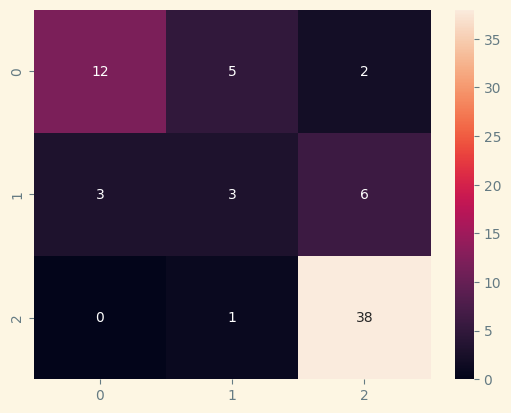

In [89]:
random_forest.classes_
cm = confusion_matrix(y_test,previsoes)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,previsoes))


In [90]:
for nome,importancia in zip(dataset.columns,random_forest.feature_importances_):
    print(f'{nome} :  {importancia} ')




VALOR DE M. :  0.06509167300524443 
EV :  0.03847385831495385 
PES. FISICAS :  0.04160865561672614 
LPA DESCONCTADO :  0.06959564942679727 
VPA :  0.046299086233634414 
P/L :  0.03678826930157914 
P/L DESCONTADO :  0.03992824148474283 
P/VPA :  0.04669208804435701 
MARGEM SEGURANÇA :  0.04093612427374174 
LUC. LIQUIDO :  0.06667907581502071 
MARGEM LIQUIDA :  0.036667023803829496 
ROE :  0.039164472007500555 
PATRI. LIQUIDO.1 :  0.04046876648928301 
DIVIDA LIQUIDA :  0.03579153684744552 
DIVIDA BRUTA/PL :  0.030176038556825744 
EF :  0.0331712762875489 
ECP :  0.03915413705571528 
EM :  0.033510557965131076 
PAS. CIRCULANTE :  0.03188358985629867 
LIQ. IMEDIATA :  0.037351163557849634 
CAPITAL DE GIRO :  0.02904443436999197 
0 :  0.0002497029625350536 
1 :  0.00044312102279900914 
2 :  0.0006475255704269536 
3 :  0.0004336052552238196 
4 :  0.0012944234564683202 
5 :  8.565100508615997e-05 
6 :  0.00010181518975546762 
7 :  0.0002695001888022565 
8 :  0.0007959927598053504 
9 :  0.0003

Text(0.5, 0, 'Importances')

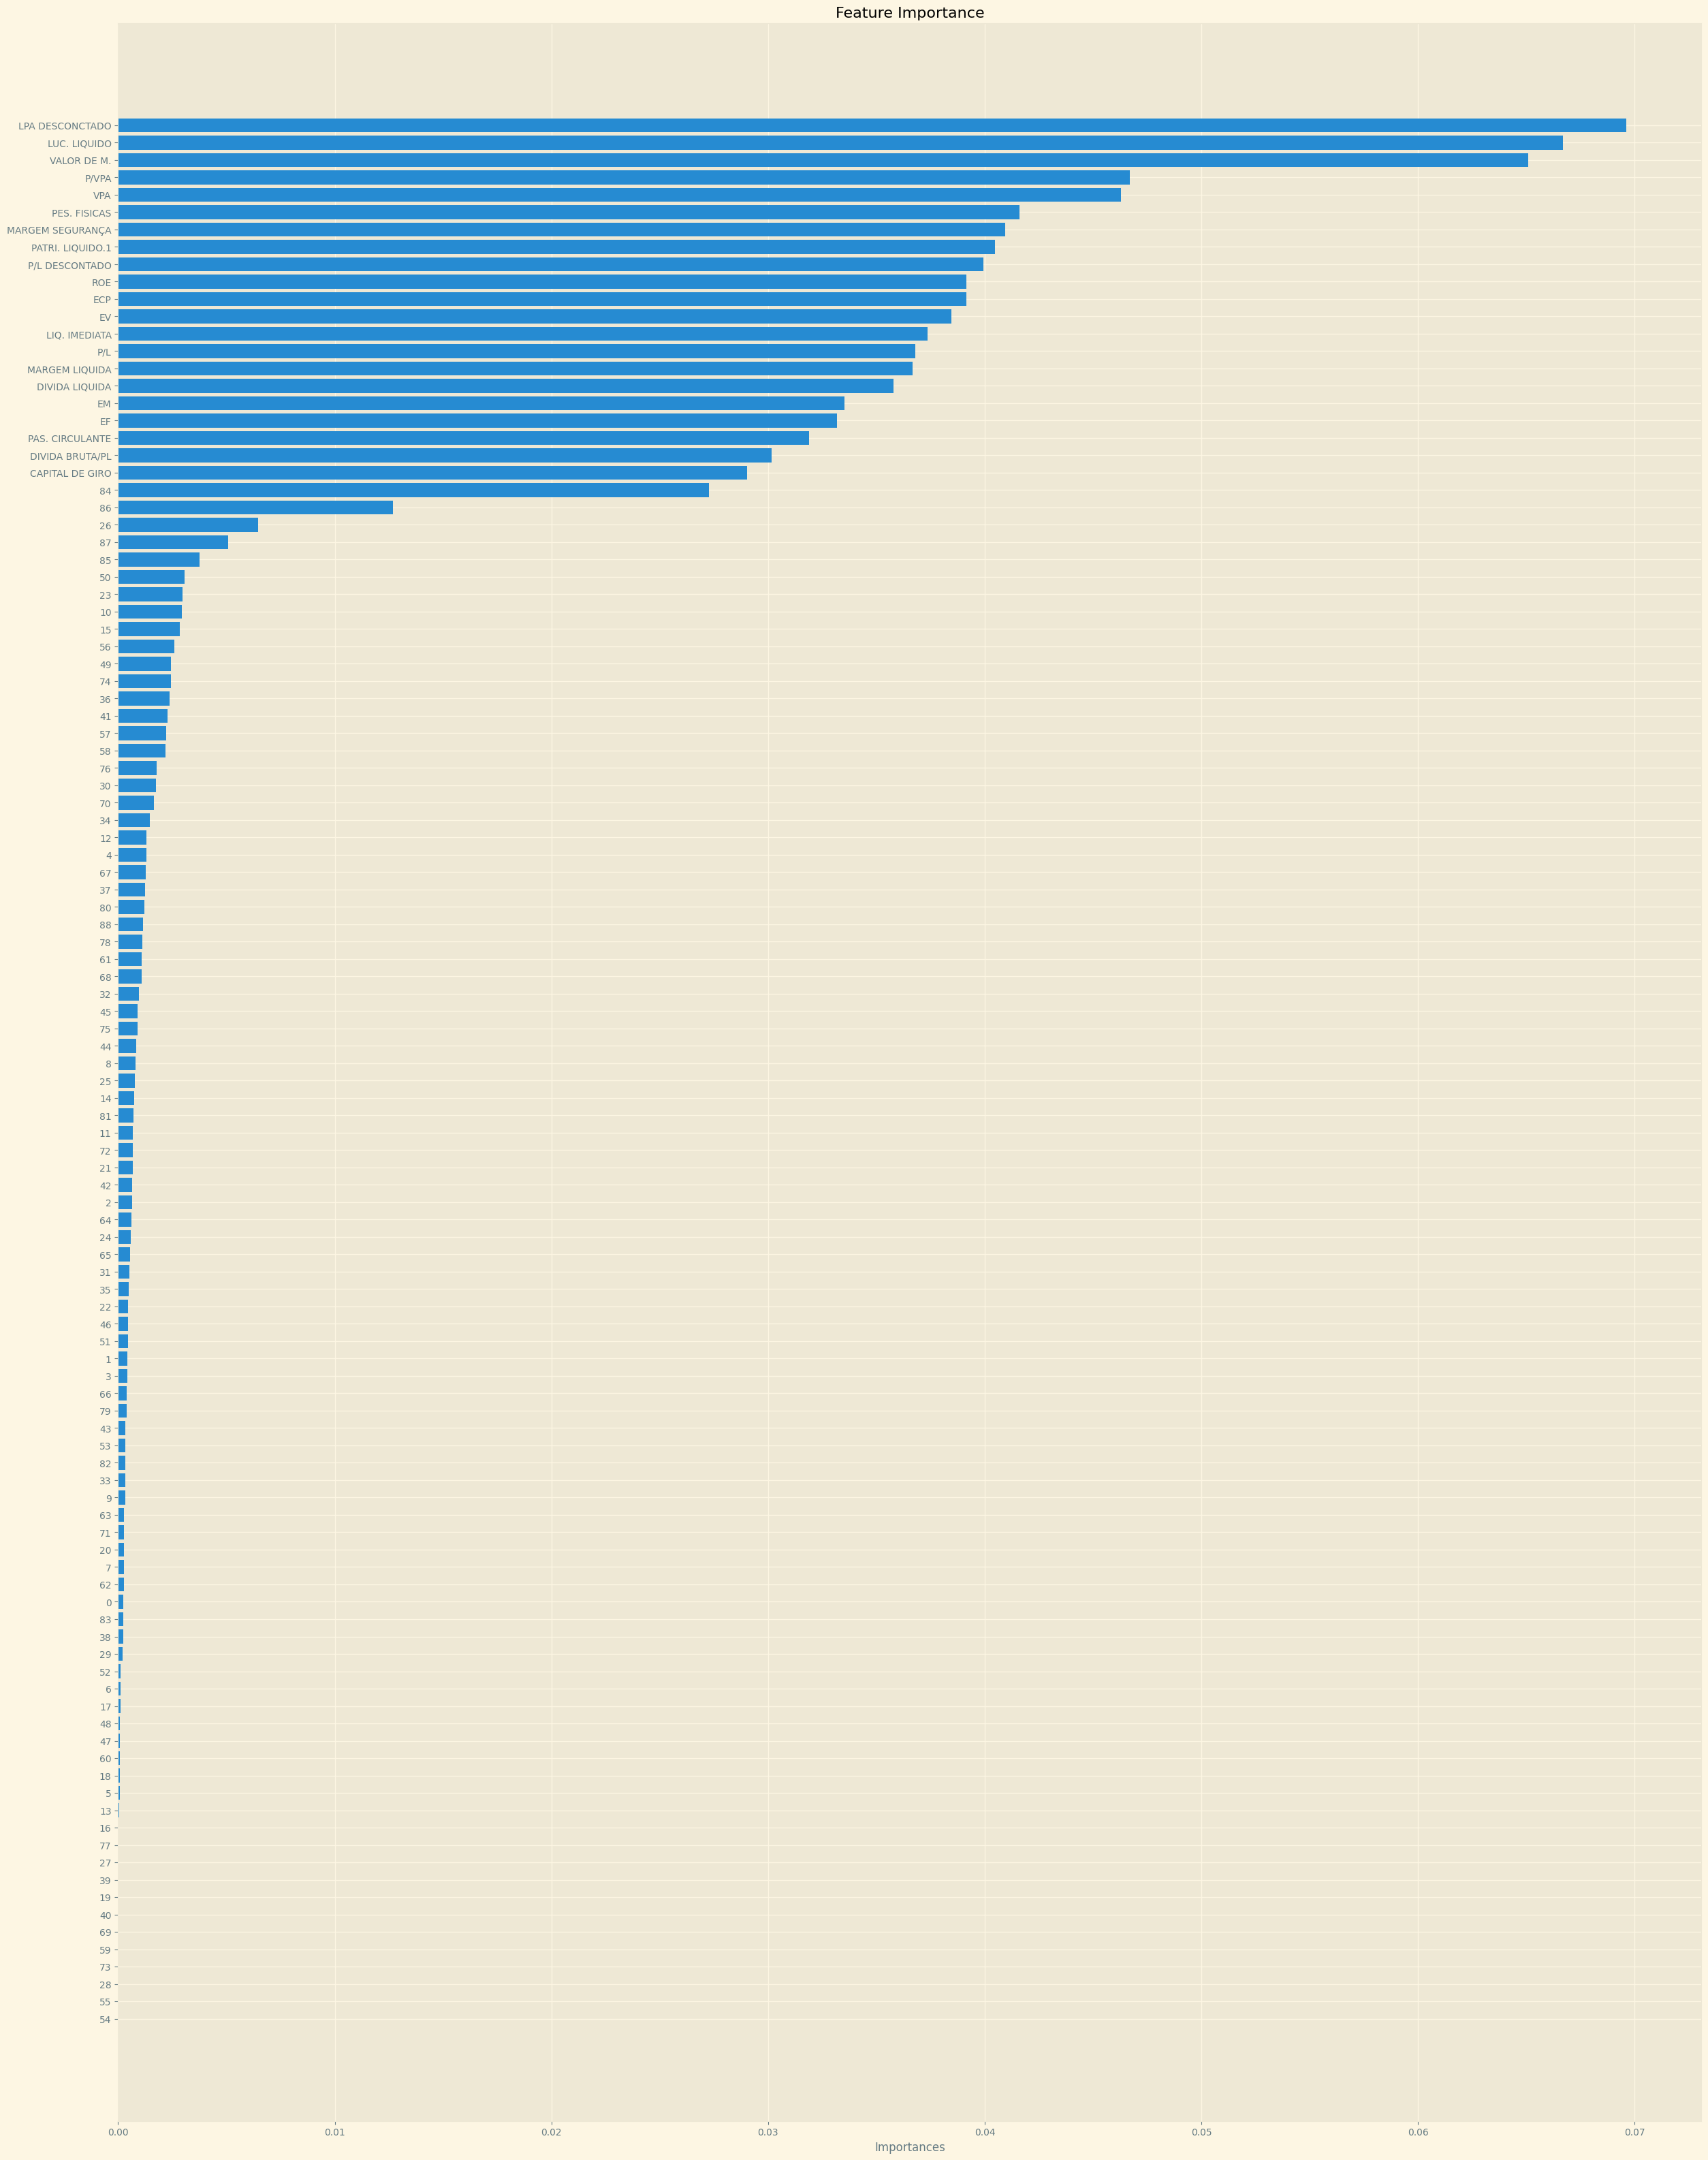

In [91]:

features = dataset.columns
importancias = random_forest.feature_importances_
indices = np.argsort(importancias)

plt.figure(figsize=(30,40))
plt.title('Feature Importance')
plt.barh(range(len(indices)),importancias[indices],align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Importances')


In [92]:
parametros = {'criterion':['gini','entropy'],'min_samples_split':[2,4,6,8],
            'n_estimators':[50,100,150,200]}


grid_searcher = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,verbose=1),
                param_grid=parametros)


grid_searcher.fit(X,y)
best_params = grid_searcher.best_params_
best_score = grid_searcher.best_score_

random_forest_best = grid_searcher.best_estimator_


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

In [93]:
random_forest_best

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=150, n_jobs=-1, verbose=1)

In [96]:

joblib.dump(random_forest_best, "my_model.pkl")


['my_model.pkl']